In [1]:
# standard data analysis modules
import pandas as pd
import numpy as np
from IPython.display import display
import matplotlib.pyplot as plt

from datetime import datetime

import statistics

from matplotlib.ticker import FuncFormatter, MaxNLocator
import matplotlib.ticker as ticker

#from matplotlib_venn import venn2
#from matplotlib_venn import venn3

%matplotlib inline
pd.options.display.max_columns = None

In [2]:
# check on the panda version and its dependencies
pd.__version__
#pd.show_versions()

'0.25.3'

In [3]:
# to read a directory on my PC
import glob

In [4]:
# to take dates from file names and convert currency columns to integers
import re

In [5]:
# to remove items from a list but keep the order
from  more_itertools import unique_everseen

In [6]:
# to prepare the powerpoint presentation
from pptx import Presentation
from pptx.util import Inches, Pt
from pptx.enum.text import PP_ALIGN
from pptx.enum.text import MSO_ANCHOR
from pptx.enum.dml import MSO_FILL
from pptx.dml.color import RGBColor

In [7]:
# Presentation preperation and image saving

# toggle to switch on image saving: 0 = off, 1 = on (i.e.save images and also slide titles)
savePNG = 0

# toggle to switch on powerpoint preparation: 0 = off, 1 = on (automatically saves the images also)
PwrptPrep = 1

# toggle exporting new and gone branches to csv files
changes_to_csv = 0

# list of slide titles, text and images to add
#monthNow = ''
presentationTitle = ['Rightmove data visualisation ', 'Andrew Neville']
saveFileName = 'presentationPrep - rightmove large database.pptx'
slideTitle = []
slideText = []
imagePath = []

In [8]:
# list the files in the directory, will use the list of file names to create the Dataframes

files = []
files = glob.glob("C:/Users/andrew/Documents/Big Data Project/Data Collectors/rightmove2/rightmove2/rightmove2*.csv")
testLength = len("C:/Users/andrew/Documents/Big Data Project/Data Collectors/rightmove2/rightmove2/rightmove2yyyymmdd")
if len(files) == 0:
    files = []
    files = glob.glob("C:/Users/andre/Documents/Big Data Project/Data Collectors/rightmove2/rightmove2/rightmove2*.csv")
    testLength = len("C:/Users/andre/Documents/Big Data Project/Data Collectors/rightmove2/rightmove2/rightmove2yyyymmdd")
if len(files) == 0:
    files = []
    files = glob.glob("C:/Users/andre/OneDrive/Documents/Big Data Project/Data Collectors/rightmove2/rightmove2/rightmove2*.csv")
    testLength = len("C:/Users/andre/OneDrive/Documents/Big Data Project/Data Collectors/rightmove2/rightmove2/rightmove2yyyymmdd")


# eliminate files that are names rightmove2*_cleaned.csv where the same file rightmove2*.csv exists
test_to_delete = []
for i in range(len(files)):
    if "_cleaned" in files[i]:
        test_to_delete.append(files[i])

files = sorted(list(set(files)^set(test_to_delete))) # need to keep files in order when eliminating the duplicates

print("files to read ", str(len(files)))
print("first file ",files[0])
print("last file ", files[-1])


files to read  342
first file  C:/Users/andre/OneDrive/Documents/Big Data Project/Data Collectors/rightmove2/rightmove2\rightmove220190726a.csv
last file  C:/Users/andre/OneDrive/Documents/Big Data Project/Data Collectors/rightmove2/rightmove2\rightmove220210731d.csv


In [9]:
# upload the existing sumamry dataframe
# and save a backup

try:
    df_rightmove_saved = pd.read_csv('rightmove_dataframe_summary.csv')
    df_rightmove_saved.to_csv('rightmove_dataframe_summary_backup.csv')
except:
    print('No Summary File Available')
    exit()
    pass

In [10]:
df_rightmove_saved = df_rightmove_saved.drop(df_rightmove_saved.columns[0], axis=1)

In [11]:
df_rightmove_saved.head()

Date  Total branches  Total url branches  Sales branches  \
0  26/07/2019           22581               39688           13229   
1  03/08/2019           22538               39519           13191   
2  09/08/2019           22549               39636           13194   
3  16/08/2019           22495               39444           13186   
4  23/08/2019           22501               39502           13177   

   New Homes branches  Letting branches  Com Sales branches  \
0                8703             10986                4151   
1                8705             10945                4077   
2                8730             10955                4151   
3                8672             10897                4102   
4                8718             10887                4138   

   Com Rent branches  total_properties  new homes  property_for_sale  \
0               2619           1135850      65680             763829   
1               2601           1128697      65771             761651   
2               2606           1118696      65682             753046   
3               2587           1112132      65003             751009   
4               2582           1109981      65148             752036   

   new_homes_for_sale  property_to_rent  overseas_property  \
0               65568            242834                  1   
1               65646            237237                  1   
2               65549            235810                  1   
3               64892            232219                  1   
4               65036            228558                  1   

   commercial_property_for_sale  commercial_property_to_let  check properties  \
0                         29516                       34102                 0   
1                         29596                       34566                 0   
2                         29689                       34601                 0   
3                         29671                       34340                 0   
4                         29873                       34477                 0   

   check branches  price_change_ResiSale_all  price_change_ResiSale_house  \
0               0                   0.000000                     0.000000   
1               0                  -0.000725                    -0.000780   
2               0                  -0.000846                    -0.000905   
3               0                  -0.000682                    -0.000621   
4               0                  -0.000675                    -0.000673   

   price_change_ResiSale_flat  newVolume_ResiSale_flat  \
0                    0.000000                        0   
1                   -0.000594                    11187   
2                   -0.000733                    11387   
3                   -0.000864                    10567   
4                   -0.000626                    10660   

   newValue_ResiSale_flat  newVolume_ResiSale_house  newValue_ResiSale_house  \
0            0.000000e+00                         0             0.000000e+00   
1            3.540108e+09                     36193             1.222642e+10   
2            3.818384e+09                     35098             1.155502e+10   
3            3.188372e+09                     36255             1.192503e+10   
4            3.157188e+09                     36481             1.180163e+10   

   newVolume_ResiSale_all  newValue_ResiSale_all  newVolumeSTC_ResiSale_flat  \
0                       0           0.000000e+00                           0   
1                   48631           1.614774e+10                        2826   
2                   47828           1.579176e+10                        2619   
3                   48026           1.547795e+10                        2759   
4                   48450           1.534945e+10                        2954   

   newValueSTC_ResiSale_flat  newVolumeSTC_ResiSale_house  \
0                        0.0                            0   
1                608689740

In [12]:
df_rightmove_saved.tail()

Date  Total branches  Total url branches  Sales branches  \
100  25/06/2021           21788               35596           13123   
101  02/07/2021           21739               35415           13112   
102  09/07/2021           21721               35448           13115   
103  16/07/2021           21670               35324           13135   
104  23/07/2021           21732               35316           13130   

     New Homes branches  Letting branches  Com Sales branches  \
100                6187              9938                3814   
101                6103              9897                3783   
102                6072              9938                3797   
103                6001              9914                3753   
104                5979              9917                3771   

     Com Rent branches  total_properties  new homes  property_for_sale  \
100               2534           1017314      35418             742139   
101               2520            988863      34274             717341   
102               2526            968466      33849             699104   
103               2521            960267      33201             692907   
104               2519            959636      33151             694836   

     new_homes_for_sale  property_to_rent  overseas_property  \
100               35418            184366                  0   
101               34274            181692                  0   
102               33849            180615                  0   
103               33201            179157                  0   
104               33151            176280                  0   

     commercial_property_for_sale  commercial_property_to_let  \
100                         19348                       36043   
101                         19507                       36049   
102                         19067                       35831   
103                         19227                       35775   
104                         19343                       36026   

     check properties  check branches  price_change_ResiSale_all  \
100                 0               0                  -0.000422   
101                 0               0                  -0.000590   
102                 0               0                  -0.000545   
103                 0               0                  -0.000451   
104                 0               0                  -0.000505   

     price_change_ResiSale_house  price_change_ResiSale_flat  \
100                    -0.000309                   -0.000781   
101                    -0.000542                   -0.000795   
102                    -0.000432                   -0.000845   
103                    -0.000438                   -0.000779   
104                    -0.000377                   -0.000849   

     newVolume_ResiSale_flat  newValue_ResiSale_flat  \
100                     8775            2.974596e+09   
101                     8014            2.800805e+09   
102                     8702            2.972343e+09   
103                     7799            2.709657e+09   
104                     8358            2.953513e+09   

     newVolume_ResiSale_house  newValue_ResiSale_house  \
100                     25460             1.023458e+10   
101                     22882             9.215962e+09   
102                     25389             1.047643e+10   
103                     21418             8.640380e+09   
104                     23426             9.614409e+09   

     newVolume_ResiSale_all  newValue_ResiSale_all  \
100                   35838           1.370334e+10   
101                   32212           1.241857e+10   
102                   35534           1.390245e+10   
103                   30382           1.173956e+10   
104                   33002           1.301450e+10   

     newVolumeSTC_ResiSale_flat  newValueSTC_ResiSale_flat  \
100                        3794                857052496.0   
101                        3446            

In [13]:
# check the files that have already been summarised

check_date = []
for i in range(len(files)):
    check_date.append((re.search('(?<=rightmove2)(\d{8})', files[i])).group(0)[6:8]+"/"+
(re.search('(?<=rightmove2)(\d{8})', files[i])).group(0)[4:6]+"/"+
(re.search('(?<=rightmove2)(\d{8})', files[i])).group(0)[0:4])

In [14]:
# compare dates in dataframe to file dates to find unused files
# and identify all the files that are unused

df_data_list = df_rightmove_saved['Date'].tolist()

unused_dates = list(set(check_date) - set(df_data_list))

unused_files = []
filepath_partial = files[0].split('Data Collectors/rightmove2/rightmove2')[0] + 'Data Collectors/rightmove2/rightmove2/rightmove2'
for i in range(len(unused_dates)):
    # the unused dates have multiple files
    # so i need to extend the unused date string
    unused_file_date = unused_dates[i][-4:] + unused_dates[i][-7:-5] + unused_dates[i][-10:-8]
    unused_file_date_all = [s for s in files if unused_file_date in s]
    for ii in range(len(unused_file_date_all)):
        unused_file_date_letter = unused_file_date_all[ii].split(unused_file_date)[1][0]
        filename_data = unused_dates[i][-4:] + unused_dates[i][-7:-5] + unused_dates[i][-10:-8] + unused_file_date_letter + str('.csv') # convert date into filename format
        unused_files.append(filepath_partial + filename_data)


In [15]:
# add in the last used file as well, we will need this for data analysis

last_date_saved = df_rightmove_saved['Date'].tolist()[-1]
unused_file_date = last_date_saved[-4:] + last_date_saved[-7:-5] + last_date_saved[-10:-8]
unused_file_date_all = [s for s in files if unused_file_date in s]
unused_file_date_all

for ii in range(len(unused_file_date_all)):
    unused_file_date_letter = unused_file_date_all[ii].split(unused_file_date)[1][0]
    filename_data = last_date_saved[-4:] + last_date_saved[-7:-5] + last_date_saved[-10:-8] + unused_file_date_letter + str('.csv') # convert date into filename format
    unused_files.insert(0,filepath_partial + filename_data)

unused_files.sort()

In [16]:
unused_files

['C:/Users/andre/OneDrive/Documents/Big Data Project/Data Collectors/rightmove2/rightmove2/rightmove220210723a.csv',
 'C:/Users/andre/OneDrive/Documents/Big Data Project/Data Collectors/rightmove2/rightmove2/rightmove220210723b.csv',
 'C:/Users/andre/OneDrive/Documents/Big Data Project/Data Collectors/rightmove2/rightmove2/rightmove220210723c.csv',
 'C:/Users/andre/OneDrive/Documents/Big Data Project/Data Collectors/rightmove2/rightmove2/rightmove220210723d.csv',
 'C:/Users/andre/OneDrive/Documents/Big Data Project/Data Collectors/rightmove2/rightmove2/rightmove220210730a.csv',
 'C:/Users/andre/OneDrive/Documents/Big Data Project/Data Collectors/rightmove2/rightmove2/rightmove220210730b.csv',
 'C:/Users/andre/OneDrive/Documents/Big Data Project/Data Collectors/rightmove2/rightmove2/rightmove220210730c.csv',
 'C:/Users/andre/OneDrive/Documents/Big Data Project/Data Collectors/rightmove2/rightmove2/rightmove220210731d.csv']

In [17]:
# upload the first file
# and reduce memory usage

df = []

# dataCollected = []
# dataRemaining = []
# original_memory = []
# final_memory = []

csv1 = pd.read_csv(unused_files[0], encoding = "ISO-8859-1", low_memory=False)



# # record the initial status 
# dataCollected.append(csv1.shape[0]*csv1.shape[1])
# original_memory.append(csv1.memory_usage(deep=True).sum())

# # reduce memory usage

# # put columns to category
# csv1['premium'] = csv1['premium'].fillna(0).astype('category')
# csv1['status_sold'] = csv1['status_sold'].fillna(0).astype('category')
# csv1['status_new'] = csv1['status_new'].fillna(0).astype('category')
# csv1['developer'] = csv1['developer'].fillna(0).astype('category')
# csv1['status_commercial'] = csv1['status_commercial'].fillna(0).astype('category')
# csv1['featured'] = csv1['featured'].fillna(0).astype('category')

# # put other columns to float    
# csv1['results'] = csv1['results'].replace('[,]', '', regex=True).astype(float)
# csv1['price'] = csv1['price'].replace('[,]', '', regex=True).astype(str).str.extract('£([^ ]*)').fillna(0).astype(float)

df.append(csv1)

# # gather post adjustement stats
# dataRemaining.append(df[0].shape[0]*df[0].shape[1])
# final_memory.append(df[0].memory_usage(deep=True).sum())


In [18]:
#df[0].info(memory_usage='deep')

In [19]:
%%time

# create DataFrames
# this will create x number of Dataframes from the csv sheets in the files list, df[0] to df[n]
# certain files will need to be combined into one dataframe
# and reduce memory usage

#df = []
filesCombined = 0

#csv1 = pd.read_csv(files[0], encoding = "ISO-8859-1")
#df.append(csv1)

for i in range(1,len(unused_files)):
    if int(re.search(r'(\d+)$', files[i-len(unused_files)][0:testLength]).group(1)) == int(re.search(r'(\d+)$', files[i-len(unused_files)-1][0:testLength]).group(1)):
        csv1 = pd.read_csv(files[i-len(unused_files)], encoding = "ISO-8859-1", low_memory=False)
        #csv0 = pd.read_csv(filesJusteat[i-1], encoding = "ISO-8859-1")
       
#         # record the initial status 
#         dataCollected.append(csv1.shape[0]*csv1.shape[1])
#         original_memory.append(csv1.memory_usage(deep=True).sum())

#         # reduce memory usage

#         # put columns to category
#         csv1['premium'] = csv1['premium'].fillna(0).astype('category')
#         csv1['status_sold'] = csv1['status_sold'].fillna(0).astype('category')
#         csv1['status_new'] = csv1['status_new'].fillna(0).astype('category')
#         csv1['developer'] = csv1['developer'].fillna(0).astype('category')
#         csv1['status_commercial'] = csv1['status_commercial'].fillna(0).astype('category')
#         csv1['featured'] = csv1['featured'].fillna(0).astype('category')

#         # put other columns to float    
#         csv1['results'] = csv1['results'].replace('[,]', '', regex=True).astype(float)
#         csv1['price'] = csv1['price'].replace('[,]', '', regex=True).astype(str).str.extract('£([^ ]*)').fillna(0).astype(float)

#         # gather post adjustement stats
#         dataRemaining.append(csv1.shape[0]*csv1.shape[1])
#         final_memory.append(csv1.memory_usage(deep=True).sum())
        
        csv0 = df[i-1 - filesCombined] 
        df[i-1 - filesCombined] = pd.concat([csv0,csv1],ignore_index=True)
        filesCombined = filesCombined + 1
    else:
        csv2 = pd.read_csv(files[i-len(unused_files)], encoding = "ISO-8859-1", low_memory=False)
        #csv0 = pd.read_csv(filesJusteat[i-1], encoding = "ISO-8859-1")
       
#         # record the initial status 
#         dataCollected.append(csv2.shape[0]*csv2.shape[1])
#         original_memory.append(csv2.memory_usage(deep=True).sum())

#         # reduce memory usage

#         # put columns to category
#         csv2['premium'] = csv2['premium'].fillna(0).astype('category')
#         csv2['status_sold'] = csv2['status_sold'].fillna(0).astype('category')
#         csv2['status_new'] = csv2['status_new'].fillna(0).astype('category')
#         csv2['developer'] = csv2['developer'].fillna(0).astype('category')
#         csv2['status_commercial'] = csv2['status_commercial'].fillna(0).astype('category')
#         csv2['featured'] = csv2['featured'].fillna(0).astype('category')

#         # put other columns to float    
#         csv2['results'] = csv2['results'].replace('[,]', '', regex=True).astype(float)
#         csv2['price'] = csv2['price'].replace('[,]', '', regex=True).astype(str).str.extract('£([^ ]*)').fillna(0).astype(float)

#         # gather post adjustement stats
#         dataRemaining.append(csv2.shape[0]*csv2.shape[1])
#         final_memory.append(csv2.memory_usage(deep=True).sum())     
  
        df.append(csv2)        
        #df.append(pd.read_csv(files[i], encoding = "ISO-8859-1"))


Wall time: 7.36 s


In [20]:
df[-1][df[-1]['name'].str.contains("crest", case=False)].count()

branch_id            436
name                 436
telephone            436
address              436
results              436
branch_url           436
property_URL         436
price                436
title                436
property_address     436
images               432
added_or_Reduced     436
premium                0
status_sold            0
status_new           436
developer            436
status_commercial      0
featured              57
dtype: int64

In [21]:
df[0].info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1059851 entries, 0 to 1059850
Data columns (total 18 columns):
branch_id            1059851 non-null int64
name                 1059851 non-null object
telephone            1059851 non-null object
address              1059822 non-null object
results              1059851 non-null object
branch_url           1059851 non-null object
property_URL         1059851 non-null object
price                1059851 non-null object
title                1059851 non-null object
property_address     1059848 non-null object
images               1057890 non-null float64
added_or_Reduced     961758 non-null object
premium              0 non-null float64
status_sold          572689 non-null object
status_new           54679 non-null float64
developer            16689 non-null float64
status_commercial    87742 non-null float64
featured             22474 non-null object
dtypes: float64(5), int64(1), object(12)
memory usage: 1.0 GB


In [22]:
# # show summary output of number of dataframes created, datapoints collected, memory reduced

# print(len(df),"dataframes created")
# print('original data points collected from',len(dataCollected),'dataframes was',f'{sum(dataCollected):,}')
# print('original memory over',len(original_memory),'dataframes was',f'{sum(original_memory):,}')
# print('data points remaining from',len(dataRemaining),'dataframes was',f'{sum(dataRemaining):,}', '= a',\
#       "{0:.0%}".format(1-(sum(dataRemaining)/sum(dataCollected))), 'reduction')
# print('final memory over',len(final_memory),'dataframes was',f'{sum(final_memory):,}', '= a',\
#       "{0:.0%}".format(1-(sum(final_memory)/sum(original_memory))),'recution')

In [23]:
df[-1].tail()

branch_id                    name     telephone  \
17828     237620         Bovis Yorkshire  01759 211037   
17829     237620         Bovis Yorkshire  01759 211037   
17830     237620         Bovis Yorkshire  01759 211037   
17831     237620         Bovis Yorkshire  01759 211037   
17832      68865  Miller Homes Yorkshire  01757 820014   

                                  address  results  \
17828   Amos Drive, Pocklington, YO42 2FS        5   
17829   Amos Drive, Pocklington, YO42 2FS        5   
17830   Amos Drive, Pocklington, YO42 2FS        5   
17831   Amos Drive, Pocklington, YO42 2FS        5   
17832  Leeds Road, Thorpe Willoughby, YO8        2   

                                              branch_url  \
17828  https://www.rightmove.co.uk/new-homes-for-sale...   
17829  https://www.rightmove.co.uk/new-homes-for-sale...   
17830  https://www.rightmove.co.uk/new-homes-for-sale...   
17831  https://www.rightmove.co.uk/new-homes-for-sale...   
17832  https://www.rightmove.co.uk/new-homes-for-sale...   

                property_URL      price                              title  \
17828   /properties/92577919  Â£319,950           4 bedroom house for sale   
17829   /properties/92577916  Â£239,950           3 bedroom house for sale   
17830   /properties/92577922  Â£199,950           2 bedroom house for sale   
17831   /properties/92577928   Â£43,268           1 bedroom house for sale   
17832  /properties/110804138  Â£284,995  4 bedroom detached house for sale   

                               property_address  images     added_or_Reduced  \
17828   Amos Drive,\r\nPocklington,\r\nYO42 2FS     7.0  Added on 21/07/2021   
17829   Amos Drive,\r\nPocklington,\r\nYO42 2FS     7.0  Added on 21/07/2021   
17830   Amos Drive,\r\nPocklington,\r\nYO42 2FS     5.0  Added on 21/07/2021   
17831   Amos Drive,\r\nPocklington,\r\nYO42 2FS     1.0  Added on 21/07/2021   
17832  Leeds Road,\r\nThorpe Willoughby,\r\nYO8    13.0  Added on 12/06/2021   

       premium status_sold  status_new  developer  status_commercial featured  
17828      NaN         NaN         1.0        1.0                NaN      NaN  
17829      NaN         NaN         1.0        1.0                NaN      NaN  
17830      NaN         NaN         1.0        1.0                NaN      NaN  
17831      NaN         NaN         1.0        1.0                NaN      NaN  
17832      NaN         NaN         1.0        1.0                NaN      NaN

In [24]:
len(df)

3

In [25]:
# look at the last dataframe uploaded from my PC
#df[-1].info()
# df[-1].info(memory_usage='deep')

In [26]:
# reduce memory usage
# and dont forget that NaN will go to 0 for conditional statements later in the code!

dataCollected = []
dataRemaining = []
original_memory = []
final_memory = []

for i in range(len(df)):
    
    # record the initial status 
    dataCollected.append(df[i].shape[0]*df[i].shape[1])
    original_memory.append(df[i].memory_usage(deep=True).sum())
    
    # reduce memory usage
    
    # put columns to category
    df[i]['premium'] = df[i]['premium'].fillna(0).astype('category')
    df[i]['status_sold'] = df[i]['status_sold'].fillna(0).astype('category')
    df[i]['status_new'] = df[i]['status_new'].fillna(0).astype('category')
    df[i]['developer'] = df[i]['developer'].fillna(0).astype('category')
    df[i]['status_commercial'] = df[i]['status_commercial'].fillna(0).astype('category')
    df[i]['featured'] = df[i]['featured'].fillna(0).astype('category')

    # put other columns to float    
    df[i]['results'] = df[i]['results'].replace('[,]', '', regex=True).astype(float)
    df[i]['price'] = df[i]['price'].replace('[,]', '', regex=True).astype(str).str.extract('£([^ ]*)').fillna(0).astype(float)

    # gather post adjustement stats
    dataRemaining.append(df[i].shape[0]*df[i].shape[1])
    final_memory.append(df[i].memory_usage(deep=True).sum())    


In [27]:
# show summary output of number of dataframes created, datapoints collected, memory reduced

print(len(df),"dataframes created")
print('original data points collected from',len(dataCollected),'dataframes was',f'{sum(dataCollected):,}')
print('original memory over',len(original_memory),'dataframes was',f'{sum(original_memory):,}')
print('data points remaining from',len(dataRemaining),'dataframes was',f'{sum(dataRemaining):,}', '= a',\
      "{0:.0%}".format(1-(sum(dataRemaining)/sum(dataCollected))), 'reduction')
print('final memory over',len(final_memory),'dataframes was',f'{sum(final_memory):,}', '= a',\
      "{0:.0%}".format(1-(sum(final_memory)/sum(original_memory))),'recution')

3 dataframes created
original data points collected from 3 dataframes was 38,034,648
original memory over 3 dataframes was 2,165,162,781
data points remaining from 3 dataframes was 38,034,648 = a 0% reduction
final memory over 3 dataframes was 1,656,321,380 = a 24% recution


In [28]:
df[0].info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1059851 entries, 0 to 1059850
Data columns (total 18 columns):
branch_id            1059851 non-null int64
name                 1059851 non-null object
telephone            1059851 non-null object
address              1059822 non-null object
results              1059851 non-null float64
branch_url           1059851 non-null object
property_URL         1059851 non-null object
price                1059851 non-null float64
title                1059851 non-null object
property_address     1059848 non-null object
images               1057890 non-null float64
added_or_Reduced     961758 non-null object
premium              1059851 non-null category
status_sold          1059851 non-null category
status_new           1059851 non-null category
developer            1059851 non-null category
status_commercial    1059851 non-null category
featured             1059851 non-null category
dtypes: category(6), float64(3), int64(1), object(8)
memory usag

In [29]:
df[-1].tail()
#df[-1].shape

branch_id                    name     telephone  \
17828     237620         Bovis Yorkshire  01759 211037   
17829     237620         Bovis Yorkshire  01759 211037   
17830     237620         Bovis Yorkshire  01759 211037   
17831     237620         Bovis Yorkshire  01759 211037   
17832      68865  Miller Homes Yorkshire  01757 820014   

                                  address  results  \
17828   Amos Drive, Pocklington, YO42 2FS      5.0   
17829   Amos Drive, Pocklington, YO42 2FS      5.0   
17830   Amos Drive, Pocklington, YO42 2FS      5.0   
17831   Amos Drive, Pocklington, YO42 2FS      5.0   
17832  Leeds Road, Thorpe Willoughby, YO8      2.0   

                                              branch_url  \
17828  https://www.rightmove.co.uk/new-homes-for-sale...   
17829  https://www.rightmove.co.uk/new-homes-for-sale...   
17830  https://www.rightmove.co.uk/new-homes-for-sale...   
17831  https://www.rightmove.co.uk/new-homes-for-sale...   
17832  https://www.rightmove.co.uk/new-homes-for-sale...   

                property_URL     price                              title  \
17828   /properties/92577919  319950.0           4 bedroom house for sale   
17829   /properties/92577916  239950.0           3 bedroom house for sale   
17830   /properties/92577922  199950.0           2 bedroom house for sale   
17831   /properties/92577928   43268.0           1 bedroom house for sale   
17832  /properties/110804138  284995.0  4 bedroom detached house for sale   

                               property_address  images     added_or_Reduced  \
17828   Amos Drive,\r\nPocklington,\r\nYO42 2FS     7.0  Added on 21/07/2021   
17829   Amos Drive,\r\nPocklington,\r\nYO42 2FS     7.0  Added on 21/07/2021   
17830   Amos Drive,\r\nPocklington,\r\nYO42 2FS     5.0  Added on 21/07/2021   
17831   Amos Drive,\r\nPocklington,\r\nYO42 2FS     1.0  Added on 21/07/2021   
17832  Leeds Road,\r\nThorpe Willoughby,\r\nYO8    13.0  Added on 12/06/2021   

      premium status_sold status_new developer status_commercial featured  
17828     0.0           0        1.0       1.0               0.0        0  
17829     0.0           0        1.0       1.0               0.0        0  
17830     0.0           0        1.0       1.0               0.0        0  
17831     0.0           0        1.0       1.0               0.0        0  
17832     0.0           0        1.0       1.0               0.0        0

In [30]:
total_dataPoints = 0

for i in range(len(df)):
    total_dataPoints = total_dataPoints + df[i].shape[0]*df[i].shape[1]

print(f"{total_dataPoints:,}")

38,034,648


In [31]:
latest_dataPoints = 0

latest_dataPoints = df[-1].shape[0]*df[-1].shape[1]

print(f"{latest_dataPoints:,}")

320,994


In [32]:
# for each dataframe remove duplicate entries
duplicateRows = []

for i in range(len(df)):
    
    # drop all outright duplicates
    duplicates1 = len(df[i]) - len(df[i].drop_duplicates(keep='first'))
    df[i].drop_duplicates(keep='first', inplace = True)

    # drop all duplicates that are 'featured'
    duplicates2 = len(df[i]) - len(df[i].sort_values('featured', ascending=False).drop_duplicates('property_URL').sort_index())
    df[i] = df[i].sort_values('featured', ascending=False).drop_duplicates('property_URL', keep='first', inplace = False).sort_index()

    duplicateRows.append(duplicates1 + duplicates2)

duplicateRows[0:10], duplicateRows[-10:]

([100215, 98526, 2017], [100215, 98526, 2017])

In [33]:
print('mean ' + str(f'{statistics.mean(duplicateRows):,.0f}') + ' / median '
+ str(f'{statistics.median(duplicateRows):,.0f}') + ' / max ' + str(f'{max(duplicateRows):,.0f}')
+ ' / min ' + str(f'{min(duplicateRows):,.0f}') + ' / 2 std dev ' + str(f'{2 * statistics.stdev(duplicateRows):,.0f}'))


mean 66,919 / median 98,526 / max 100,215 / min 2,017 / 2 std dev 112,427


In [34]:
total_dataPoints_cleaned = 0

for i in range(len(df)):
    total_dataPoints_cleaned = total_dataPoints_cleaned + df[i].shape[0]*df[i].shape[1]

print(f"{total_dataPoints_cleaned:,}")

34,421,004


In [35]:
#
# start adding new columns to the uploaded dataframes
#

In [36]:
# NEW CODE

In [37]:
# # OLD CODE
# # add a column that shows type of unit (sale, letting, new home, commercial etc)
# # and the type of branch (should be the same)

# for i in range(len(df)):
#     df[i]['transaction_type'] = df[i]['property_URL'].str.split('/',expand=True)[1].astype('category')
#     df[i]['branch_type'] = df[i]['branch_url'].str.split('/',expand=True)[3].astype('category')

In [38]:
# since start 2021 we have to look at the branch url to determine if a property is for rent of sale


In [39]:
# check to see we have all the branch types

list_to_count=['/new-homes-for-sale/', '/property-for-sale/', '/property-to-rent/',
              '/commercial-property-to-let/', '/commercial-property-for-sale/']

count_items = 0
for i in range(len(list_to_count)):
    count_items = count_items + df[-1][df[-1]['branch_url'].str.contains(list_to_count[i])]['branch_url'].count()
    
if df[-1].shape[0] - count_items == 0:
    print('OK')
else:
    print('ERROR: MISSING CATEGORY!!!!!')

OK


In [40]:
df[-1]['property_URL'].head()[0]

'/properties/110955719'

In [41]:
df[-2]['property_URL'].head()[0]

'/properties/77843660'

In [42]:
# if the above is 'OK' then we can assume that the 'branch_type' is the same as 'transaction_type'
# and the type of branch (should be the same)
# add a column that shows type of unit (sale, letting, new home, commercial etc)
# we also need to alter the 'property_URL' to be just the id numbers
# pre 2021 this leaves the properties-for-sale and new-homes-for-sale double counting

for i in range(len(df)):
    df[i]['branch_type'] = df[i]['branch_url'].str.split('/',expand=True)[3].astype('category')
    df[i]['transaction_type'] = df[i]['branch_type']
    df[i]['property_URL'] = df[i]['property_URL'].str.extract('(\d+)')
    

In [43]:
df[-1]['property_URL'].head()[0]

'110955719'

In [44]:
df[-2]['property_URL'].head()[0]

'77843660'

In [45]:
### END OF NEW CODE

In [46]:
df[0].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 959636 entries, 0 to 1059850
Data columns (total 20 columns):
branch_id            959636 non-null int64
name                 959636 non-null object
telephone            959636 non-null object
address              959607 non-null object
results              959636 non-null float64
branch_url           959636 non-null object
property_URL         959636 non-null object
price                959636 non-null float64
title                959636 non-null object
property_address     959633 non-null object
images               957935 non-null float64
added_or_Reduced     899314 non-null object
premium              959636 non-null category
status_sold          959636 non-null category
status_new           959636 non-null category
developer            959636 non-null category
status_commercial    959636 non-null category
featured             959636 non-null category
branch_type          959636 non-null category
transaction_type     959636 non-null

In [47]:
df[-1].head()

branch_id                         name      telephone  \
0     146693  Nest Estate Agents, Enderby  0116 452 0261   
1     146693  Nest Estate Agents, Enderby  0116 452 0261   
2     146693  Nest Estate Agents, Enderby  0116 452 0261   
4     146693  Nest Estate Agents, Enderby  0116 452 0261   
5     146693  Nest Estate Agents, Enderby  0116 452 0261   

                               address  results  \
0  22a Cross Street, Enderby, LE19 4NJ     26.0   
1  22a Cross Street, Enderby, LE19 4NJ     26.0   
2  22a Cross Street, Enderby, LE19 4NJ     26.0   
4  22a Cross Street, Enderby, LE19 4NJ     26.0   
5  22a Cross Street, Enderby, LE19 4NJ     26.0   

                                          branch_url property_URL     price  \
0  https://www.rightmove.co.uk/property-for-sale/...    110955719  335000.0   
1  https://www.rightmove.co.uk/property-for-sale/...    108411608  385000.0   
2  https://www.rightmove.co.uk/property-for-sale/...    109976828  350000.0   
4  https://www.rightmove.co.uk/property-for-sale/...    108040982  325000.0   
5  https://www.rightmove.co.uk/property-for-sale/...    102376790  320000.0   

                                  title  \
0     4 bedroom detached house for sale   
1     4 bedroom detached house for sale   
2  3 bedroom detached bungalow for sale   
4     4 bedroom detached house for sale   
5     4 bedroom detached house for sale   

                                    property_address  images  \
0           Godfrey Close, Stoney Stanton, Leicester    18.0   
1                   Ashton Drive, Enderby, Leicester    17.0   
2  Charnwood Drive, Leicester Forest East, Leicester    19.0   
4               Copt Oak Road, Narborough, Leicester    19.0   
5                     Blaby Road, Enderby, Leicester    12.0   

        added_or_Reduced premium status_sold status_new developer  \
0    Added on 26/07/2021     0.0           0        0.0       0.0   
1  Reduced on 09/07/2021     0.0    Sold STC        0.0       0.0   
2    Added on 05/07/2021     0.0    Sold STC        0.0       0.0   
4  Reduced on 17/06/2021     0.0           0        0.0       0.0   
5  Reduced on 10/06/2021     0.0           0        0.0       0.0   

  status_commercial           featured        branch_type   transaction_type  
0               0.0  Featured Property  property-for-sale  property-for-sale  
1               0.0                  0  property-for-sale  property-for-sale  
2               0.0                  0  property-for-sale  property-for-sale  
4               0.0                  0  property-for-sale  property-for-sale  
5               0.0                  0  property-for-sale  property-for-sale

In [48]:
# upload the UK Postcode areas
# and convert into a dictionary

postcode_file = "C:/Users/andre/OneDrive/Documents/Big Data Project/UKPostcodes.csv"
colnames = ['postcode_area', 'postcode_area_name']

df_postcodes = pd.read_csv(postcode_file, names=colnames, header=None)

postcodes_dict = dict(zip(df_postcodes['postcode_area_name'].str.lower(), df_postcodes['postcode_area']))

In [49]:
# and a column showing the area or postcode of each property

for i in range(len(df)):
    df[i]['area_postcode'] = df[i]['property_address'].str.rsplit(',').str[-1].str.lstrip().str.rsplit(' ').str[0].str.extract(r'^([^\d]+)')

area_postcode_unconv = (df[-1]['area_postcode'].str.len() > 2).sum()


# update the postcode areas for properties with no postcode

for i in range(len(df)):
    df[i]['area_postcode_new'] = df[i]['area_postcode'].str.lower().map(postcodes_dict).fillna(df[i]['area_postcode'])

area_postcode_new_unconv = (df[-1]['area_postcode_new'].str.len() > 2).sum()


# update the postcode areas to estate agent postcode for properties still with no postcode

for i in range(len(df)):
    df[i]['area_postcode_new1'] = np.where(df[i]['area_postcode_new'].str.len() > 2, 
                                         df[i]['address'].str.rsplit(',').str[-1].str.lstrip().str.rsplit(' ').str[0].str.replace('[^a-zA-Z]', ''),
                                         df[i]['area_postcode_new'])

area_postcode_new1_unconv = (df[-1]['area_postcode_new1'].str.len() > 2).sum()


# update the postcode areas to estate agent postcode for properties still with no postcode

for i in range(len(df)):
    df[i]['area_postcode_final'] = np.where(df[i]['area_postcode_new1'].isnull(), 
                                         df[i]['address'].str.rsplit(',').str[-1].str.lstrip().str.rsplit(' ').str[0].str.replace('[^a-zA-Z]', ''),
                                         df[i]['area_postcode_new1'])

area_postcode_final_unconv = (df[-1]['area_postcode_final'].str.len() > 2).sum()

In [50]:
# df[-1][df[-1]['area_postcode_final'].isnull()][0:20]

In [51]:
# print how each step of postcode mapping has reduced the number of non-postcodes

df[i]['property_address'].count(), area_postcode_unconv, area_postcode_new_unconv, area_postcode_new1_unconv, area_postcode_final_unconv

(15816, 1531, 1260, 1132, 1132)

In [52]:
# df[-1][500000:500010]

In [53]:
# # and a column showing the area or postcode of each property

# for i in range(len(df)):
#     df[i]['area_postcode'] = df[i]['property_address'].str.rsplit(',').str[-1].str.lstrip().str.rsplit(' ').str[0].str.extract(r'^([^\d]+)')

# area_postcode_unconv = (df[-1]['area_postcode'].str.len() > 2).sum()


# area_postcode_unconv

In [54]:
# df[-1]['area_postcode'] = df[-1]['property_address'].str.rsplit(',').str[-1].str.lstrip().str.rsplit(' ').str[0].str.extract(r'^([^\d]+\d)').replace('[^A-Za-z]', '', regex=True).fillna(df[-1]['property_address'].str.rsplit(',').str[-1].str.lstrip().str.rsplit(' ').str[0])

#df[-1]['area_postcode'] = df[-1]['property_address'].str.rsplit(',').str[-1].str.lstrip().str.rsplit(' ').str[0].str.extract(r'^([^\d]+)')


In [55]:
#df[-1][df[-1]['area_postcode'].isnull()]

In [56]:
#(df[-1]['area_postcode'].str.len() > 2).sum()

In [57]:
#df_postcodes.head()

In [58]:
# # update the postcode areas

# df[-1]['area_postcode_new'] = df[-1]['area_postcode'].str.lower().map(postcodes_dict).fillna(df[-1]['area_postcode'])

In [59]:
# df[-1]['address'].str.rsplit(',').str[-1].str.lstrip().str.rsplit(' ').str[0].str.extract(r'^([^\d]+\d)').replace('[^A-Za-z]', '', regex=True)

# #.str.extract('[^a-zA-Z]',expand=False)


In [60]:
# df[-1]['area_postcode'].str.len() > 2

In [61]:
# df[-1]['area_postcode_final'] = np.where(df[-1]['area_postcode_new'].str.len() > 2, 
#                                          df[-1]['address'].str.rsplit(',').str[-1].str.lstrip().str.rsplit(' ').str[0].str.replace('[^a-zA-Z]', ''),
#                                          df[-1]['area_postcode_new'])

In [62]:
# df[-1][500000:500010]

In [63]:
# df[-1][(df[-1]['transaction_type'] == 'property-for-sale') & (df[-1]['area_postcode_final'].str.len() > 2)]

In [64]:
# df[-1]['area_postcode'].str.len()

In [65]:
df[-1].head()

branch_id                         name      telephone  \
0     146693  Nest Estate Agents, Enderby  0116 452 0261   
1     146693  Nest Estate Agents, Enderby  0116 452 0261   
2     146693  Nest Estate Agents, Enderby  0116 452 0261   
4     146693  Nest Estate Agents, Enderby  0116 452 0261   
5     146693  Nest Estate Agents, Enderby  0116 452 0261   

                               address  results  \
0  22a Cross Street, Enderby, LE19 4NJ     26.0   
1  22a Cross Street, Enderby, LE19 4NJ     26.0   
2  22a Cross Street, Enderby, LE19 4NJ     26.0   
4  22a Cross Street, Enderby, LE19 4NJ     26.0   
5  22a Cross Street, Enderby, LE19 4NJ     26.0   

                                          branch_url property_URL     price  \
0  https://www.rightmove.co.uk/property-for-sale/...    110955719  335000.0   
1  https://www.rightmove.co.uk/property-for-sale/...    108411608  385000.0   
2  https://www.rightmove.co.uk/property-for-sale/...    109976828  350000.0   
4  https://www.rightmove.co.uk/property-for-sale/...    108040982  325000.0   
5  https://www.rightmove.co.uk/property-for-sale/...    102376790  320000.0   

                                  title  \
0     4 bedroom detached house for sale   
1     4 bedroom detached house for sale   
2  3 bedroom detached bungalow for sale   
4     4 bedroom detached house for sale   
5     4 bedroom detached house for sale   

                                    property_address  images  \
0           Godfrey Close, Stoney Stanton, Leicester    18.0   
1                   Ashton Drive, Enderby, Leicester    17.0   
2  Charnwood Drive, Leicester Forest East, Leicester    19.0   
4               Copt Oak Road, Narborough, Leicester    19.0   
5                     Blaby Road, Enderby, Leicester    12.0   

        added_or_Reduced premium status_sold status_new developer  \
0    Added on 26/07/2021     0.0           0        0.0       0.0   
1  Reduced on 09/07/2021     0.0    Sold STC        0.0       0.0   
2    Added on 05/07/2021     0.0    Sold STC        0.0       0.0   
4  Reduced on 17/06/2021     0.0           0        0.0       0.0   
5  Reduced on 10/06/2021     0.0           0        0.0       0.0   

  status_commercial           featured        branch_type   transaction_type  \
0               0.0  Featured Property  property-for-sale  property-for-sale   
1               0.0                  0  property-for-sale  property-for-sale   
2               0.0                  0  property-for-sale  property-for-sale   
4               0.0                  0  property-for-sale  property-for-sale   
5               0.0                  0  property-for-sale  property-for-sale   

  area_postcode area_postcode_new area_postcode_new1 area_postcode_final  
0     Leicester                LE                 LE                  LE  
1     Leicester                LE                 LE                  LE  
2     Leicester                LE                 LE                  LE  
4     Leicester                LE                 LE                  LE  
5     Leicester                LE                 LE                  LE

In [66]:
df[-1]['transaction_type'].unique()

[property-for-sale, new-homes-for-sale, property-to-rent, commercial-property-to-let, commercial-property-for-sale]
Categories (5, object): [property-for-sale, new-homes-for-sale, property-to-rent, commercial-property-to-let, commercial-property-for-sale]

In [67]:
df[-1]['branch_type'].unique()

[property-for-sale, new-homes-for-sale, property-to-rent, commercial-property-to-let, commercial-property-for-sale]
Categories (5, object): [property-for-sale, new-homes-for-sale, property-to-rent, commercial-property-to-let, commercial-property-for-sale]

In [68]:
# # clean  the price up
# # remove all ',' and take the characters between £ and ' '
# # replace all nan with 0 and convert all to integers

# for i in range(len(df)):
#     df[i]['price'] = df[i]['price'].replace('[,]', '', regex=True).astype(str).str.extract('£([^ ]*)').fillna(0).astype(int)


In [69]:
df[-1].head()

branch_id                         name      telephone  \
0     146693  Nest Estate Agents, Enderby  0116 452 0261   
1     146693  Nest Estate Agents, Enderby  0116 452 0261   
2     146693  Nest Estate Agents, Enderby  0116 452 0261   
4     146693  Nest Estate Agents, Enderby  0116 452 0261   
5     146693  Nest Estate Agents, Enderby  0116 452 0261   

                               address  results  \
0  22a Cross Street, Enderby, LE19 4NJ     26.0   
1  22a Cross Street, Enderby, LE19 4NJ     26.0   
2  22a Cross Street, Enderby, LE19 4NJ     26.0   
4  22a Cross Street, Enderby, LE19 4NJ     26.0   
5  22a Cross Street, Enderby, LE19 4NJ     26.0   

                                          branch_url property_URL     price  \
0  https://www.rightmove.co.uk/property-for-sale/...    110955719  335000.0   
1  https://www.rightmove.co.uk/property-for-sale/...    108411608  385000.0   
2  https://www.rightmove.co.uk/property-for-sale/...    109976828  350000.0   
4  https://www.rightmove.co.uk/property-for-sale/...    108040982  325000.0   
5  https://www.rightmove.co.uk/property-for-sale/...    102376790  320000.0   

                                  title  \
0     4 bedroom detached house for sale   
1     4 bedroom detached house for sale   
2  3 bedroom detached bungalow for sale   
4     4 bedroom detached house for sale   
5     4 bedroom detached house for sale   

                                    property_address  images  \
0           Godfrey Close, Stoney Stanton, Leicester    18.0   
1                   Ashton Drive, Enderby, Leicester    17.0   
2  Charnwood Drive, Leicester Forest East, Leicester    19.0   
4               Copt Oak Road, Narborough, Leicester    19.0   
5                     Blaby Road, Enderby, Leicester    12.0   

        added_or_Reduced premium status_sold status_new developer  \
0    Added on 26/07/2021     0.0           0        0.0       0.0   
1  Reduced on 09/07/2021     0.0    Sold STC        0.0       0.0   
2    Added on 05/07/2021     0.0    Sold STC        0.0       0.0   
4  Reduced on 17/06/2021     0.0           0        0.0       0.0   
5  Reduced on 10/06/2021     0.0           0        0.0       0.0   

  status_commercial           featured        branch_type   transaction_type  \
0               0.0  Featured Property  property-for-sale  property-for-sale   
1               0.0                  0  property-for-sale  property-for-sale   
2               0.0                  0  property-for-sale  property-for-sale   
4               0.0                  0  property-for-sale  property-for-sale   
5               0.0                  0  property-for-sale  property-for-sale   

  area_postcode area_postcode_new area_postcode_new1 area_postcode_final  
0     Leicester                LE                 LE                  LE  
1     Leicester                LE                 LE                  LE  
2     Leicester                LE                 LE                  LE  
4     Leicester                LE                 LE                  LE  
5     Leicester                LE                 LE                  LE

In [70]:
# look at the last dataframe uploaded from my PC and now with changes
df[-1].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15816 entries, 0 to 17832
Data columns (total 24 columns):
branch_id              15816 non-null int64
name                   15816 non-null object
telephone              15816 non-null object
address                15816 non-null object
results                15816 non-null float64
branch_url             15816 non-null object
property_URL           15816 non-null object
price                  15816 non-null float64
title                  15816 non-null object
property_address       15816 non-null object
images                 15796 non-null float64
added_or_Reduced       15799 non-null object
premium                15816 non-null category
status_sold            15816 non-null category
status_new             15816 non-null category
developer              15816 non-null category
status_commercial      15816 non-null category
featured               15816 non-null category
branch_type            15816 non-null category
transaction_type    

In [71]:
# list each property as either house or flat or other

types=['house', 'bungalow', 'cottage', 'villa', 'flat', 'apartment', 'maisonette']

for i in range(len(df)):

    df[i]['house_or_flat'] = df[i]['title'].str.lower().str.extract('({})'.format('|'.join(types)))

    df[i]['house_or_flat'] = df[i]['house_or_flat'].fillna('other')

    df[i]['house_or_flat'] = df[i]['house_or_flat'].replace({'bungalow':'house', 'cottage':'house',
                                                              'villa':'house', 'apartment':'flat',
                                                              'maisonette':'flat'})

In [72]:
len(unused_dates)

2

In [73]:
# create the rightmove summary dataframe

# create an index of dates for use in all dataframes
date = []
for i in range(len(unused_files)):
    date.append((re.search('rightmove2(\d+)', files[i-len(unused_files)])).group(1)[6:8]+"/"+
(re.search('rightmove2(\d+)', files[i-len(unused_files)])).group(1)[4:6]+"/"+
(re.search('rightmove2(\d+)', files[i-len(unused_files)])).group(1)[0:4])

# remove the duplicates but keep the order
date=list(unique_everseen(date))

In [74]:
# create the start of the rightmove dataFrame
data = {'Date': date}

df_rightmove = pd.DataFrame(data, columns=['Date'])

In [75]:
df_rightmove.head()

Date
0  23/07/2021
1  30/07/2021
2  31/07/2021

In [76]:
df_rightmove_saved_Date = df_rightmove_saved[['Date']].copy()
df_rightmove_saved_Date

Date
0    26/07/2019
1    03/08/2019
2    09/08/2019
3    16/08/2019
4    23/08/2019
..          ...
100  25/06/2021
101  02/07/2021
102  09/07/2021
103  16/07/2021
104  23/07/2021

[105 rows x 1 columns]

In [77]:
frames = [df_rightmove_saved_Date, df_rightmove[1:]]
df_rightmove = pd.concat(frames).reset_index(drop=True)

In [78]:
df_rightmove

Date
0    26/07/2019
1    03/08/2019
2    09/08/2019
3    16/08/2019
4    23/08/2019
..          ...
102  09/07/2021
103  16/07/2021
104  23/07/2021
105  30/07/2021
106  31/07/2021

[107 rows x 1 columns]

In [79]:
# collect the first and last data dates for the presentation

last_data = df_rightmove['Date'][len(df_rightmove)-1]
monthNow = datetime.strptime(last_data, '%d/%m/%Y').strftime("%d %b %Y")
presentationTitle.append(monthNow)

first_data = datetime.strptime(df_rightmove['Date'][0], '%d/%m/%Y').strftime("%d %b %Y")

first_data, monthNow

('26 Jul 2019', '31 Jul 2021')

In [80]:
# create some basic columns

branchesTotal = []
branchesURLTotal = []
branchesSales = []
branchesRent = []
branchesComSales = []
branchesComRent = []
branchesNewHomes = []
total_properties = []
new_homes = []
property_for_sale = []
new_homes_for_sale = []
property_to_rent = []
overseas_property = []
commercial_property_for_sale = []
commercial_property_to_let = []

for i in range(len(df)):
    branchesTotal.append(df[i]['branch_id'].nunique())
    branchesURLTotal.append(df[i]['branch_url'].nunique())
    branchesSales.append(df[i][df[i]['branch_type'] == "property-for-sale"]['branch_url'].nunique())
    branchesRent.append(df[i][df[i]['branch_type'] == "property-to-rent"]['branch_url'].nunique())
    branchesComSales.append(df[i][df[i]['branch_type'] == "commercial-property-for-sale"]['branch_url'].nunique())
    branchesComRent.append(df[i][df[i]['branch_type'] == "commercial-property-to-let"]['branch_url'].nunique()) 
    branchesNewHomes.append(df[i][df[i]['branch_type'] == "new-homes-for-sale"]['branch_url'].nunique())     
    total_properties.append(len(df[i]))
    new_homes.append(df[i][df[i]['status_new'] == 1]['transaction_type'].count())
    property_for_sale.append(df[i][df[i]['transaction_type'] == 'property-for-sale']['transaction_type'].count())
    new_homes_for_sale.append(df[i][df[i]['transaction_type'] == 'new-homes-for-sale']['transaction_type'].count())
    property_to_rent.append(df[i][df[i]['transaction_type'] == 'property-to-rent']['transaction_type'].count())
    overseas_property.append(df[i][df[i]['transaction_type'] == 'overseas-property']['transaction_type'].count())
    commercial_property_for_sale.append(df[i][df[i]['transaction_type'] == 'commercial-property-for-sale']['transaction_type'].count())
    commercial_property_to_let.append(df[i][df[i]['transaction_type'] == 'commercial-property-to-let']['transaction_type'].count())

# combining the analysed data with the saved dataframe
# remembering to exclude the first row of the analysed data because we already have it
df_rightmove['Total branches'] = df_rightmove_saved['Total branches'].tolist() + branchesTotal[1:]
df_rightmove['Total url branches'] = df_rightmove_saved['Total url branches'].tolist() + branchesURLTotal[1:]
df_rightmove['Sales branches'] = df_rightmove_saved['Sales branches'].tolist() + branchesSales[1:]
df_rightmove['New Homes branches'] = df_rightmove_saved['New Homes branches'].tolist() + branchesNewHomes[1:]
df_rightmove['Letting branches'] = df_rightmove_saved['Letting branches'].tolist() + branchesRent[1:]
df_rightmove['Com Sales branches'] = df_rightmove_saved['Com Sales branches'].tolist() + branchesComSales[1:]
df_rightmove['Com Rent branches'] = df_rightmove_saved['Com Rent branches'].tolist() + branchesComRent[1:]
df_rightmove['total_properties'] = df_rightmove_saved['total_properties'].tolist() + total_properties[1:]
df_rightmove['new homes'] = df_rightmove_saved['new homes'].tolist() + new_homes[1:]
df_rightmove['property_for_sale'] = df_rightmove_saved['property_for_sale'].tolist() + property_for_sale[1:]
df_rightmove['new_homes_for_sale'] = df_rightmove_saved['new_homes_for_sale'].tolist() + new_homes_for_sale[1:]
df_rightmove['property_to_rent'] = df_rightmove_saved['property_to_rent'].tolist() + property_to_rent[1:]
df_rightmove['overseas_property'] = df_rightmove_saved['overseas_property'].tolist() + overseas_property[1:]
df_rightmove['commercial_property_for_sale'] = df_rightmove_saved['commercial_property_for_sale'].tolist() + commercial_property_for_sale[1:]
df_rightmove['commercial_property_to_let'] = df_rightmove_saved['commercial_property_to_let'].tolist() + commercial_property_to_let[1:]

In [81]:
df_rightmove['check properties'] = df_rightmove['total_properties'] - df_rightmove['property_for_sale']\
- df_rightmove['new_homes_for_sale'] - df_rightmove['property_to_rent'] - df_rightmove['overseas_property']\
- df_rightmove['commercial_property_for_sale'] - df_rightmove['commercial_property_to_let']

df_rightmove['check branches'] = df_rightmove['Total url branches'] - df_rightmove['Sales branches']\
- df_rightmove['Letting branches'] - df_rightmove['Com Sales branches'] - df_rightmove['Com Rent branches']\
- df_rightmove['New Homes branches']

In [82]:
df[-1].head(10)

branch_id                         name      telephone  \
0      146693  Nest Estate Agents, Enderby  0116 452 0261   
1      146693  Nest Estate Agents, Enderby  0116 452 0261   
2      146693  Nest Estate Agents, Enderby  0116 452 0261   
4      146693  Nest Estate Agents, Enderby  0116 452 0261   
5      146693  Nest Estate Agents, Enderby  0116 452 0261   
6      146693  Nest Estate Agents, Enderby  0116 452 0261   
7      146693  Nest Estate Agents, Enderby  0116 452 0261   
8      146693  Nest Estate Agents, Enderby  0116 452 0261   
9      146693  Nest Estate Agents, Enderby  0116 452 0261   
10     146693  Nest Estate Agents, Enderby  0116 452 0261   

                                address  results  \
0   22a Cross Street, Enderby, LE19 4NJ     26.0   
1   22a Cross Street, Enderby, LE19 4NJ     26.0   
2   22a Cross Street, Enderby, LE19 4NJ     26.0   
4   22a Cross Street, Enderby, LE19 4NJ     26.0   
5   22a Cross Street, Enderby, LE19 4NJ     26.0   
6   22a Cross Street, Enderby, LE19 4NJ     26.0   
7   22a Cross Street, Enderby, LE19 4NJ     26.0   
8   22a Cross Street, Enderby, LE19 4NJ     26.0   
9   22a Cross Street, Enderby, LE19 4NJ     26.0   
10  22a Cross Street, Enderby, LE19 4NJ     26.0   

                                           branch_url property_URL     price  \
0   https://www.rightmove.co.uk/property-for-sale/...    110955719  335000.0   
1   https://www.rightmove.co.uk/property-for-sale/...    108411608  385000.0   
2   https://www.rightmove.co.uk/property-for-sale/...    109976828  350000.0   
4   https://www.rightmove.co.uk/property-for-sale/...    108040982  325000.0   
5   https://www.rightmove.co.uk/property-for-sale/...    102376790  320000.0   
6   https://www.rightmove.co.uk/property-for-sale/...    104783741  315000.0   
7   https://www.rightmove.co.uk/property-for-sale/...    105259346  309950.0   
8   https://www.rightmove.co.uk/property-for-sale/...    103995551  300000.0   
9   https://www.rightmove.co.uk/property-for-sale/...    109943321  300000.0   
10  https://www.rightmove.co.uk/property-for-sale/...    109593947  295000.0   

                                     title  \
0        4 bedroom detached house for sale   
1        4 bedroom detached house for sale   
2     3 bedroom detached bungalow for sale   
4        4 bedroom detached house for sale   
5        4 bedroom detached house for sale   
6   4 bedroom semi-detached house for sale   
7   5 bedroom semi-detached house for sale   
8        3 bedroom terraced house for sale   
9     3 bedroom detached bungalow for sale   
10       3 bedroom detached house for sale   

                                     property_address  images  \
0            Godfrey Close, Stoney Stanton, Leicester    18.0   
1                    Ashton Drive, Enderby, Leicester    17.0   
2   Charnwood Drive, Leicester Forest East, Leicester    19.0   
4                Copt Oak Road, Narborough, Leicester    19.0   
5                      Blaby Road, Enderby, Leicester    12.0   
6                 Narborough Road, Huncote, Leicester    17.0   
7                 Coleridge Drive, Enderby, Leicester    21.0   
8                Coventry Road, Narborough, Leicester    24.0   
9             Co-Operation Street, Enderby, Leicester    10.0   
10                 Robotham Close, Huncote, Leicester    16.0   

         added_or_Reduced premium status_sold status_new developer  \
0     Added on 26/07/2021     0.0           0        0.0       0.0   
1   Reduced on 09/07/2021     0.0    Sold STC        0.0       0.0   
2     Added on 05/07/2021     0.0    Sold STC        0.0       0.0   
4   Reduced on 17/06/2021     0.0           0        0.0       0.0   
5   Reduced on 10/06/2021     0.0           0        0.0       0.0   
6   Reduced on 20/04/2021     0.0           0        0.0       0.0   
7     Added on 09/04/2021     0.0    Sold STC        0.0       0.0   
8     Added on 12/03/2021     0.0    Sold STC        0.0       0.0   
9     Added on 05/07/2021

In [83]:
#
# calculate weekly asking price changes for all units for sale and houses and flats
#

price_change_ResiSale_all = [0]
price_change_ResiSale_house = [0]
price_change_ResiSale_flat = [0]

for i in range(1,len(df)):   
    t1 = df[i][((df[i]['transaction_type']=='property-for-sale') | (df[i]['transaction_type']=='new-homes-for-sale')) 
               & (df[i]['house_or_flat']=='house')].set_index(['property_URL','transaction_type', 'house_or_flat'])['price']
    t2 = df[i-1][((df[i-1]['transaction_type']=='property-for-sale') | (df[i-1]['transaction_type']=='new-homes-for-sale')) 
                 & (df[i-1]['house_or_flat']=='house')].set_index(['property_URL','transaction_type', 'house_or_flat'])['price']
    t3 = df[i][((df[i]['transaction_type']=='property-for-sale') | (df[i]['transaction_type']=='new-homes-for-sale')) 
               & (df[i]['house_or_flat']=='flat')].set_index(['property_URL','transaction_type', 'house_or_flat'])['price']
    t4 = df[i-1][((df[i-1]['transaction_type']=='property-for-sale') | (df[i-1]['transaction_type']=='new-homes-for-sale')) 
                 & (df[i-1]['house_or_flat']=='flat')].set_index(['property_URL','transaction_type', 'house_or_flat'])['price']
    total_sum1 = (t1[t1.index.isin(t2.index)].sum())
    total_sum2 = (t2[t2.index.isin(t1.index)].sum())
    total_sum3 = (t3[t3.index.isin(t4.index)].sum())
    total_sum4 = (t4[t4.index.isin(t3.index)].sum())
    price_change_ResiSale_house.append((total_sum1 - total_sum2)/total_sum2)
    price_change_ResiSale_flat.append((total_sum3 - total_sum4)/total_sum4)
    price_change_ResiSale_all.append((total_sum1 + total_sum3 - total_sum2 - total_sum4)/(total_sum2 + total_sum4))

# combining the analysed data with the saved dataframe
# remembering to exclude the first row of the analysed data because we already have it    
df_rightmove['price_change_ResiSale_all'] = df_rightmove_saved['price_change_ResiSale_all'].tolist() + price_change_ResiSale_all[1:]
df_rightmove['price_change_ResiSale_house'] = df_rightmove_saved['price_change_ResiSale_house'].tolist() + price_change_ResiSale_house[1:]
df_rightmove['price_change_ResiSale_flat'] = df_rightmove_saved['price_change_ResiSale_flat'].tolist() + price_change_ResiSale_flat[1:]


C:\Users\andre\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\andre\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\andre\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in double_scalars


In [84]:
df_rightmove.tail()

Date  Total branches  Total url branches  Sales branches  \
102  09/07/2021           21721               35448           13115   
103  16/07/2021           21670               35324           13135   
104  23/07/2021           21732               35316           13130   
105  30/07/2021           19119               32740           13146   
106  31/07/2021            2624                2638              16   

     New Homes branches  Letting branches  Com Sales branches  \
102                6072              9938                3797   
103                6001              9914                3753   
104                5979              9917                3771   
105                3398              9862                3822   
106                2608                12                   1   

     Com Rent branches  total_properties  new homes  property_for_sale  \
102               2526            968466      33849             699104   
103               2521            960267      33201             692907   
104               2519            959636      33151             694836   
105               2512            936826      18759             692331   
106                  1             15816      15179                404   

     new_homes_for_sale  property_to_rent  overseas_property  \
102               33849            180615                  0   
103               33201            179157                  0   
104               33151            176280                  0   
105               18759            170718                  0   
106               15179               229                  0   

     commercial_property_for_sale  commercial_property_to_let  \
102                         19067                       35831   
103                         19227                       35775   
104                         19343                       36026   
105                         19320                       35698   
106                             2                           2   

     check properties  check branches  price_change_ResiSale_all  \
102                 0               0                  -0.000545   
103                 0               0                  -0.000451   
104                 0               0                  -0.000505   
105                 0               0                  -0.000614   
106                 0               0                        NaN   

     price_change_ResiSale_house  price_change_ResiSale_flat  
102                    -0.000432                   -0.000845  
103                    -0.000438                   -0.000779  
104                    -0.000377                   -0.000849  
105                    -0.000490                   -0.000988  
106                          NaN                         NaN

In [85]:
df[-1].head()

branch_id                         name      telephone  \
0     146693  Nest Estate Agents, Enderby  0116 452 0261   
1     146693  Nest Estate Agents, Enderby  0116 452 0261   
2     146693  Nest Estate Agents, Enderby  0116 452 0261   
4     146693  Nest Estate Agents, Enderby  0116 452 0261   
5     146693  Nest Estate Agents, Enderby  0116 452 0261   

                               address  results  \
0  22a Cross Street, Enderby, LE19 4NJ     26.0   
1  22a Cross Street, Enderby, LE19 4NJ     26.0   
2  22a Cross Street, Enderby, LE19 4NJ     26.0   
4  22a Cross Street, Enderby, LE19 4NJ     26.0   
5  22a Cross Street, Enderby, LE19 4NJ     26.0   

                                          branch_url property_URL     price  \
0  https://www.rightmove.co.uk/property-for-sale/...    110955719  335000.0   
1  https://www.rightmove.co.uk/property-for-sale/...    108411608  385000.0   
2  https://www.rightmove.co.uk/property-for-sale/...    109976828  350000.0   
4  https://www.rightmove.co.uk/property-for-sale/...    108040982  325000.0   
5  https://www.rightmove.co.uk/property-for-sale/...    102376790  320000.0   

                                  title  \
0     4 bedroom detached house for sale   
1     4 bedroom detached house for sale   
2  3 bedroom detached bungalow for sale   
4     4 bedroom detached house for sale   
5     4 bedroom detached house for sale   

                                    property_address  images  \
0           Godfrey Close, Stoney Stanton, Leicester    18.0   
1                   Ashton Drive, Enderby, Leicester    17.0   
2  Charnwood Drive, Leicester Forest East, Leicester    19.0   
4               Copt Oak Road, Narborough, Leicester    19.0   
5                     Blaby Road, Enderby, Leicester    12.0   

        added_or_Reduced premium status_sold status_new developer  \
0    Added on 26/07/2021     0.0           0        0.0       0.0   
1  Reduced on 09/07/2021     0.0    Sold STC        0.0       0.0   
2    Added on 05/07/2021     0.0    Sold STC        0.0       0.0   
4  Reduced on 17/06/2021     0.0           0        0.0       0.0   
5  Reduced on 10/06/2021     0.0           0        0.0       0.0   

  status_commercial           featured        branch_type   transaction_type  \
0               0.0  Featured Property  property-for-sale  property-for-sale   
1               0.0                  0  property-for-sale  property-for-sale   
2               0.0                  0  property-for-sale  property-for-sale   
4               0.0                  0  property-for-sale  property-for-sale   
5               0.0                  0  property-for-sale  property-for-sale   

  area_postcode area_postcode_new area_postcode_new1 area_postcode_final  \
0     Leicester                LE                 LE                  LE   
1     Leicester                LE                 LE                  LE   
2     Leicester                LE                 LE                  LE   
4     Leicester                LE                 LE                  LE   
5     Leicester                LE                 LE                  LE   

  house_or_flat  
0         house  
1         house  
2         house  
4         house  
5         house

In [86]:
df[-2].head()

branch_id                                 name     telephone  \
0      76908    CBRE Limited (Scotland), Aberdeen  01224 972017   
1     223277  Dandara Living, Scotland, The Point  01224 972010   
2     223277  Dandara Living, Scotland, The Point  01224 972010   
3     223277  Dandara Living, Scotland, The Point  01224 972010   
4     223277  Dandara Living, Scotland, The Point  01224 972010   

                                  address  results  \
0  No.1 Albyn Terrace, Aberdeen, AB10 1YP      1.0   
1          Schoolhill, Aberdeen, AB10 1BT      7.0   
2          Schoolhill, Aberdeen, AB10 1BT      7.0   
3          Schoolhill, Aberdeen, AB10 1BT      7.0   
4          Schoolhill, Aberdeen, AB10 1BT      7.0   

                                          branch_url property_URL   price  \
0  https://www.rightmove.co.uk/property-to-rent/f...     77843660  1792.0   
1  https://www.rightmove.co.uk/property-to-rent/f...    111159848  2970.0   
2  https://www.rightmove.co.uk/property-to-rent/f...    111159707  2225.0   
3  https://www.rightmove.co.uk/property-to-rent/f...    111159893   445.0   
4  https://www.rightmove.co.uk/property-to-rent/f...    111159632   545.0   

                  title                           property_address  images  \
0        Terraced house      26-28 Exchange Street, Aberdeen, AB11    11.0   
1   6 bedroom apartment  Schoolhill, Aberdeen, Aberdeenshire, AB10    23.0   
2   5 bedroom apartment  Schoolhill, Aberdeen, Aberdeenshire, AB10    23.0   
3  1 bedroom flat share  Schoolhill, Aberdeen, Aberdeenshire, AB10    23.0   
4        1 bedroom flat  Schoolhill, Aberdeen, Aberdeenshire, AB10    27.0   

        added_or_Reduced premium status_sold status_new developer  \
0    Added on 12/12/2018     0.0           0        0.0       0.0   
1  Reduced on 29/07/2021     0.0           0        0.0       0.0   
2  Reduced on 29/07/2021     0.0           0        0.0       0.0   
3    Added on 22/07/2021     0.0           0        0.0       0.0   
4    Added on 22/07/2021     0.0           0        0.0       0.0   

  status_commercial featured       branch_type  transaction_type  \
0               0.0        0  property-to-rent  property-to-rent   
1               0.0        0  property-to-rent  property-to-rent   
2               0.0        0  property-to-rent  property-to-rent   
3               0.0        0  property-to-rent  property-to-rent   
4               0.0        0  property-to-rent  property-to-rent   

  area_postcode area_postcode_new area_postcode_new1 area_postcode_final  \
0            AB                AB                 AB                  AB   
1            AB                AB                 AB                  AB   
2            AB                AB                 AB                  AB   
3            AB                AB                 AB                  AB   
4            AB                AB                 AB                  AB   

  house_or_flat  
0         house  
1          flat  
2          flat  
3          flat  
4          flat

In [87]:
#
# calculate weekly new houses and flats for sale volumes and values
#


#newVolume_ResiSale_all = [0]
#newValue_ResiSale_all = [0]
newVolume_ResiSale_flat = [0]
newValue_ResiSale_flat = [0]
newVolume_ResiSale_house = [0]
newValue_ResiSale_house = [0]


for i in range(1,len(df)):
#    newVolume_ResiSale.append(df[i][(~df[i]['property_URL'].isin(df[i-1]['property_URL'].values))]['transaction_type'].value_counts()['property-for-sale'])
    newVolume_ResiSale_house.append(df[i][(~df[i]['property_URL'].isin(df[i-1]['property_URL'].values)) 
                                          & ((df[i]['transaction_type'] == 'property-for-sale') | (df[i]['transaction_type']=='new-homes-for-sale')) 
                                          & (df[i]['house_or_flat']=='house')]['price'].count())
    newValue_ResiSale_house.append(df[i][(~df[i]['property_URL'].isin(df[i-1]['property_URL'].values)) 
                                         & ((df[i]['transaction_type'] == 'property-for-sale') | (df[i]['transaction_type']=='new-homes-for-sale')) 
                                         & (df[i]['house_or_flat']=='house')]['price'].sum())
    newVolume_ResiSale_flat.append(df[i][(~df[i]['property_URL'].isin(df[i-1]['property_URL'].values)) 
                                        & ((df[i]['transaction_type'] == 'property-for-sale') | (df[i]['transaction_type']=='new-homes-for-sale')) 
                                         & (df[i]['house_or_flat']=='flat')]['price'].count())
    newValue_ResiSale_flat.append(df[i][(~df[i]['property_URL'].isin(df[i-1]['property_URL'].values)) 
                                       & ((df[i]['transaction_type'] == 'property-for-sale') | (df[i]['transaction_type']=='new-homes-for-sale')) 
                                        & (df[i]['house_or_flat']=='flat')]['price'].sum())
#    newVolume_ResiSale_all.append(newVolume_ResiSale_scdhd[i] + newVolume_ResiSale_new[i])
#    newValue_ResiSale_all.append(newValue_ResiSale_scdhd[i] + newValue_ResiSale_new[i])

# combining the analysed data with the saved dataframe
# remembering to exclude the first row of the analysed data because we already have it
#df_rightmove['newVolume_ResiSale_all'] = newVolume_ResiSale_all
#df_rightmove['newValue_ResiSale_all'] = newValue_ResiSale_all
df_rightmove['newVolume_ResiSale_flat'] = df_rightmove_saved['newVolume_ResiSale_flat'].tolist() + newVolume_ResiSale_flat[1:]
df_rightmove['newValue_ResiSale_flat'] = df_rightmove_saved['newValue_ResiSale_flat'].tolist() + newValue_ResiSale_flat[1:]
df_rightmove['newVolume_ResiSale_house'] = df_rightmove_saved['newVolume_ResiSale_house'].tolist() + newVolume_ResiSale_house[1:]
df_rightmove['newValue_ResiSale_house'] = df_rightmove_saved['newValue_ResiSale_house'].tolist() + newValue_ResiSale_house[1:]
df_rightmove['newVolume_ResiSale_all'] = df_rightmove['newVolume_ResiSale_flat'] + df_rightmove['newVolume_ResiSale_house']
df_rightmove['newValue_ResiSale_all'] = df_rightmove['newValue_ResiSale_flat'] + df_rightmove['newValue_ResiSale_house']

In [88]:
#
# calculate weekly new STC and STCMs
#


#newVolumeSTC_ResiSale_all = [0]
#newValueSTC_ResiSale_all = [0]
newVolumeSTC_ResiSale_flat = [0]
newValueSTC_ResiSale_flat = [0]
newVolumeSTC_ResiSale_house = [0]
newValueSTC_ResiSale_house = [0]


for i in range(1,len(df)):
    t1 = df[i][((df[i]['transaction_type']=='property-for-sale') | (df[i]['transaction_type']=='new-homes-for-sale')) 
               & ((df[i]['status_sold'] == 'Sold STC') | (df[i]['status_sold'] == 'Sold STCM') | (df[i]['status_sold'] == 'Reserved')) 
               & (df[i]['house_or_flat']=='house')].set_index(['property_URL','transaction_type', 'house_or_flat'])['price']
    t2 = df[i-1][((df[i-1]['transaction_type']=='property-for-sale') | (df[i-1]['transaction_type']=='new-homes-for-sale')) 
                 & (df[i-1]['status_sold'] == 0) 
                 & (df[i-1]['house_or_flat']=='house')].set_index(['property_URL','transaction_type', 'house_or_flat'])['price']
    t3 = df[i][((df[i]['transaction_type']=='property-for-sale') | (df[i]['transaction_type']=='new-homes-for-sale')) 
               & ((df[i]['status_sold'] == 'Sold STC') | (df[i]['status_sold'] == 'Sold STCM') | (df[i]['status_sold'] == 'Reserved'))
               & (df[i]['house_or_flat']=='flat')].set_index(['property_URL','transaction_type', 'house_or_flat'])['price']
    t4 = df[i-1][((df[i-1]['transaction_type']=='property-for-sale') | (df[i-1]['transaction_type']=='new-homes-for-sale')) 
                 & (df[i-1]['status_sold'] == 0)
                 & (df[i-1]['house_or_flat']=='flat')].set_index(['property_URL','transaction_type', 'house_or_flat'])['price']
    total_sum1 = (t1[t1.index.isin(t2.index)].count())
    total_sum2 = (t1[t1.index.isin(t2.index)].sum())
    total_sum3 = (t3[t3.index.isin(t4.index)].count())
    total_sum4 = (t3[t3.index.isin(t4.index)].sum())    
    newVolumeSTC_ResiSale_house.append(total_sum1)
    newValueSTC_ResiSale_house.append(total_sum2)
    newVolumeSTC_ResiSale_flat.append(total_sum3)
    newValueSTC_ResiSale_flat.append(total_sum4)
#    newVolumeSTC_ResiSale_all.append(total_sum1 + total_sum3)
#    newValueSTC_ResiSale_all.append(total_sum2 + total_sum4)

# combining the analysed data with the saved dataframe
# remembering to exclude the first row of the analysed data because we already have it
#df_rightmove['newVolumeSTC_ResiSale_all'] = newVolumeSTC_ResiSale_all
#df_rightmove['newValueSTC_ResiSale_all'] = newValueSTC_ResiSale_all
df_rightmove['newVolumeSTC_ResiSale_flat'] = df_rightmove_saved['newVolumeSTC_ResiSale_flat'].tolist() + newVolumeSTC_ResiSale_flat[1:]
df_rightmove['newValueSTC_ResiSale_flat'] = df_rightmove_saved['newValueSTC_ResiSale_flat'].tolist() + newValueSTC_ResiSale_flat[1:]
df_rightmove['newVolumeSTC_ResiSale_house'] = df_rightmove_saved['newVolumeSTC_ResiSale_house'].tolist() + newVolumeSTC_ResiSale_house[1:]
df_rightmove['newValueSTC_ResiSale_house'] = df_rightmove_saved['newValueSTC_ResiSale_house'].tolist() + newValueSTC_ResiSale_house[1:]
df_rightmove['newVolumeSTC_ResiSale_all'] = df_rightmove['newVolumeSTC_ResiSale_flat'] + df_rightmove['newVolumeSTC_ResiSale_house']
df_rightmove['newValueSTC_ResiSale_all'] = df_rightmove['newValueSTC_ResiSale_flat'] + df_rightmove['newValueSTC_ResiSale_house']


In [89]:
#df_rightmove.head()

In [90]:
df[0].head()

branch_id                               name     telephone  \
0      76908  CBRE Limited (Scotland), Aberdeen  01224 972017   
1      76908  CBRE Limited (Scotland), Aberdeen  01224 972017   
2      76908  CBRE Limited (Scotland), Aberdeen  01224 972017   
3      76908  CBRE Limited (Scotland), Aberdeen  01224 972017   
4      76908  CBRE Limited (Scotland), Aberdeen  01224 972017   

                                  address  results  \
0  No.1 Albyn Terrace, Aberdeen, AB10 1YP     55.0   
1  No.1 Albyn Terrace, Aberdeen, AB10 1YP     55.0   
2  No.1 Albyn Terrace, Aberdeen, AB10 1YP     55.0   
3  No.1 Albyn Terrace, Aberdeen, AB10 1YP     55.0   
4  No.1 Albyn Terrace, Aberdeen, AB10 1YP     55.0   

                                          branch_url property_URL    price  \
0  https://www.rightmove.co.uk/commercial-propert...    101805539  81146.0   
1  https://www.rightmove.co.uk/commercial-propert...     80357252  31103.0   
2  https://www.rightmove.co.uk/commercial-propert...     79929578   8500.0   
3  https://www.rightmove.co.uk/commercial-propert...     78328313   3518.0   
4  https://www.rightmove.co.uk/commercial-propert...     82037828   8539.0   

           title                                   property_address  images  \
0         Office  New Telecom House, 73-77 College Street, Aberdeen     2.0   
1         Office               Marischal Square, Aberdeen, AB10 1FY    10.0   
2  Business park  Aberdeen International Business Park, Dyce, Ab...    10.0   
3         Office            Meridian, Union Row, Aberdeen, AB10 1SA     4.0   
4         Office         The Silver Fin, 455 Union Street, Aberdeen     7.0   

  added_or_Reduced premium status_sold status_new developer status_commercial  \
0              NaN     0.0           0        0.0       0.0               1.0   
1              NaN     0.0           0        0.0       0.0               1.0   
2              NaN     0.0           0        0.0       0.0               1.0   
3              NaN     0.0           0        0.0       0.0               1.0   
4              NaN     0.0           0        0.0       0.0               1.0   

  featured                 branch_type            transaction_type  \
0        0  commercial-property-to-let  commercial-property-to-let   
1        0  commercial-property-to-let  commercial-property-to-let   
2        0  commercial-property-to-let  commercial-property-to-let   
3        0  commercial-property-to-let  commercial-property-to-let   
4        0  commercial-property-to-let  commercial-property-to-let   

  area_postcode area_postcode_new area_postcode_new1 area_postcode_final  \
0      Aberdeen                AB                 AB                  AB   
1            AB                AB                 AB                  AB   
2      Aberdeen                AB                 AB                  AB   
3            AB                AB                 AB                  AB   
4      Aberdeen                AB                 AB                  AB   

  house_or_flat  
0         other  
1         other  
2         other  
3         other  
4         other

In [91]:
#
# calculate weekly STC and STCMs that have fallen through
#

#cancVolumeSTC_ResiSale_all = [0]
#cancValueSTC_ResiSale_all = [0]
cancVolumeSTC_ResiSale_flat = [0]
cancValueSTC_ResiSale_flat = [0]
cancVolumeSTC_ResiSale_house = [0]
cancValueSTC_ResiSale_house = [0]


for i in range(1,len(df)):
    t1 = df[i][((df[i]['transaction_type']=='property-for-sale') | (df[i]['transaction_type']=='new-homes-for-sale')) 
               & (df[i]['status_sold'] == 0) 
               & (df[i]['house_or_flat']=='house')].set_index(['property_URL','transaction_type', 'house_or_flat'])['price']
    t2 = df[i-1][((df[i-1]['transaction_type']=='property-for-sale')  | (df[i-1]['transaction_type']=='new-homes-for-sale')) 
                 & ((df[i-1]['status_sold'] == 'Sold STC') | (df[i-1]['status_sold'] == 'Sold STCM') | (df[i-1]['status_sold'] == 'Reserved')) 
                 & (df[i-1]['house_or_flat']=='house')].set_index(['property_URL','transaction_type', 'house_or_flat'])['price']
    t3 = df[i][((df[i]['transaction_type']=='property-for-sale')  | (df[i]['transaction_type']=='new-homes-for-sale')) 
               & (df[i]['status_sold'] == 0) 
               & (df[i]['house_or_flat']=='flat')].set_index(['property_URL','transaction_type', 'house_or_flat'])['price']
    t4 = df[i-1][((df[i-1]['transaction_type']=='property-for-sale')  | (df[i-1]['transaction_type']=='new-homes-for-sale')) 
                 & ((df[i-1]['status_sold'] == 'Sold STC') | (df[i-1]['status_sold'] == 'Sold STCM') | (df[i-1]['status_sold'] == 'Reserved')) 
                 & (df[i-1]['house_or_flat']=='flat')].set_index(['property_URL','transaction_type', 'house_or_flat'])['price']    
    total_sum1 = (t1[t1.index.isin(t2.index)].count())
    total_sum2 = (t1[t1.index.isin(t2.index)].sum())
    total_sum3 = (t3[t3.index.isin(t4.index)].count())
    total_sum4 = (t3[t3.index.isin(t4.index)].sum())
    cancVolumeSTC_ResiSale_house.append(total_sum1)
    cancValueSTC_ResiSale_house.append(total_sum2)
    cancVolumeSTC_ResiSale_flat.append(total_sum3)
    cancValueSTC_ResiSale_flat.append(total_sum4)
#    cancVolumeSTC_ResiSale_all.append(total_sum1 + total_sum3)
#    cancValueSTC_ResiSale_all.append(total_sum2 + total_sum4)

# combining the analysed data with the saved dataframe
# remembering to exclude the first row of the analysed data because we already have it
df_rightmove['cancVolumeSTC_ResiSale_house'] = df_rightmove_saved['cancVolumeSTC_ResiSale_house'].tolist() + cancVolumeSTC_ResiSale_house[1:]
df_rightmove['cancValueSTC_ResiSale_house'] = df_rightmove_saved['cancValueSTC_ResiSale_house'].tolist() + cancValueSTC_ResiSale_house[1:]
df_rightmove['cancVolumeSTC_ResiSale_flat'] = df_rightmove_saved['cancVolumeSTC_ResiSale_flat'].tolist() + cancVolumeSTC_ResiSale_flat[1:]
df_rightmove['cancValueSTC_ResiSale_flat'] = df_rightmove_saved['cancValueSTC_ResiSale_flat'].tolist() + cancValueSTC_ResiSale_flat[1:]
df_rightmove['cancVolumeSTC_ResiSale_all'] = df_rightmove['cancVolumeSTC_ResiSale_house'] + df_rightmove['cancVolumeSTC_ResiSale_flat']
df_rightmove['cancValueSTC_ResiSale_all'] = df_rightmove['cancValueSTC_ResiSale_house'] + df_rightmove['cancValueSTC_ResiSale_flat']


In [92]:
#df_rightmove.head()

In [93]:
df_rightmove_saved.head()

Date  Total branches  Total url branches  Sales branches  \
0  26/07/2019           22581               39688           13229   
1  03/08/2019           22538               39519           13191   
2  09/08/2019           22549               39636           13194   
3  16/08/2019           22495               39444           13186   
4  23/08/2019           22501               39502           13177   

   New Homes branches  Letting branches  Com Sales branches  \
0                8703             10986                4151   
1                8705             10945                4077   
2                8730             10955                4151   
3                8672             10897                4102   
4                8718             10887                4138   

   Com Rent branches  total_properties  new homes  property_for_sale  \
0               2619           1135850      65680             763829   
1               2601           1128697      65771             761651   
2               2606           1118696      65682             753046   
3               2587           1112132      65003             751009   
4               2582           1109981      65148             752036   

   new_homes_for_sale  property_to_rent  overseas_property  \
0               65568            242834                  1   
1               65646            237237                  1   
2               65549            235810                  1   
3               64892            232219                  1   
4               65036            228558                  1   

   commercial_property_for_sale  commercial_property_to_let  check properties  \
0                         29516                       34102                 0   
1                         29596                       34566                 0   
2                         29689                       34601                 0   
3                         29671                       34340                 0   
4                         29873                       34477                 0   

   check branches  price_change_ResiSale_all  price_change_ResiSale_house  \
0               0                   0.000000                     0.000000   
1               0                  -0.000725                    -0.000780   
2               0                  -0.000846                    -0.000905   
3               0                  -0.000682                    -0.000621   
4               0                  -0.000675                    -0.000673   

   price_change_ResiSale_flat  newVolume_ResiSale_flat  \
0                    0.000000                        0   
1                   -0.000594                    11187   
2                   -0.000733                    11387   
3                   -0.000864                    10567   
4                   -0.000626                    10660   

   newValue_ResiSale_flat  newVolume_ResiSale_house  newValue_ResiSale_house  \
0            0.000000e+00                         0             0.000000e+00   
1            3.540108e+09                     36193             1.222642e+10   
2            3.818384e+09                     35098             1.155502e+10   
3            3.188372e+09                     36255             1.192503e+10   
4            3.157188e+09                     36481             1.180163e+10   

   newVolume_ResiSale_all  newValue_ResiSale_all  newVolumeSTC_ResiSale_flat  \
0                       0           0.000000e+00                           0   
1                   48631           1.614774e+10                        2826   
2                   47828           1.579176e+10                        2619   
3                   48026           1.547795e+10                        2759   
4                   48450           1.534945e+10                        2954   

   newValueSTC_ResiSale_flat  newVolumeSTC_ResiSale_house  \
0                        0.0                            0   
1                608689740

In [94]:
#
# calculate the total value of STCs and STCMs
#

# new = flat, schd = house

STCs_volume_flat = []
STCs_value_flat = []
STCs_volume_house = []
STCs_value_house = []

for i in range(len(df)):
    STCs_volume_house.append(df[i][((df[i]['transaction_type']=='property-for-sale') | (df[i]['transaction_type']=='new-homes-for-sale')) 
                                   & ((df[i]['status_sold'] == 'Sold STC') | (df[i]['status_sold'] == 'Sold STCM') | (df[i]['status_sold'] == 'Reserved'))
                                   & (df[i]['house_or_flat']=='house')]['price'].count())
    STCs_value_house.append(df[i][((df[i]['transaction_type']=='property-for-sale') | (df[i]['transaction_type']=='new-homes-for-sale')) 
                                  & ((df[i]['status_sold'] == 'Sold STC') | (df[i]['status_sold'] == 'Sold STCM') | (df[i]['status_sold'] == 'Reserved'))
                                  & (df[i]['house_or_flat']=='house')]['price'].sum())
    STCs_volume_flat.append(df[i][((df[i]['transaction_type']=='property-for-sale') | (df[i]['transaction_type']=='new-homes-for-sale')) 
                                 & ((df[i]['status_sold'] == 'Sold STC') | (df[i]['status_sold'] == 'Sold STCM') | (df[i]['status_sold'] == 'Reserved'))
                                  & (df[i]['house_or_flat']=='flat')]['price'].count())
    STCs_value_flat.append(df[i][((df[i]['transaction_type']=='property-for-sale') | (df[i]['transaction_type']=='new-homes-for-sale')) 
                                & ((df[i]['status_sold'] == 'Sold STC') | (df[i]['status_sold'] == 'Sold STCM') | (df[i]['status_sold'] == 'Reserved'))
                                 & (df[i]['house_or_flat']=='flat')]['price'].sum())

# combining the analysed data with the saved dataframe
# remembering to exclude the first row of the analysed data because we already have it
df_rightmove['STCs_volume_house'] = df_rightmove_saved['STCs_volume_house'].tolist() + STCs_volume_house[1:]
df_rightmove['STCs_value_house'] = df_rightmove_saved['STCs_value_house'].tolist() + STCs_value_house[1:]
df_rightmove['STCs_volume_flat'] = df_rightmove_saved['STCs_volume_flat'].tolist() + STCs_volume_flat[1:]
df_rightmove['STCs_value_flat'] = df_rightmove_saved['STCs_value_flat'].tolist() + STCs_value_flat[1:]
df_rightmove['STCs_volume_all'] = df_rightmove['STCs_volume_house'] + df_rightmove['STCs_volume_flat']
df_rightmove['STCs_value_all'] = df_rightmove['STCs_value_house'] + df_rightmove['STCs_value_flat']


In [95]:
#
# calculate the total value of residential units on the site
#

resi_value_house = []
resi_value_flat = []

for i in range(len(df)):
    resi_value_house.append(df[i][((df[i]['transaction_type']=='property-for-sale') | (df[i]['transaction_type']=='new-homes-for-sale'))
                                  & (df[i]['house_or_flat']=='house')]['price'].sum())
    resi_value_flat.append(df[i][((df[i]['transaction_type']=='property-for-sale') | (df[i]['transaction_type']=='new-homes-for-sale'))
                                & (df[i]['house_or_flat']=='flat')]['price'].sum())

# combining the analysed data with the saved dataframe
# remembering to exclude the first row of the analysed data because we already have it
df_rightmove['resi_value_house'] = df_rightmove_saved['resi_value_house'].tolist() + resi_value_house[1:]
df_rightmove['resi_value_flat'] = df_rightmove_saved['resi_value_flat'].tolist() + resi_value_flat[1:]
df_rightmove['resi_value_all'] = df_rightmove['resi_value_house'] + df_rightmove['resi_value_flat']


In [96]:
df_rightmove.head()

Date  Total branches  Total url branches  Sales branches  \
0  26/07/2019           22581               39688           13229   
1  03/08/2019           22538               39519           13191   
2  09/08/2019           22549               39636           13194   
3  16/08/2019           22495               39444           13186   
4  23/08/2019           22501               39502           13177   

   New Homes branches  Letting branches  Com Sales branches  \
0                8703             10986                4151   
1                8705             10945                4077   
2                8730             10955                4151   
3                8672             10897                4102   
4                8718             10887                4138   

   Com Rent branches  total_properties  new homes  property_for_sale  \
0               2619           1135850      65680             763829   
1               2601           1128697      65771             761651   
2               2606           1118696      65682             753046   
3               2587           1112132      65003             751009   
4               2582           1109981      65148             752036   

   new_homes_for_sale  property_to_rent  overseas_property  \
0               65568            242834                  1   
1               65646            237237                  1   
2               65549            235810                  1   
3               64892            232219                  1   
4               65036            228558                  1   

   commercial_property_for_sale  commercial_property_to_let  check properties  \
0                         29516                       34102                 0   
1                         29596                       34566                 0   
2                         29689                       34601                 0   
3                         29671                       34340                 0   
4                         29873                       34477                 0   

   check branches  price_change_ResiSale_all  price_change_ResiSale_house  \
0               0                   0.000000                     0.000000   
1               0                  -0.000725                    -0.000780   
2               0                  -0.000846                    -0.000905   
3               0                  -0.000682                    -0.000621   
4               0                  -0.000675                    -0.000673   

   price_change_ResiSale_flat  newVolume_ResiSale_flat  \
0                    0.000000                        0   
1                   -0.000594                    11187   
2                   -0.000733                    11387   
3                   -0.000864                    10567   
4                   -0.000626                    10660   

   newValue_ResiSale_flat  newVolume_ResiSale_house  newValue_ResiSale_house  \
0            0.000000e+00                         0             0.000000e+00   
1            3.540108e+09                     36193             1.222642e+10   
2            3.818384e+09                     35098             1.155502e+10   
3            3.188372e+09                     36255             1.192503e+10   
4            3.157188e+09                     36481             1.180163e+10   

   newVolume_ResiSale_all  newValue_ResiSale_all  newVolumeSTC_ResiSale_flat  \
0                       0           0.000000e+00                           0   
1                   47380           1.576653e+10                        2826   
2                   46485           1.537341e+10                        2619   
3                   46822           1.511340e+10                        2759   
4                   47141           1.495882e+10                        2954   

   newValueSTC_ResiSale_flat  newVolumeSTC_ResiSale_house  \
0                        0.0                            0   
1                608689740

In [97]:
#
# calculate weekly asking price changes for all units for sale and new homes and second hand
#

price_change_ResiSale_all = [0]
price_change_ResiSale_new = [0]
price_change_ResiSale_scdhd = [0]

for i in range(1,len(df)):
    t1 = df[i][df[i]['transaction_type']=='property-for-sale'].set_index(['property_URL','transaction_type'])['price']
    t2 = df[i-1][df[i-1]['transaction_type']=='property-for-sale'].set_index(['property_URL','transaction_type'])['price']
    t3 = df[i][df[i]['transaction_type']=='new-homes-for-sale'].set_index(['property_URL','transaction_type'])['price']
    t4 = df[i-1][df[i-1]['transaction_type']=='new-homes-for-sale'].set_index(['property_URL','transaction_type'])['price']
    total_sum1 = (t1[t1.index.isin(t2.index)].sum())
    total_sum2 = (t2[t2.index.isin(t1.index)].sum())
    total_sum3 = (t3[t3.index.isin(t4.index)].sum())
    total_sum4 = (t4[t4.index.isin(t3.index)].sum())
    price_change_ResiSale_scdhd.append((total_sum1 - total_sum2)/total_sum2)
    price_change_ResiSale_new.append((total_sum3 - total_sum4)/total_sum4)
    price_change_ResiSale_all.append((total_sum1 + total_sum3 - total_sum2 - total_sum4)/(total_sum2 + total_sum4))

# combining the analysed data with the saved dataframe
# remembering to exclude the first row of the analysed data because we already have it    
df_rightmove['price_change_ResiSale_all'] = df_rightmove_saved['price_change_ResiSale_all'].tolist() + price_change_ResiSale_all[1:]
df_rightmove['price_change_ResiSale_new'] = df_rightmove_saved['price_change_ResiSale_new'].tolist() + price_change_ResiSale_new[1:]
df_rightmove['price_change_ResiSale_scdhd'] = df_rightmove_saved['price_change_ResiSale_scdhd'].tolist() + price_change_ResiSale_scdhd[1:]


C:\Users\andre\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\andre\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\andre\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in double_scalars


In [98]:
df_rightmove.tail()

Date  Total branches  Total url branches  Sales branches  \
102  09/07/2021           21721               35448           13115   
103  16/07/2021           21670               35324           13135   
104  23/07/2021           21732               35316           13130   
105  30/07/2021           19119               32740           13146   
106  31/07/2021            2624                2638              16   

     New Homes branches  Letting branches  Com Sales branches  \
102                6072              9938                3797   
103                6001              9914                3753   
104                5979              9917                3771   
105                3398              9862                3822   
106                2608                12                   1   

     Com Rent branches  total_properties  new homes  property_for_sale  \
102               2526            968466      33849             699104   
103               2521            960267      33201             692907   
104               2519            959636      33151             694836   
105               2512            936826      18759             692331   
106                  1             15816      15179                404   

     new_homes_for_sale  property_to_rent  overseas_property  \
102               33849            180615                  0   
103               33201            179157                  0   
104               33151            176280                  0   
105               18759            170718                  0   
106               15179               229                  0   

     commercial_property_for_sale  commercial_property_to_let  \
102                         19067                       35831   
103                         19227                       35775   
104                         19343                       36026   
105                         19320                       35698   
106                             2                           2   

     check properties  check branches  price_change_ResiSale_all  \
102                 0               0                  -0.000545   
103                 0               0                  -0.000451   
104                 0               0                  -0.000505   
105                 0               0                  -0.000616   
106                 0               0                        NaN   

     price_change_ResiSale_house  price_change_ResiSale_flat  \
102                    -0.000432                   -0.000845   
103                    -0.000438                   -0.000779   
104                    -0.000377                   -0.000849   
105                    -0.000490                   -0.000988   
106                          NaN                         NaN   

     newVolume_ResiSale_flat  newValue_ResiSale_flat  \
102                     8702            2.972343e+09   
103                     7799            2.709657e+09   
104                     8358            2.953513e+09   
105                     7533            2.601713e+09   
106                     3238            1.196374e+09   

     newVolume_ResiSale_house  newValue_ResiSale_house  \
102                     25389             1.047643e+10   
103                     21418             8.640380e+09   
104                     23426             9.614409e+09   
105                     20537             8.116847e+09   
106                     11488             4.200235e+09   

     newVolume_ResiSale_all  newValue_ResiSale_all  \
102                   34091           1.344877e+10   
103                   29217           1.135004e+10   
104                   31784           1.256792e+10   
105                   28070           1.071856e+10   
106                   14726           5.396609e+09   

     newVolumeSTC_ResiSale_flat  newValueSTC_ResiSale_flat  \
102                        3631                829675945.0   
103                        3312            

In [99]:
#
# calculate weekly new houses for sale volumes and values
#

#newVolume_ResiSale_all = [0]
#newValue_ResiSale_all = [0]
newVolume_ResiSale_new = [0]
newValue_ResiSale_new = [0]
newVolume_ResiSale_scdhd = [0]
newValue_ResiSale_scdhd = [0]


for i in range(1,len(df)):
#    newVolume_ResiSale.append(df[i][(~df[i]['property_URL'].isin(df[i-1]['property_URL'].values))]['transaction_type'].value_counts()['property-for-sale'])
    newVolume_ResiSale_scdhd.append(df[i][(~df[i]['property_URL'].isin(df[i-1]['property_URL'].values)) & (df[i]['transaction_type'] == 'property-for-sale')]['price'].count())
    newValue_ResiSale_scdhd.append(df[i][(~df[i]['property_URL'].isin(df[i-1]['property_URL'].values)) & (df[i]['transaction_type'] == 'property-for-sale')]['price'].sum())
    newVolume_ResiSale_new.append(df[i][(~df[i]['property_URL'].isin(df[i-1]['property_URL'].values)) & (df[i]['transaction_type'] == 'new-homes-for-sale')]['price'].count())
    newValue_ResiSale_new.append(df[i][(~df[i]['property_URL'].isin(df[i-1]['property_URL'].values)) & (df[i]['transaction_type'] == 'new-homes-for-sale')]['price'].sum())
#    newVolume_ResiSale_all.append(newVolume_ResiSale_scdhd[i] + newVolume_ResiSale_new[i])
#    newValue_ResiSale_all.append(newValue_ResiSale_scdhd[i] + newValue_ResiSale_new[i])


# combining the analysed data with the saved dataframe
# remembering to exclude the first row of the analysed data because we already have it
#df_rightmove['newVolume_ResiSale_all'] = newVolume_ResiSale_all
#df_rightmove['newValue_ResiSale_all'] = newValue_ResiSale_all
df_rightmove['newVolume_ResiSale_new'] = df_rightmove_saved['newVolume_ResiSale_new'].tolist() + newVolume_ResiSale_new[1:]
df_rightmove['newValue_ResiSale_new'] = df_rightmove_saved['newValue_ResiSale_new'].tolist() + newValue_ResiSale_new[1:]
df_rightmove['newVolume_ResiSale_scdhd'] = df_rightmove_saved['newVolume_ResiSale_scdhd'].tolist() + newVolume_ResiSale_scdhd[1:]
df_rightmove['newValue_ResiSale_scdhd'] = df_rightmove_saved['newValue_ResiSale_scdhd'].tolist() + newValue_ResiSale_scdhd[1:]
df_rightmove['newVolume_ResiSale_all'] = df_rightmove['newVolume_ResiSale_new'] + df_rightmove['newVolume_ResiSale_scdhd']
df_rightmove['newValue_ResiSale_all'] = df_rightmove['newValue_ResiSale_new'] + df_rightmove['newValue_ResiSale_scdhd']

In [100]:
#
# calculate weekly new STC and STCMs
#

#newVolumeSTC_ResiSale_all = [0]
#newValueSTC_ResiSale_all = [0]
newVolumeSTC_ResiSale_new = [0]
newValueSTC_ResiSale_new = [0]
newVolumeSTC_ResiSale_scdhd = [0]
newValueSTC_ResiSale_scdhd = [0]


for i in range(1,len(df)):
    t1 = df[i][(df[i]['transaction_type']=='property-for-sale') & ((df[i]['status_sold'] == 'Sold STC') | (df[i]['status_sold'] == 'Sold STCM') | (df[i]['status_sold'] == 'Reserved'))].set_index(['property_URL','transaction_type'])['price']
    t2 = df[i-1][(df[i-1]['transaction_type']=='property-for-sale') & (df[i-1]['status_sold'] == 0)].set_index(['property_URL','transaction_type'])['price']
    t3 = df[i][(df[i]['transaction_type']=='new-homes-for-sale') & ((df[i]['status_sold'] == 'Sold STC') | (df[i]['status_sold'] == 'Sold STCM') | (df[i]['status_sold'] == 'Reserved'))].set_index(['property_URL','transaction_type'])['price']
    t4 = df[i-1][(df[i-1]['transaction_type']=='new-homes-for-sale') & (df[i-1]['status_sold'] == 0)].set_index(['property_URL','transaction_type'])['price']
    total_sum1 = (t1[t1.index.isin(t2.index)].count())
    total_sum2 = (t1[t1.index.isin(t2.index)].sum())
    total_sum3 = (t3[t3.index.isin(t4.index)].count())
    total_sum4 = (t3[t3.index.isin(t4.index)].sum())    
    newVolumeSTC_ResiSale_scdhd.append(total_sum1)
    newValueSTC_ResiSale_scdhd.append(total_sum2)
    newVolumeSTC_ResiSale_new.append(total_sum3)
    newValueSTC_ResiSale_new.append(total_sum4)
#    newVolumeSTC_ResiSale_all.append(total_sum1 + total_sum3)
#    newValueSTC_ResiSale_all.append(total_sum2 + total_sum4)

# combining the analysed data with the saved dataframe
# remembering to exclude the first row of the analysed data because we already have it
#df_rightmove['newVolumeSTC_ResiSale_all'] = newVolumeSTC_ResiSale_all
#df_rightmove['newValueSTC_ResiSale_all'] = newValueSTC_ResiSale_all
df_rightmove['newVolumeSTC_ResiSale_new'] = df_rightmove_saved['newVolumeSTC_ResiSale_new'].tolist() + newVolumeSTC_ResiSale_new[1:]
df_rightmove['newValueSTC_ResiSale_new'] = df_rightmove_saved['newValueSTC_ResiSale_new'].tolist() + newValueSTC_ResiSale_new[1:]
df_rightmove['newVolumeSTC_ResiSale_scdhd'] = df_rightmove_saved['newVolumeSTC_ResiSale_scdhd'].tolist() + newVolumeSTC_ResiSale_scdhd[1:]
df_rightmove['newValueSTC_ResiSale_scdhd'] = df_rightmove_saved['newValueSTC_ResiSale_scdhd'].tolist() + newValueSTC_ResiSale_scdhd[1:]
df_rightmove['newVolumeSTC_ResiSale_all'] = df_rightmove['newVolumeSTC_ResiSale_new'] + df_rightmove['newVolumeSTC_ResiSale_scdhd']
df_rightmove['newValueSTC_ResiSale_all'] = df_rightmove['newValueSTC_ResiSale_new'] + df_rightmove['newValueSTC_ResiSale_scdhd']


In [101]:
#df_rightmove.head()

In [102]:
df[0].head()

branch_id                               name     telephone  \
0      76908  CBRE Limited (Scotland), Aberdeen  01224 972017   
1      76908  CBRE Limited (Scotland), Aberdeen  01224 972017   
2      76908  CBRE Limited (Scotland), Aberdeen  01224 972017   
3      76908  CBRE Limited (Scotland), Aberdeen  01224 972017   
4      76908  CBRE Limited (Scotland), Aberdeen  01224 972017   

                                  address  results  \
0  No.1 Albyn Terrace, Aberdeen, AB10 1YP     55.0   
1  No.1 Albyn Terrace, Aberdeen, AB10 1YP     55.0   
2  No.1 Albyn Terrace, Aberdeen, AB10 1YP     55.0   
3  No.1 Albyn Terrace, Aberdeen, AB10 1YP     55.0   
4  No.1 Albyn Terrace, Aberdeen, AB10 1YP     55.0   

                                          branch_url property_URL    price  \
0  https://www.rightmove.co.uk/commercial-propert...    101805539  81146.0   
1  https://www.rightmove.co.uk/commercial-propert...     80357252  31103.0   
2  https://www.rightmove.co.uk/commercial-propert...     79929578   8500.0   
3  https://www.rightmove.co.uk/commercial-propert...     78328313   3518.0   
4  https://www.rightmove.co.uk/commercial-propert...     82037828   8539.0   

           title                                   property_address  images  \
0         Office  New Telecom House, 73-77 College Street, Aberdeen     2.0   
1         Office               Marischal Square, Aberdeen, AB10 1FY    10.0   
2  Business park  Aberdeen International Business Park, Dyce, Ab...    10.0   
3         Office            Meridian, Union Row, Aberdeen, AB10 1SA     4.0   
4         Office         The Silver Fin, 455 Union Street, Aberdeen     7.0   

  added_or_Reduced premium status_sold status_new developer status_commercial  \
0              NaN     0.0           0        0.0       0.0               1.0   
1              NaN     0.0           0        0.0       0.0               1.0   
2              NaN     0.0           0        0.0       0.0               1.0   
3              NaN     0.0           0        0.0       0.0               1.0   
4              NaN     0.0           0        0.0       0.0               1.0   

  featured                 branch_type            transaction_type  \
0        0  commercial-property-to-let  commercial-property-to-let   
1        0  commercial-property-to-let  commercial-property-to-let   
2        0  commercial-property-to-let  commercial-property-to-let   
3        0  commercial-property-to-let  commercial-property-to-let   
4        0  commercial-property-to-let  commercial-property-to-let   

  area_postcode area_postcode_new area_postcode_new1 area_postcode_final  \
0      Aberdeen                AB                 AB                  AB   
1            AB                AB                 AB                  AB   
2      Aberdeen                AB                 AB                  AB   
3            AB                AB                 AB                  AB   
4      Aberdeen                AB                 AB                  AB   

  house_or_flat  
0         other  
1         other  
2         other  
3         other  
4         other

In [103]:
#
# calculate weekly STC and STCMs that have fallen through
#


#cancVolumeSTC_ResiSale_all = [0]
#cancValueSTC_ResiSale_all = [0]
cancVolumeSTC_ResiSale_new = [0]
cancValueSTC_ResiSale_new = [0]
cancVolumeSTC_ResiSale_scdhd = [0]
cancValueSTC_ResiSale_scdhd = [0]


for i in range(1,len(df)):
    t1 = df[i][(df[i]['transaction_type']=='property-for-sale') & (df[i]['status_sold'] == 0)].set_index(['property_URL','transaction_type'])['price']
    t2 = df[i-1][(df[i-1]['transaction_type']=='property-for-sale') & ((df[i-1]['status_sold'] == 'Sold STC') | (df[i-1]['status_sold'] == 'Sold STCM') | (df[i-1]['status_sold'] == 'Reserved'))].set_index(['property_URL','transaction_type'])['price']
    t3 = df[i][(df[i]['transaction_type']=='new-homes-for-sale') & (df[i]['status_sold'] == 0)].set_index(['property_URL','transaction_type'])['price']
    t4 = df[i-1][(df[i-1]['transaction_type']=='new-homes-for-sale') & ((df[i-1]['status_sold'] == 'Sold STC') | (df[i-1]['status_sold'] == 'Sold STCM') | (df[i-1]['status_sold'] == 'Reserved'))].set_index(['property_URL','transaction_type'])['price']    
    total_sum1 = (t1[t1.index.isin(t2.index)].count())
    total_sum2 = (t1[t1.index.isin(t2.index)].sum())
    total_sum3 = (t3[t3.index.isin(t4.index)].count())
    total_sum4 = (t3[t3.index.isin(t4.index)].sum())
    cancVolumeSTC_ResiSale_scdhd.append(total_sum1)
    cancValueSTC_ResiSale_scdhd.append(total_sum2)
    cancVolumeSTC_ResiSale_new.append(total_sum3)
    cancValueSTC_ResiSale_new.append(total_sum4)
#    cancVolumeSTC_ResiSale_all.append(total_sum1 + total_sum3)
#    cancValueSTC_ResiSale_all.append(total_sum2 + total_sum4)
   
# combining the analysed data with the saved dataframe
# remembering to exclude the first row of the analysed data because we already have it
df_rightmove['cancVolumeSTC_ResiSale_scdhd'] = df_rightmove_saved['cancVolumeSTC_ResiSale_scdhd'].tolist() + cancVolumeSTC_ResiSale_scdhd[1:]
df_rightmove['cancValueSTC_ResiSale_scdhd'] = df_rightmove_saved['cancValueSTC_ResiSale_scdhd'].tolist() + cancValueSTC_ResiSale_scdhd[1:]
df_rightmove['cancVolumeSTC_ResiSale_new'] = df_rightmove_saved['cancVolumeSTC_ResiSale_new'].tolist() + cancVolumeSTC_ResiSale_new[1:]
df_rightmove['cancValueSTC_ResiSale_new'] = df_rightmove_saved['cancValueSTC_ResiSale_new'].tolist() + cancValueSTC_ResiSale_new[1:]
df_rightmove['cancVolumeSTC_ResiSale_all'] = df_rightmove['cancVolumeSTC_ResiSale_scdhd'] + df_rightmove['cancVolumeSTC_ResiSale_new']
df_rightmove['cancValueSTC_ResiSale_all'] = df_rightmove['cancValueSTC_ResiSale_scdhd'] + df_rightmove['cancValueSTC_ResiSale_new']


In [104]:
#df_rightmove.head()

In [105]:
#
# calculate the total value of STCs and STCMs
#

STCs_volume_new = []
STCs_value_new = []
STCs_volume_scdhd = []
STCs_value_scdhd = []

for i in range(len(df)):
    STCs_volume_scdhd.append(df[i][(df[i]['transaction_type']=='property-for-sale') & ((df[i]['status_sold'] == 'Sold STC') | (df[i]['status_sold'] == 'Sold STCM') | (df[i]['status_sold'] == 'Reserved'))]['price'].count())
    STCs_value_scdhd.append(df[i][(df[i]['transaction_type']=='property-for-sale') & ((df[i]['status_sold'] == 'Sold STC') | (df[i]['status_sold'] == 'Sold STCM') | (df[i]['status_sold'] == 'Reserved'))]['price'].sum())
    STCs_volume_new.append(df[i][(df[i]['transaction_type']=='new-homes-for-sale') & ((df[i]['status_sold'] == 'Sold STC') | (df[i]['status_sold'] == 'Sold STCM') | (df[i]['status_sold'] == 'Reserved'))]['price'].count())
    STCs_value_new.append(df[i][(df[i]['transaction_type']=='new-homes-for-sale') & ((df[i]['status_sold'] == 'Sold STC') | (df[i]['status_sold'] == 'Sold STCM') | (df[i]['status_sold'] == 'Reserved'))]['price'].sum())

# combining the analysed data with the saved dataframe
# remembering to exclude the first row of the analysed data because we already have it
df_rightmove['STCs_volume_scdhd'] = df_rightmove_saved['STCs_volume_scdhd'].tolist() + STCs_volume_scdhd[1:]
df_rightmove['STCs_value_scdhd'] = df_rightmove_saved['STCs_value_scdhd'].tolist() + STCs_value_scdhd[1:]
df_rightmove['STCs_volume_new'] = df_rightmove_saved['STCs_volume_new'].tolist() + STCs_volume_new[1:]
df_rightmove['STCs_value_new'] = df_rightmove_saved['STCs_value_new'].tolist() + STCs_value_new[1:]
df_rightmove['STCs_volume_all'] = df_rightmove['STCs_volume_scdhd'] + df_rightmove['STCs_volume_new']
df_rightmove['STCs_value_all'] = df_rightmove['STCs_value_scdhd'] + df_rightmove['STCs_value_new']


In [106]:
#
# calculate the total value of residential units on the site
#

resi_value_scdhd = []
resi_value_new = []

for i in range(len(df)):
    resi_value_scdhd.append(df[i][(df[i]['transaction_type']=='property-for-sale')]['price'].sum())
    resi_value_new.append(df[i][(df[i]['transaction_type']=='new-homes-for-sale')]['price'].sum())

# combining the analysed data with the saved dataframe
# remembering to exclude the first row of the analysed data because we already have it
df_rightmove['resi_value_scdhd'] = df_rightmove_saved['resi_value_scdhd'].tolist() + resi_value_scdhd[1:]
df_rightmove['resi_value_new'] = df_rightmove_saved['resi_value_new'].tolist() + resi_value_new[1:]
df_rightmove['resi_value_all'] = df_rightmove['resi_value_scdhd'] + df_rightmove['resi_value_new']


In [107]:
#
# calculate the total volume of 'premium listing' on the site
#

plist_vol_scdhd = []
plist_vol_new = []

for i in range(len(df)):
    plist_vol_scdhd.append(df[i][(df[i]['premium']=='Premium Listing') & (df[i]['transaction_type']=='property-for-sale')]['premium'].count())
    plist_vol_new.append(df[i][(df[i]['premium']=='Premium Listing') & (df[i]['transaction_type']=='new-homes-for-sale')]['premium'].count())

# combining the analysed data with the saved dataframe
# remembering to exclude the first row of the analysed data because we already have it
df_rightmove['plist_vol_scdhd'] = df_rightmove_saved['plist_vol_scdhd'].tolist() + plist_vol_scdhd[1:]
df_rightmove['plist_vol_new'] = df_rightmove_saved['plist_vol_new'].tolist() + plist_vol_new[1:]
df_rightmove['plist_vol_all'] = df_rightmove['plist_vol_scdhd'] + df_rightmove['plist_vol_new']


In [108]:
df_rightmove.head()

Date  Total branches  Total url branches  Sales branches  \
0  26/07/2019           22581               39688           13229   
1  03/08/2019           22538               39519           13191   
2  09/08/2019           22549               39636           13194   
3  16/08/2019           22495               39444           13186   
4  23/08/2019           22501               39502           13177   

   New Homes branches  Letting branches  Com Sales branches  \
0                8703             10986                4151   
1                8705             10945                4077   
2                8730             10955                4151   
3                8672             10897                4102   
4                8718             10887                4138   

   Com Rent branches  total_properties  new homes  property_for_sale  \
0               2619           1135850      65680             763829   
1               2601           1128697      65771             761651   
2               2606           1118696      65682             753046   
3               2587           1112132      65003             751009   
4               2582           1109981      65148             752036   

   new_homes_for_sale  property_to_rent  overseas_property  \
0               65568            242834                  1   
1               65646            237237                  1   
2               65549            235810                  1   
3               64892            232219                  1   
4               65036            228558                  1   

   commercial_property_for_sale  commercial_property_to_let  check properties  \
0                         29516                       34102                 0   
1                         29596                       34566                 0   
2                         29689                       34601                 0   
3                         29671                       34340                 0   
4                         29873                       34477                 0   

   check branches  price_change_ResiSale_all  price_change_ResiSale_house  \
0               0                   0.000000                     0.000000   
1               0                  -0.000725                    -0.000780   
2               0                  -0.000846                    -0.000905   
3               0                  -0.000682                    -0.000621   
4               0                  -0.000675                    -0.000673   

   price_change_ResiSale_flat  newVolume_ResiSale_flat  \
0                    0.000000                        0   
1                   -0.000594                    11187   
2                   -0.000733                    11387   
3                   -0.000864                    10567   
4                   -0.000626                    10660   

   newValue_ResiSale_flat  newVolume_ResiSale_house  newValue_ResiSale_house  \
0            0.000000e+00                         0             0.000000e+00   
1            3.540108e+09                     36193             1.222642e+10   
2            3.818384e+09                     35098             1.155502e+10   
3            3.188372e+09                     36255             1.192503e+10   
4            3.157188e+09                     36481             1.180163e+10   

   newVolume_ResiSale_all  newValue_ResiSale_all  newVolumeSTC_ResiSale_flat  \
0                       0           0.000000e+00                           0   
1                   48631           1.614774e+10                        2826   
2                   47828           1.579176e+10                        2619   
3                   48026           1.547795e+10                        2759   
4                   48450           1.534945e+10                        2954   

   newValueSTC_ResiSale_flat  newVolumeSTC_ResiSale_house  \
0                        0.0                            0   
1                608689740

In [109]:
#
# price point calculations
# define functions for each part
#

In [110]:
# price points to look at

# first entry has to be 0 and the rest over 1000
price_points = [0, 250000, 350000, 500000, 600000, 1000000, 5000000, 10000000]

priceSuffix_List = [0]
for i in range(1,len(price_points)):
    priceSuffix_List.append(str(price_points[i])[:-3])
    

#priceSuffix_List = ['0','250','350','500','600','1000','5000','10000']


In [111]:
#
# calculate weekly asking price changes for all units for sale and new homes and second hand by price point
#

def pricePoint_price_changes(lower_price, upper_price):

    price_change_ResiSale_all = [0]
    price_change_ResiSale_new = [0]
    price_change_ResiSale_scdhd = [0]

    for i in range(1,len(df)):
        t1 = df[i][(df[i]['transaction_type']=='property-for-sale') & (df[i]['price']>lower_price) & (df[i]['price']<=upper_price)].set_index(['property_URL','transaction_type'])['price']
        t2 = df[i-1][(df[i-1]['transaction_type']=='property-for-sale') & (df[i-1]['price']>lower_price) & (df[i-1]['price']<=upper_price)].set_index(['property_URL','transaction_type'])['price']
        t3 = df[i][(df[i]['transaction_type']=='new-homes-for-sale') & (df[i]['price']>lower_price) & (df[i]['price']<=upper_price)].set_index(['property_URL','transaction_type'])['price']
        t4 = df[i-1][(df[i-1]['transaction_type']=='new-homes-for-sale') & (df[i-1]['price']>lower_price) & (df[i-1]['price']<=upper_price)].set_index(['property_URL','transaction_type'])['price']
        total_sum1 = (t1[t1.index.isin(t2.index)].sum())
        total_sum2 = (t2[t2.index.isin(t1.index)].sum())
        total_sum3 = (t3[t3.index.isin(t4.index)].sum())
        total_sum4 = (t4[t4.index.isin(t3.index)].sum())
        price_change_ResiSale_scdhd.append((total_sum1 - total_sum2)/total_sum2)
        price_change_ResiSale_new.append((total_sum3 - total_sum4)/total_sum4)
        price_change_ResiSale_all.append((total_sum1 + total_sum3 - total_sum2 - total_sum4)/(total_sum2 + total_sum4))

#     df_rightmove['price_change_ResiSale_all_London'] = price_change_ResiSale_all
#     df_rightmove['price_change_ResiSale_new_London'] = price_change_ResiSale_new
#     df_rightmove['price_change_ResiSale_scdhd_London'] = price_change_ResiSale_scdhd
    
    return price_change_ResiSale_all, price_change_ResiSale_new, price_change_ResiSale_scdhd

In [112]:
# generate asking price changes for each price point

for i in range(1,len(price_points)):
    
    return1, return2, return3 = pricePoint_price_changes(price_points[i-1], price_points[i])
    # combining the analysed data with the saved dataframe
    # remembering to exclude the first row of the analysed data because we already have it
    df_rightmove['price_change_ResiSale_all_' + str(priceSuffix_List[i])] = df_rightmove_saved['price_change_ResiSale_all_' + str(priceSuffix_List[i])].tolist() + return1[1:]
    df_rightmove['price_change_ResiSale_new_' + str(priceSuffix_List[i])] = df_rightmove_saved['price_change_ResiSale_new_' + str(priceSuffix_List[i])].tolist() + return2[1:]
    df_rightmove['price_change_ResiSale_scdhd_' + str(priceSuffix_List[i])] = df_rightmove_saved['price_change_ResiSale_scdhd_' + str(priceSuffix_List[i])].tolist() + return3[1:]

C:\Users\andre\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\andre\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\andre\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in double_scalars


In [113]:
#
# calculate weekly new houses for sale volumes and values function by price point
#

def pricePoint_new_units(lower_price, upper_price):
    
    #newVolume_ResiSale_all = [0]
    #newValue_ResiSale_all = [0]
    newVolume_ResiSale_new = [0]
    newValue_ResiSale_new = [0]
    newVolume_ResiSale_scdhd = [0]
    newValue_ResiSale_scdhd = [0]

    for i in range(1,len(df)):
    #    newVolume_ResiSale.append(df[i][(~df[i]['property_URL'].isin(df[i-1]['property_URL'].values))]['transaction_type'].value_counts()['property-for-sale'])
        newVolume_ResiSale_scdhd.append(df[i][(~df[i]['property_URL'].isin(df[i-1]['property_URL'].values)) & (df[i]['transaction_type'] == 'property-for-sale') & (df[i]['price']>lower_price) & (df[i]['price']<=upper_price)]['price'].count())
        newValue_ResiSale_scdhd.append(df[i][(~df[i]['property_URL'].isin(df[i-1]['property_URL'].values)) & (df[i]['transaction_type'] == 'property-for-sale') & (df[i]['price']>lower_price) & (df[i]['price']<=upper_price)]['price'].sum())
        newVolume_ResiSale_new.append(df[i][(~df[i]['property_URL'].isin(df[i-1]['property_URL'].values)) & (df[i]['transaction_type'] == 'new-homes-for-sale') & (df[i]['price']>lower_price) & (df[i]['price']<=upper_price)]['price'].count())
        newValue_ResiSale_new.append(df[i][(~df[i]['property_URL'].isin(df[i-1]['property_URL'].values)) & (df[i]['transaction_type'] == 'new-homes-for-sale') & (df[i]['price']>lower_price) & (df[i]['price']<=upper_price)]['price'].sum())
    #    newVolume_ResiSale_all.append(newVolume_ResiSale_scdhd[i] + newVolume_ResiSale_new[i])
    #    newValue_ResiSale_all.append(newValue_ResiSale_scdhd[i] + newValue_ResiSale_new[i])

    return newVolume_ResiSale_new, newValue_ResiSale_new, newVolume_ResiSale_scdhd, newValue_ResiSale_scdhd


In [114]:
# generate new unit additions for each price point

for i in range(1,len(price_points)):

    return1, return2, return3, return4 = pricePoint_new_units(price_points[i-1], price_points[i])

    # combining the analysed data with the saved dataframe
    # remembering to exclude the first row of the analysed data because we already have it
    # df_rightmove['newVolume_ResiSale_new_London'] = newVolume_ResiSale_new_geog
    # df_rightmove['newValue_ResiSale_new_London'] = newValue_ResiSale_new_geog
    # df_rightmove['newVolume_ResiSale_scdhd_London'] = newVolume_ResiSale_scdhd_geog
    # df_rightmove['newValue_ResiSale_scdhd_London'] = newValue_ResiSale_scdhd_geog
    df_rightmove['newVolume_ResiSale_new_' + str(priceSuffix_List[i])] = df_rightmove_saved['newVolume_ResiSale_new_' + str(priceSuffix_List[i])].tolist() + return1[1:]
    df_rightmove['newValue_ResiSale_new_' + str(priceSuffix_List[i])] = df_rightmove_saved['newValue_ResiSale_new_' + str(priceSuffix_List[i])].tolist() + return2[1:]
    df_rightmove['newVolume_ResiSale_scdhd_' + str(priceSuffix_List[i])] = df_rightmove_saved['newVolume_ResiSale_scdhd_' + str(priceSuffix_List[i])].tolist() + return3[1:]
    df_rightmove['newValue_ResiSale_scdhd_' + str(priceSuffix_List[i])] = df_rightmove_saved['newValue_ResiSale_scdhd_' + str(priceSuffix_List[i])].tolist() + return4[1:]
    df_rightmove['newVolume_ResiSale_all_' + str(priceSuffix_List[i])] = df_rightmove['newVolume_ResiSale_new_' + str(priceSuffix_List[i])]\
    + df_rightmove['newVolume_ResiSale_scdhd_' + str(priceSuffix_List[i])]
    df_rightmove['newValue_ResiSale_all_' + str(priceSuffix_List[i])] = df_rightmove['newValue_ResiSale_new_' + str(priceSuffix_List[i])]\
    + df_rightmove['newValue_ResiSale_scdhd_' + str(priceSuffix_List[i])]

In [115]:
#
# calculate weekly new STC and STCMs function by price point
#


def pricePoint_new_STC(lower_price, upper_price):
    
    #newVolumeSTC_ResiSale_all = [0]
    #newValueSTC_ResiSale_all = [0]
    newVolumeSTC_ResiSale_new = [0]
    newValueSTC_ResiSale_new = [0]
    newVolumeSTC_ResiSale_scdhd = [0]
    newValueSTC_ResiSale_scdhd = [0]


    for i in range(1,len(df)):
        t1 = df[i][(df[i]['transaction_type']=='property-for-sale') & ((df[i]['status_sold'] == 'Sold STC') | (df[i]['status_sold'] == 'Sold STCM') | (df[i]['status_sold'] == 'Reserved')) & (df[i]['price']>lower_price) & (df[i]['price']<=upper_price)].set_index(['property_URL','transaction_type'])['price']
        t2 = df[i-1][(df[i-1]['transaction_type']=='property-for-sale') & (df[i-1]['status_sold'] == 0) & (df[i-1]['price']>lower_price) & (df[i-1]['price']<=upper_price)].set_index(['property_URL','transaction_type'])['price']
        t3 = df[i][(df[i]['transaction_type']=='new-homes-for-sale') & ((df[i]['status_sold'] == 'Sold STC') | (df[i]['status_sold'] == 'Sold STCM') | (df[i]['status_sold'] == 'Reserved')) & (df[i]['price']>lower_price) & (df[i]['price']<=upper_price)].set_index(['property_URL','transaction_type'])['price']
        t4 = df[i-1][(df[i-1]['transaction_type']=='new-homes-for-sale') & (df[i-1]['status_sold'] == 0) & (df[i-1]['price']>lower_price) & (df[i-1]['price']<=upper_price)].set_index(['property_URL','transaction_type'])['price']
        total_sum1 = (t1[t1.index.isin(t2.index)].count())
        total_sum2 = (t1[t1.index.isin(t2.index)].sum())
        total_sum3 = (t3[t3.index.isin(t4.index)].count())
        total_sum4 = (t3[t3.index.isin(t4.index)].sum())    
        newVolumeSTC_ResiSale_scdhd.append(total_sum1)
        newValueSTC_ResiSale_scdhd.append(total_sum2)
        newVolumeSTC_ResiSale_new.append(total_sum3)
        newValueSTC_ResiSale_new.append(total_sum4)
    #    newVolumeSTC_ResiSale_all.append(total_sum1 + total_sum3)
    #    newValueSTC_ResiSale_all.append(total_sum2 + total_sum4)

    return newVolumeSTC_ResiSale_new, newValueSTC_ResiSale_new, newVolumeSTC_ResiSale_scdhd, newValueSTC_ResiSale_scdhd



In [116]:
# generate new STCs for each price point

for i in range(1,len(price_points)):

    return1, return2, return3, return4 = pricePoint_new_STC(price_points[i-1], price_points[i])

    # combining the analysed data with the saved dataframe
    # remembering to exclude the first row of the analysed data because we already have it
    df_rightmove['newVolumeSTC_ResiSale_new_' + str(priceSuffix_List[i])] = df_rightmove_saved['newVolumeSTC_ResiSale_new_' + str(priceSuffix_List[i])].tolist() + return1[1:]
    df_rightmove['newValueSTC_ResiSale_new_' + str(priceSuffix_List[i])] = df_rightmove_saved['newValueSTC_ResiSale_new_' + str(priceSuffix_List[i])].tolist() + return2[1:]
    df_rightmove['newVolumeSTC_ResiSale_scdhd_' + str(priceSuffix_List[i])] = df_rightmove_saved['newVolumeSTC_ResiSale_scdhd_' + str(priceSuffix_List[i])].tolist() + return3[1:]
    df_rightmove['newValueSTC_ResiSale_scdhd_' + str(priceSuffix_List[i])] = df_rightmove_saved['newValueSTC_ResiSale_scdhd_' + str(priceSuffix_List[i])].tolist() + return4[1:]
    df_rightmove['newVolumeSTC_ResiSale_all_' + str(priceSuffix_List[i])] = df_rightmove['newVolumeSTC_ResiSale_new_' + str(priceSuffix_List[i])]\
    + df_rightmove['newVolumeSTC_ResiSale_scdhd_' + str(priceSuffix_List[i])]
    df_rightmove['newValueSTC_ResiSale_all_' + str(priceSuffix_List[i])] = df_rightmove['newValueSTC_ResiSale_new_' + str(priceSuffix_List[i])] \
    + df_rightmove['newValueSTC_ResiSale_scdhd_' + str(priceSuffix_List[i])]



In [117]:
#
# calculate weekly STC and STCMs that have fallen through function by price point
#

def pricePoint_canc_STC(lower_price, upper_price):
    
    #cancVolumeSTC_ResiSale_all = [0]
    #cancValueSTC_ResiSale_all = [0]
    cancVolumeSTC_ResiSale_new = [0]
    cancValueSTC_ResiSale_new = [0]
    cancVolumeSTC_ResiSale_scdhd = [0]
    cancValueSTC_ResiSale_scdhd = [0]


    for i in range(1,len(df)):
        t1 = df[i][(df[i]['transaction_type']=='property-for-sale') & (df[i]['status_sold'] == 0) & (df[i]['price']>lower_price) & (df[i]['price']<=upper_price)].set_index(['property_URL','transaction_type'])['price']
        t2 = df[i-1][(df[i-1]['transaction_type']=='property-for-sale') & ((df[i-1]['status_sold'] == 'Sold STC') | (df[i-1]['status_sold'] == 'Sold STCM') | (df[i-1]['status_sold'] == 'Reserved')) & (df[i-1]['price']>lower_price) & (df[i-1]['price']<=upper_price)].set_index(['property_URL','transaction_type'])['price']
        t3 = df[i][(df[i]['transaction_type']=='new-homes-for-sale') & (df[i]['status_sold'] == 0) & (df[i]['price']>lower_price) & (df[i]['price']<=upper_price)].set_index(['property_URL','transaction_type'])['price']
        t4 = df[i-1][(df[i-1]['transaction_type']=='new-homes-for-sale') & ((df[i-1]['status_sold'] == 'Sold STC') | (df[i-1]['status_sold'] == 'Sold STCM') | (df[i-1]['status_sold'] == 'Reserved')) & (df[i-1]['price']>lower_price) & (df[i-1]['price']<=upper_price)].set_index(['property_URL','transaction_type'])['price']    
        total_sum1 = (t1[t1.index.isin(t2.index)].count())
        total_sum2 = (t1[t1.index.isin(t2.index)].sum())
        total_sum3 = (t3[t3.index.isin(t4.index)].count())
        total_sum4 = (t3[t3.index.isin(t4.index)].sum())
        cancVolumeSTC_ResiSale_scdhd.append(total_sum1)
        cancValueSTC_ResiSale_scdhd.append(total_sum2)
        cancVolumeSTC_ResiSale_new.append(total_sum3)
        cancValueSTC_ResiSale_new.append(total_sum4)
    #    cancVolumeSTC_ResiSale_all.append(total_sum1 + total_sum3)
    #    cancValueSTC_ResiSale_all.append(total_sum2 + total_sum4)

    return cancVolumeSTC_ResiSale_scdhd, cancValueSTC_ResiSale_scdhd, cancVolumeSTC_ResiSale_new, cancValueSTC_ResiSale_new
    


In [118]:
# generate cancelled STCs for each price point

for i in range(1,len(price_points)):

    return1, return2, return3, return4 = pricePoint_canc_STC(price_points[i-1], price_points[i])

    # combining the analysed data with the saved dataframe
    # remembering to exclude the first row of the analysed data because we already have it
    df_rightmove['cancVolumeSTC_ResiSale_scdhd_' + str(priceSuffix_List[i])] = df_rightmove_saved['cancVolumeSTC_ResiSale_scdhd_' + str(priceSuffix_List[i])].tolist() + return1[1:]
    df_rightmove['cancValueSTC_ResiSale_scdhd_' + str(priceSuffix_List[i])] = df_rightmove_saved['cancValueSTC_ResiSale_scdhd_' + str(priceSuffix_List[i])].tolist() + return2[1:]
    df_rightmove['cancVolumeSTC_ResiSale_new_' + str(priceSuffix_List[i])] = df_rightmove_saved['cancVolumeSTC_ResiSale_new_' + str(priceSuffix_List[i])].tolist() + return3[1:]
    df_rightmove['cancValueSTC_ResiSale_new_' + str(priceSuffix_List[i])] = df_rightmove_saved['cancValueSTC_ResiSale_new_' + str(priceSuffix_List[i])].tolist() + return4[1:]
    df_rightmove['cancVolumeSTC_ResiSale_all_' + str(priceSuffix_List[i])] = df_rightmove['cancVolumeSTC_ResiSale_scdhd_' + str(priceSuffix_List[i])]\
    + df_rightmove['cancVolumeSTC_ResiSale_new_' + str(priceSuffix_List[i])]
    df_rightmove['cancValueSTC_ResiSale_all_' + str(priceSuffix_List[i])] = df_rightmove['cancValueSTC_ResiSale_scdhd_' + str(priceSuffix_List[i])]\
    + df_rightmove['cancValueSTC_ResiSale_new_' + str(priceSuffix_List[i])]


In [119]:
#
# Geographic calculations
# define functions for each part
#

In [120]:
# area codes by region

areaCode_London = ['E', 'EC', 'N', 'NW', 'SE', 'SW', 'W', 'WC']
areaCode_SE = ['BN','BR', 'CR','CT', 'DA','KT', 'ME','RH', 'SM','TN', 'TW','BA']
areaCode_EA = ['AL', 'CB', 'CM', 'CO', 'EN', 'IG', 'IP', 'LU', 'MK', 'NR', 'PE', 'RM', 'SG', 'SS', 'WD']
areaCode_MD = ['B', 'CV', 'DE', 'DY', 'LE', 'NG', 'NN', 'ST', 'WS', 'WV']
areaCode_NE = ['BD', 'DH', 'DL', 'DN', 'HD', 'HG', 'HU', 'HX','LN', 'LS', 'NE', 'S', 'SR', 'TS', 'WF', 'YO']
areaCode_NW = ['BB', 'BL', 'CA', 'CW', 'FY', 'L', 'LA', 'M','OL', 'PR', 'SK', 'SY', 'TF', 'WA', 'WN', 'CH']
areaCode_SC = ['GU', 'HA', 'HP', 'OX', 'PO', 'RG', 'SL', 'SN', 'SO', 'SP', 'UB']
areaCode_SW = ['BH', 'BS', 'DT', 'EX', 'GL', 'HR', 'PL', 'TA', 'TQ', 'TR', 'WR']
areaCode_WA = ['CF', 'LD', 'LL', 'NP', 'SA']
areaCode_NI = ['BT']
areaCode_SD = ['AB', 'DD', 'DG', 'EH', 'FK', 'G', 'HS', 'IV','KA', 'KW', 'KY', 'ML', 'PA', 'PH', 'TD', 'ZE']
areaCode_IS = ['GY', 'JE', 'IM']

areaSuffix_List = ['London', 'SE', 'EA', 'MD', 'NE', 'NW', 'SC', 'SW', 'WA', 'NI', 'SD', 'IS']

areaCode_List = []

for i in range(len(areaSuffix_List)):
    areaCode_List.append(eval('areaCode_' + str(areaSuffix_List[i])))


In [121]:
#
# calculate weekly asking price changes for all units for sale and new homes and second hand in a geography
#

def geog_price_changes(area_code):

    price_change_ResiSale_all = [0]
    price_change_ResiSale_new = [0]
    price_change_ResiSale_scdhd = [0]

    for i in range(1,len(df)):
        t1 = df[i][(df[i]['transaction_type']=='property-for-sale') & (df[i]['area_postcode_final'].isin(area_code))].set_index(['property_URL','transaction_type'])['price']
        t2 = df[i-1][(df[i-1]['transaction_type']=='property-for-sale') & (df[i-1]['area_postcode_final'].isin(area_code))].set_index(['property_URL','transaction_type'])['price']
        t3 = df[i][(df[i]['transaction_type']=='new-homes-for-sale') & (df[i]['area_postcode_final'].isin(area_code))].set_index(['property_URL','transaction_type'])['price']
        t4 = df[i-1][(df[i-1]['transaction_type']=='new-homes-for-sale') & (df[i-1]['area_postcode_final'].isin(area_code))].set_index(['property_URL','transaction_type'])['price']
        total_sum1 = (t1[t1.index.isin(t2.index)].sum())
        total_sum2 = (t2[t2.index.isin(t1.index)].sum())
        total_sum3 = (t3[t3.index.isin(t4.index)].sum())
        total_sum4 = (t4[t4.index.isin(t3.index)].sum())
        price_change_ResiSale_scdhd.append((total_sum1 - total_sum2)/total_sum2)
        price_change_ResiSale_new.append((total_sum3 - total_sum4)/total_sum4)
        price_change_ResiSale_all.append((total_sum1 + total_sum3 - total_sum2 - total_sum4)/(total_sum2 + total_sum4))

#     df_rightmove['price_change_ResiSale_all_London'] = price_change_ResiSale_all
#     df_rightmove['price_change_ResiSale_new_London'] = price_change_ResiSale_new
#     df_rightmove['price_change_ResiSale_scdhd_London'] = price_change_ResiSale_scdhd
    
    return price_change_ResiSale_all, price_change_ResiSale_new, price_change_ResiSale_scdhd

In [122]:
# generate asking price changes for each region

for i in range(len(areaCode_List)):
    
    return1, return2, return3 = geog_price_changes(areaCode_List[i])
    # combining the analysed data with the saved dataframe
    # remembering to exclude the first row of the analysed data because we already have it
    df_rightmove['price_change_ResiSale_all_' + str(areaSuffix_List[i])] = df_rightmove_saved['price_change_ResiSale_all_' + str(areaSuffix_List[i])].tolist() + return1[1:]
    df_rightmove['price_change_ResiSale_new_' + str(areaSuffix_List[i])] = df_rightmove_saved['price_change_ResiSale_new_' + str(areaSuffix_List[i])].tolist() + return2[1:]
    df_rightmove['price_change_ResiSale_scdhd_' + str(areaSuffix_List[i])] = df_rightmove_saved['price_change_ResiSale_scdhd_' + str(areaSuffix_List[i])].tolist() + return3[1:]


C:\Users\andre\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\andre\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\andre\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in double_scalars


In [123]:
df_rightmove.head()

Date  Total branches  Total url branches  Sales branches  \
0  26/07/2019           22581               39688           13229   
1  03/08/2019           22538               39519           13191   
2  09/08/2019           22549               39636           13194   
3  16/08/2019           22495               39444           13186   
4  23/08/2019           22501               39502           13177   

   New Homes branches  Letting branches  Com Sales branches  \
0                8703             10986                4151   
1                8705             10945                4077   
2                8730             10955                4151   
3                8672             10897                4102   
4                8718             10887                4138   

   Com Rent branches  total_properties  new homes  property_for_sale  \
0               2619           1135850      65680             763829   
1               2601           1128697      65771             761651   
2               2606           1118696      65682             753046   
3               2587           1112132      65003             751009   
4               2582           1109981      65148             752036   

   new_homes_for_sale  property_to_rent  overseas_property  \
0               65568            242834                  1   
1               65646            237237                  1   
2               65549            235810                  1   
3               64892            232219                  1   
4               65036            228558                  1   

   commercial_property_for_sale  commercial_property_to_let  check properties  \
0                         29516                       34102                 0   
1                         29596                       34566                 0   
2                         29689                       34601                 0   
3                         29671                       34340                 0   
4                         29873                       34477                 0   

   check branches  price_change_ResiSale_all  price_change_ResiSale_house  \
0               0                   0.000000                     0.000000   
1               0                  -0.000725                    -0.000780   
2               0                  -0.000846                    -0.000905   
3               0                  -0.000682                    -0.000621   
4               0                  -0.000675                    -0.000673   

   price_change_ResiSale_flat  newVolume_ResiSale_flat  \
0                    0.000000                        0   
1                   -0.000594                    11187   
2                   -0.000733                    11387   
3                   -0.000864                    10567   
4                   -0.000626                    10660   

   newValue_ResiSale_flat  newVolume_ResiSale_house  newValue_ResiSale_house  \
0            0.000000e+00                         0             0.000000e+00   
1            3.540108e+09                     36193             1.222642e+10   
2            3.818384e+09                     35098             1.155502e+10   
3            3.188372e+09                     36255             1.192503e+10   
4            3.157188e+09                     36481             1.180163e+10   

   newVolume_ResiSale_all  newValue_ResiSale_all  newVolumeSTC_ResiSale_flat  \
0                       0           0.000000e+00                           0   
1                   48631           1.614774e+10                        2826   
2                   47828           1.579176e+10                        2619   
3                   48026           1.547795e+10                        2759   
4                   48450           1.534945e+10                        2954   

   newValueSTC_ResiSale_flat  newVolumeSTC_ResiSale_house  \
0                        0.0                            0   
1                608689740

In [124]:
#
# calculate weekly new houses for sale volumes and values function
#

def geog_new_units(area_code):
    
    #newVolume_ResiSale_all = [0]
    #newValue_ResiSale_all = [0]
    newVolume_ResiSale_new = [0]
    newValue_ResiSale_new = [0]
    newVolume_ResiSale_scdhd = [0]
    newValue_ResiSale_scdhd = [0]

    for i in range(1,len(df)):
    #    newVolume_ResiSale.append(df[i][(~df[i]['property_URL'].isin(df[i-1]['property_URL'].values))]['transaction_type'].value_counts()['property-for-sale'])
        newVolume_ResiSale_scdhd.append(df[i][(~df[i]['property_URL'].isin(df[i-1]['property_URL'].values)) & (df[i]['transaction_type'] == 'property-for-sale') & (df[i]['area_postcode_final'].isin(area_code))]['price'].count())
        newValue_ResiSale_scdhd.append(df[i][(~df[i]['property_URL'].isin(df[i-1]['property_URL'].values)) & (df[i]['transaction_type'] == 'property-for-sale') & (df[i]['area_postcode_final'].isin(area_code))]['price'].sum())
        newVolume_ResiSale_new.append(df[i][(~df[i]['property_URL'].isin(df[i-1]['property_URL'].values)) & (df[i]['transaction_type'] == 'new-homes-for-sale') & (df[i]['area_postcode_final'].isin(area_code))]['price'].count())
        newValue_ResiSale_new.append(df[i][(~df[i]['property_URL'].isin(df[i-1]['property_URL'].values)) & (df[i]['transaction_type'] == 'new-homes-for-sale') & (df[i]['area_postcode_final'].isin(area_code))]['price'].sum())
    #    newVolume_ResiSale_all.append(newVolume_ResiSale_scdhd[i] + newVolume_ResiSale_new[i])
    #    newValue_ResiSale_all.append(newValue_ResiSale_scdhd[i] + newValue_ResiSale_new[i])

    return newVolume_ResiSale_new, newValue_ResiSale_new, newVolume_ResiSale_scdhd, newValue_ResiSale_scdhd


In [125]:
# generate new unit additions for each region

for i in range(len(areaCode_List)):

    return1, return2, return3, return4 = geog_new_units(areaCode_List[i])

    # combining the analysed data with the saved dataframe
    # remembering to exclude the first row of the analysed data because we already have it
    # df_rightmove['newVolume_ResiSale_new_London'] = newVolume_ResiSale_new_geog
    # df_rightmove['newValue_ResiSale_new_London'] = newValue_ResiSale_new_geog
    # df_rightmove['newVolume_ResiSale_scdhd_London'] = newVolume_ResiSale_scdhd_geog
    # df_rightmove['newValue_ResiSale_scdhd_London'] = newValue_ResiSale_scdhd_geog
    df_rightmove['newVolume_ResiSale_new_' + str(areaSuffix_List[i])] = df_rightmove_saved['newVolume_ResiSale_new_' + str(areaSuffix_List[i])].tolist() + return1[1:]
    df_rightmove['newValue_ResiSale_new_' + str(areaSuffix_List[i])] = df_rightmove_saved['newValue_ResiSale_new_' + str(areaSuffix_List[i])].tolist() + return2[1:]
    df_rightmove['newVolume_ResiSale_scdhd_' + str(areaSuffix_List[i])] = df_rightmove_saved['newVolume_ResiSale_scdhd_' + str(areaSuffix_List[i])].tolist() + return3[1:]
    df_rightmove['newValue_ResiSale_scdhd_' + str(areaSuffix_List[i])] = df_rightmove_saved['newValue_ResiSale_scdhd_' + str(areaSuffix_List[i])].tolist() + return4[1:]
    df_rightmove['newVolume_ResiSale_all_' + str(areaSuffix_List[i])] = df_rightmove['newVolume_ResiSale_new_' + str(areaSuffix_List[i])]\
    + df_rightmove['newVolume_ResiSale_scdhd_' + str(areaSuffix_List[i])]
    df_rightmove['newValue_ResiSale_all_' + str(areaSuffix_List[i])] = df_rightmove['newValue_ResiSale_new_' + str(areaSuffix_List[i])]\
    + df_rightmove['newValue_ResiSale_scdhd_' + str(areaSuffix_List[i])]

In [126]:
df_rightmove.head()

Date  Total branches  Total url branches  Sales branches  \
0  26/07/2019           22581               39688           13229   
1  03/08/2019           22538               39519           13191   
2  09/08/2019           22549               39636           13194   
3  16/08/2019           22495               39444           13186   
4  23/08/2019           22501               39502           13177   

   New Homes branches  Letting branches  Com Sales branches  \
0                8703             10986                4151   
1                8705             10945                4077   
2                8730             10955                4151   
3                8672             10897                4102   
4                8718             10887                4138   

   Com Rent branches  total_properties  new homes  property_for_sale  \
0               2619           1135850      65680             763829   
1               2601           1128697      65771             761651   
2               2606           1118696      65682             753046   
3               2587           1112132      65003             751009   
4               2582           1109981      65148             752036   

   new_homes_for_sale  property_to_rent  overseas_property  \
0               65568            242834                  1   
1               65646            237237                  1   
2               65549            235810                  1   
3               64892            232219                  1   
4               65036            228558                  1   

   commercial_property_for_sale  commercial_property_to_let  check properties  \
0                         29516                       34102                 0   
1                         29596                       34566                 0   
2                         29689                       34601                 0   
3                         29671                       34340                 0   
4                         29873                       34477                 0   

   check branches  price_change_ResiSale_all  price_change_ResiSale_house  \
0               0                   0.000000                     0.000000   
1               0                  -0.000725                    -0.000780   
2               0                  -0.000846                    -0.000905   
3               0                  -0.000682                    -0.000621   
4               0                  -0.000675                    -0.000673   

   price_change_ResiSale_flat  newVolume_ResiSale_flat  \
0                    0.000000                        0   
1                   -0.000594                    11187   
2                   -0.000733                    11387   
3                   -0.000864                    10567   
4                   -0.000626                    10660   

   newValue_ResiSale_flat  newVolume_ResiSale_house  newValue_ResiSale_house  \
0            0.000000e+00                         0             0.000000e+00   
1            3.540108e+09                     36193             1.222642e+10   
2            3.818384e+09                     35098             1.155502e+10   
3            3.188372e+09                     36255             1.192503e+10   
4            3.157188e+09                     36481             1.180163e+10   

   newVolume_ResiSale_all  newValue_ResiSale_all  newVolumeSTC_ResiSale_flat  \
0                       0           0.000000e+00                           0   
1                   48631           1.614774e+10                        2826   
2                   47828           1.579176e+10                        2619   
3                   48026           1.547795e+10                        2759   
4                   48450           1.534945e+10                        2954   

   newValueSTC_ResiSale_flat  newVolumeSTC_ResiSale_house  \
0                        0.0                            0   
1                608689740

In [127]:
#
# calculate weekly new STC and STCMs function
#


def geog_new_STC(area_code):
    
    #newVolumeSTC_ResiSale_all = [0]
    #newValueSTC_ResiSale_all = [0]
    newVolumeSTC_ResiSale_new = [0]
    newValueSTC_ResiSale_new = [0]
    newVolumeSTC_ResiSale_scdhd = [0]
    newValueSTC_ResiSale_scdhd = [0]


    for i in range(1,len(df)):
        t1 = df[i][(df[i]['transaction_type']=='property-for-sale') & ((df[i]['status_sold'] == 'Sold STC') | (df[i]['status_sold'] == 'Sold STCM') | (df[i]['status_sold'] == 'Reserved')) & (df[i]['area_postcode_final'].isin(area_code))].set_index(['property_URL','transaction_type'])['price']
        t2 = df[i-1][(df[i-1]['transaction_type']=='property-for-sale') & (df[i-1]['status_sold'] == 0) & (df[i-1]['area_postcode_final'].isin(area_code))].set_index(['property_URL','transaction_type'])['price']
        t3 = df[i][(df[i]['transaction_type']=='new-homes-for-sale') & ((df[i]['status_sold'] == 'Sold STC') | (df[i]['status_sold'] == 'Sold STCM') | (df[i]['status_sold'] == 'Reserved')) & (df[i]['area_postcode_final'].isin(area_code))].set_index(['property_URL','transaction_type'])['price']
        t4 = df[i-1][(df[i-1]['transaction_type']=='new-homes-for-sale') & (df[i-1]['status_sold'] == 0) & (df[i-1]['area_postcode_final'].isin(area_code))].set_index(['property_URL','transaction_type'])['price']
        total_sum1 = (t1[t1.index.isin(t2.index)].count())
        total_sum2 = (t1[t1.index.isin(t2.index)].sum())
        total_sum3 = (t3[t3.index.isin(t4.index)].count())
        total_sum4 = (t3[t3.index.isin(t4.index)].sum())    
        newVolumeSTC_ResiSale_scdhd.append(total_sum1)
        newValueSTC_ResiSale_scdhd.append(total_sum2)
        newVolumeSTC_ResiSale_new.append(total_sum3)
        newValueSTC_ResiSale_new.append(total_sum4)
    #    newVolumeSTC_ResiSale_all.append(total_sum1 + total_sum3)
    #    newValueSTC_ResiSale_all.append(total_sum2 + total_sum4)

    return newVolumeSTC_ResiSale_new, newValueSTC_ResiSale_new, newVolumeSTC_ResiSale_scdhd, newValueSTC_ResiSale_scdhd



In [128]:
# generate new STCs for each region

for i in range(len(areaCode_List)):

    return1, return2, return3, return4 = geog_new_STC(areaCode_List[i])

    # combining the analysed data with the saved dataframe
    # remembering to exclude the first row of the analysed data because we already have it
    df_rightmove['newVolumeSTC_ResiSale_new_' + str(areaSuffix_List[i])] = df_rightmove_saved['newVolumeSTC_ResiSale_new_' + str(areaSuffix_List[i])].tolist() + return1[1:]
    df_rightmove['newValueSTC_ResiSale_new_' + str(areaSuffix_List[i])] = df_rightmove_saved['newValueSTC_ResiSale_new_' + str(areaSuffix_List[i])].tolist() + return2[1:]
    df_rightmove['newVolumeSTC_ResiSale_scdhd_' + str(areaSuffix_List[i])] = df_rightmove_saved['newVolumeSTC_ResiSale_scdhd_' + str(areaSuffix_List[i])].tolist() + return3[1:]
    df_rightmove['newValueSTC_ResiSale_scdhd_' + str(areaSuffix_List[i])] = df_rightmove_saved['newValueSTC_ResiSale_scdhd_' + str(areaSuffix_List[i])].tolist() + return4[1:]
    df_rightmove['newVolumeSTC_ResiSale_all_' + str(areaSuffix_List[i])] = df_rightmove['newVolumeSTC_ResiSale_new_' + str(areaSuffix_List[i])]\
    + df_rightmove['newVolumeSTC_ResiSale_scdhd_' + str(areaSuffix_List[i])]
    df_rightmove['newValueSTC_ResiSale_all_' + str(areaSuffix_List[i])] = df_rightmove['newValueSTC_ResiSale_new_' + str(areaSuffix_List[i])] \
    + df_rightmove['newValueSTC_ResiSale_scdhd_' + str(areaSuffix_List[i])]



In [129]:
#
# calculate weekly STC and STCMs that have fallen through function
#

def geog_canc_STC(area_code):
    
    #cancVolumeSTC_ResiSale_all = [0]
    #cancValueSTC_ResiSale_all = [0]
    cancVolumeSTC_ResiSale_new = [0]
    cancValueSTC_ResiSale_new = [0]
    cancVolumeSTC_ResiSale_scdhd = [0]
    cancValueSTC_ResiSale_scdhd = [0]


    for i in range(1,len(df)):
        t1 = df[i][(df[i]['transaction_type']=='property-for-sale') & (df[i]['status_sold'] == 0) & (df[i]['area_postcode_final'].isin(area_code))].set_index(['property_URL','transaction_type'])['price']
        t2 = df[i-1][(df[i-1]['transaction_type']=='property-for-sale') & ((df[i-1]['status_sold'] == 'Sold STC') | (df[i-1]['status_sold'] == 'Sold STCM') | (df[i-1]['status_sold'] == 'Reserved')) & (df[i-1]['area_postcode_final'].isin(area_code))].set_index(['property_URL','transaction_type'])['price']
        t3 = df[i][(df[i]['transaction_type']=='new-homes-for-sale') & (df[i]['status_sold'] == 0) & (df[i]['area_postcode_final'].isin(area_code))].set_index(['property_URL','transaction_type'])['price']
        t4 = df[i-1][(df[i-1]['transaction_type']=='new-homes-for-sale') & ((df[i-1]['status_sold'] == 'Sold STC') | (df[i-1]['status_sold'] == 'Sold STCM') | (df[i-1]['status_sold'] == 'Reserved')) & (df[i-1]['area_postcode_final'].isin(area_code))].set_index(['property_URL','transaction_type'])['price']    
        total_sum1 = (t1[t1.index.isin(t2.index)].count())
        total_sum2 = (t1[t1.index.isin(t2.index)].sum())
        total_sum3 = (t3[t3.index.isin(t4.index)].count())
        total_sum4 = (t3[t3.index.isin(t4.index)].sum())
        cancVolumeSTC_ResiSale_scdhd.append(total_sum1)
        cancValueSTC_ResiSale_scdhd.append(total_sum2)
        cancVolumeSTC_ResiSale_new.append(total_sum3)
        cancValueSTC_ResiSale_new.append(total_sum4)
    #    cancVolumeSTC_ResiSale_all.append(total_sum1 + total_sum3)
    #    cancValueSTC_ResiSale_all.append(total_sum2 + total_sum4)

    return cancVolumeSTC_ResiSale_scdhd, cancValueSTC_ResiSale_scdhd, cancVolumeSTC_ResiSale_new, cancValueSTC_ResiSale_new
    


In [130]:
# generate cancelled STCs for each region

for i in range(len(areaCode_List)):

    return1, return2, return3, return4 = geog_canc_STC(areaCode_List[i])

    # combining the analysed data with the saved dataframe
    # remembering to exclude the first row of the analysed data because we already have it
    df_rightmove['cancVolumeSTC_ResiSale_scdhd_' + str(areaSuffix_List[i])] = df_rightmove_saved['cancVolumeSTC_ResiSale_scdhd_' + str(areaSuffix_List[i])].tolist() + return1[1:]
    df_rightmove['cancValueSTC_ResiSale_scdhd_' + str(areaSuffix_List[i])] = df_rightmove_saved['cancValueSTC_ResiSale_scdhd_' + str(areaSuffix_List[i])].tolist() + return2[1:]
    df_rightmove['cancVolumeSTC_ResiSale_new_' + str(areaSuffix_List[i])] = df_rightmove_saved['cancVolumeSTC_ResiSale_new_' + str(areaSuffix_List[i])].tolist() + return3[1:]
    df_rightmove['cancValueSTC_ResiSale_new_' + str(areaSuffix_List[i])] = df_rightmove_saved['cancValueSTC_ResiSale_new_' + str(areaSuffix_List[i])].tolist() + return4[1:]
    df_rightmove['cancVolumeSTC_ResiSale_all_' + str(areaSuffix_List[i])] = df_rightmove['cancVolumeSTC_ResiSale_scdhd_' + str(areaSuffix_List[i])]\
    + df_rightmove['cancVolumeSTC_ResiSale_new_' + str(areaSuffix_List[i])]
    df_rightmove['cancValueSTC_ResiSale_all_' + str(areaSuffix_List[i])] = df_rightmove['cancValueSTC_ResiSale_scdhd_' + str(areaSuffix_List[i])]\
    + df_rightmove['cancValueSTC_ResiSale_new_' + str(areaSuffix_List[i])]


In [131]:
df_rightmove.head()

Date  Total branches  Total url branches  Sales branches  \
0  26/07/2019           22581               39688           13229   
1  03/08/2019           22538               39519           13191   
2  09/08/2019           22549               39636           13194   
3  16/08/2019           22495               39444           13186   
4  23/08/2019           22501               39502           13177   

   New Homes branches  Letting branches  Com Sales branches  \
0                8703             10986                4151   
1                8705             10945                4077   
2                8730             10955                4151   
3                8672             10897                4102   
4                8718             10887                4138   

   Com Rent branches  total_properties  new homes  property_for_sale  \
0               2619           1135850      65680             763829   
1               2601           1128697      65771             761651   
2               2606           1118696      65682             753046   
3               2587           1112132      65003             751009   
4               2582           1109981      65148             752036   

   new_homes_for_sale  property_to_rent  overseas_property  \
0               65568            242834                  1   
1               65646            237237                  1   
2               65549            235810                  1   
3               64892            232219                  1   
4               65036            228558                  1   

   commercial_property_for_sale  commercial_property_to_let  check properties  \
0                         29516                       34102                 0   
1                         29596                       34566                 0   
2                         29689                       34601                 0   
3                         29671                       34340                 0   
4                         29873                       34477                 0   

   check branches  price_change_ResiSale_all  price_change_ResiSale_house  \
0               0                   0.000000                     0.000000   
1               0                  -0.000725                    -0.000780   
2               0                  -0.000846                    -0.000905   
3               0                  -0.000682                    -0.000621   
4               0                  -0.000675                    -0.000673   

   price_change_ResiSale_flat  newVolume_ResiSale_flat  \
0                    0.000000                        0   
1                   -0.000594                    11187   
2                   -0.000733                    11387   
3                   -0.000864                    10567   
4                   -0.000626                    10660   

   newValue_ResiSale_flat  newVolume_ResiSale_house  newValue_ResiSale_house  \
0            0.000000e+00                         0             0.000000e+00   
1            3.540108e+09                     36193             1.222642e+10   
2            3.818384e+09                     35098             1.155502e+10   
3            3.188372e+09                     36255             1.192503e+10   
4            3.157188e+09                     36481             1.180163e+10   

   newVolume_ResiSale_all  newValue_ResiSale_all  newVolumeSTC_ResiSale_flat  \
0                       0           0.000000e+00                           0   
1                   48631           1.614774e+10                        2826   
2                   47828           1.579176e+10                        2619   
3                   48026           1.547795e+10                        2759   
4                   48450           1.534945e+10                        2954   

   newValueSTC_ResiSale_flat  newVolumeSTC_ResiSale_house  \
0                        0.0                            0   
1                608689740

In [132]:
#
# look at estate agents
#

In [133]:
# lists of brands

countrywideList = ['Abbotts','Accord Lets','Alan de Maid','Andrew Reeves','Andrews Butler','Ashton Burkinshaw',\
                   'Austin & Wyatt','Bairstow Eves','Beresford Adams','Bridgfords','Buckell & Ballard',\
                   'Carsons','Chappell & Matthews','CityLets York','Clive Watkin Partnership','Countrywide','Cryers',\
                   'Dixons','Entwistle Green','Faron Sutaria','Frank Innes','Freeman Foreman',\
                   'Fulfords','Gascoigne-Pees','Gerring & Colyer','Greene & Co','Hamptons International',\
                   'Hetheringtons Countrywide','John Curtis Harpenden','John Curtis Wheathampstead',\
                   'John Francis','John D Wood & Co.','King & Chasemore','Lambert Smith Hampton',\
                   'Locke & England','Mann Countrywide','Miller Countrywide','Morris Dibben','Palmer Snell',\
                   'Preston Bennett Stanmore','PKL','R.A. Bennett & Partners','Rentons Countrywide',\
                   'Slater Hogg & Howison','SLM','Spencers','Stratton Creber','Sutton Kersh','Taylors',\
                   'Underwoods Town & County','Urban Spaces','Watson Bull Porter','Wilson Peacock']

lslList = ['Your move','Reeds Rains','Marsh & Parsons']

chestertonList = ['Chestertons', 'Humberts','Farleys']

sequenceList = ['Allen & Harris','Bagshaws Residential','Barnard Marcus','Brown & Merry',\
                'Fox & Sons','Jones & Chapman','Manners & Harrison', 'Roger Platt','Shipways',\
                'Swetenhams','William H Brown', 'Knight Partnership']

restOfOnlineList = ['lettingaproperty','my-let.com','SW19.com','BuyLondonFlat.com','LetsMoveHome.com',
                    'Lettingsupermarket.com','loveyourpostcode','movequick.com','PennyLaneHomes.com',
                    'Stanifords.com','abodeMove.co.uk','FastSaleEstateAgent.co.uk','Griffin Residential',
                    'Makeurmove.co.uk','MarkGilbertson.co.uk','Matthewsestates.co.uk ','Only Bungalows.co.uk',
                    'Propertyfirst.co.uk','tem-po.co.uk','turtlehomes.co.uk','Auctionlets.com','Big Black Hen.com',
                    'catchyourproperty.com', 'changingproperty.com','EstatesDirect.com','Faircloughestates.com',
                    'Fish2let.com','Hook Homes.com','iletmyproperty','Justhalfapercent.com','Letcanterbury.com',
                    'LettingsandSales.com','Letwithease.com','Lookatme1st.com','Mark Beaumont.com',
                    'Medway Premier Homes.com','Movenowproperties.com','myletz.com','OXlets.com Ltd',
                    'Property In.com','Propertylandlords.com','Prop-Search.com','Rayners.com','reidsofmayfair.com',
                    'RentLondonFlat.com','Rentwirral.com','sellingaproperty','Shortletting.com','Studenttenant.com',
                    'The Buy2Let Shop.com','time2move.com','Vi-lets','WightHomes.com','121move.co.uk',
                    '4let.co.uk','Alexandra Lloyd.co.uk','Alpha-Let.co.uk','Andrewleeslettings.co.uk',
                    'Be-Quick.co.uk','CentralParkEstates.co.uk','Coolcribs.co.uk','DirectLettings.co.uk',
                    'Home4.co.uk','Hoppla.co.uk','Houses.co.uk','kingroyal.co.uk','Lets Get you Moving.co.uk',
                    'Moovahome.co.uk','MyTenantRent.co.uk','oakleighblue.co.uk','park.homes.co.uk',
                    'Prem-Lets.co.uk','Pro-lets.co.uk','Promptmove.co.uk','Property-Direct.co.uk',
                    'relocate-me.co.uk','Rentmyhome.co.uk','sellmyhome.co.uk','Smarter-Moves.co.uk',
                    'SOLD.co.uk','warriners.co.uk', 'imovehome','settled','99home','doorsteps','esale',
                    'easyproperty','springbok','findahome' ]

In [134]:
# escape special characters in names for literal match

countrywideList = [re.escape(m) for m in countrywideList]
lslList = [re.escape(m) for m in lslList]
chestertonList = [re.escape(m) for m in chestertonList]
sequenceList = [re.escape(m) for m in sequenceList]
restOfOnlineList = [re.escape(m) for m in restOfOnlineList]

In [135]:
#
# calculate weekly asking price changes for all units for sale and new homes and second hand in per estate agent
#

def agent_price_changes(estate_agent):

    price_change_ResiSale_all = [0]
    price_change_ResiSale_new = [0]
    price_change_ResiSale_scdhd = [0]

    for i in range(1,len(df)):
        total_sum1 = 0
        total_sum2 = 0
        total_sum3 = 0
        total_sum4 = 0

        for ii in range(len(estate_agent)):
            t1 = df[i][(df[i]['transaction_type']=='property-for-sale') & (df[i]['name'].str.contains(estate_agent[ii], case=False))].set_index(['property_URL','transaction_type'])['price']
            t2 = df[i-1][(df[i-1]['transaction_type']=='property-for-sale') & (df[i-1]['name'].str.contains(estate_agent[ii], case=False))].set_index(['property_URL','transaction_type'])['price']
            t3 = df[i][(df[i]['transaction_type']=='new-homes-for-sale') & (df[i]['name'].str.contains(estate_agent[ii], case=False))].set_index(['property_URL','transaction_type'])['price']
            t4 = df[i-1][(df[i-1]['transaction_type']=='new-homes-for-sale') & (df[i-1]['name'].str.contains(estate_agent[ii], case=False))].set_index(['property_URL','transaction_type'])['price']
            total_sum1 = total_sum1 + (t1[t1.index.isin(t2.index)].sum())
            total_sum2 = total_sum2 + (t2[t2.index.isin(t1.index)].sum())
            total_sum3 = total_sum3 + (t3[t3.index.isin(t4.index)].sum())
            total_sum4 = total_sum4 + (t4[t4.index.isin(t3.index)].sum())

        price_change_ResiSale_scdhd.append((total_sum1 - total_sum2)/total_sum2)
        price_change_ResiSale_new.append((total_sum3 - total_sum4)/total_sum4)
        price_change_ResiSale_all.append((total_sum1 + total_sum3 - total_sum2 - total_sum4)/(total_sum2 + total_sum4))

#     df_rightmove['price_change_ResiSale_all_London'] = price_change_ResiSale_all
#     df_rightmove['price_change_ResiSale_new_London'] = price_change_ResiSale_new
#     df_rightmove['price_change_ResiSale_scdhd_London'] = price_change_ResiSale_scdhd
    
    return price_change_ResiSale_all, price_change_ResiSale_new, price_change_ResiSale_scdhd

In [136]:
# Purplebricks

estate_agent_list = ['purplebricks']

return1, return2, return3 = agent_price_changes(estate_agent_list)

# combining the analysed data with the saved dataframe
# remembering to exclude the first row of the analysed data because we already have it
df_rightmove['price_change_ResiSale_all_purp'] = df_rightmove_saved['price_change_ResiSale_all_purp'].tolist() + return1[1:]
df_rightmove['price_change_ResiSale_new_purp'] = df_rightmove_saved['price_change_ResiSale_new_purp'].tolist() + return2[1:]
df_rightmove['price_change_ResiSale_scdhd_purp'] = df_rightmove_saved['price_change_ResiSale_scdhd_purp'].tolist() + return3[1:]

C:\Users\andre\Anaconda3\lib\site-packages\ipykernel_launcher.py:27: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\andre\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\andre\Anaconda3\lib\site-packages\ipykernel_launcher.py:29: RuntimeWarning: invalid value encountered in double_scalars


In [137]:
# LSL

estate_agent_list = lslList

return1, return2, return3 = agent_price_changes(estate_agent_list)

# combining the analysed data with the saved dataframe
# remembering to exclude the first row of the analysed data because we already have it
df_rightmove['price_change_ResiSale_all_lsl'] = df_rightmove_saved['price_change_ResiSale_all_lsl'].tolist() + return1[1:]
df_rightmove['price_change_ResiSale_new_lsl'] = df_rightmove_saved['price_change_ResiSale_new_lsl'].tolist() + return2[1:]
df_rightmove['price_change_ResiSale_scdhd_lsl'] = df_rightmove_saved['price_change_ResiSale_scdhd_lsl'].tolist() + return3[1:]

C:\Users\andre\Anaconda3\lib\site-packages\ipykernel_launcher.py:27: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\andre\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\andre\Anaconda3\lib\site-packages\ipykernel_launcher.py:29: RuntimeWarning: invalid value encountered in double_scalars


In [138]:
# Countrywide

estate_agent_list = countrywideList

return1, return2, return3 = agent_price_changes(estate_agent_list)

# combining the analysed data with the saved dataframe
# remembering to exclude the first row of the analysed data because we already have it
df_rightmove['price_change_ResiSale_all_cwd'] = df_rightmove_saved['price_change_ResiSale_all_cwd'].tolist() + return1[1:]
df_rightmove['price_change_ResiSale_new_cwd'] = df_rightmove_saved['price_change_ResiSale_new_cwd'].tolist() + return2[1:]
df_rightmove['price_change_ResiSale_scdhd_cwd'] = df_rightmove_saved['price_change_ResiSale_scdhd_cwd'].tolist() + return3[1:]

C:\Users\andre\Anaconda3\lib\site-packages\ipykernel_launcher.py:27: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\andre\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\andre\Anaconda3\lib\site-packages\ipykernel_launcher.py:29: RuntimeWarning: invalid value encountered in double_scalars


In [139]:
# crest nicholson

estate_agent_list = ['crest nicholson']

return1, return2, return3 = agent_price_changes(estate_agent_list)

# combining the analysed data with the saved dataframe
# remembering to exclude the first row of the analysed data because we already have it
df_rightmove['price_change_ResiSale_all_crst'] = df_rightmove_saved['price_change_ResiSale_all_crst'].tolist() + return1[1:]
df_rightmove['price_change_ResiSale_new_crst'] = df_rightmove_saved['price_change_ResiSale_new_crst'].tolist() + return2[1:]
df_rightmove['price_change_ResiSale_scdhd_crst'] = df_rightmove_saved['price_change_ResiSale_scdhd_crst'].tolist() + return3[1:]

C:\Users\andre\Anaconda3\lib\site-packages\ipykernel_launcher.py:27: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\andre\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\andre\Anaconda3\lib\site-packages\ipykernel_launcher.py:29: RuntimeWarning: invalid value encountered in double_scalars


In [140]:
#
# calculate weekly new houses for sale volumes and values function
#

def agent_new_units(estate_agent):
    
    #newVolume_ResiSale_all = [0]
    #newValue_ResiSale_all = [0]
    newVolume_ResiSale_new = [0]
    newValue_ResiSale_new = [0]
    newVolume_ResiSale_scdhd = [0]
    newValue_ResiSale_scdhd = [0]

    for i in range(1,len(df)):
        t1 = 0
        t2 = 0
        t3 = 0
        t4 = 0
        
        for ii in range(len(estate_agent)):
            t1 = t1 +  (df[i][(~df[i]['property_URL'].isin(df[i-1]['property_URL'].values)) & (df[i]['transaction_type'] == 'property-for-sale') & (df[i]['name'].str.contains(estate_agent[ii], case=False))]['price'].count())
            t2 = t2 +  (df[i][(~df[i]['property_URL'].isin(df[i-1]['property_URL'].values)) & (df[i]['transaction_type'] == 'property-for-sale') & (df[i]['name'].str.contains(estate_agent[ii], case=False))]['price'].sum())
            t3 = t3 +  (df[i][(~df[i]['property_URL'].isin(df[i-1]['property_URL'].values)) & (df[i]['transaction_type'] == 'new-homes-for-sale') & (df[i]['name'].str.contains(estate_agent[ii], case=False))]['price'].count())
            t4 = t4 +  (df[i][(~df[i]['property_URL'].isin(df[i-1]['property_URL'].values)) & (df[i]['transaction_type'] == 'new-homes-for-sale') & (df[i]['name'].str.contains(estate_agent[ii], case=False))]['price'].sum())
            
    #    newVolume_ResiSale.append(df[i][(~df[i]['property_URL'].isin(df[i-1]['property_URL'].values))]['transaction_type'].value_counts()['property-for-sale'])
        newVolume_ResiSale_scdhd.append(t1)
        newValue_ResiSale_scdhd.append(t2)
        newVolume_ResiSale_new.append(t3)
        newValue_ResiSale_new.append(t4)
    #    newVolume_ResiSale_all.append(newVolume_ResiSale_scdhd[i] + newVolume_ResiSale_new[i])
    #    newValue_ResiSale_all.append(newValue_ResiSale_scdhd[i] + newValue_ResiSale_new[i])

    return newVolume_ResiSale_new, newValue_ResiSale_new, newVolume_ResiSale_scdhd, newValue_ResiSale_scdhd


In [141]:
# generate new unit additions for purplebricks

estate_agent_list = ['purplebricks']

return1, return2, return3, return4 = agent_new_units(estate_agent_list)

# combining the analysed data with the saved dataframe
# remembering to exclude the first row of the analysed data because we already have it
# df_rightmove['newVolume_ResiSale_new_London'] = newVolume_ResiSale_new_geog
# df_rightmove['newValue_ResiSale_new_London'] = newValue_ResiSale_new_geog
# df_rightmove['newVolume_ResiSale_scdhd_London'] = newVolume_ResiSale_scdhd_geog
# df_rightmove['newValue_ResiSale_scdhd_London'] = newValue_ResiSale_scdhd_geog
df_rightmove['newVolume_ResiSale_new_purp'] = df_rightmove_saved['newVolume_ResiSale_new_purp'].tolist() + return1[1:]
df_rightmove['newValue_ResiSale_new_purp'] = df_rightmove_saved['newValue_ResiSale_new_purp'].tolist() + return2[1:]
df_rightmove['newVolume_ResiSale_scdhd_purp'] = df_rightmove_saved['newVolume_ResiSale_scdhd_purp'].tolist() + return3[1:]
df_rightmove['newValue_ResiSale_scdhd_purp'] = df_rightmove_saved['newValue_ResiSale_scdhd_purp'].tolist() + return4[1:]

df_rightmove['newVolume_ResiSale_all_purp'] = df_rightmove['newVolume_ResiSale_new_purp']\
+ df_rightmove['newVolume_ResiSale_scdhd_purp']
df_rightmove['newValue_ResiSale_all_purp'] = df_rightmove['newValue_ResiSale_new_purp']\
+ df_rightmove['newValue_ResiSale_scdhd_purp']

In [142]:
# generate new unit additions for LSL

estate_agent_list = lslList

return1, return2, return3, return4 = agent_new_units(estate_agent_list)

# combining the analysed data with the saved dataframe
# remembering to exclude the first row of the analysed data because we already have it
# df_rightmove['newVolume_ResiSale_new_London'] = newVolume_ResiSale_new_geog
# df_rightmove['newValue_ResiSale_new_London'] = newValue_ResiSale_new_geog
# df_rightmove['newVolume_ResiSale_scdhd_London'] = newVolume_ResiSale_scdhd_geog
# df_rightmove['newValue_ResiSale_scdhd_London'] = newValue_ResiSale_scdhd_geog
df_rightmove['newVolume_ResiSale_new_lsl'] = df_rightmove_saved['newVolume_ResiSale_new_lsl'].tolist() + return1[1:]
df_rightmove['newValue_ResiSale_new_lsl'] = df_rightmove_saved['newValue_ResiSale_new_lsl'].tolist() + return2[1:]
df_rightmove['newVolume_ResiSale_scdhd_lsl'] = df_rightmove_saved['newVolume_ResiSale_scdhd_lsl'].tolist() + return3[1:]
df_rightmove['newValue_ResiSale_scdhd_lsl'] = df_rightmove_saved['newValue_ResiSale_scdhd_lsl'].tolist() + return4[1:]

df_rightmove['newVolume_ResiSale_all_lsl'] = df_rightmove['newVolume_ResiSale_new_lsl']\
+ df_rightmove['newVolume_ResiSale_scdhd_lsl']
df_rightmove['newValue_ResiSale_all_lsl'] = df_rightmove['newValue_ResiSale_new_lsl']\
+ df_rightmove['newValue_ResiSale_scdhd_lsl']

In [143]:
# generate new unit additions for Countrywide

estate_agent_list = countrywideList

return1, return2, return3, return4 = agent_new_units(estate_agent_list)

# combining the analysed data with the saved dataframe
# remembering to exclude the first row of the analysed data because we already have it
# df_rightmove['newVolume_ResiSale_new_London'] = newVolume_ResiSale_new_geog
# df_rightmove['newValue_ResiSale_new_London'] = newValue_ResiSale_new_geog
# df_rightmove['newVolume_ResiSale_scdhd_London'] = newVolume_ResiSale_scdhd_geog
# df_rightmove['newValue_ResiSale_scdhd_London'] = newValue_ResiSale_scdhd_geog
df_rightmove['newVolume_ResiSale_new_cwd'] = df_rightmove_saved['newVolume_ResiSale_new_cwd'].tolist() + return1[1:]
df_rightmove['newValue_ResiSale_new_cwd'] = df_rightmove_saved['newValue_ResiSale_new_cwd'].tolist() + return2[1:]
df_rightmove['newVolume_ResiSale_scdhd_cwd'] = df_rightmove_saved['newVolume_ResiSale_scdhd_cwd'].tolist() + return3[1:]
df_rightmove['newValue_ResiSale_scdhd_cwd'] = df_rightmove_saved['newValue_ResiSale_scdhd_cwd'].tolist() + return4[1:]

df_rightmove['newVolume_ResiSale_all_cwd'] = df_rightmove['newVolume_ResiSale_new_cwd']\
+ df_rightmove['newVolume_ResiSale_scdhd_cwd']
df_rightmove['newValue_ResiSale_all_cwd'] = df_rightmove['newValue_ResiSale_new_cwd']\
+ df_rightmove['newValue_ResiSale_scdhd_cwd']

In [144]:
# generate new unit additions for Crest Nicholson

estate_agent_list = ['crest nicholson']

return1, return2, return3, return4 = agent_new_units(estate_agent_list)

# combining the analysed data with the saved dataframe
# remembering to exclude the first row of the analysed data because we already have it
# df_rightmove['newVolume_ResiSale_new_London'] = newVolume_ResiSale_new_geog
# df_rightmove['newValue_ResiSale_new_London'] = newValue_ResiSale_new_geog
# df_rightmove['newVolume_ResiSale_scdhd_London'] = newVolume_ResiSale_scdhd_geog
# df_rightmove['newValue_ResiSale_scdhd_London'] = newValue_ResiSale_scdhd_geog
df_rightmove['newVolume_ResiSale_new_crst'] = df_rightmove_saved['newVolume_ResiSale_new_crst'].tolist() + return1[1:]
df_rightmove['newValue_ResiSale_new_crst'] = df_rightmove_saved['newValue_ResiSale_new_crst'].tolist() + return2[1:]
df_rightmove['newVolume_ResiSale_scdhd_crst'] = df_rightmove_saved['newVolume_ResiSale_scdhd_crst'].tolist() + return3[1:]
df_rightmove['newValue_ResiSale_scdhd_crst'] = df_rightmove_saved['newValue_ResiSale_scdhd_crst'].tolist() + return4[1:]

df_rightmove['newVolume_ResiSale_all_crst'] = df_rightmove['newVolume_ResiSale_new_crst']\
+ df_rightmove['newVolume_ResiSale_scdhd_crst']
df_rightmove['newValue_ResiSale_all_crst'] = df_rightmove['newValue_ResiSale_new_crst']\
+ df_rightmove['newValue_ResiSale_scdhd_crst']

In [145]:
#
# calculate weekly new STC and STCMs function
#


def agent_new_STC(estate_agent):
    
    #newVolumeSTC_ResiSale_all = [0]
    #newValueSTC_ResiSale_all = [0]
    newVolumeSTC_ResiSale_new = [0]
    newValueSTC_ResiSale_new = [0]
    newVolumeSTC_ResiSale_scdhd = [0]
    newValueSTC_ResiSale_scdhd = [0]


    for i in range(1,len(df)):
        total_sum1 = 0
        total_sum2 = 0
        total_sum3 = 0
        total_sum4 = 0      
 
        for ii in range(len(estate_agent)):
            t1 = df[i][(df[i]['transaction_type']=='property-for-sale') & ((df[i]['status_sold'] == 'Sold STC') | (df[i]['status_sold'] == 'Sold STCM') | (df[i]['status_sold'] == 'Reserved')) & (df[i]['name'].str.contains(estate_agent[ii], case=False))].set_index(['property_URL','transaction_type'])['price']
            t2 = df[i-1][(df[i-1]['transaction_type']=='property-for-sale') & (df[i-1]['status_sold'] == 0) & (df[i-1]['name'].str.contains(estate_agent[ii], case=False))].set_index(['property_URL','transaction_type'])['price']
            t3 = df[i][(df[i]['transaction_type']=='new-homes-for-sale') & ((df[i]['status_sold'] == 'Sold STC') | (df[i]['status_sold'] == 'Sold STCM') | (df[i]['status_sold'] == 'Reserved')) & (df[i]['name'].str.contains(estate_agent[ii], case=False))].set_index(['property_URL','transaction_type'])['price']
            t4 = df[i-1][(df[i-1]['transaction_type']=='new-homes-for-sale') & (df[i-1]['status_sold'] == 0) & (df[i-1]['name'].str.contains(estate_agent[ii], case=False))].set_index(['property_URL','transaction_type'])['price']
            total_sum1 = total_sum1 + (t1[t1.index.isin(t2.index)].count())
            total_sum2 = total_sum2 + (t1[t1.index.isin(t2.index)].sum())
            total_sum3 = total_sum3 + (t3[t3.index.isin(t4.index)].count())
            total_sum4 = total_sum4 + (t3[t3.index.isin(t4.index)].sum())    
            
        newVolumeSTC_ResiSale_scdhd.append(total_sum1)
        newValueSTC_ResiSale_scdhd.append(total_sum2)
        newVolumeSTC_ResiSale_new.append(total_sum3)
        newValueSTC_ResiSale_new.append(total_sum4)
    #    newVolumeSTC_ResiSale_all.append(total_sum1 + total_sum3)
    #    newValueSTC_ResiSale_all.append(total_sum2 + total_sum4)

    return newVolumeSTC_ResiSale_new, newValueSTC_ResiSale_new, newVolumeSTC_ResiSale_scdhd, newValueSTC_ResiSale_scdhd


In [146]:
# generate new STCs for each purplebricks

estate_agent_list = ['purplebricks']

return1, return2, return3, return4 = agent_new_STC(estate_agent_list)

# combining the analysed data with the saved dataframe
# remembering to exclude the first row of the analysed data because we already have it
df_rightmove['newVolumeSTC_ResiSale_new_purp'] = df_rightmove_saved['newVolumeSTC_ResiSale_new_purp'].tolist() + return1[1:]
df_rightmove['newValueSTC_ResiSale_new_purp'] = df_rightmove_saved['newValueSTC_ResiSale_new_purp'].tolist() + return2[1:]
df_rightmove['newVolumeSTC_ResiSale_scdhd_purp'] = df_rightmove_saved['newVolumeSTC_ResiSale_scdhd_purp'].tolist() + return3[1:]
df_rightmove['newValueSTC_ResiSale_scdhd_purp'] = df_rightmove_saved['newValueSTC_ResiSale_scdhd_purp'].tolist() + return4[1:]
df_rightmove['newVolumeSTC_ResiSale_all_purp'] = df_rightmove['newVolumeSTC_ResiSale_new_purp']\
+ df_rightmove['newVolumeSTC_ResiSale_scdhd_purp']
df_rightmove['newValueSTC_ResiSale_all_purp'] = df_rightmove['newValueSTC_ResiSale_new_purp'] \
+ df_rightmove['newValueSTC_ResiSale_scdhd_purp']

In [147]:
# generate new STCs for each LSL

estate_agent_list = lslList

return1, return2, return3, return4 = agent_new_STC(estate_agent_list)

# combining the analysed data with the saved dataframe
# remembering to exclude the first row of the analysed data because we already have it
df_rightmove['newVolumeSTC_ResiSale_new_lsl'] = df_rightmove_saved['newVolumeSTC_ResiSale_new_lsl'].tolist() + return1[1:]
df_rightmove['newValueSTC_ResiSale_new_lsl'] = df_rightmove_saved['newValueSTC_ResiSale_new_lsl'].tolist() + return2[1:]
df_rightmove['newVolumeSTC_ResiSale_scdhd_lsl'] = df_rightmove_saved['newVolumeSTC_ResiSale_scdhd_lsl'].tolist() + return3[1:]
df_rightmove['newValueSTC_ResiSale_scdhd_lsl'] = df_rightmove_saved['newValueSTC_ResiSale_scdhd_lsl'].tolist() + return4[1:]
df_rightmove['newVolumeSTC_ResiSale_all_lsl'] = df_rightmove['newVolumeSTC_ResiSale_new_lsl']\
+ df_rightmove['newVolumeSTC_ResiSale_scdhd_lsl']
df_rightmove['newValueSTC_ResiSale_all_lsl'] = df_rightmove['newValueSTC_ResiSale_new_lsl'] \
+ df_rightmove['newValueSTC_ResiSale_scdhd_lsl']

In [148]:
# generate new STCs for each Countrywide

estate_agent_list = countrywideList

return1, return2, return3, return4 = agent_new_STC(estate_agent_list)

# combining the analysed data with the saved dataframe
# remembering to exclude the first row of the analysed data because we already have it
df_rightmove['newVolumeSTC_ResiSale_new_cwd'] = df_rightmove_saved['newVolumeSTC_ResiSale_new_cwd'].tolist() + return1[1:]
df_rightmove['newValueSTC_ResiSale_new_cwd'] = df_rightmove_saved['newValueSTC_ResiSale_new_cwd'].tolist() + return2[1:]
df_rightmove['newVolumeSTC_ResiSale_scdhd_cwd'] = df_rightmove_saved['newVolumeSTC_ResiSale_scdhd_cwd'].tolist() + return3[1:]
df_rightmove['newValueSTC_ResiSale_scdhd_cwd'] = df_rightmove_saved['newValueSTC_ResiSale_scdhd_cwd'].tolist() + return4[1:]
df_rightmove['newVolumeSTC_ResiSale_all_cwd'] = df_rightmove['newVolumeSTC_ResiSale_new_cwd']\
+ df_rightmove['newVolumeSTC_ResiSale_scdhd_cwd']
df_rightmove['newValueSTC_ResiSale_all_cwd'] = df_rightmove['newValueSTC_ResiSale_new_cwd'] \
+ df_rightmove['newValueSTC_ResiSale_scdhd_cwd']

In [149]:
# generate new STCs for each Crest Nicholson

estate_agent_list = ['crest nicholson']

return1, return2, return3, return4 = agent_new_STC(estate_agent_list)

# combining the analysed data with the saved dataframe
# remembering to exclude the first row of the analysed data because we already have it
df_rightmove['newVolumeSTC_ResiSale_new_crst'] = df_rightmove_saved['newVolumeSTC_ResiSale_new_crst'].tolist() + return1[1:]
df_rightmove['newValueSTC_ResiSale_new_crst'] = df_rightmove_saved['newValueSTC_ResiSale_new_crst'].tolist() + return2[1:]
df_rightmove['newVolumeSTC_ResiSale_scdhd_crst'] = df_rightmove_saved['newVolumeSTC_ResiSale_scdhd_crst'].tolist() + return3[1:]
df_rightmove['newValueSTC_ResiSale_scdhd_crst'] = df_rightmove_saved['newValueSTC_ResiSale_scdhd_crst'].tolist() + return4[1:]
df_rightmove['newVolumeSTC_ResiSale_all_crst'] = df_rightmove['newVolumeSTC_ResiSale_new_crst']\
+ df_rightmove['newVolumeSTC_ResiSale_scdhd_crst']
df_rightmove['newValueSTC_ResiSale_all_crst'] = df_rightmove['newValueSTC_ResiSale_new_crst'] \
+ df_rightmove['newValueSTC_ResiSale_scdhd_crst']

In [150]:
#
# calculate weekly STC and STCMs that have fallen through function
#

def estate_canc_STC(estate_agent):
    
    #cancVolumeSTC_ResiSale_all = [0]
    #cancValueSTC_ResiSale_all = [0]
    cancVolumeSTC_ResiSale_new = [0]
    cancValueSTC_ResiSale_new = [0]
    cancVolumeSTC_ResiSale_scdhd = [0]
    cancValueSTC_ResiSale_scdhd = [0]


    for i in range(1,len(df)):
        total_sum1 = 0
        total_sum2 = 0
        total_sum3 = 0
        total_sum4 = 0      
 
        for ii in range(len(estate_agent)):      
            t1 = df[i][(df[i]['transaction_type']=='property-for-sale') & (df[i]['status_sold'] == 0) & (df[i]['name'].str.contains(estate_agent[ii], case=False))].set_index(['property_URL','transaction_type'])['price']
            t2 = df[i-1][(df[i-1]['transaction_type']=='property-for-sale') & ((df[i-1]['status_sold'] == 'Sold STC') | (df[i-1]['status_sold'] == 'Sold STCM') | (df[i-1]['status_sold'] == 'Reserved')) & (df[i-1]['name'].str.contains(estate_agent[ii], case=False))].set_index(['property_URL','transaction_type'])['price']
            t3 = df[i][(df[i]['transaction_type']=='new-homes-for-sale') & (df[i]['status_sold'] == 0) & (df[i]['name'].str.contains(estate_agent[ii], case=False))].set_index(['property_URL','transaction_type'])['price']
            t4 = df[i-1][(df[i-1]['transaction_type']=='new-homes-for-sale') & ((df[i-1]['status_sold'] == 'Sold STC') | (df[i-1]['status_sold'] == 'Sold STCM') | (df[i-1]['status_sold'] == 'Reserved')) & (df[i-1]['name'].str.contains(estate_agent[ii], case=False))].set_index(['property_URL','transaction_type'])['price']    
            total_sum1 = total_sum1 + (t1[t1.index.isin(t2.index)].count())
            total_sum2 = total_sum2 + (t1[t1.index.isin(t2.index)].sum())
            total_sum3 = total_sum3 + (t3[t3.index.isin(t4.index)].count())
            total_sum4 = total_sum4 + (t3[t3.index.isin(t4.index)].sum())
            
        cancVolumeSTC_ResiSale_scdhd.append(total_sum1)
        cancValueSTC_ResiSale_scdhd.append(total_sum2)
        cancVolumeSTC_ResiSale_new.append(total_sum3)
        cancValueSTC_ResiSale_new.append(total_sum4)
    #    cancVolumeSTC_ResiSale_all.append(total_sum1 + total_sum3)
    #    cancValueSTC_ResiSale_all.append(total_sum2 + total_sum4)

    return cancVolumeSTC_ResiSale_scdhd, cancValueSTC_ResiSale_scdhd, cancVolumeSTC_ResiSale_new, cancValueSTC_ResiSale_new
    


In [151]:
# generate cancelled STCs for each purplebricks

estate_agent_list = ['purplebricks']

return1, return2, return3, return4 = estate_canc_STC(estate_agent_list)

# combining the analysed data with the saved dataframe
# remembering to exclude the first row of the analysed data because we already have it
df_rightmove['cancVolumeSTC_ResiSale_scdhd_purp'] = df_rightmove_saved['cancVolumeSTC_ResiSale_scdhd_purp'].tolist() + return1[1:]
df_rightmove['cancValueSTC_ResiSale_scdhd_purp'] = df_rightmove_saved['cancValueSTC_ResiSale_scdhd_purp'].tolist() + return2[1:]
df_rightmove['cancVolumeSTC_ResiSale_new_purp'] = df_rightmove_saved['cancVolumeSTC_ResiSale_new_purp'].tolist() + return3[1:]
df_rightmove['cancValueSTC_ResiSale_new_purp'] = df_rightmove_saved['cancValueSTC_ResiSale_new_purp'].tolist() + return4[1:]
df_rightmove['cancVolumeSTC_ResiSale_all_purp'] = df_rightmove['cancVolumeSTC_ResiSale_scdhd_purp']\
+ df_rightmove['cancVolumeSTC_ResiSale_new_purp']
df_rightmove['cancValueSTC_ResiSale_all_purp'] = df_rightmove['cancValueSTC_ResiSale_scdhd_purp']\
+ df_rightmove['cancValueSTC_ResiSale_new_purp']


In [152]:
# generate cancelled STCs for each LSL

estate_agent_list = lslList

return1, return2, return3, return4 = estate_canc_STC(estate_agent_list)

# combining the analysed data with the saved dataframe
# remembering to exclude the first row of the analysed data because we already have it
df_rightmove['cancVolumeSTC_ResiSale_scdhd_lsl'] = df_rightmove_saved['cancVolumeSTC_ResiSale_scdhd_lsl'].tolist() + return1[1:]
df_rightmove['cancValueSTC_ResiSale_scdhd_lsl'] = df_rightmove_saved['cancValueSTC_ResiSale_scdhd_lsl'].tolist() + return2[1:]
df_rightmove['cancVolumeSTC_ResiSale_new_lsl'] = df_rightmove_saved['cancVolumeSTC_ResiSale_new_lsl'].tolist() + return3[1:]
df_rightmove['cancValueSTC_ResiSale_new_lsl'] = df_rightmove_saved['cancValueSTC_ResiSale_new_lsl'].tolist() + return4[1:]
df_rightmove['cancVolumeSTC_ResiSale_all_lsl'] = df_rightmove['cancVolumeSTC_ResiSale_scdhd_lsl']\
+ df_rightmove['cancVolumeSTC_ResiSale_new_lsl']
df_rightmove['cancValueSTC_ResiSale_all_lsl'] = df_rightmove['cancValueSTC_ResiSale_scdhd_lsl']\
+ df_rightmove['cancValueSTC_ResiSale_new_lsl']

In [153]:
# generate cancelled STCs for each Countrywide

estate_agent_list = countrywideList

return1, return2, return3, return4 = estate_canc_STC(estate_agent_list)

# combining the analysed data with the saved dataframe
# remembering to exclude the first row of the analysed data because we already have it
df_rightmove['cancVolumeSTC_ResiSale_scdhd_cwd'] = df_rightmove_saved['cancVolumeSTC_ResiSale_scdhd_cwd'].tolist() + return1[1:]
df_rightmove['cancValueSTC_ResiSale_scdhd_cwd'] = df_rightmove_saved['cancValueSTC_ResiSale_scdhd_cwd'].tolist() + return2[1:]
df_rightmove['cancVolumeSTC_ResiSale_new_cwd'] = df_rightmove_saved['cancVolumeSTC_ResiSale_new_cwd'].tolist() + return3[1:]
df_rightmove['cancValueSTC_ResiSale_new_cwd'] = df_rightmove_saved['cancValueSTC_ResiSale_new_cwd'].tolist() + return4[1:]
df_rightmove['cancVolumeSTC_ResiSale_all_cwd'] = df_rightmove['cancVolumeSTC_ResiSale_scdhd_cwd']\
+ df_rightmove['cancVolumeSTC_ResiSale_new_cwd']
df_rightmove['cancValueSTC_ResiSale_all_cwd'] = df_rightmove['cancValueSTC_ResiSale_scdhd_cwd']\
+ df_rightmove['cancValueSTC_ResiSale_new_cwd']

In [154]:
# generate cancelled STCs for each Crest Nicholson

estate_agent_list = ['crest nicholson']

return1, return2, return3, return4 = estate_canc_STC(estate_agent_list)

# combining the analysed data with the saved dataframe
# remembering to exclude the first row of the analysed data because we already have it
df_rightmove['cancVolumeSTC_ResiSale_scdhd_crst'] = df_rightmove_saved['cancVolumeSTC_ResiSale_scdhd_crst'].tolist() + return1[1:]
df_rightmove['cancValueSTC_ResiSale_scdhd_crst'] = df_rightmove_saved['cancValueSTC_ResiSale_scdhd_crst'].tolist() + return2[1:]
df_rightmove['cancVolumeSTC_ResiSale_new_crst'] = df_rightmove_saved['cancVolumeSTC_ResiSale_new_crst'].tolist() + return3[1:]
df_rightmove['cancValueSTC_ResiSale_new_crst'] = df_rightmove_saved['cancValueSTC_ResiSale_new_crst'].tolist() + return4[1:]

df_rightmove['cancVolumeSTC_ResiSale_all_crst'] = df_rightmove['cancVolumeSTC_ResiSale_scdhd_crst']\
+ df_rightmove['cancVolumeSTC_ResiSale_new_crst']
df_rightmove['cancValueSTC_ResiSale_all_crst'] = df_rightmove['cancValueSTC_ResiSale_scdhd_crst']\
+ df_rightmove['cancValueSTC_ResiSale_new_crst']

In [155]:
df_rightmove.tail()

Date  Total branches  Total url branches  Sales branches  \
102  09/07/2021           21721               35448           13115   
103  16/07/2021           21670               35324           13135   
104  23/07/2021           21732               35316           13130   
105  30/07/2021           19119               32740           13146   
106  31/07/2021            2624                2638              16   

     New Homes branches  Letting branches  Com Sales branches  \
102                6072              9938                3797   
103                6001              9914                3753   
104                5979              9917                3771   
105                3398              9862                3822   
106                2608                12                   1   

     Com Rent branches  total_properties  new homes  property_for_sale  \
102               2526            968466      33849             699104   
103               2521            960267      33201             692907   
104               2519            959636      33151             694836   
105               2512            936826      18759             692331   
106                  1             15816      15179                404   

     new_homes_for_sale  property_to_rent  overseas_property  \
102               33849            180615                  0   
103               33201            179157                  0   
104               33151            176280                  0   
105               18759            170718                  0   
106               15179               229                  0   

     commercial_property_for_sale  commercial_property_to_let  \
102                         19067                       35831   
103                         19227                       35775   
104                         19343                       36026   
105                         19320                       35698   
106                             2                           2   

     check properties  check branches  price_change_ResiSale_all  \
102                 0               0                  -0.000545   
103                 0               0                  -0.000451   
104                 0               0                  -0.000505   
105                 0               0                  -0.000616   
106                 0               0                        NaN   

     price_change_ResiSale_house  price_change_ResiSale_flat  \
102                    -0.000432                   -0.000845   
103                    -0.000438                   -0.000779   
104                    -0.000377                   -0.000849   
105                    -0.000490                   -0.000988   
106                          NaN                         NaN   

     newVolume_ResiSale_flat  newValue_ResiSale_flat  \
102                     8702            2.972343e+09   
103                     7799            2.709657e+09   
104                     8358            2.953513e+09   
105                     7533            2.601713e+09   
106                     3238            1.196374e+09   

     newVolume_ResiSale_house  newValue_ResiSale_house  \
102                     25389             1.047643e+10   
103                     21418             8.640380e+09   
104                     23426             9.614409e+09   
105                     20537             8.116847e+09   
106                     11488             4.200235e+09   

     newVolume_ResiSale_all  newValue_ResiSale_all  \
102                   35534           1.390245e+10   
103                   30382           1.173956e+10   
104                   33002           1.301450e+10   
105                   29085           1.106263e+10   
106                   15583           5.679022e+09   

     newVolumeSTC_ResiSale_flat  newValueSTC_ResiSale_flat  \
102                        3631                829675945.0   
103                        3312            

In [156]:
df_rightmove.head()

Date  Total branches  Total url branches  Sales branches  \
0  26/07/2019           22581               39688           13229   
1  03/08/2019           22538               39519           13191   
2  09/08/2019           22549               39636           13194   
3  16/08/2019           22495               39444           13186   
4  23/08/2019           22501               39502           13177   

   New Homes branches  Letting branches  Com Sales branches  \
0                8703             10986                4151   
1                8705             10945                4077   
2                8730             10955                4151   
3                8672             10897                4102   
4                8718             10887                4138   

   Com Rent branches  total_properties  new homes  property_for_sale  \
0               2619           1135850      65680             763829   
1               2601           1128697      65771             761651   
2               2606           1118696      65682             753046   
3               2587           1112132      65003             751009   
4               2582           1109981      65148             752036   

   new_homes_for_sale  property_to_rent  overseas_property  \
0               65568            242834                  1   
1               65646            237237                  1   
2               65549            235810                  1   
3               64892            232219                  1   
4               65036            228558                  1   

   commercial_property_for_sale  commercial_property_to_let  check properties  \
0                         29516                       34102                 0   
1                         29596                       34566                 0   
2                         29689                       34601                 0   
3                         29671                       34340                 0   
4                         29873                       34477                 0   

   check branches  price_change_ResiSale_all  price_change_ResiSale_house  \
0               0                   0.000000                     0.000000   
1               0                  -0.000725                    -0.000780   
2               0                  -0.000846                    -0.000905   
3               0                  -0.000682                    -0.000621   
4               0                  -0.000675                    -0.000673   

   price_change_ResiSale_flat  newVolume_ResiSale_flat  \
0                    0.000000                        0   
1                   -0.000594                    11187   
2                   -0.000733                    11387   
3                   -0.000864                    10567   
4                   -0.000626                    10660   

   newValue_ResiSale_flat  newVolume_ResiSale_house  newValue_ResiSale_house  \
0            0.000000e+00                         0             0.000000e+00   
1            3.540108e+09                     36193             1.222642e+10   
2            3.818384e+09                     35098             1.155502e+10   
3            3.188372e+09                     36255             1.192503e+10   
4            3.157188e+09                     36481             1.180163e+10   

   newVolume_ResiSale_all  newValue_ResiSale_all  newVolumeSTC_ResiSale_flat  \
0                       0           0.000000e+00                           0   
1                   48631           1.614774e+10                        2826   
2                   47828           1.579176e+10                        2619   
3                   48026           1.547795e+10                        2759   
4                   48450           1.534945e+10                        2954   

   newValueSTC_ResiSale_flat  newVolumeSTC_ResiSale_house  \
0                        0.0                            0   
1                608689740

In [157]:
# saving the dataframe to file

df_rightmove.to_csv('rightmove_dataframe_summary.csv')

In [158]:
# for the presentation, insert a new chapter slide

if savePNG == 1 or PwrptPrep == 1:
    
    slideTitle.append('UK national data - Houses vs Flats')
    slideText.append('')
    imagePath.append('')

plt.show()

In [159]:
#
# UK wide charts - houses vs flats
#

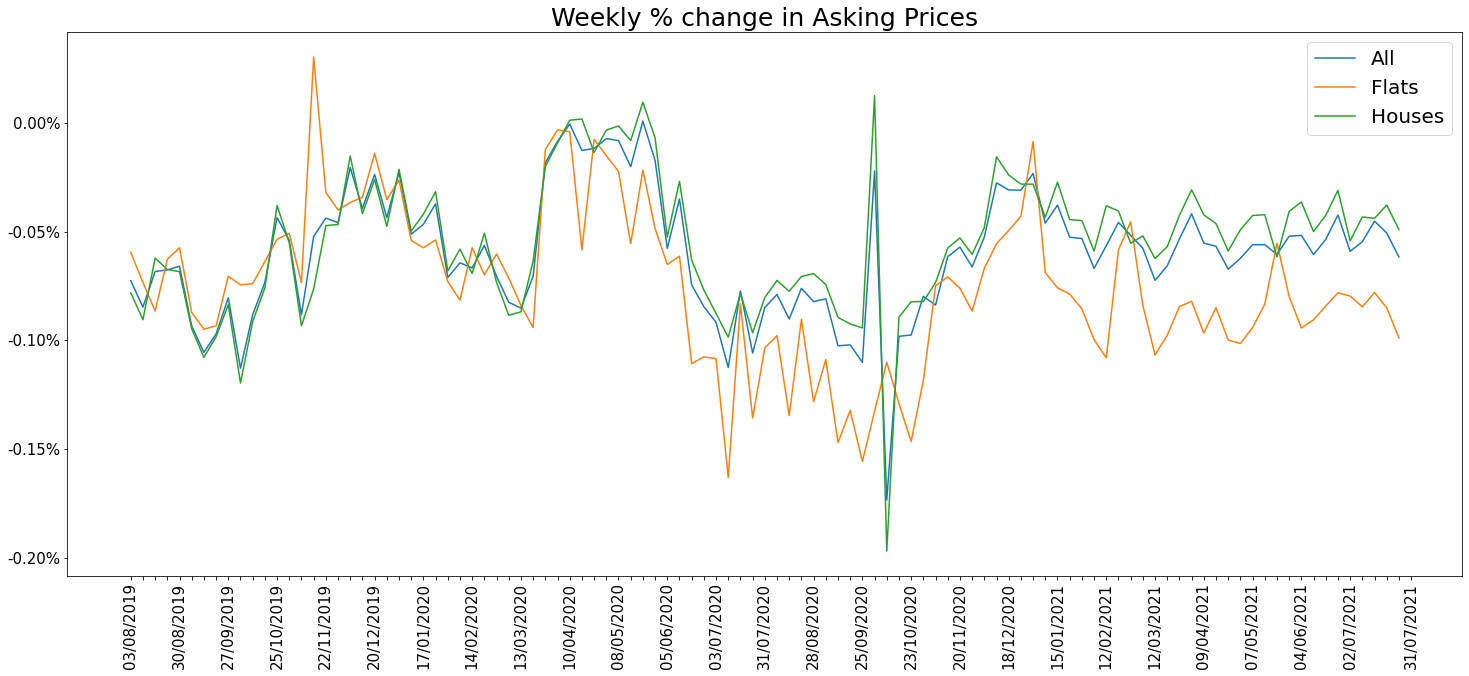

In [160]:
# plot 1 chart showing the weekly % change in Asking Prices

fig, ax = plt.subplots(figsize=(25,10))

plt.subplots_adjust(hspace=0.6, wspace=0.2)

x = df_rightmove.index.values[1:]

labels = list(df_rightmove['Date'][1:])

# prevent x-axis labels from overlapping by printing every nth label
for i in range(4,len(labels[1:]),4):
    labels[i-1], labels[i-2], labels[i-3]='','',''

labels[len(labels)-1]=list(df_rightmove['Date'])[1:][-1]
labels[len(labels)-2], labels[len(labels)-3], labels[len(labels)-4]='','',''

y1 = df_rightmove['price_change_ResiSale_all'][1:]
y2 = df_rightmove['price_change_ResiSale_flat'][1:]
y3 = df_rightmove['price_change_ResiSale_house'][1:]


ax.set_title('Weekly % change in Asking Prices', fontsize=25)
ax.set_xticklabels(labels, rotation=90, fontsize=15)
ax.set_xticks(x)
ax.yaxis.set_major_formatter(ticker.PercentFormatter(1.0, decimals=2))
ax.yaxis.set_tick_params(labelsize=15)
ax.plot(x, y1)
ax.plot(x, y2)
ax.plot(x, y3)
ax.legend(('All', 'Flats', 'Houses'),fontsize=20)

if savePNG == 1 or PwrptPrep == 1:
    savefig = 'Rightmove LD - % change in asking prices houseflat.png'
    plt.savefig(savefig, bbox_inches = 'tight')    
    slideTitle.append('Weekly % change in Asking Prices')
    slideText.append(str(first_data) + ' to '+ str(monthNow))
    imagePath.append(savefig)
    
plt.show()

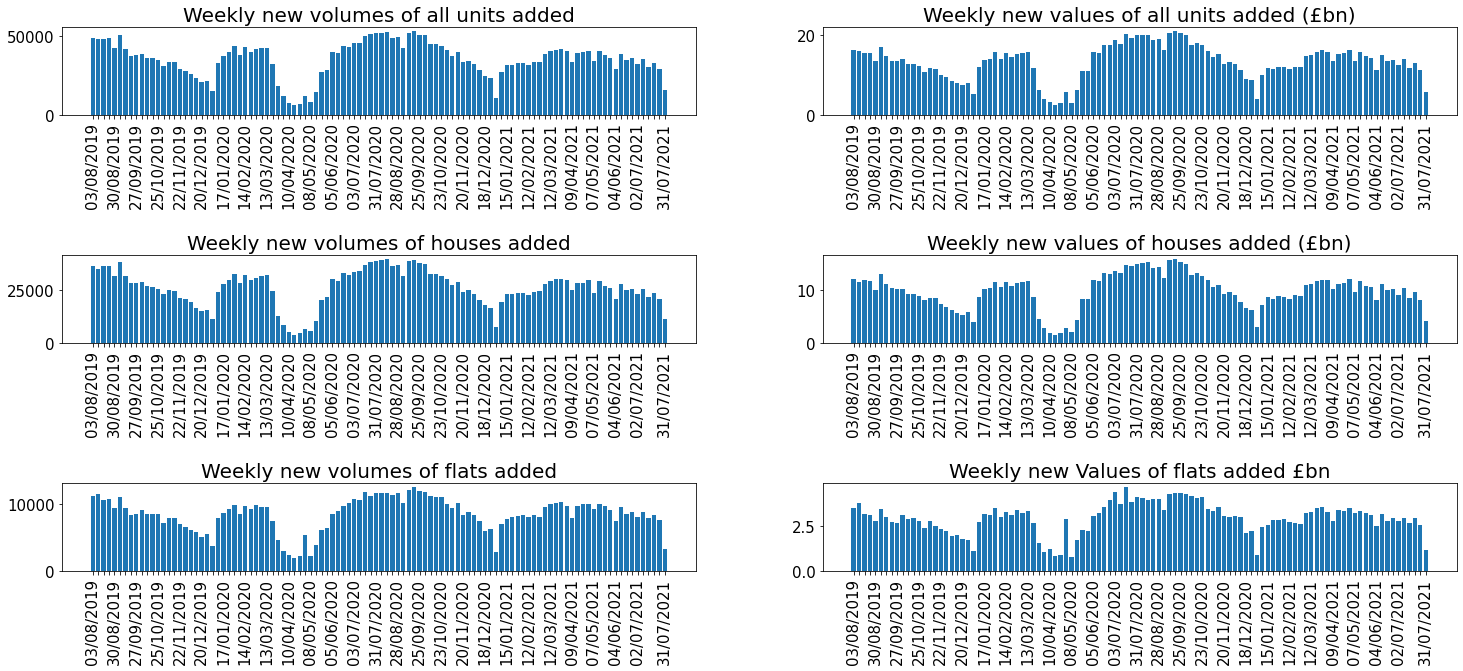

In [161]:
# plot 6 charts showing the weekly new additions of volumes and value

fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(25,10))

plt.subplots_adjust(hspace=1.6, wspace=0.2)

x = df_rightmove.index.values[1:]

labels = list(df_rightmove['Date'][1:])

# prevent x-axis labels from overlapping by printing every nth label
for i in range(4,len(labels[1:]),4):
    labels[i-1], labels[i-2], labels[i-3]='','',''

labels[len(labels)-1]=list(df_rightmove['Date'])[1:][-1]
labels[len(labels)-2], labels[len(labels)-3], labels[len(labels)-4]='','',''

y1 = df_rightmove['newVolume_ResiSale_all'][1:]
y2 = df_rightmove['newValue_ResiSale_all'][1:]/1000000000
y3 = df_rightmove['newVolume_ResiSale_house'][1:]
y4 = df_rightmove['newValue_ResiSale_house'][1:]/1000000000
y5 = df_rightmove['newVolume_ResiSale_flat'][1:]
y6 = df_rightmove['newValue_ResiSale_flat'][1:]/1000000000


set_title=['Weekly new volumes of all units added',
           'Weekly new values of all units added (£bn)',
           'Weekly new volumes of houses added',
           'Weekly new values of houses added (£bn)',
          'Weekly new volumes of flats added',
          'Weekly new Values of flats added £bn']
set_plot = [y1,y2,y3,y4,y5,y6]
set_axis_row = [0,0,1,1,2,2]
set_axis_col = [0,1,0,1,0,1]

for i in range(6):
    ax[set_axis_row[i], set_axis_col[i]].set_title(set_title[i], fontsize=20)
    ax[set_axis_row[i], set_axis_col[i]].set_xticklabels(labels, rotation=90, fontsize=15)
    ax[set_axis_row[i], set_axis_col[i]].set_xticks(x)
    #ax.yaxis.set_major_formatter(ticker.PercentFormatter(1.0, decimals=2))
    ax[set_axis_row[i], set_axis_col[i]].yaxis.set_tick_params(labelsize=15)
    ax[set_axis_row[i], set_axis_col[i]].bar(x, set_plot[i])

# ax[0].set_title('Weekly new volumes of units added', fontsize=25)
# ax[1].set_title('Weekly new values of units added', fontsize=25)
# ax[0].set_xticklabels(labels, rotation=90, fontsize=15)
# ax[0].set_xticks(x)
# #ax.yaxis.set_major_formatter(ticker.PercentFormatter(1.0, decimals=2))
# ax[0].yaxis.set_tick_params(labelsize=15)
# ax[0].bar(x, y1)
# ax[1].bar(x, y2)
# # ax.plot(x, y2)
# # ax.plot(x, y3)
# # ax.plot(x, y4)
# # ax.legend(('Total', 'New', 'Nearly New', 'Used'),fontsize=20)

if savePNG == 1 or PwrptPrep == 1:
    savefig = 'Rightmove LD - new volumes and values houseflat.png'
    plt.savefig(savefig, bbox_inches = 'tight')    
    slideTitle.append('Weekly new units added')
    slideText.append(str(first_data) + ' to '+ str(monthNow))
    imagePath.append(savefig) 
    
plt.show()

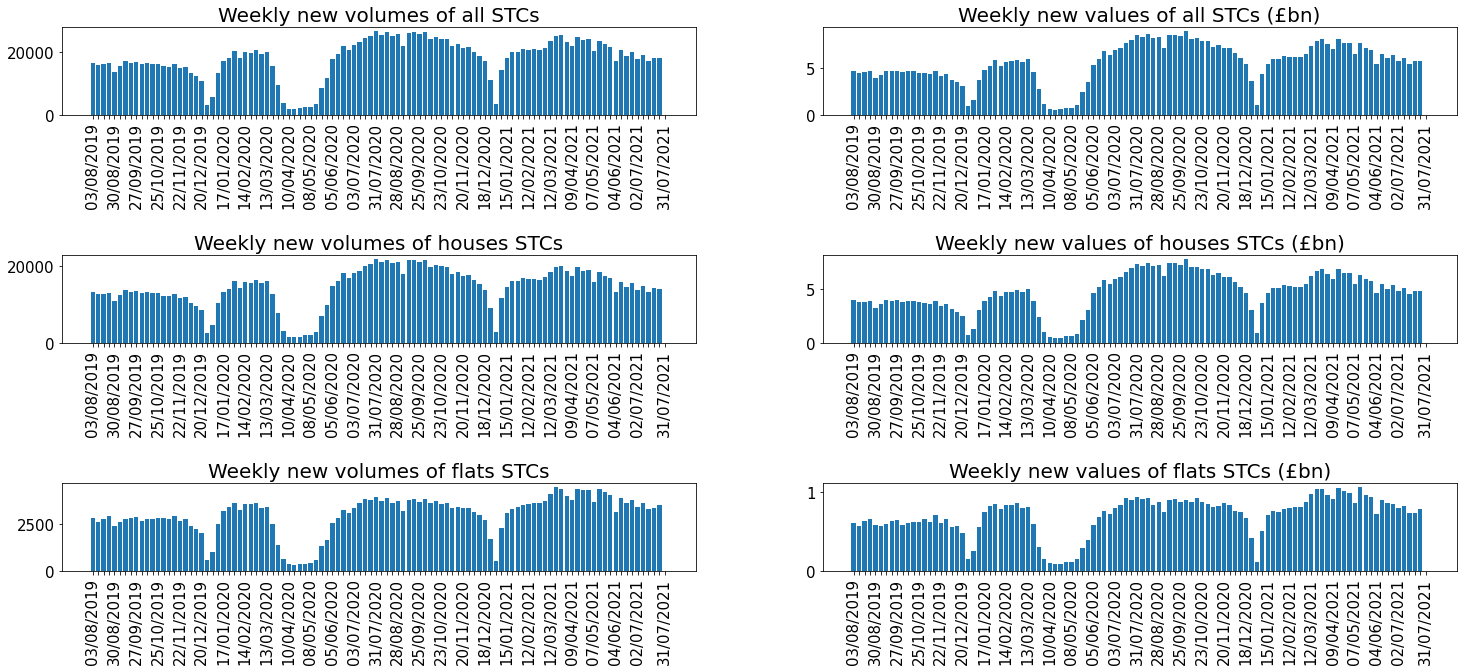

In [162]:
# plot 6 charts showing the weekly new STC volumes and values

fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(25,10))

plt.subplots_adjust(hspace=1.6, wspace=0.2)

x = df_rightmove.index.values[1:]

labels = list(df_rightmove['Date'][1:])

# prevent x-axis labels from overlapping by printing every nth label
for i in range(4,len(labels[1:]),4):
    labels[i-1], labels[i-2], labels[i-3]='','',''

labels[len(labels)-1]=list(df_rightmove['Date'])[1:][-1]
labels[len(labels)-2], labels[len(labels)-3], labels[len(labels)-4]='','',''

y1 = df_rightmove['newVolumeSTC_ResiSale_all'][1:]
y2 = df_rightmove['newValueSTC_ResiSale_all'][1:]/1000000000
y3 = df_rightmove['newVolumeSTC_ResiSale_house'][1:]
y4 = df_rightmove['newValueSTC_ResiSale_house'][1:]/1000000000
y5 = df_rightmove['newVolumeSTC_ResiSale_flat'][1:]
y6 = df_rightmove['newValueSTC_ResiSale_flat'][1:]/1000000000

set_title=['Weekly new volumes of all STCs',
           'Weekly new values of all STCs (£bn)',
           'Weekly new volumes of houses STCs',
           'Weekly new values of houses STCs (£bn)',
           'Weekly new volumes of flats STCs',
           'Weekly new values of flats STCs (£bn)',]
set_plot = [y1,y2,y3,y4,y5,y6]
set_axis_row = [0,0,1,1,2,2]
set_axis_col = [0,1,0,1,0,1]

for i in range(6):
    ax[set_axis_row[i], set_axis_col[i]].set_title(set_title[i], fontsize=20)
    ax[set_axis_row[i], set_axis_col[i]].set_xticklabels(labels, rotation=90, fontsize=15)
    ax[set_axis_row[i], set_axis_col[i]].set_xticks(x)
    #ax.yaxis.set_major_formatter(ticker.PercentFormatter(1.0, decimals=2))
    ax[set_axis_row[i], set_axis_col[i]].yaxis.set_tick_params(labelsize=15)
    ax[set_axis_row[i], set_axis_col[i]].bar(x, set_plot[i])

# ax[0].set_title('Weekly new volumes of of STCs', fontsize=25)
# ax[1].set_title('Weekly new values of STCs', fontsize=25)
# ax[0].set_xticklabels(labels, rotation=90, fontsize=15)
# ax[0].set_xticks(x)
# #ax.yaxis.set_major_formatter(ticker.PercentFormatter(1.0, decimals=2))
# ax[0].yaxis.set_tick_params(labelsize=15)
# ax[0].bar(x, y1)
# ax[1].bar(x, y2)
# # ax.plot(x, y2)
# # ax.plot(x, y3)
# # ax.plot(x, y4)
# # ax.legend(('Total', 'New', 'Nearly New', 'Used'),fontsize=20)

if savePNG == 1 or PwrptPrep == 1:
    savefig = 'Rightmove LD - new STC volumes and values houseflat.png'
    plt.savefig(savefig, bbox_inches = 'tight')    
    slideTitle.append('Weekly new Offers (STCs) made')
    slideText.append(str(first_data) + ' to '+ str(monthNow))
    imagePath.append(savefig)   
    
plt.show()

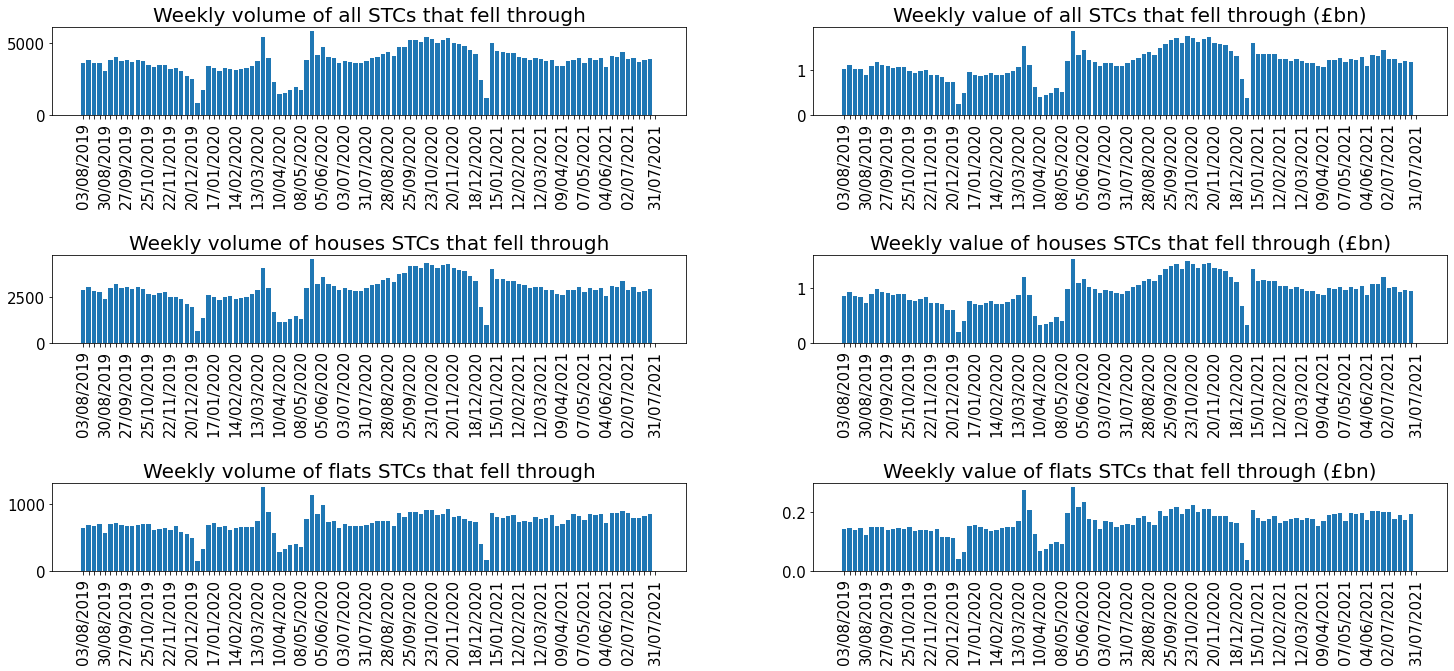

In [163]:
# plot 6 charts showing the weekly STC volumes and values that fell through

fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(25,10))

plt.subplots_adjust(hspace=1.6, wspace=0.2)

x = df_rightmove.index.values[1:]

labels = list(df_rightmove['Date'][1:])

# prevent x-axis labels from overlapping by printing every nth label
for i in range(4,len(labels[1:]),4):
    labels[i-1], labels[i-2], labels[i-3]='','',''

labels[len(labels)-1]=list(df_rightmove['Date'])[1:][-1]
labels[len(labels)-2], labels[len(labels)-3], labels[len(labels)-4]='','',''

y1 = df_rightmove['cancVolumeSTC_ResiSale_all'][1:]
y2 = df_rightmove['cancValueSTC_ResiSale_all'][1:]/1000000000
y3 = df_rightmove['cancVolumeSTC_ResiSale_house'][1:]
y4 = df_rightmove['cancValueSTC_ResiSale_house'][1:]/1000000000
y5 = df_rightmove['cancVolumeSTC_ResiSale_flat'][1:]
y6 = df_rightmove['cancValueSTC_ResiSale_flat'][1:]/1000000000

set_title=['Weekly volume of all STCs that fell through', 
           'Weekly value of all STCs that fell through (£bn)',
          'Weekly volume of houses STCs that fell through', 
           'Weekly value of houses STCs that fell through (£bn)',
           'Weekly volume of flats STCs that fell through', 
           'Weekly value of flats STCs that fell through (£bn)']

set_plot = [y1,y2,y3,y4,y5,y6]
set_axis_row = [0,0,1,1,2,2]
set_axis_col = [0,1,0,1,0,1]

for i in range(6):
    ax[set_axis_row[i], set_axis_col[i]].set_title(set_title[i], fontsize=20)
    ax[set_axis_row[i], set_axis_col[i]].set_xticklabels(labels, rotation=90, fontsize=15)
    ax[set_axis_row[i], set_axis_col[i]].set_xticks(x)
    #ax.yaxis.set_major_formatter(ticker.PercentFormatter(1.0, decimals=2))
    ax[set_axis_row[i], set_axis_col[i]].yaxis.set_tick_params(labelsize=15)
    ax[set_axis_row[i], set_axis_col[i]].bar(x, set_plot[i])

# ax[0].set_title('Weekly new volumes of of STCs', fontsize=25)
# ax[1].set_title('Weekly new values of STCs', fontsize=25)
# ax[0].set_xticklabels(labels, rotation=90, fontsize=15)
# ax[0].set_xticks(x)
# #ax.yaxis.set_major_formatter(ticker.PercentFormatter(1.0, decimals=2))
# ax[0].yaxis.set_tick_params(labelsize=15)
# ax[0].bar(x, y1)
# ax[1].bar(x, y2)
# # ax.plot(x, y2)
# # ax.plot(x, y3)
# # ax.plot(x, y4)
# # ax.legend(('Total', 'New', 'Nearly New', 'Used'),fontsize=20)

if savePNG == 1 or PwrptPrep == 1:
    savefig = 'Rightmove LD - cancelled STC volumes and values houseflat.png'
    plt.savefig(savefig, bbox_inches = 'tight')    
    slideTitle.append('Weekly offers (STCs) that fell through')
    slideText.append(str(first_data) + ' to '+ str(monthNow))
    imagePath.append(savefig) 
    
plt.show()

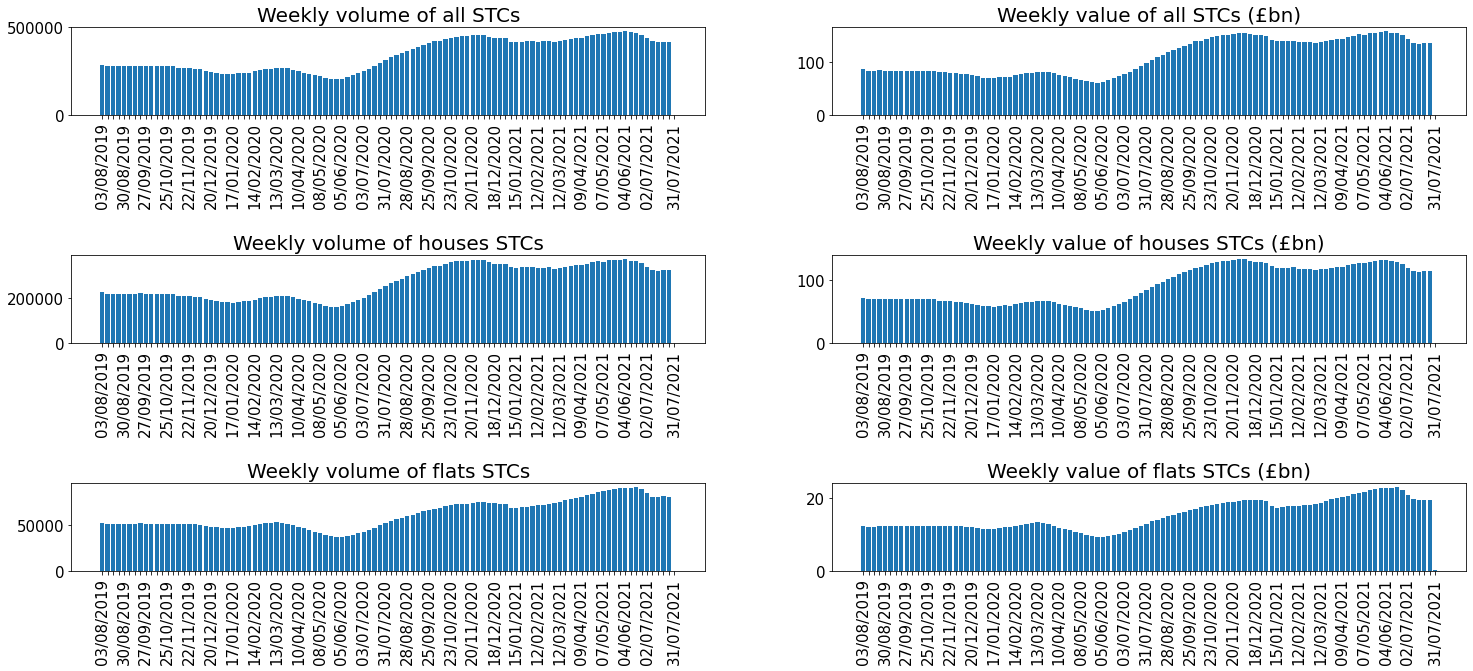

In [164]:
# plot 6 charts showing the total volumes and value of STCs and STCMs

fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(25,10))

plt.subplots_adjust(hspace=1.6, wspace=0.2)

x = df_rightmove.index.values[1:]

labels = list(df_rightmove['Date'][1:])

# prevent x-axis labels from overlapping by printing every nth label
for i in range(4,len(labels[1:]),4):
    labels[i-1], labels[i-2], labels[i-3]='','',''

labels[len(labels)-1]=list(df_rightmove['Date'])[1:][-1]
labels[len(labels)-2], labels[len(labels)-3], labels[len(labels)-4]='','',''

y1 = df_rightmove['STCs_volume_all'][1:]
y2 = df_rightmove['STCs_value_all'][1:]/1000000000
y3 = df_rightmove['STCs_volume_house'][1:]
y4 = df_rightmove['STCs_value_house'][1:]/1000000000
y5 = df_rightmove['STCs_volume_flat'][1:]
y6 = df_rightmove['STCs_value_flat'][1:]/1000000000


set_title=['Weekly volume of all STCs',
           'Weekly value of all STCs (£bn)',
          'Weekly volume of houses STCs',
           'Weekly value of houses STCs (£bn)',
          'Weekly volume of flats STCs',
           'Weekly value of flats STCs (£bn)']

set_plot = [y1,y2,y3,y4,y5,y6]
set_axis_row = [0,0,1,1,2,2]
set_axis_col = [0,1,0,1,0,1]

for i in range(6):
    ax[set_axis_row[i], set_axis_col[i]].set_title(set_title[i], fontsize=20)
    ax[set_axis_row[i], set_axis_col[i]].set_xticklabels(labels, rotation=90, fontsize=15)
    ax[set_axis_row[i], set_axis_col[i]].set_xticks(x)
    #ax.yaxis.set_major_formatter(ticker.PercentFormatter(1.0, decimals=2))
    ax[set_axis_row[i], set_axis_col[i]].yaxis.set_tick_params(labelsize=15)
    ax[set_axis_row[i], set_axis_col[i]].bar(x, set_plot[i])

# ax[0].set_title('Weekly new volumes of of STCs', fontsize=25)
# ax[1].set_title('Weekly new values of STCs', fontsize=25)
# ax[0].set_xticklabels(labels, rotation=90, fontsize=15)
# ax[0].set_xticks(x)
# #ax.yaxis.set_major_formatter(ticker.PercentFormatter(1.0, decimals=2))
# ax[0].yaxis.set_tick_params(labelsize=15)
# ax[0].bar(x, y1)
# ax[1].bar(x, y2)
# # ax.plot(x, y2)
# # ax.plot(x, y3)
# # ax.plot(x, y4)
# # ax.legend(('Total', 'New', 'Nearly New', 'Used'),fontsize=20)

if savePNG == 1 or PwrptPrep == 1:
    savefig = 'Rightmove LD - total STC volumes and values houseflat.png'
    plt.savefig(savefig, bbox_inches = 'tight')    
    slideTitle.append('Weekly offers (STCs) listed on the site')
    slideText.append(str(first_data) + ' to '+ str(monthNow))
    imagePath.append(savefig) 
    
plt.show()

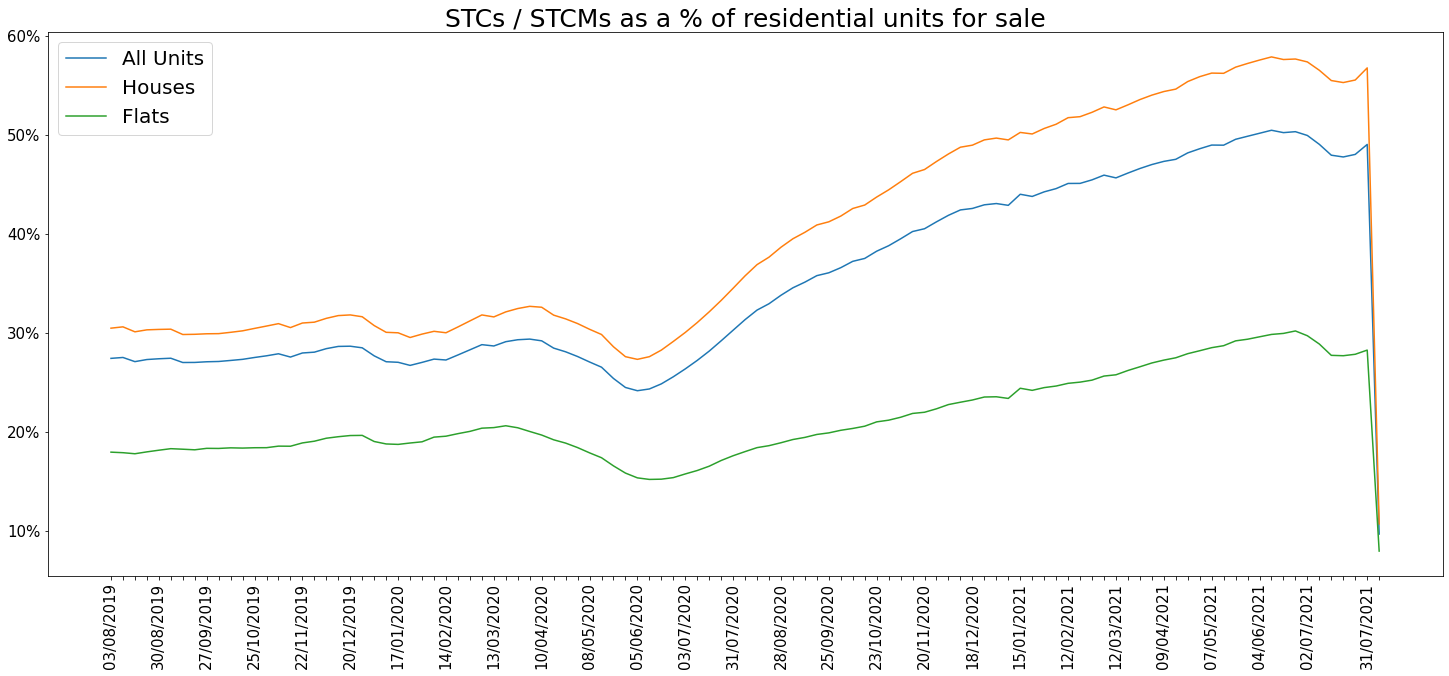

In [165]:
# plot 1 chart showing the % value  of STCs/STCM to total resi units on the site

fig, ax = plt.subplots(figsize=(25,10))

plt.subplots_adjust(hspace=0.6, wspace=0.2)

x = df_rightmove.index.values

labels = list(df_rightmove['Date'][1:])

# prevent x-axis labels from overlapping by printing every nth label
for i in range(4,len(labels),4):
    labels[i-1], labels[i-2], labels[i-3]='','',''

labels[len(labels)-1]=list(df_rightmove['Date'])[-1]
labels[len(labels)-2], labels[len(labels)-3], labels[len(labels)-4]='','',''

y1 = df_rightmove['STCs_value_all']/df_rightmove['resi_value_all']
y2 = df_rightmove['STCs_value_house']/df_rightmove['resi_value_house']
y3 = df_rightmove['STCs_value_flat']/df_rightmove['resi_value_flat']

ax.set_title('STCs / STCMs as a % of residential units for sale', fontsize=25)
ax.set_xticklabels(labels, rotation=90, fontsize=15)
ax.set_xticks(x)
ax.yaxis.set_major_formatter(ticker.PercentFormatter(1.0, decimals=0))
ax.yaxis.set_tick_params(labelsize=15)
ax.plot(x, y1)
ax.plot(x, y2)
ax.plot(x, y3)
# ax.plot(x, y4)
ax.legend(('All Units', 'Houses', 'Flats'),fontsize=20)

if savePNG == 1 or PwrptPrep == 1:
    savefig = 'Rightmove LD - STCs and STCMs as a % of all resi sale units houseflat.png'
    plt.savefig(savefig, bbox_inches = 'tight')    
    slideTitle.append('Weekly offers on the site as a % of all units')
    slideText.append(str(first_data) + ' to '+ str(monthNow))
    imagePath.append(savefig)
    
plt.show()

In [166]:
# for the presentation, insert a new chapter slide

if savePNG == 1 or PwrptPrep == 1:
    
    slideTitle.append('UK national data - Second Hand vs New Build')
    slideText.append('')
    imagePath.append('')

plt.show()

In [167]:
#
# UK wide charts - second hand vs new
#

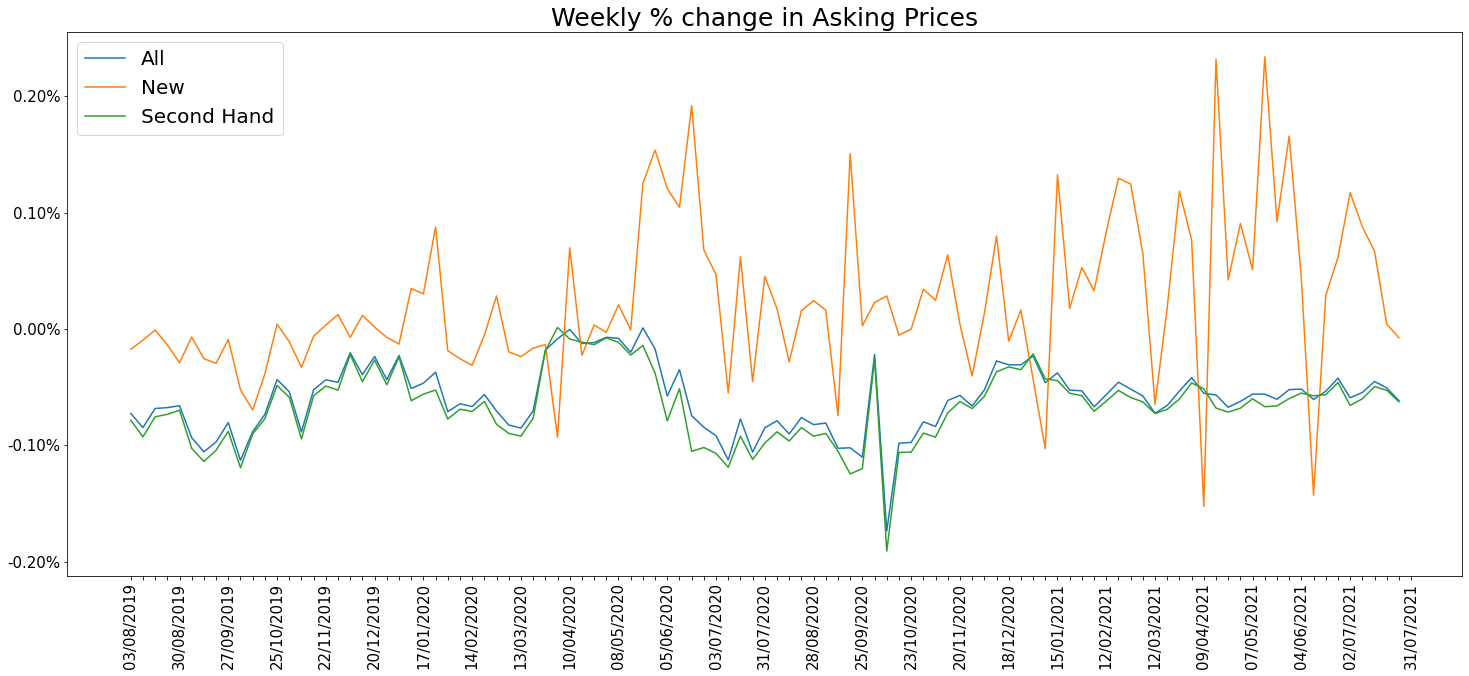

In [168]:
# plot 1 chart showing the weekly % change in Asking Prices

fig, ax = plt.subplots(figsize=(25,10))

plt.subplots_adjust(hspace=0.6, wspace=0.2)

x = df_rightmove.index.values[1:]

labels = list(df_rightmove['Date'][1:])

# prevent x-axis labels from overlapping by printing every nth label
for i in range(4,len(labels[1:]),4):
    labels[i-1], labels[i-2], labels[i-3]='','',''

labels[len(labels)-1]=list(df_rightmove['Date'])[1:][-1]
labels[len(labels)-2], labels[len(labels)-3], labels[len(labels)-4]='','',''

y1 = df_rightmove['price_change_ResiSale_all'][1:]
y2 = df_rightmove['price_change_ResiSale_new'][1:]
y3 = df_rightmove['price_change_ResiSale_scdhd'][1:]


ax.set_title('Weekly % change in Asking Prices', fontsize=25)
ax.set_xticklabels(labels, rotation=90, fontsize=15)
ax.set_xticks(x)
ax.yaxis.set_major_formatter(ticker.PercentFormatter(1.0, decimals=2))
ax.yaxis.set_tick_params(labelsize=15)
ax.plot(x, y1)
ax.plot(x, y2)
ax.plot(x, y3)
ax.legend(('All', 'New', 'Second Hand'),fontsize=20)

if savePNG == 1 or PwrptPrep == 1:
    savefig = 'Rightmove LD - % change in asking prices.png'
    plt.savefig(savefig, bbox_inches = 'tight')    
    slideTitle.append('Weekly % change in Asking Prices')
    slideText.append(str(first_data) + ' to '+ str(monthNow))
    imagePath.append(savefig)
    
plt.show()

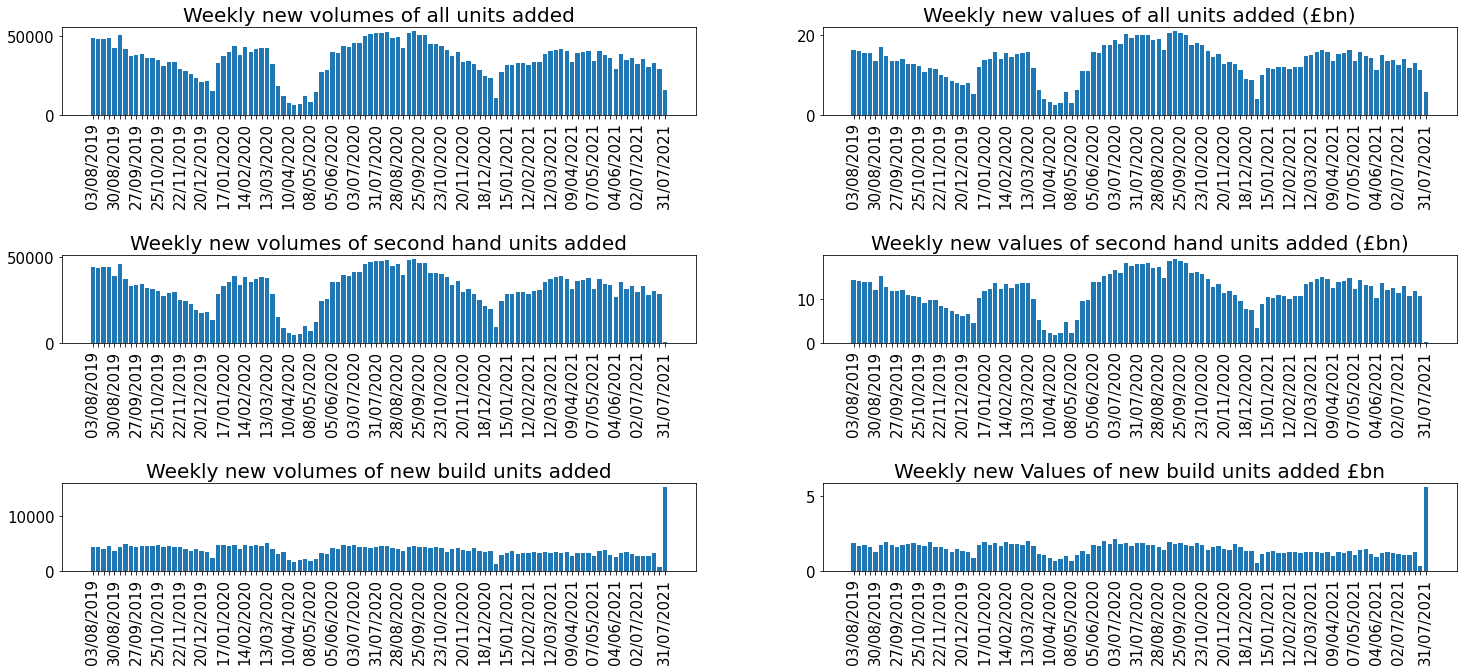

In [169]:
# plot 6 charts showing the weekly new additions of volumes and value

fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(25,10))

plt.subplots_adjust(hspace=1.6, wspace=0.2)

x = df_rightmove.index.values[1:]

labels = list(df_rightmove['Date'][1:])

# prevent x-axis labels from overlapping by printing every nth label
for i in range(4,len(labels[1:]),4):
    labels[i-1], labels[i-2], labels[i-3]='','',''

labels[len(labels)-1]=list(df_rightmove['Date'])[1:][-1]
labels[len(labels)-2], labels[len(labels)-3], labels[len(labels)-4]='','',''

y1 = df_rightmove['newVolume_ResiSale_all'][1:]
y2 = df_rightmove['newValue_ResiSale_all'][1:]/1000000000
y3 = df_rightmove['newVolume_ResiSale_scdhd'][1:]
y4 = df_rightmove['newValue_ResiSale_scdhd'][1:]/1000000000
y5 = df_rightmove['newVolume_ResiSale_new'][1:]
y6 = df_rightmove['newValue_ResiSale_new'][1:]/1000000000


set_title=['Weekly new volumes of all units added',
           'Weekly new values of all units added (£bn)',
           'Weekly new volumes of second hand units added',
           'Weekly new values of second hand units added (£bn)',
          'Weekly new volumes of new build units added',
          'Weekly new Values of new build units added £bn']
set_plot = [y1,y2,y3,y4,y5,y6]
set_axis_row = [0,0,1,1,2,2]
set_axis_col = [0,1,0,1,0,1]

for i in range(6):
    ax[set_axis_row[i], set_axis_col[i]].set_title(set_title[i], fontsize=20)
    ax[set_axis_row[i], set_axis_col[i]].set_xticklabels(labels, rotation=90, fontsize=15)
    ax[set_axis_row[i], set_axis_col[i]].set_xticks(x)
    #ax.yaxis.set_major_formatter(ticker.PercentFormatter(1.0, decimals=2))
    ax[set_axis_row[i], set_axis_col[i]].yaxis.set_tick_params(labelsize=15)
    ax[set_axis_row[i], set_axis_col[i]].bar(x, set_plot[i])

# ax[0].set_title('Weekly new volumes of units added', fontsize=25)
# ax[1].set_title('Weekly new values of units added', fontsize=25)
# ax[0].set_xticklabels(labels, rotation=90, fontsize=15)
# ax[0].set_xticks(x)
# #ax.yaxis.set_major_formatter(ticker.PercentFormatter(1.0, decimals=2))
# ax[0].yaxis.set_tick_params(labelsize=15)
# ax[0].bar(x, y1)
# ax[1].bar(x, y2)
# # ax.plot(x, y2)
# # ax.plot(x, y3)
# # ax.plot(x, y4)
# # ax.legend(('Total', 'New', 'Nearly New', 'Used'),fontsize=20)

if savePNG == 1 or PwrptPrep == 1:
    savefig = 'Rightmove LD - new volumes and values.png'
    plt.savefig(savefig, bbox_inches = 'tight')    
    slideTitle.append('Weekly new units added')
    slideText.append(str(first_data) + ' to '+ str(monthNow))
    imagePath.append(savefig) 
    
plt.show()

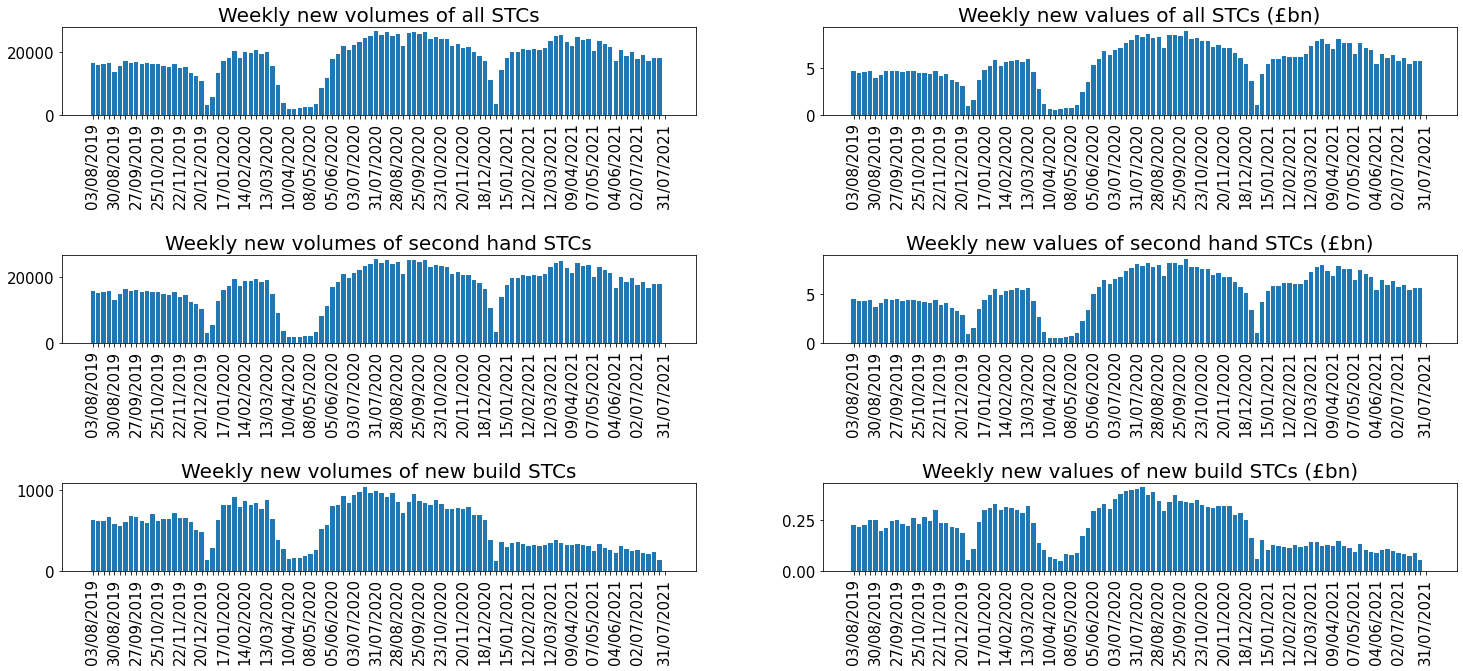

In [170]:
# plot 6 charts showing the weekly new STC volumes and values

fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(25,10))

plt.subplots_adjust(hspace=1.6, wspace=0.2)

x = df_rightmove.index.values[1:]

labels = list(df_rightmove['Date'][1:])

# prevent x-axis labels from overlapping by printing every nth label
for i in range(4,len(labels[1:]),4):
    labels[i-1], labels[i-2], labels[i-3]='','',''

labels[len(labels)-1]=list(df_rightmove['Date'])[1:][-1]
labels[len(labels)-2], labels[len(labels)-3], labels[len(labels)-4]='','',''

y1 = df_rightmove['newVolumeSTC_ResiSale_all'][1:]
y2 = df_rightmove['newValueSTC_ResiSale_all'][1:]/1000000000
y3 = df_rightmove['newVolumeSTC_ResiSale_scdhd'][1:]
y4 = df_rightmove['newValueSTC_ResiSale_scdhd'][1:]/1000000000
y5 = df_rightmove['newVolumeSTC_ResiSale_new'][1:]
y6 = df_rightmove['newValueSTC_ResiSale_new'][1:]/1000000000

set_title=['Weekly new volumes of all STCs',
           'Weekly new values of all STCs (£bn)',
           'Weekly new volumes of second hand STCs',
           'Weekly new values of second hand STCs (£bn)',
           'Weekly new volumes of new build STCs',
           'Weekly new values of new build STCs (£bn)',]
set_plot = [y1,y2,y3,y4,y5,y6]
set_axis_row = [0,0,1,1,2,2]
set_axis_col = [0,1,0,1,0,1]

for i in range(6):
    ax[set_axis_row[i], set_axis_col[i]].set_title(set_title[i], fontsize=20)
    ax[set_axis_row[i], set_axis_col[i]].set_xticklabels(labels, rotation=90, fontsize=15)
    ax[set_axis_row[i], set_axis_col[i]].set_xticks(x)
    #ax.yaxis.set_major_formatter(ticker.PercentFormatter(1.0, decimals=2))
    ax[set_axis_row[i], set_axis_col[i]].yaxis.set_tick_params(labelsize=15)
    ax[set_axis_row[i], set_axis_col[i]].bar(x, set_plot[i])

# ax[0].set_title('Weekly new volumes of of STCs', fontsize=25)
# ax[1].set_title('Weekly new values of STCs', fontsize=25)
# ax[0].set_xticklabels(labels, rotation=90, fontsize=15)
# ax[0].set_xticks(x)
# #ax.yaxis.set_major_formatter(ticker.PercentFormatter(1.0, decimals=2))
# ax[0].yaxis.set_tick_params(labelsize=15)
# ax[0].bar(x, y1)
# ax[1].bar(x, y2)
# # ax.plot(x, y2)
# # ax.plot(x, y3)
# # ax.plot(x, y4)
# # ax.legend(('Total', 'New', 'Nearly New', 'Used'),fontsize=20)

if savePNG == 1 or PwrptPrep == 1:
    savefig = 'Rightmove LD - new STC volumes and values.png'
    plt.savefig(savefig, bbox_inches = 'tight')    
    slideTitle.append('Weekly new Offers (STCs) made')
    slideText.append(str(first_data) + ' to '+ str(monthNow))
    imagePath.append(savefig)   
    
plt.show()

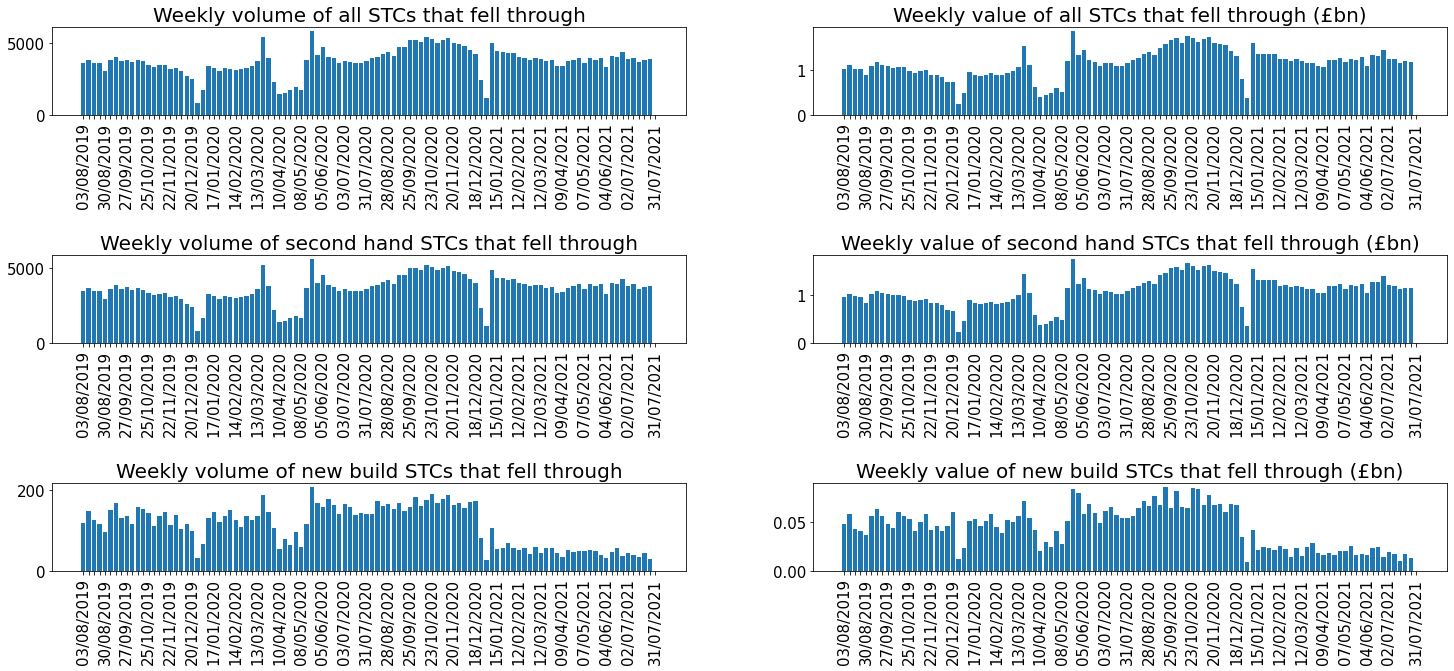

In [171]:
# plot 6 charts showing the weekly STC volumes and values that fell through

fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(25,10))

plt.subplots_adjust(hspace=1.6, wspace=0.2)

x = df_rightmove.index.values[1:]

labels = list(df_rightmove['Date'][1:])

# prevent x-axis labels from overlapping by printing every nth label
for i in range(4,len(labels[1:]),4):
    labels[i-1], labels[i-2], labels[i-3]='','',''

labels[len(labels)-1]=list(df_rightmove['Date'])[1:][-1]
labels[len(labels)-2], labels[len(labels)-3], labels[len(labels)-4]='','',''

y1 = df_rightmove['cancVolumeSTC_ResiSale_all'][1:]
y2 = df_rightmove['cancValueSTC_ResiSale_all'][1:]/1000000000
y3 = df_rightmove['cancVolumeSTC_ResiSale_scdhd'][1:]
y4 = df_rightmove['cancValueSTC_ResiSale_scdhd'][1:]/1000000000
y5 = df_rightmove['cancVolumeSTC_ResiSale_new'][1:]
y6 = df_rightmove['cancValueSTC_ResiSale_new'][1:]/1000000000

set_title=['Weekly volume of all STCs that fell through', 
           'Weekly value of all STCs that fell through (£bn)',
          'Weekly volume of second hand STCs that fell through', 
           'Weekly value of second hand STCs that fell through (£bn)',
           'Weekly volume of new build STCs that fell through', 
           'Weekly value of new build STCs that fell through (£bn)']

set_plot = [y1,y2,y3,y4,y5,y6]
set_axis_row = [0,0,1,1,2,2]
set_axis_col = [0,1,0,1,0,1]

for i in range(6):
    ax[set_axis_row[i], set_axis_col[i]].set_title(set_title[i], fontsize=20)
    ax[set_axis_row[i], set_axis_col[i]].set_xticklabels(labels, rotation=90, fontsize=15)
    ax[set_axis_row[i], set_axis_col[i]].set_xticks(x)
    #ax.yaxis.set_major_formatter(ticker.PercentFormatter(1.0, decimals=2))
    ax[set_axis_row[i], set_axis_col[i]].yaxis.set_tick_params(labelsize=15)
    ax[set_axis_row[i], set_axis_col[i]].bar(x, set_plot[i])

# ax[0].set_title('Weekly new volumes of of STCs', fontsize=25)
# ax[1].set_title('Weekly new values of STCs', fontsize=25)
# ax[0].set_xticklabels(labels, rotation=90, fontsize=15)
# ax[0].set_xticks(x)
# #ax.yaxis.set_major_formatter(ticker.PercentFormatter(1.0, decimals=2))
# ax[0].yaxis.set_tick_params(labelsize=15)
# ax[0].bar(x, y1)
# ax[1].bar(x, y2)
# # ax.plot(x, y2)
# # ax.plot(x, y3)
# # ax.plot(x, y4)
# # ax.legend(('Total', 'New', 'Nearly New', 'Used'),fontsize=20)

if savePNG == 1 or PwrptPrep == 1:
    savefig = 'Rightmove LD - cancelled STC volumes and values.png'
    plt.savefig(savefig, bbox_inches = 'tight')    
    slideTitle.append('Weekly offers (STCs) that fell through')
    slideText.append(str(first_data) + ' to '+ str(monthNow))
    imagePath.append(savefig) 
    
plt.show()

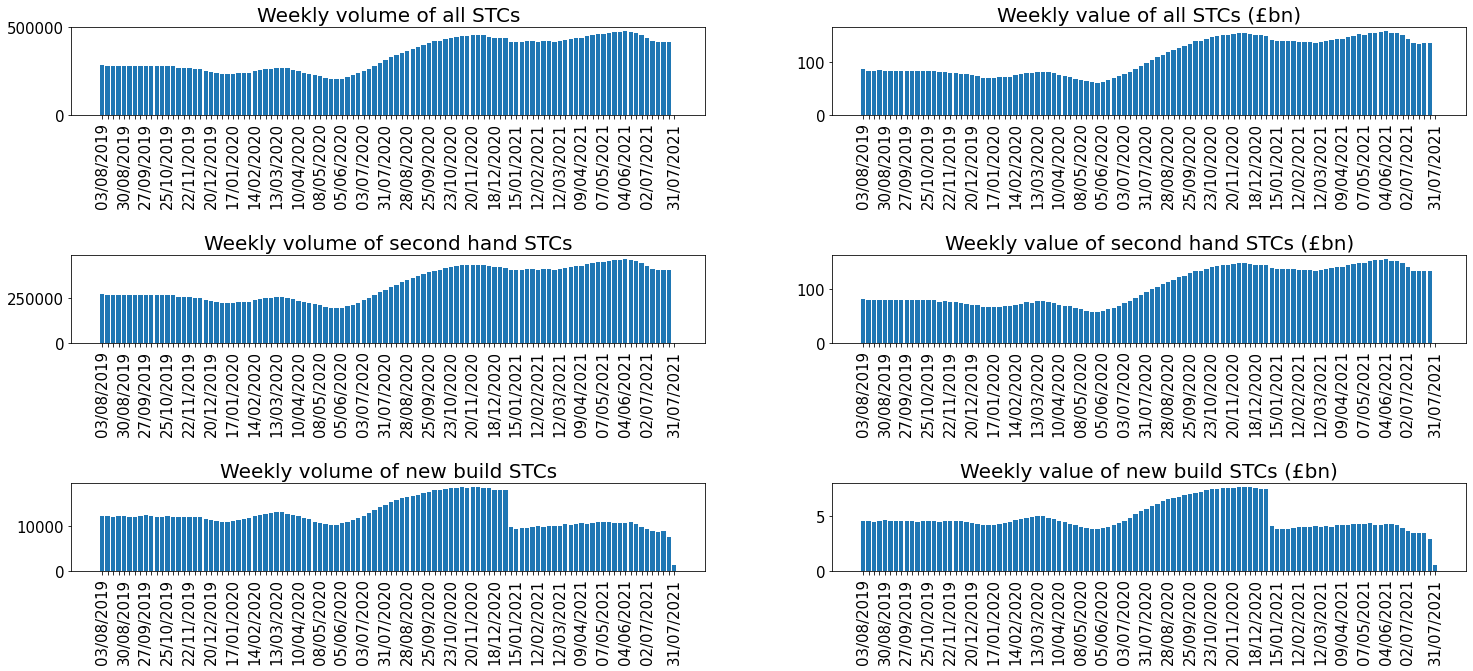

In [172]:
# plot 6 charts showing the total volumes and value of STCs and STCMs

fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(25,10))

plt.subplots_adjust(hspace=1.6, wspace=0.2)

x = df_rightmove.index.values[1:]

labels = list(df_rightmove['Date'][1:])

# prevent x-axis labels from overlapping by printing every nth label
for i in range(4,len(labels[1:]),4):
    labels[i-1], labels[i-2], labels[i-3]='','',''

labels[len(labels)-1]=list(df_rightmove['Date'])[1:][-1]
labels[len(labels)-2], labels[len(labels)-3], labels[len(labels)-4]='','',''

y1 = df_rightmove['STCs_volume_all'][1:]
y2 = df_rightmove['STCs_value_all'][1:]/1000000000
y3 = df_rightmove['STCs_volume_scdhd'][1:]
y4 = df_rightmove['STCs_value_scdhd'][1:]/1000000000
y5 = df_rightmove['STCs_volume_new'][1:]
y6 = df_rightmove['STCs_value_new'][1:]/1000000000


set_title=['Weekly volume of all STCs',
           'Weekly value of all STCs (£bn)',
          'Weekly volume of second hand STCs',
           'Weekly value of second hand STCs (£bn)',
          'Weekly volume of new build STCs',
           'Weekly value of new build STCs (£bn)']

set_plot = [y1,y2,y3,y4,y5,y6]
set_axis_row = [0,0,1,1,2,2]
set_axis_col = [0,1,0,1,0,1]

for i in range(6):
    ax[set_axis_row[i], set_axis_col[i]].set_title(set_title[i], fontsize=20)
    ax[set_axis_row[i], set_axis_col[i]].set_xticklabels(labels, rotation=90, fontsize=15)
    ax[set_axis_row[i], set_axis_col[i]].set_xticks(x)
    #ax.yaxis.set_major_formatter(ticker.PercentFormatter(1.0, decimals=2))
    ax[set_axis_row[i], set_axis_col[i]].yaxis.set_tick_params(labelsize=15)
    ax[set_axis_row[i], set_axis_col[i]].bar(x, set_plot[i])

# ax[0].set_title('Weekly new volumes of of STCs', fontsize=25)
# ax[1].set_title('Weekly new values of STCs', fontsize=25)
# ax[0].set_xticklabels(labels, rotation=90, fontsize=15)
# ax[0].set_xticks(x)
# #ax.yaxis.set_major_formatter(ticker.PercentFormatter(1.0, decimals=2))
# ax[0].yaxis.set_tick_params(labelsize=15)
# ax[0].bar(x, y1)
# ax[1].bar(x, y2)
# # ax.plot(x, y2)
# # ax.plot(x, y3)
# # ax.plot(x, y4)
# # ax.legend(('Total', 'New', 'Nearly New', 'Used'),fontsize=20)

if savePNG == 1 or PwrptPrep == 1:
    savefig = 'Rightmove LD - total STC volumes and values.png'
    plt.savefig(savefig, bbox_inches = 'tight')    
    slideTitle.append('Weekly offers (STCs) listed on the site')
    slideText.append(str(first_data) + ' to '+ str(monthNow))
    imagePath.append(savefig) 
    
plt.show()

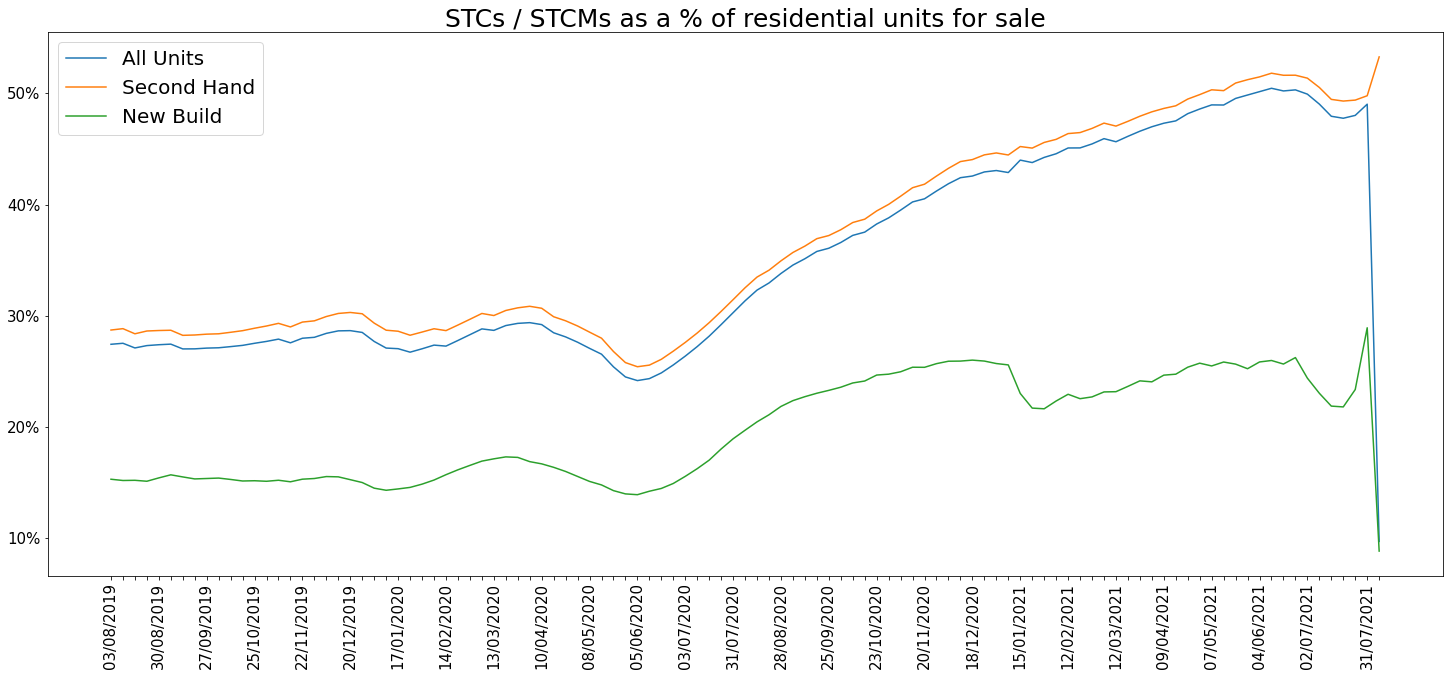

In [173]:
# plot 1 chart showing the % value  of STCs/STCM to total resi units on the site

fig, ax = plt.subplots(figsize=(25,10))

plt.subplots_adjust(hspace=0.6, wspace=0.2)

x = df_rightmove.index.values

labels = list(df_rightmove['Date'][1:])

# prevent x-axis labels from overlapping by printing every nth label
for i in range(4,len(labels),4):
    labels[i-1], labels[i-2], labels[i-3]='','',''

labels[len(labels)-1]=list(df_rightmove['Date'])[-1]
labels[len(labels)-2], labels[len(labels)-3], labels[len(labels)-4]='','',''

y1 = df_rightmove['STCs_value_all']/df_rightmove['resi_value_all']
y2 = df_rightmove['STCs_value_scdhd']/df_rightmove['resi_value_scdhd']
y3 = df_rightmove['STCs_value_new']/df_rightmove['resi_value_new']

ax.set_title('STCs / STCMs as a % of residential units for sale', fontsize=25)
ax.set_xticklabels(labels, rotation=90, fontsize=15)
ax.set_xticks(x)
ax.yaxis.set_major_formatter(ticker.PercentFormatter(1.0, decimals=0))
ax.yaxis.set_tick_params(labelsize=15)
ax.plot(x, y1)
ax.plot(x, y2)
ax.plot(x, y3)
# ax.plot(x, y4)
ax.legend(('All Units', 'Second Hand', 'New Build'),fontsize=20)

if savePNG == 1 or PwrptPrep == 1:
    savefig = 'Rightmove LD - STCs and STCMs as a % of all resi sale units.png'
    plt.savefig(savefig, bbox_inches = 'tight')    
    slideTitle.append('Weekly offers on the site as a % of all units')
    slideText.append(str(first_data) + ' to '+ str(monthNow))
    imagePath.append(savefig)
    
plt.show()

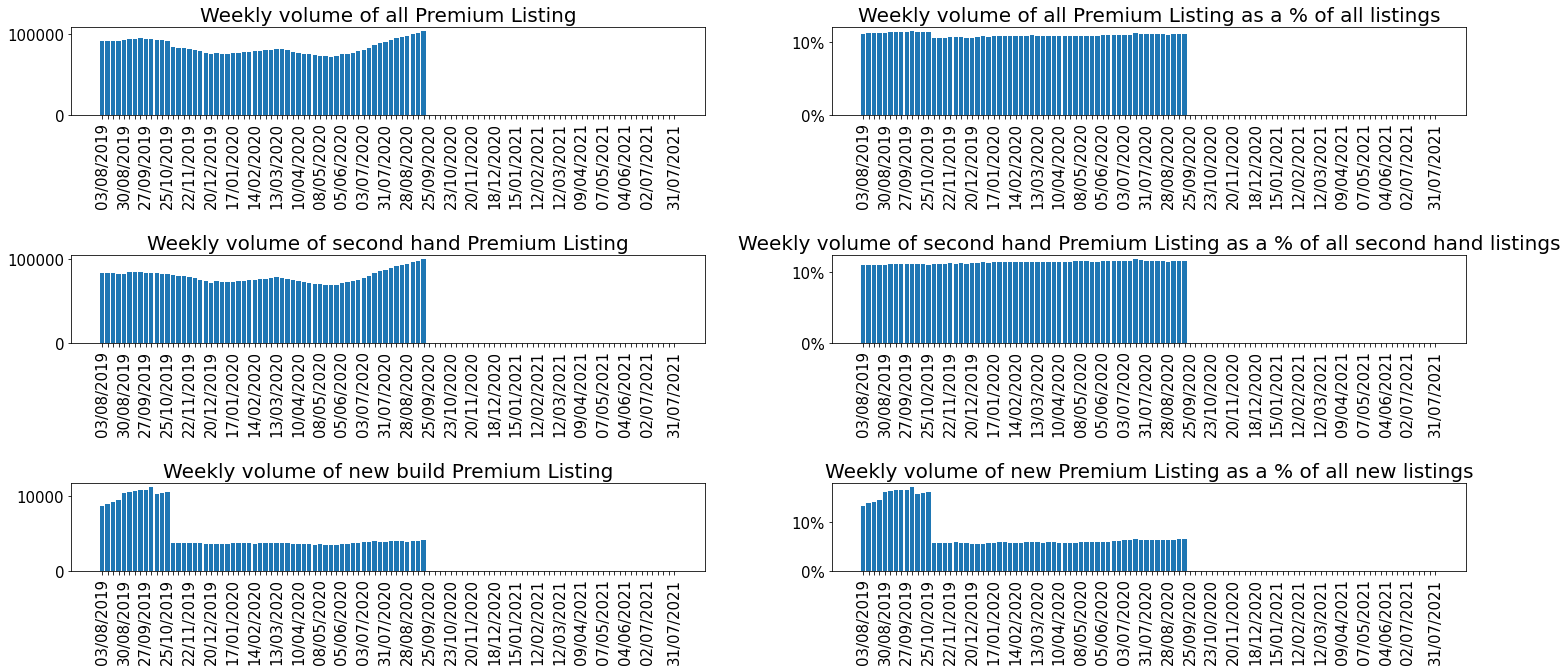

In [174]:
# plot 6 charts showing the total volumes of 'premium listing'

fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(25,10))

plt.subplots_adjust(hspace=1.6, wspace=0.2)

x = df_rightmove.index.values[1:]

labels = list(df_rightmove['Date'][1:])

# prevent x-axis labels from overlapping by printing every nth label
for i in range(4,len(labels[1:]),4):
    labels[i-1], labels[i-2], labels[i-3]='','',''

labels[len(labels)-1]=list(df_rightmove['Date'])[1:][-1]
labels[len(labels)-2], labels[len(labels)-3], labels[len(labels)-4]='','',''

y1 = df_rightmove['plist_vol_all'][1:]
y2 = df_rightmove['plist_vol_all'][1:]/(df_rightmove['property_for_sale'][1:] + df_rightmove['new_homes_for_sale'][1:])
y3 = df_rightmove['plist_vol_scdhd'][1:]
y4 = df_rightmove['plist_vol_scdhd'][1:]/df_rightmove['property_for_sale'][1:]
y5 = df_rightmove['plist_vol_new'][1:]
y6 = df_rightmove['plist_vol_new'][1:]/df_rightmove['new_homes_for_sale'][1:]


set_title=['Weekly volume of all Premium Listing',
           'Weekly volume of all Premium Listing as a % of all listings',
          'Weekly volume of second hand Premium Listing',
           'Weekly volume of second hand Premium Listing as a % of all second hand listings',
          'Weekly volume of new build Premium Listing',
          'Weekly volume of new Premium Listing as a % of all new listings']

set_plot = [y1,y2,y3,y4,y5,y6]
set_axis_row = [0,0,1,1,2,2]
set_axis_col = [0,1,0,1,0,1]

for i in range(6):
    ax[set_axis_row[i], set_axis_col[i]].set_title(set_title[i], fontsize=20)
    ax[set_axis_row[i], set_axis_col[i]].set_xticklabels(labels, rotation=90, fontsize=15)
    ax[set_axis_row[i], set_axis_col[i]].set_xticks(x)
    if (i % 2) == 1:
        ax[set_axis_row[i], set_axis_col[i]].yaxis.set_major_formatter(ticker.PercentFormatter(1.0, decimals=0))
    ax[set_axis_row[i], set_axis_col[i]].yaxis.set_tick_params(labelsize=15)
    ax[set_axis_row[i], set_axis_col[i]].bar(x, set_plot[i])

# ax[0].set_title('Weekly new volumes of of STCs', fontsize=25)
# ax[1].set_title('Weekly new values of STCs', fontsize=25)
# ax[0].set_xticklabels(labels, rotation=90, fontsize=15)
# ax[0].set_xticks(x)
# #ax.yaxis.set_major_formatter(ticker.PercentFormatter(1.0, decimals=2))
# ax[0].yaxis.set_tick_params(labelsize=15)
# ax[0].bar(x, y1)
# ax[1].bar(x, y2)
# # ax.plot(x, y2)
# # ax.plot(x, y3)
# # ax.plot(x, y4)
# # ax.legend(('Total', 'New', 'Nearly New', 'Used'),fontsize=20)

if savePNG == 1 or PwrptPrep == 1:
    savefig = 'Rightmove LD - total premium listing volumes.png'
    plt.savefig(savefig, bbox_inches = 'tight')    
    slideTitle.append('Weekly premium listings listed on the site')
    slideText.append(str(first_data) + ' to '+ str(monthNow))
    imagePath.append(savefig) 
    
plt.show()

In [175]:
df_rightmove.head()

Date  Total branches  Total url branches  Sales branches  \
0  26/07/2019           22581               39688           13229   
1  03/08/2019           22538               39519           13191   
2  09/08/2019           22549               39636           13194   
3  16/08/2019           22495               39444           13186   
4  23/08/2019           22501               39502           13177   

   New Homes branches  Letting branches  Com Sales branches  \
0                8703             10986                4151   
1                8705             10945                4077   
2                8730             10955                4151   
3                8672             10897                4102   
4                8718             10887                4138   

   Com Rent branches  total_properties  new homes  property_for_sale  \
0               2619           1135850      65680             763829   
1               2601           1128697      65771             761651   
2               2606           1118696      65682             753046   
3               2587           1112132      65003             751009   
4               2582           1109981      65148             752036   

   new_homes_for_sale  property_to_rent  overseas_property  \
0               65568            242834                  1   
1               65646            237237                  1   
2               65549            235810                  1   
3               64892            232219                  1   
4               65036            228558                  1   

   commercial_property_for_sale  commercial_property_to_let  check properties  \
0                         29516                       34102                 0   
1                         29596                       34566                 0   
2                         29689                       34601                 0   
3                         29671                       34340                 0   
4                         29873                       34477                 0   

   check branches  price_change_ResiSale_all  price_change_ResiSale_house  \
0               0                   0.000000                     0.000000   
1               0                  -0.000725                    -0.000780   
2               0                  -0.000846                    -0.000905   
3               0                  -0.000682                    -0.000621   
4               0                  -0.000675                    -0.000673   

   price_change_ResiSale_flat  newVolume_ResiSale_flat  \
0                    0.000000                        0   
1                   -0.000594                    11187   
2                   -0.000733                    11387   
3                   -0.000864                    10567   
4                   -0.000626                    10660   

   newValue_ResiSale_flat  newVolume_ResiSale_house  newValue_ResiSale_house  \
0            0.000000e+00                         0             0.000000e+00   
1            3.540108e+09                     36193             1.222642e+10   
2            3.818384e+09                     35098             1.155502e+10   
3            3.188372e+09                     36255             1.192503e+10   
4            3.157188e+09                     36481             1.180163e+10   

   newVolume_ResiSale_all  newValue_ResiSale_all  newVolumeSTC_ResiSale_flat  \
0                       0           0.000000e+00                           0   
1                   48631           1.614774e+10                        2826   
2                   47828           1.579176e+10                        2619   
3                   48026           1.547795e+10                        2759   
4                   48450           1.534945e+10                        2954   

   newValueSTC_ResiSale_flat  newVolumeSTC_ResiSale_house  \
0                        0.0                            0   
1                608689740

In [176]:
df[-1].head()

branch_id                         name      telephone  \
0     146693  Nest Estate Agents, Enderby  0116 452 0261   
1     146693  Nest Estate Agents, Enderby  0116 452 0261   
2     146693  Nest Estate Agents, Enderby  0116 452 0261   
4     146693  Nest Estate Agents, Enderby  0116 452 0261   
5     146693  Nest Estate Agents, Enderby  0116 452 0261   

                               address  results  \
0  22a Cross Street, Enderby, LE19 4NJ     26.0   
1  22a Cross Street, Enderby, LE19 4NJ     26.0   
2  22a Cross Street, Enderby, LE19 4NJ     26.0   
4  22a Cross Street, Enderby, LE19 4NJ     26.0   
5  22a Cross Street, Enderby, LE19 4NJ     26.0   

                                          branch_url property_URL     price  \
0  https://www.rightmove.co.uk/property-for-sale/...    110955719  335000.0   
1  https://www.rightmove.co.uk/property-for-sale/...    108411608  385000.0   
2  https://www.rightmove.co.uk/property-for-sale/...    109976828  350000.0   
4  https://www.rightmove.co.uk/property-for-sale/...    108040982  325000.0   
5  https://www.rightmove.co.uk/property-for-sale/...    102376790  320000.0   

                                  title  \
0     4 bedroom detached house for sale   
1     4 bedroom detached house for sale   
2  3 bedroom detached bungalow for sale   
4     4 bedroom detached house for sale   
5     4 bedroom detached house for sale   

                                    property_address  images  \
0           Godfrey Close, Stoney Stanton, Leicester    18.0   
1                   Ashton Drive, Enderby, Leicester    17.0   
2  Charnwood Drive, Leicester Forest East, Leicester    19.0   
4               Copt Oak Road, Narborough, Leicester    19.0   
5                     Blaby Road, Enderby, Leicester    12.0   

        added_or_Reduced premium status_sold status_new developer  \
0    Added on 26/07/2021     0.0           0        0.0       0.0   
1  Reduced on 09/07/2021     0.0    Sold STC        0.0       0.0   
2    Added on 05/07/2021     0.0    Sold STC        0.0       0.0   
4  Reduced on 17/06/2021     0.0           0        0.0       0.0   
5  Reduced on 10/06/2021     0.0           0        0.0       0.0   

  status_commercial           featured        branch_type   transaction_type  \
0               0.0  Featured Property  property-for-sale  property-for-sale   
1               0.0                  0  property-for-sale  property-for-sale   
2               0.0                  0  property-for-sale  property-for-sale   
4               0.0                  0  property-for-sale  property-for-sale   
5               0.0                  0  property-for-sale  property-for-sale   

  area_postcode area_postcode_new area_postcode_new1 area_postcode_final  \
0     Leicester                LE                 LE                  LE   
1     Leicester                LE                 LE                  LE   
2     Leicester                LE                 LE                  LE   
4     Leicester                LE                 LE                  LE   
5     Leicester                LE                 LE                  LE   

  house_or_flat  
0         house  
1         house  
2         house  
4         house  
5         house

In [177]:
# for the presentation, insert a new chapter slide

if savePNG == 1 or PwrptPrep == 1:
    
    slideTitle.append('UK national data - at various price buckets')
    slideText.append('')
    imagePath.append('')

plt.show()

In [178]:
#
# Price point charts
#

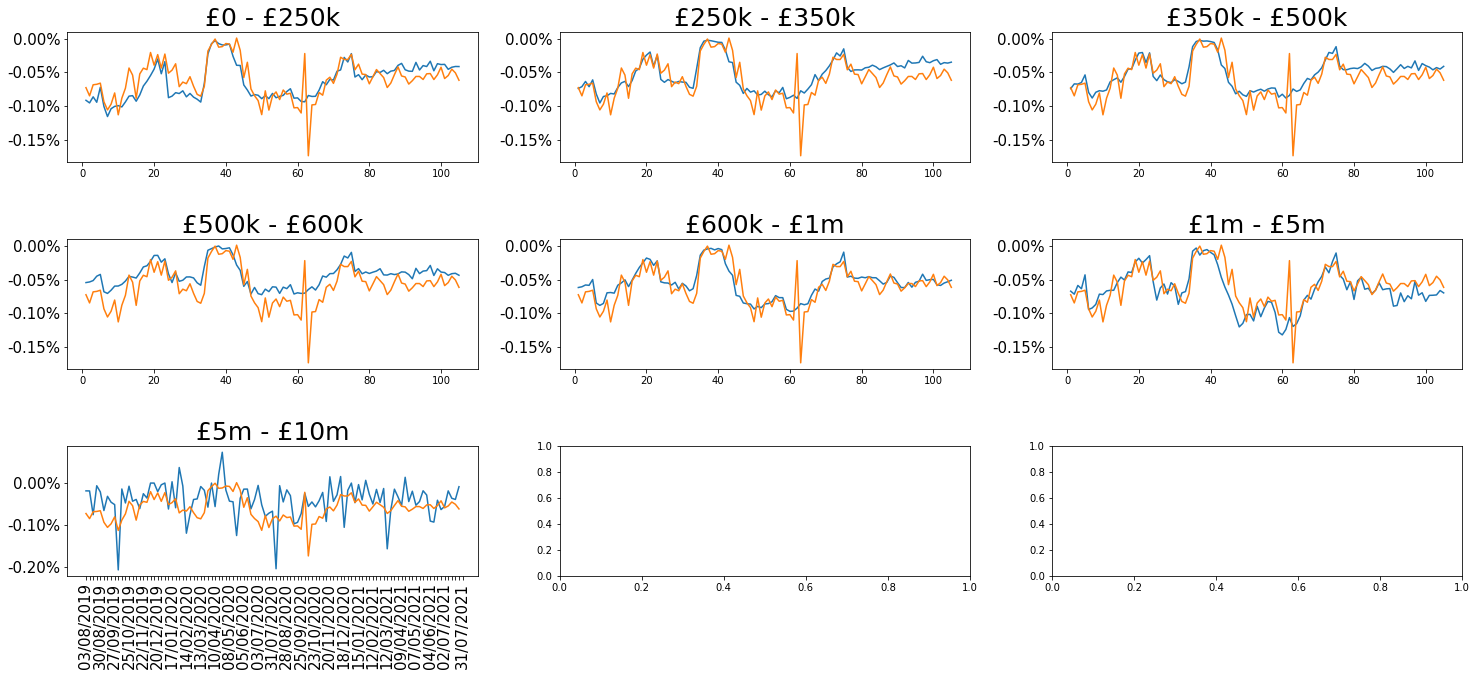

In [179]:
# plot 12 charts showing the weekly % change in Asking Prices by price point
# areaSuffix_List = ['London', 'SE', 'EA', 'MD', 'NE', 'NW', 'SC', 'SW', 'WA', 'NI', 'SC', 'IS']
priceName = ['£0 - £250k', '£250k - £350k', '£350k - £500k', '£500k - £600k', '£600k - £1m', '£1m - £5m', '£5m - £10m']

#def chart_priceChange(geography, chart_title, legend_label, file_name, title):
    
fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(25,10))

plt.subplots_adjust(hspace=0.6, wspace=0.2)

x = df_rightmove.index.values[1:]

labels = list(df_rightmove['Date'][1:])

# prevent x-axis labels from overlapping by printing every nth label
for i in range(4,len(labels[1:]),4):
    labels[i-1], labels[i-2], labels[i-3]='','',''

labels[len(labels)-1]=list(df_rightmove['Date'])[1:][-1]
labels[len(labels)-2], labels[len(labels)-3], labels[len(labels)-4]='','',''


y1 = []
y4 = df_rightmove['price_change_ResiSale_all'][1:]


for i in range(1, len(priceSuffix_List)): # we need to ignore the first item in the list '0'
    y1.append(df_rightmove['price_change_ResiSale_all_' + str(priceSuffix_List[i])][1:])
    

    #y1 = df_rightmove['price_change_ResiSale_all_London'][1:]
    #y1 = df_rightmove[geography][1:]
    #y2 = df_rightmove['price_change_ResiSale_new_London'][1:]
    #y3 = df_rightmove['price_change_ResiSale_scdhd_London'][1:]
    #y4 = df_rightmove['price_change_ResiSale_all'][1:]
    #y5 = df_rightmove['price_change_ResiSale_new'][1:]
    #y6 = df_rightmove['price_change_ResiSale_scdhd'][1:]

row=[0,0,0,1,1,1,2,2,2,]
col=[0,1,2,0,1,2,0,1,2,]
    
for i in range(len(priceSuffix_List)-1):
    #ax.set_title('Weekly % change in Asking Prices in London vs UK', fontsize=25)
    ax[row[i],col[i]].set_title(priceName[i], fontsize=25)
    if row[i] == 2:
        ax[row[i],col[i]].set_xticklabels(labels, rotation=90, fontsize=15)
        ax[row[i],col[i]].set_xticks(x)
    else:
        pass
    ax[row[i],col[i]].yaxis.set_major_formatter(ticker.PercentFormatter(1.0, decimals=2))
    ax[row[i],col[i]].yaxis.set_tick_params(labelsize=15)
    ax[row[i],col[i]].plot(x, y1[i])
    #ax.plot(x, y2)
    #ax.plot(x, y3)
    ax[row[i],col[i]].plot(x, y4)
    #ax.plot(x, y5)
    #ax.plot(x, y6)
    #ax.legend(('All - London', 'New - London', 'Second Hand - London', 'All - UK', 'New - UK', 'Second Hand - UK'),fontsize=20)
    #ax.legend(('All - London', 'All - UK'),fontsize=20)
    #ax[row[i],col[i]].legend((areaName[i], 'All - UK'),fontsize=20)

if savePNG == 1 or PwrptPrep == 1:
    savefig = 'Rightmove LD - % change in asking prices - PricePoints.png'
    #savefig = file_name
    plt.savefig(savefig, bbox_inches = 'tight')    
    slideTitle.append('Weekly % change in Asking Prices - Price Points')
    #slideTitle.append(title)
    slideText.append(str(first_data) + ' to '+ str(monthNow))
    imagePath.append(savefig)

plt.show()

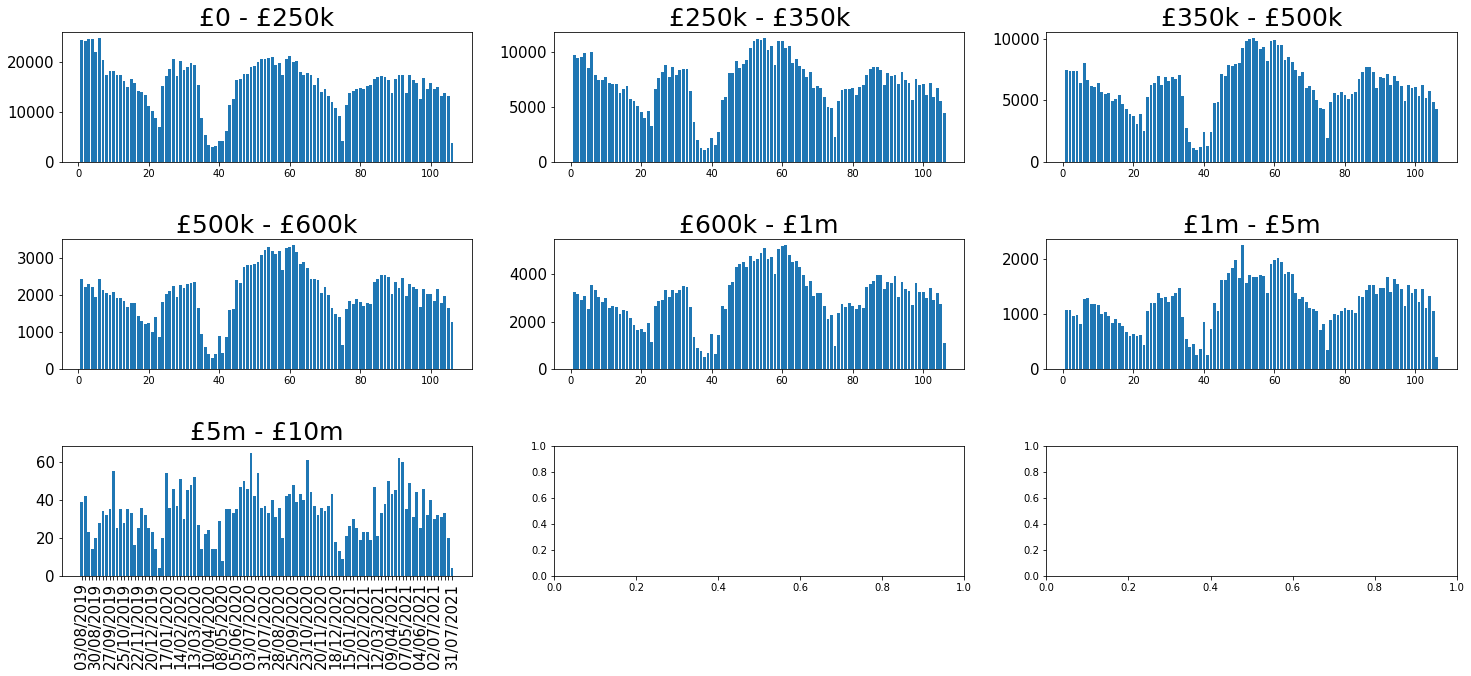

In [180]:
# plot 12 charts showing the weekly new additions of volumes and value in price point
# areaSuffix_List = ['London', 'SE', 'EA', 'MD', 'NE', 'NW', 'SC', 'SW', 'WA', 'NI', 'SC', 'IS']
priceName = ['£0 - £250k', '£250k - £350k', '£350k - £500k', '£500k - £600k', '£600k - £1m', '£1m - £5m', '£5m - £10m']


#def chart_priceChange(geography, chart_title, legend_label, file_name, title):
    
fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(25,10))

plt.subplots_adjust(hspace=0.6, wspace=0.2)

x = df_rightmove.index.values[1:]

labels = list(df_rightmove['Date'][1:])

# prevent x-axis labels from overlapping by printing every nth label
for i in range(4,len(labels[1:]),4):
    labels[i-1], labels[i-2], labels[i-3]='','',''

labels[len(labels)-1]=list(df_rightmove['Date'])[1:][-1]
labels[len(labels)-2], labels[len(labels)-3], labels[len(labels)-4]='','',''


y1 = []

for i in range(1, len(priceSuffix_List)): # we need to ignore the first item in the list '0'
    y1.append(df_rightmove['newVolume_ResiSale_all_' + str(priceSuffix_List[i])][1:])
    

    #y1 = df_rightmove['price_change_ResiSale_all_London'][1:]
    #y1 = df_rightmove[geography][1:]
    #y2 = df_rightmove['price_change_ResiSale_new_London'][1:]
    #y3 = df_rightmove['price_change_ResiSale_scdhd_London'][1:]
    #y4 = df_rightmove['price_change_ResiSale_all'][1:]
    #y5 = df_rightmove['price_change_ResiSale_new'][1:]
    #y6 = df_rightmove['price_change_ResiSale_scdhd'][1:]

row=[0,0,0,1,1,1,2,2,2,]
col=[0,1,2,0,1,2,0,1,2,]
    
for i in range(len(priceSuffix_List)-1):
    #ax.set_title('Weekly % change in Asking Prices in London vs UK', fontsize=25)
    ax[row[i],col[i]].set_title(priceName[i], fontsize=25)
    if row[i] == 2:
        ax[row[i],col[i]].set_xticklabels(labels, rotation=90, fontsize=15)
        ax[row[i],col[i]].set_xticks(x)
    else:
        pass
    #ax[row[i],col[i]].yaxis.set_major_formatter(ticker.PercentFormatter(1.0, decimals=2))
    ax[row[i],col[i]].yaxis.set_tick_params(labelsize=15)
    ax[row[i],col[i]].bar(x, y1[i])
    #ax.plot(x, y2)
    #ax.plot(x, y3)
    #ax[row[i],col[i]].plot(x, y4)
    #ax.plot(x, y5)
    #ax.plot(x, y6)
    #ax.legend(('All - London', 'New - London', 'Second Hand - London', 'All - UK', 'New - UK', 'Second Hand - UK'),fontsize=20)
    #ax.legend(('All - London', 'All - UK'),fontsize=20)
    #ax[row[i],col[i]].legend((areaName[i], 'All - UK'),fontsize=20)
    
if savePNG == 1 or PwrptPrep == 1:
    savefig = 'Rightmove LD - new volumes and values - Pricepoints.png'
    #savefig = file_name
    plt.savefig(savefig, bbox_inches = 'tight')    
    slideTitle.append('Weekly new units added in Price Points')
    #slideTitle.append(title)
    slideText.append(str(first_data) + ' to '+ str(monthNow))
    imagePath.append(savefig) 

plt.show()

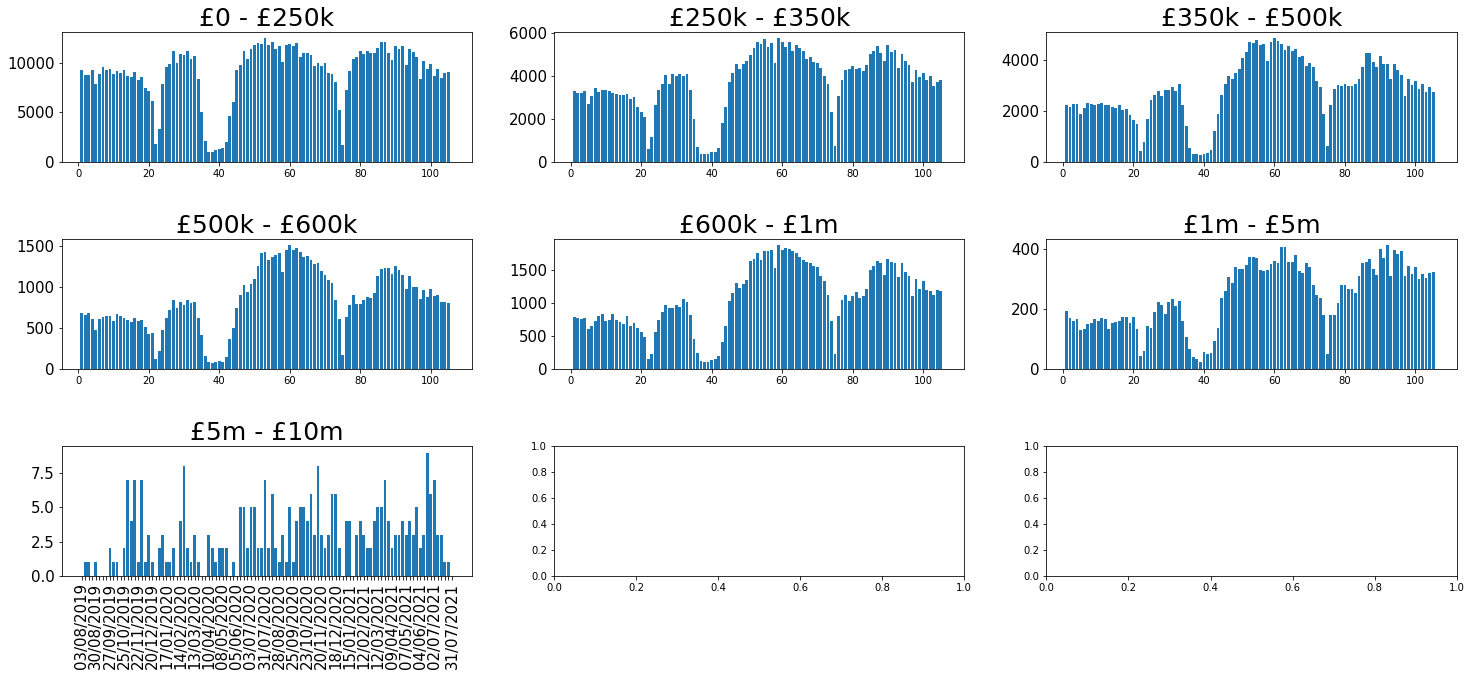

In [181]:
# plot 12 charts showing the weekly new STC volumes and values - price points
# areaSuffix_List = ['London', 'SE', 'EA', 'MD', 'NE', 'NW', 'SC', 'SW', 'WA', 'NI', 'SC', 'IS']
priceName = ['£0 - £250k', '£250k - £350k', '£350k - £500k', '£500k - £600k', '£600k - £1m', '£1m - £5m', '£5m - £10m']


#def chart_priceChange(geography, chart_title, legend_label, file_name, title):
    
fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(25,10))


plt.subplots_adjust(hspace=0.6, wspace=0.2)

x = df_rightmove.index.values[1:]

labels = list(df_rightmove['Date'][1:])

# prevent x-axis labels from overlapping by printing every nth label
for i in range(4,len(labels[1:]),4):
    labels[i-1], labels[i-2], labels[i-3]='','',''

labels[len(labels)-1]=list(df_rightmove['Date'])[1:][-1]
labels[len(labels)-2], labels[len(labels)-3], labels[len(labels)-4]='','',''


y1 = []

for i in range(1, len(priceSuffix_List)):
    y1.append(df_rightmove['newVolumeSTC_ResiSale_all_' + str(priceSuffix_List[i])][1:])
    

    #y1 = df_rightmove['price_change_ResiSale_all_London'][1:]
    #y1 = df_rightmove[geography][1:]
    #y2 = df_rightmove['price_change_ResiSale_new_London'][1:]
    #y3 = df_rightmove['price_change_ResiSale_scdhd_London'][1:]
    #y4 = df_rightmove['price_change_ResiSale_all'][1:]
    #y5 = df_rightmove['price_change_ResiSale_new'][1:]
    #y6 = df_rightmove['price_change_ResiSale_scdhd'][1:]

row=[0,0,0,1,1,1,2,2,2,]
col=[0,1,2,0,1,2,0,1,2,]
    
for i in range(len(priceSuffix_List)-1):
    #ax.set_title('Weekly % change in Asking Prices in London vs UK', fontsize=25)
    ax[row[i],col[i]].set_title(priceName[i], fontsize=25)
    if row[i] == 2:
        ax[row[i],col[i]].set_xticklabels(labels, rotation=90, fontsize=15)
        ax[row[i],col[i]].set_xticks(x)
    else:
        pass
    #ax[row[i],col[i]].yaxis.set_major_formatter(ticker.PercentFormatter(1.0, decimals=2))
    ax[row[i],col[i]].yaxis.set_tick_params(labelsize=15)
    ax[row[i],col[i]].bar(x, y1[i])
    #ax.plot(x, y2)
    #ax.plot(x, y3)
    #ax[row[i],col[i]].plot(x, y4)
    #ax.plot(x, y5)
    #ax.plot(x, y6)
    #ax.legend(('All - London', 'New - London', 'Second Hand - London', 'All - UK', 'New - UK', 'Second Hand - UK'),fontsize=20)
    #ax.legend(('All - London', 'All - UK'),fontsize=20)
    #ax[row[i],col[i]].legend((areaName[i], 'All - UK'),fontsize=20)
    
if savePNG == 1 or PwrptPrep == 1:
    savefig = 'Rightmove LD - new STC volumes and values - Pricepoints.png'
    #savefig = file_name
    plt.savefig(savefig, bbox_inches = 'tight')    
    slideTitle.append('Weekly new Offers (STCs) made in Price Points')
    #slideTitle.append(title)
    slideText.append(str(first_data) + ' to '+ str(monthNow))
    imagePath.append(savefig)   

plt.show()

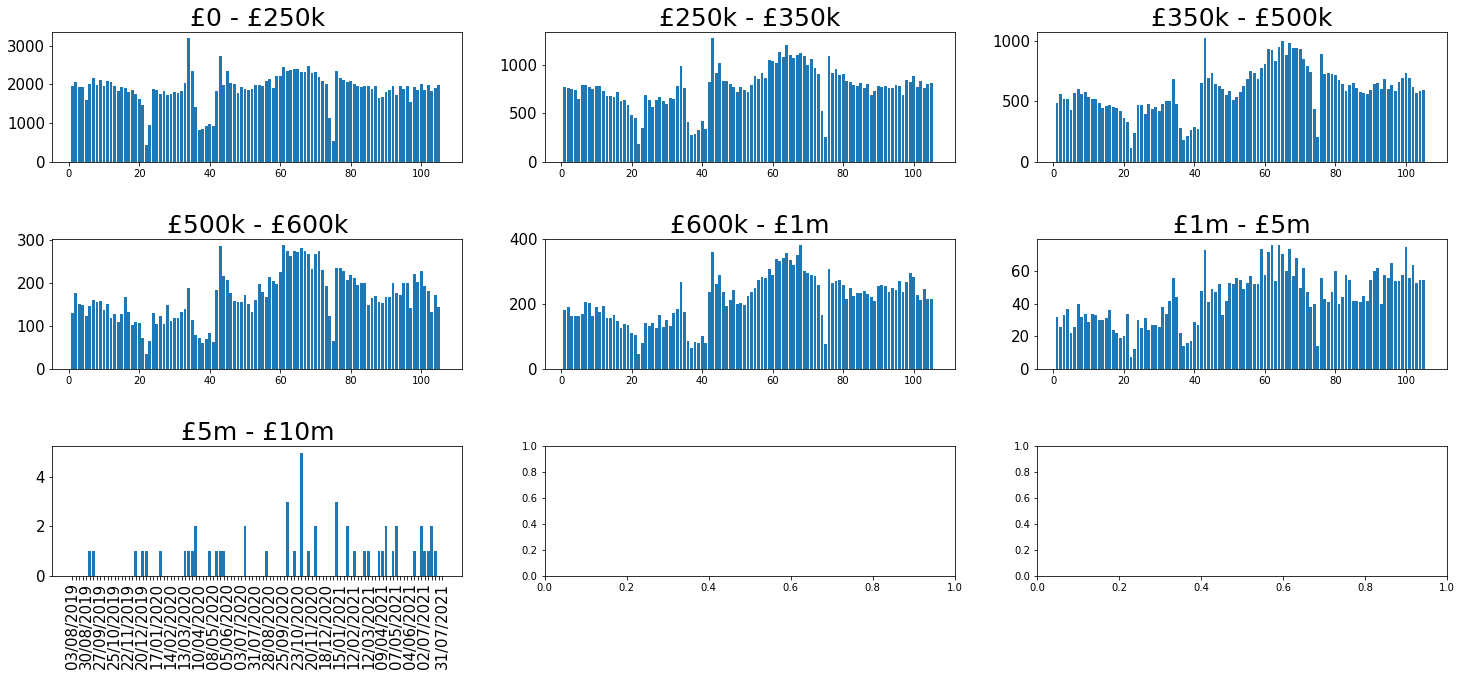

In [182]:
# plot 12 charts showing the weekly STC volumes and values that fell through in price point
# areaSuffix_List = ['London', 'SE', 'EA', 'MD', 'NE', 'NW', 'SC', 'SW', 'WA', 'NI', 'SC', 'IS']
priceName = ['£0 - £250k', '£250k - £350k', '£350k - £500k', '£500k - £600k', '£600k - £1m', '£1m - £5m', '£5m - £10m']


#def chart_priceChange(geography, chart_title, legend_label, file_name, title):
    
fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(25,10))

plt.subplots_adjust(hspace=0.6, wspace=0.2)

x = df_rightmove.index.values[1:]

labels = list(df_rightmove['Date'][1:])

# prevent x-axis labels from overlapping by printing every nth label
for i in range(4,len(labels[1:]),4):
    labels[i-1], labels[i-2], labels[i-3]='','',''

labels[len(labels)-1]=list(df_rightmove['Date'])[1:][-1]
labels[len(labels)-2], labels[len(labels)-3], labels[len(labels)-4]='','',''


y1 = []

for i in range(1, len(priceSuffix_List)):
    y1.append(df_rightmove['cancVolumeSTC_ResiSale_all_' + str(priceSuffix_List[i])][1:])
    

    #y1 = df_rightmove['price_change_ResiSale_all_London'][1:]
    #y1 = df_rightmove[geography][1:]
    #y2 = df_rightmove['price_change_ResiSale_new_London'][1:]
    #y3 = df_rightmove['price_change_ResiSale_scdhd_London'][1:]
    #y4 = df_rightmove['price_change_ResiSale_all'][1:]
    #y5 = df_rightmove['price_change_ResiSale_new'][1:]
    #y6 = df_rightmove['price_change_ResiSale_scdhd'][1:]

row=[0,0,0,1,1,1,2,2,2]
col=[0,1,2,0,1,2,0,1,2]
    
for i in range(len(priceSuffix_List)-1):
    #ax.set_title('Weekly % change in Asking Prices in London vs UK', fontsize=25)
    ax[row[i],col[i]].set_title(priceName[i], fontsize=25)
    if row[i] == 2:
        ax[row[i],col[i]].set_xticklabels(labels, rotation=90, fontsize=15)
        ax[row[i],col[i]].set_xticks(x)
    else:
        pass
    #ax[row[i],col[i]].yaxis.set_major_formatter(ticker.PercentFormatter(1.0, decimals=2))
    ax[row[i],col[i]].yaxis.set_tick_params(labelsize=15)
    ax[row[i],col[i]].bar(x, y1[i])
    #ax.plot(x, y2)
    #ax.plot(x, y3)
    #ax[row[i],col[i]].plot(x, y4)
    #ax.plot(x, y5)
    #ax.plot(x, y6)
    #ax.legend(('All - London', 'New - London', 'Second Hand - London', 'All - UK', 'New - UK', 'Second Hand - UK'),fontsize=20)
    #ax.legend(('All - London', 'All - UK'),fontsize=20)
    #ax[row[i],col[i]].legend((areaName[i], 'All - UK'),fontsize=20)
    
if savePNG == 1 or PwrptPrep == 1:
    savefig = 'Rightmove LD - cancelled STC volumes and values - Pricepoints.png'
    #savefig = file_name        
    plt.savefig(savefig, bbox_inches = 'tight')    
    slideTitle.append('Weekly offers (STCs) that fell through in Price Points')
    #slideTitle.append(title)
    slideText.append(str(first_data) + ' to '+ str(monthNow))
    imagePath.append(savefig) 

plt.show()

In [183]:
# for the presentation, insert a new chapter slide

if savePNG == 1 or PwrptPrep == 1:
    
    slideTitle.append('UK Regional Data')
    slideText.append('')
    imagePath.append('')

plt.show()

In [184]:
#
# Geographic charts
#

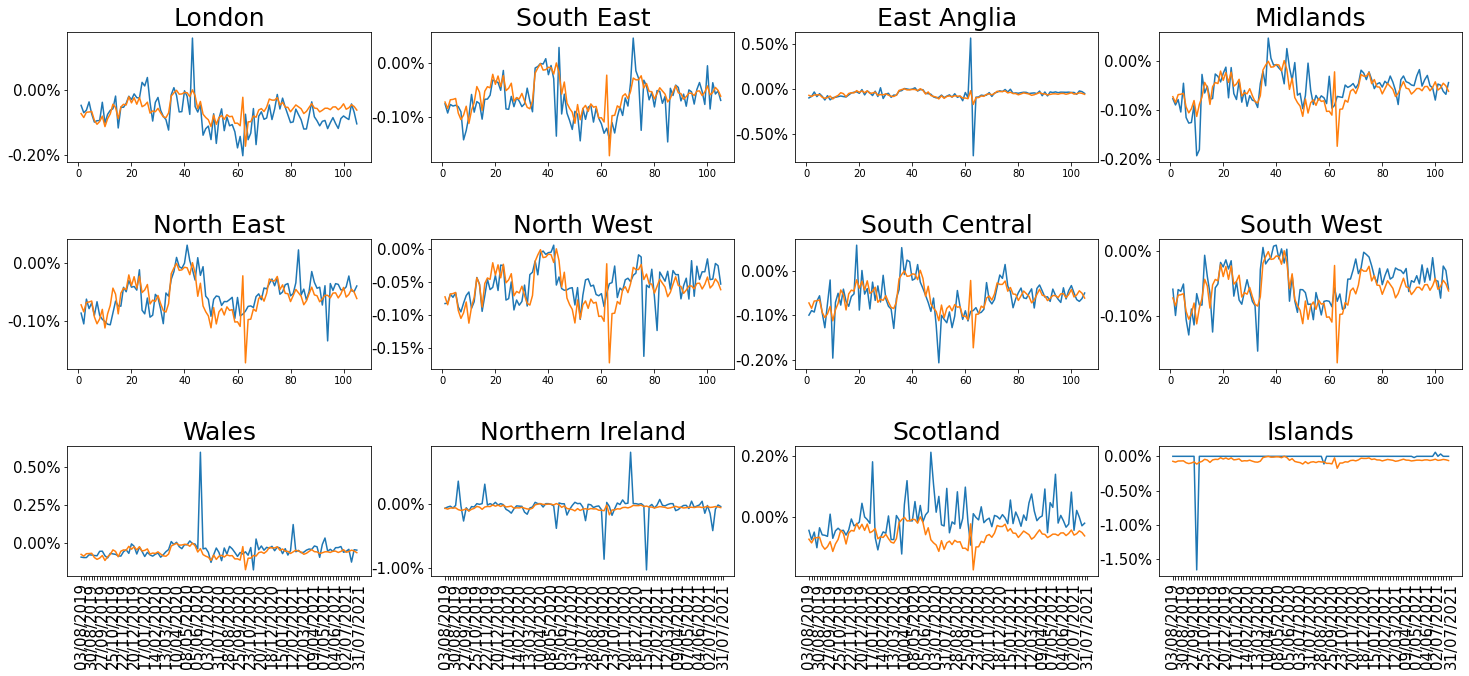

In [185]:
# plot 12 charts showing the weekly % change in Asking Prices by geography
# areaSuffix_List = ['London', 'SE', 'EA', 'MD', 'NE', 'NW', 'SC', 'SW', 'WA', 'NI', 'SC', 'IS']
areaName = ['London', 'South East', 'East Anglia', 'Midlands', 'North East', 'North West', 'South Central',
           'South West', 'Wales', 'Northern Ireland', 'Scotland', 'Islands']


#def chart_priceChange(geography, chart_title, legend_label, file_name, title):
    
fig, ax = plt.subplots(nrows=3, ncols=4, figsize=(25,10))

plt.subplots_adjust(hspace=0.6, wspace=0.2)

x = df_rightmove.index.values[1:]

labels = list(df_rightmove['Date'][1:])

# prevent x-axis labels from overlapping by printing every nth label
for i in range(4,len(labels[1:]),4):
    labels[i-1], labels[i-2], labels[i-3]='','',''

labels[len(labels)-1]=list(df_rightmove['Date'])[1:][-1]
labels[len(labels)-2], labels[len(labels)-3], labels[len(labels)-4]='','',''


y1 = []
y4 = df_rightmove['price_change_ResiSale_all'][1:]


for i in range(len(areaCode_List)):
    y1.append(df_rightmove['price_change_ResiSale_all_' + str(areaSuffix_List[i])][1:])
    

    #y1 = df_rightmove['price_change_ResiSale_all_London'][1:]
    #y1 = df_rightmove[geography][1:]
    #y2 = df_rightmove['price_change_ResiSale_new_London'][1:]
    #y3 = df_rightmove['price_change_ResiSale_scdhd_London'][1:]
    #y4 = df_rightmove['price_change_ResiSale_all'][1:]
    #y5 = df_rightmove['price_change_ResiSale_new'][1:]
    #y6 = df_rightmove['price_change_ResiSale_scdhd'][1:]

row=[0,0,0,0,1,1,1,1,2,2,2,2]
col=[0,1,2,3,0,1,2,3,0,1,2,3]
    
for i in range(len(areaCode_List)):
    #ax.set_title('Weekly % change in Asking Prices in London vs UK', fontsize=25)
    ax[row[i],col[i]].set_title(areaName[i], fontsize=25)
    if row[i] == 2:
        ax[row[i],col[i]].set_xticklabels(labels, rotation=90, fontsize=15)
        ax[row[i],col[i]].set_xticks(x)
    else:
        pass
    ax[row[i],col[i]].yaxis.set_major_formatter(ticker.PercentFormatter(1.0, decimals=2))
    ax[row[i],col[i]].yaxis.set_tick_params(labelsize=15)
    ax[row[i],col[i]].plot(x, y1[i])
    #ax.plot(x, y2)
    #ax.plot(x, y3)
    ax[row[i],col[i]].plot(x, y4)
    #ax.plot(x, y5)
    #ax.plot(x, y6)
    #ax.legend(('All - London', 'New - London', 'Second Hand - London', 'All - UK', 'New - UK', 'Second Hand - UK'),fontsize=20)
    #ax.legend(('All - London', 'All - UK'),fontsize=20)
    #ax[row[i],col[i]].legend((areaName[i], 'All - UK'),fontsize=20)

if savePNG == 1 or PwrptPrep == 1:
    savefig = 'Rightmove LD - % change in asking prices - Regions.png'
    #savefig = file_name
    plt.savefig(savefig, bbox_inches = 'tight')    
    slideTitle.append('Weekly % change in Asking Prices - Regions')
    #slideTitle.append(title)
    slideText.append(str(first_data) + ' to '+ str(monthNow))
    imagePath.append(savefig)

plt.show()

In [186]:
# chart_priceChange('price_change_ResiSale_all_London',
#                  'Weekly % change in Asking Prices in London vs UK',
#                  'All - London',
#                  'Rightmove LD - % change in asking prices - London.png',
#                  'Weekly % change in Asking Prices - London')



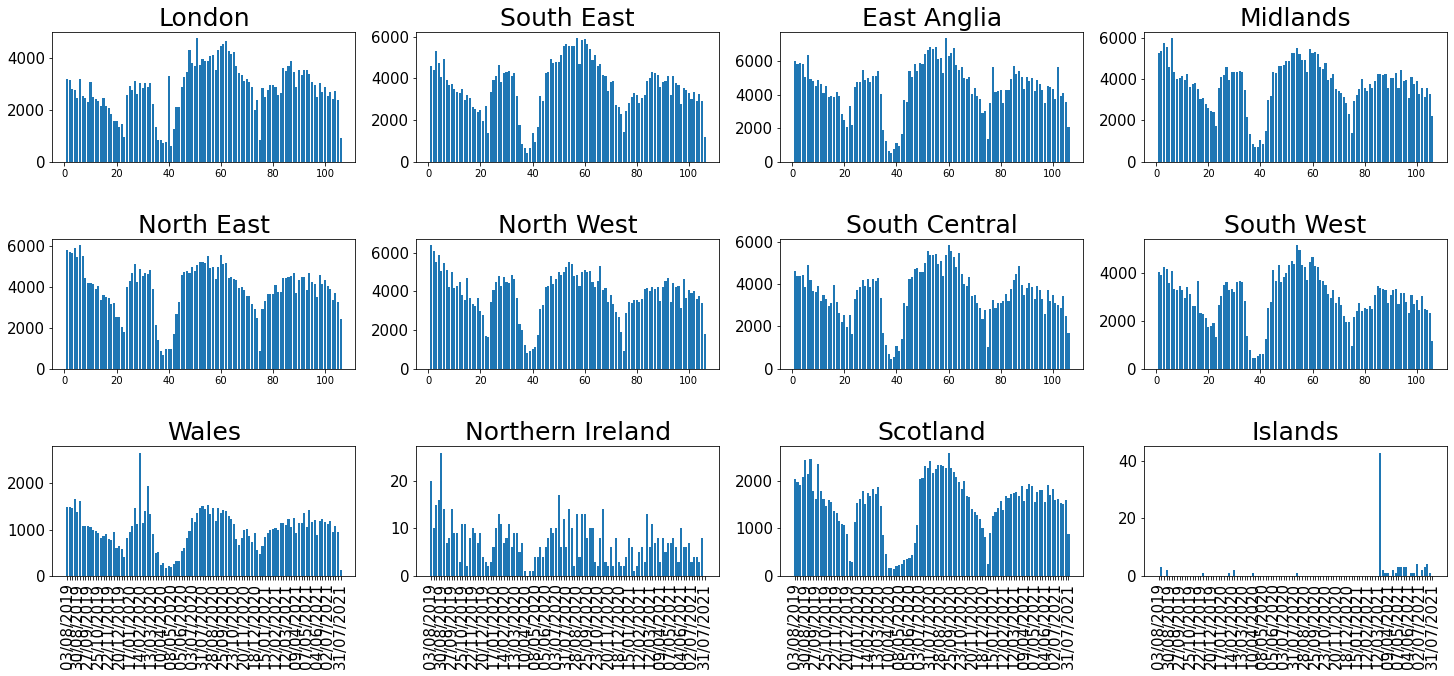

In [187]:
# plot 12 charts showing the weekly new additions of volumes and value in geographies
# areaSuffix_List = ['London', 'SE', 'EA', 'MD', 'NE', 'NW', 'SC', 'SW', 'WA', 'NI', 'SC', 'IS']
areaName = ['London', 'South East', 'East Anglia', 'Midlands', 'North East', 'North West', 'South Central',
           'South West', 'Wales', 'Northern Ireland', 'Scotland', 'Islands']


#def chart_priceChange(geography, chart_title, legend_label, file_name, title):
    
fig, ax = plt.subplots(nrows=3, ncols=4, figsize=(25,10))

plt.subplots_adjust(hspace=0.6, wspace=0.2)

x = df_rightmove.index.values[1:]

labels = list(df_rightmove['Date'][1:])

# prevent x-axis labels from overlapping by printing every nth label
for i in range(4,len(labels[1:]),4):
    labels[i-1], labels[i-2], labels[i-3]='','',''

labels[len(labels)-1]=list(df_rightmove['Date'])[1:][-1]
labels[len(labels)-2], labels[len(labels)-3], labels[len(labels)-4]='','',''


y1 = []

for i in range(len(areaCode_List)):
    y1.append(df_rightmove['newVolume_ResiSale_all_' + str(areaSuffix_List[i])][1:])
    

    #y1 = df_rightmove['price_change_ResiSale_all_London'][1:]
    #y1 = df_rightmove[geography][1:]
    #y2 = df_rightmove['price_change_ResiSale_new_London'][1:]
    #y3 = df_rightmove['price_change_ResiSale_scdhd_London'][1:]
    #y4 = df_rightmove['price_change_ResiSale_all'][1:]
    #y5 = df_rightmove['price_change_ResiSale_new'][1:]
    #y6 = df_rightmove['price_change_ResiSale_scdhd'][1:]

row=[0,0,0,0,1,1,1,1,2,2,2,2]
col=[0,1,2,3,0,1,2,3,0,1,2,3]
    
for i in range(len(areaCode_List)):
    #ax.set_title('Weekly % change in Asking Prices in London vs UK', fontsize=25)
    ax[row[i],col[i]].set_title(areaName[i], fontsize=25)
    if row[i] == 2:
        ax[row[i],col[i]].set_xticklabels(labels, rotation=90, fontsize=15)
        ax[row[i],col[i]].set_xticks(x)
    else:
        pass
    #ax[row[i],col[i]].yaxis.set_major_formatter(ticker.PercentFormatter(1.0, decimals=2))
    ax[row[i],col[i]].yaxis.set_tick_params(labelsize=15)
    ax[row[i],col[i]].bar(x, y1[i])
    #ax.plot(x, y2)
    #ax.plot(x, y3)
    #ax[row[i],col[i]].plot(x, y4)
    #ax.plot(x, y5)
    #ax.plot(x, y6)
    #ax.legend(('All - London', 'New - London', 'Second Hand - London', 'All - UK', 'New - UK', 'Second Hand - UK'),fontsize=20)
    #ax.legend(('All - London', 'All - UK'),fontsize=20)
    #ax[row[i],col[i]].legend((areaName[i], 'All - UK'),fontsize=20)
    
if savePNG == 1 or PwrptPrep == 1:
    savefig = 'Rightmove LD - new volumes and values - Regions.png'
    #savefig = file_name
    plt.savefig(savefig, bbox_inches = 'tight')    
    slideTitle.append('Weekly new units added in Regions')
    #slideTitle.append(title)
    slideText.append(str(first_data) + ' to '+ str(monthNow))
    imagePath.append(savefig) 

plt.show()

In [188]:
# # plot 6 charts showing the weekly new additions of volumes and value in geographies

# def chart_newUnits(geography_volume, geography_value, chart_title_volume, chart_title_value, file_name, title):

#     fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(25,10))

#     plt.subplots_adjust(hspace=1.6, wspace=0.2)

#     x = df_rightmove.index.values[1:]

#     labels = list(df_rightmove['Date'])

#     # prevent x-axis labels from overlapping by printing every nth label
#     for i in range(4,len(labels[1:]),4):
#         labels[i-1], labels[i-2], labels[i-3]='','',''

#     labels[len(labels)-1]=list(df_rightmove['Date'])[1:][-1]
#     labels[len(labels)-2], labels[len(labels)-3], labels[len(labels)-4]='','',''

#     #y1 = df_rightmove['newVolume_ResiSale_all_London'][1:]
#     #y2 = df_rightmove['newValue_ResiSale_all_London'][1:]/1000000000
#     y1 = df_rightmove[geography_volume][1:]
#     y2 = df_rightmove[geography_value][1:]/1000000000
#     y3 = df_rightmove['newVolume_ResiSale_all'][1:]
#     y4 = df_rightmove['newValue_ResiSale_all'][1:]/1000000000


#     # y3 = df_rightmove['newVolume_ResiSale_scdhd'][1:]
#     # y4 = df_rightmove['newValue_ResiSale_scdhd'][1:]/1000000000
#     # y5 = df_rightmove['newVolume_ResiSale_new'][1:]
#     # y6 = df_rightmove['newValue_ResiSale_new'][1:]/1000000000


#     # set_title=['Weekly new volumes of all units added - London',
#     #            'Weekly new values of all units added (£bn) - London',
#     #           'Weekly new volumes of all units added - UK',
#     #            'Weekly new values of all units added (£bn) - UK']

#     set_title=[chart_title_volume,
#                chart_title_value,
#               'Weekly new volumes of all units added - UK',
#                'Weekly new values of all units added (£bn) - UK']

#     set_plot = [y1,y2,y3,y4]
#     set_axis_row = [0,0,1,1]
#     set_axis_col = [0,1,0,1]

#     for i in range(4):
#         ax[set_axis_row[i], set_axis_col[i]].set_title(set_title[i], fontsize=20)
#         ax[set_axis_row[i], set_axis_col[i]].set_xticklabels(labels, rotation=90, fontsize=15)
#         ax[set_axis_row[i], set_axis_col[i]].set_xticks(x)
#         #ax.yaxis.set_major_formatter(ticker.PercentFormatter(1.0, decimals=2))
#         ax[set_axis_row[i], set_axis_col[i]].yaxis.set_tick_params(labelsize=15)
#         ax[set_axis_row[i], set_axis_col[i]].bar(x, set_plot[i])

#     # ax[0].set_title('Weekly new volumes of units added', fontsize=25)
#     # ax[1].set_title('Weekly new values of units added', fontsize=25)
#     # ax[0].set_xticklabels(labels, rotation=90, fontsize=15)
#     # ax[0].set_xticks(x)
#     # #ax.yaxis.set_major_formatter(ticker.PercentFormatter(1.0, decimals=2))
#     # ax[0].yaxis.set_tick_params(labelsize=15)
#     # ax[0].bar(x, y1)
#     # ax[1].bar(x, y2)
#     # # ax.plot(x, y2)
#     # # ax.plot(x, y3)
#     # # ax.plot(x, y4)
#     # # ax.legend(('Total', 'New', 'Nearly New', 'Used'),fontsize=20)

#     if savePNG == 1 or PwrptPrep == 1:
#         #savefig = 'Rightmove LD - new volumes and values - London.png'
#         savefig = file_name
#         plt.savefig(savefig, bbox_inches = 'tight')    
#         #slideTitle.append('Weekly new units added in London')
#         slideTitle.append(title)
#         slideText.append(str(first_data) + ' to '+ str(monthNow))
#         imagePath.append(savefig) 

#     plt.show()

In [189]:
# chart_newUnits('newVolume_ResiSale_all_London', 'newValue_ResiSale_all_London',
#                'Weekly new volumes of all units added - London', 'Weekly new values of all units added (£bn) - London',
#                'Rightmove LD - new volumes and values - London.png', 'Weekly new units added in London')

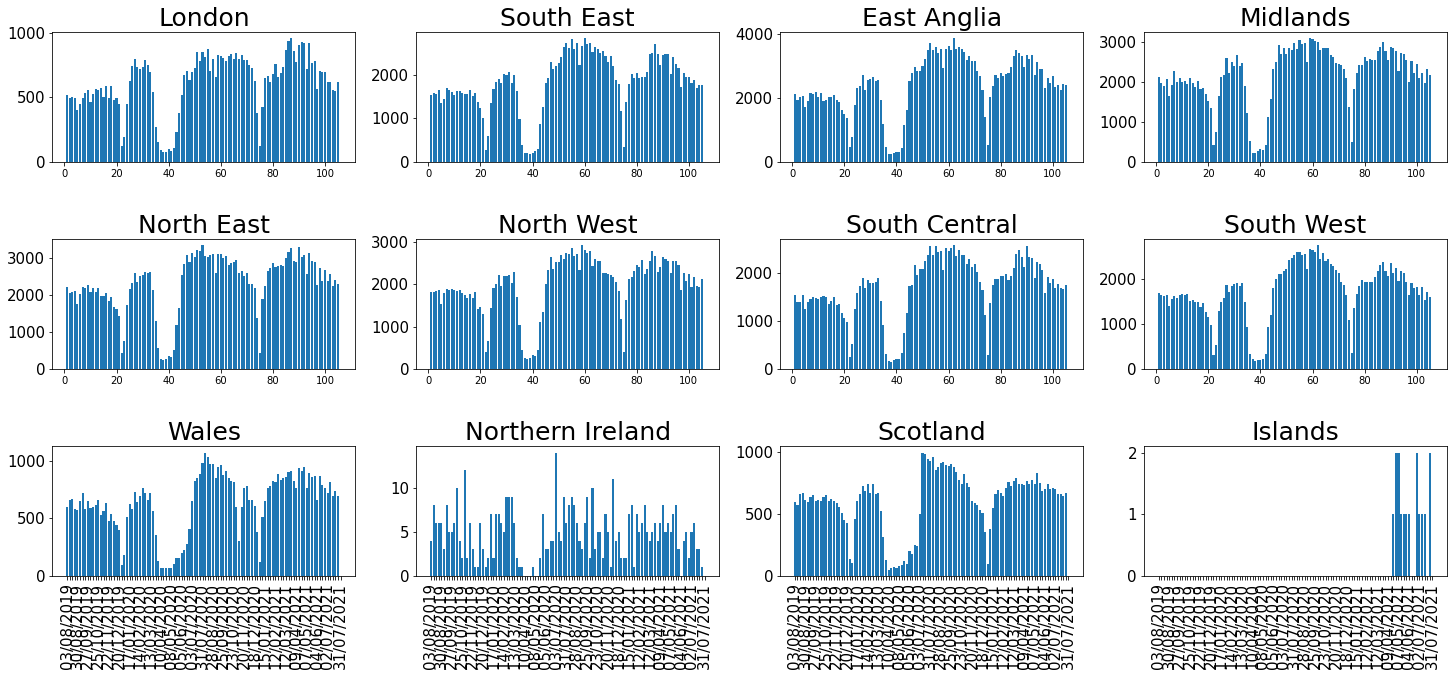

In [190]:
# plot 12 charts showing the weekly new STC volumes and values - geographies
# areaSuffix_List = ['London', 'SE', 'EA', 'MD', 'NE', 'NW', 'SC', 'SW', 'WA', 'NI', 'SC', 'IS']
areaName = ['London', 'South East', 'East Anglia', 'Midlands', 'North East', 'North West', 'South Central',
           'South West', 'Wales', 'Northern Ireland', 'Scotland', 'Islands']


#def chart_priceChange(geography, chart_title, legend_label, file_name, title):
    
fig, ax = plt.subplots(nrows=3, ncols=4, figsize=(25,10))

plt.subplots_adjust(hspace=0.6, wspace=0.2)

x = df_rightmove.index.values[1:]

labels = list(df_rightmove['Date'][1:])

# prevent x-axis labels from overlapping by printing every nth label
for i in range(4,len(labels[1:]),4):
    labels[i-1], labels[i-2], labels[i-3]='','',''

labels[len(labels)-1]=list(df_rightmove['Date'])[1:][-1]
labels[len(labels)-2], labels[len(labels)-3], labels[len(labels)-4]='','',''


y1 = []

for i in range(len(areaCode_List)):
    y1.append(df_rightmove['newVolumeSTC_ResiSale_all_' + str(areaSuffix_List[i])][1:])
    

    #y1 = df_rightmove['price_change_ResiSale_all_London'][1:]
    #y1 = df_rightmove[geography][1:]
    #y2 = df_rightmove['price_change_ResiSale_new_London'][1:]
    #y3 = df_rightmove['price_change_ResiSale_scdhd_London'][1:]
    #y4 = df_rightmove['price_change_ResiSale_all'][1:]
    #y5 = df_rightmove['price_change_ResiSale_new'][1:]
    #y6 = df_rightmove['price_change_ResiSale_scdhd'][1:]

row=[0,0,0,0,1,1,1,1,2,2,2,2]
col=[0,1,2,3,0,1,2,3,0,1,2,3]
    
for i in range(len(areaCode_List)):
    #ax.set_title('Weekly % change in Asking Prices in London vs UK', fontsize=25)
    ax[row[i],col[i]].set_title(areaName[i], fontsize=25)
    if row[i] == 2:
        ax[row[i],col[i]].set_xticklabels(labels, rotation=90, fontsize=15)
        ax[row[i],col[i]].set_xticks(x)
    else:
        pass
    #ax[row[i],col[i]].yaxis.set_major_formatter(ticker.PercentFormatter(1.0, decimals=2))
    ax[row[i],col[i]].yaxis.set_tick_params(labelsize=15)
    ax[row[i],col[i]].bar(x, y1[i])
    #ax.plot(x, y2)
    #ax.plot(x, y3)
    #ax[row[i],col[i]].plot(x, y4)
    #ax.plot(x, y5)
    #ax.plot(x, y6)
    #ax.legend(('All - London', 'New - London', 'Second Hand - London', 'All - UK', 'New - UK', 'Second Hand - UK'),fontsize=20)
    #ax.legend(('All - London', 'All - UK'),fontsize=20)
    #ax[row[i],col[i]].legend((areaName[i], 'All - UK'),fontsize=20)
    
if savePNG == 1 or PwrptPrep == 1:
    savefig = 'Rightmove LD - new STC volumes and values - Regions.png'
    #savefig = file_name
    plt.savefig(savefig, bbox_inches = 'tight')    
    slideTitle.append('Weekly new Offers (STCs) made in Regions')
    #slideTitle.append(title)
    slideText.append(str(first_data) + ' to '+ str(monthNow))
    imagePath.append(savefig)   

plt.show()

In [191]:
# # plot 6 charts showing the weekly new STC volumes and values - geographies

# def chart_newSTC(geography_volume, geography_value, chart_title_volume, chart_title_value, file_name, title):

#     fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(25,10))

#     plt.subplots_adjust(hspace=1.6, wspace=0.2)

#     x = df_rightmove.index.values[1:]

#     labels = list(df_rightmove['Date'])

#     # prevent x-axis labels from overlapping by printing every nth label
#     for i in range(4,len(labels[1:]),4):
#         labels[i-1], labels[i-2], labels[i-3]='','',''

#     labels[len(labels)-1]=list(df_rightmove['Date'])[1:][-1]
#     labels[len(labels)-2], labels[len(labels)-3], labels[len(labels)-4]='','',''

#     #y1 = df_rightmove['newVolumeSTC_ResiSale_all_London'][1:]
#     #y2 = df_rightmove['newValueSTC_ResiSale_all_London'][1:]/1000000000
#     y1 = df_rightmove[geography_volume][1:]
#     y2 = df_rightmove[geography_value][1:]/1000000000       
#     y3 = df_rightmove['newVolumeSTC_ResiSale_all'][1:]
#     y4 = df_rightmove['newValueSTC_ResiSale_all'][1:]/1000000000

#     set_title=[chart_title_volume,
#                chart_title_value,
#               'Weekly new volumes of all STCs',
#                'Weekly new values of all STCs (£bn)']
#     set_plot = [y1,y2,y3,y4]
#     set_axis_row = [0,0,1,1]
#     set_axis_col = [0,1,0,1]

#     for i in range(4):
#         ax[set_axis_row[i], set_axis_col[i]].set_title(set_title[i], fontsize=20)
#         ax[set_axis_row[i], set_axis_col[i]].set_xticklabels(labels, rotation=90, fontsize=15)
#         ax[set_axis_row[i], set_axis_col[i]].set_xticks(x)
#         #ax.yaxis.set_major_formatter(ticker.PercentFormatter(1.0, decimals=2))
#         ax[set_axis_row[i], set_axis_col[i]].yaxis.set_tick_params(labelsize=15)
#         ax[set_axis_row[i], set_axis_col[i]].bar(x, set_plot[i])

#     # ax[0].set_title('Weekly new volumes of of STCs', fontsize=25)
#     # ax[1].set_title('Weekly new values of STCs', fontsize=25)
#     # ax[0].set_xticklabels(labels, rotation=90, fontsize=15)
#     # ax[0].set_xticks(x)
#     # #ax.yaxis.set_major_formatter(ticker.PercentFormatter(1.0, decimals=2))
#     # ax[0].yaxis.set_tick_params(labelsize=15)
#     # ax[0].bar(x, y1)
#     # ax[1].bar(x, y2)
#     # # ax.plot(x, y2)
#     # # ax.plot(x, y3)
#     # # ax.plot(x, y4)
#     # # ax.legend(('Total', 'New', 'Nearly New', 'Used'),fontsize=20)

#     if savePNG == 1 or PwrptPrep == 1:
#         #savefig = 'Rightmove LD - new STC volumes and values - London.png'
#         savefig = file_name
#         plt.savefig(savefig, bbox_inches = 'tight')    
#         #slideTitle.append('Weekly new Offers (STCs) made in London')
#         slideTitle.append(title)
#         slideText.append(str(first_data) + ' to '+ str(monthNow))
#         imagePath.append(savefig)   

#     plt.show()

In [192]:
# chart_newSTC('newVolumeSTC_ResiSale_all_London', 'newValueSTC_ResiSale_all_London', 
#              'Weekly new volumes of all STCs - London', 'Weekly new values of all STCs (£bn) - London', 
#              'Rightmove LD - new STC volumes and values - London.png', 'Weekly new Offers (STCs) made in London')


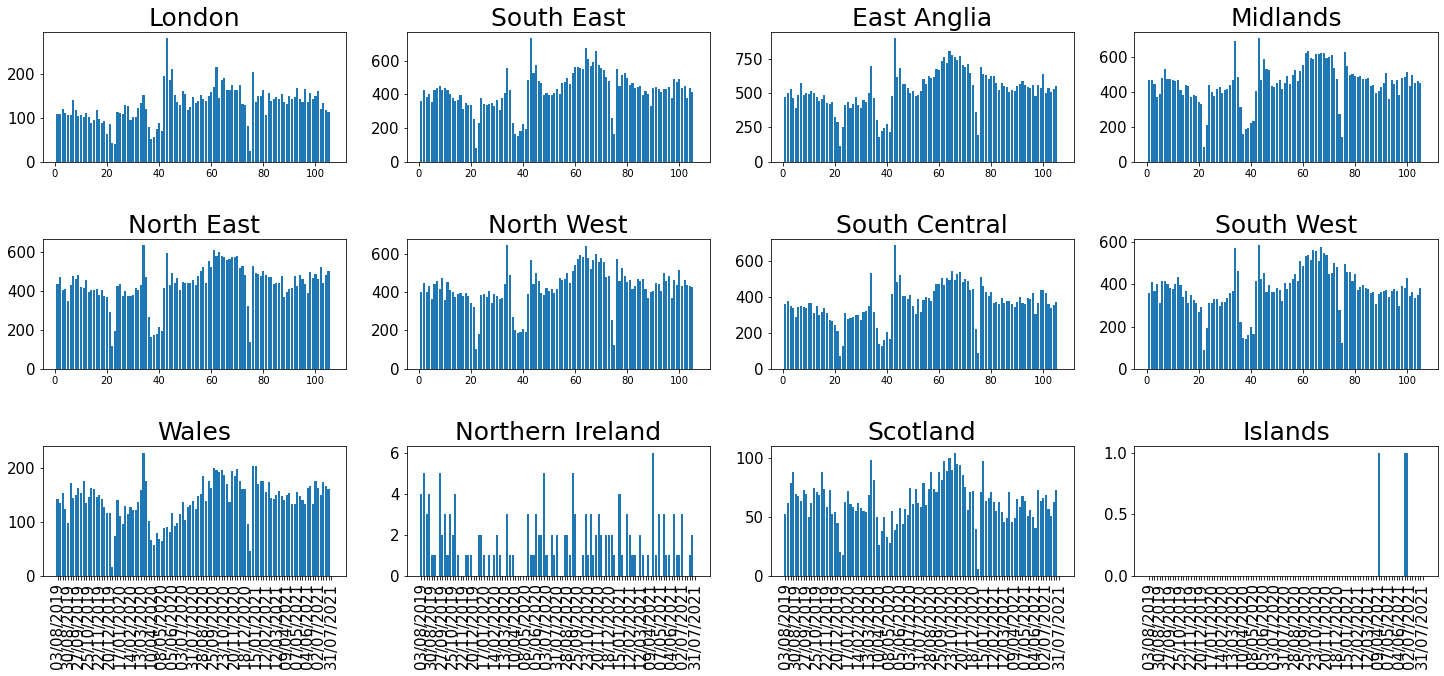

In [193]:
# plot 12 charts showing the weekly STC volumes and values that fell through in geographies
# areaSuffix_List = ['London', 'SE', 'EA', 'MD', 'NE', 'NW', 'SC', 'SW', 'WA', 'NI', 'SC', 'IS']
areaName = ['London', 'South East', 'East Anglia', 'Midlands', 'North East', 'North West', 'South Central',
           'South West', 'Wales', 'Northern Ireland', 'Scotland', 'Islands']


#def chart_priceChange(geography, chart_title, legend_label, file_name, title):
    
fig, ax = plt.subplots(nrows=3, ncols=4, figsize=(25,10))

plt.subplots_adjust(hspace=0.6, wspace=0.2)

x = df_rightmove.index.values[1:]

labels = list(df_rightmove['Date'][1:])

# prevent x-axis labels from overlapping by printing every nth label
for i in range(4,len(labels[1:]),4):
    labels[i-1], labels[i-2], labels[i-3]='','',''

labels[len(labels)-1]=list(df_rightmove['Date'])[1:][-1]
labels[len(labels)-2], labels[len(labels)-3], labels[len(labels)-4]='','',''


y1 = []

for i in range(len(areaCode_List)):
    y1.append(df_rightmove['cancVolumeSTC_ResiSale_all_' + str(areaSuffix_List[i])][1:])
    

    #y1 = df_rightmove['price_change_ResiSale_all_London'][1:]
    #y1 = df_rightmove[geography][1:]
    #y2 = df_rightmove['price_change_ResiSale_new_London'][1:]
    #y3 = df_rightmove['price_change_ResiSale_scdhd_London'][1:]
    #y4 = df_rightmove['price_change_ResiSale_all'][1:]
    #y5 = df_rightmove['price_change_ResiSale_new'][1:]
    #y6 = df_rightmove['price_change_ResiSale_scdhd'][1:]

row=[0,0,0,0,1,1,1,1,2,2,2,2]
col=[0,1,2,3,0,1,2,3,0,1,2,3]
    
for i in range(len(areaCode_List)):
    #ax.set_title('Weekly % change in Asking Prices in London vs UK', fontsize=25)
    ax[row[i],col[i]].set_title(areaName[i], fontsize=25)
    if row[i] == 2:
        ax[row[i],col[i]].set_xticklabels(labels, rotation=90, fontsize=15)
        ax[row[i],col[i]].set_xticks(x)
    else:
        pass
    #ax[row[i],col[i]].yaxis.set_major_formatter(ticker.PercentFormatter(1.0, decimals=2))
    ax[row[i],col[i]].yaxis.set_tick_params(labelsize=15)
    ax[row[i],col[i]].bar(x, y1[i])
    #ax.plot(x, y2)
    #ax.plot(x, y3)
    #ax[row[i],col[i]].plot(x, y4)
    #ax.plot(x, y5)
    #ax.plot(x, y6)
    #ax.legend(('All - London', 'New - London', 'Second Hand - London', 'All - UK', 'New - UK', 'Second Hand - UK'),fontsize=20)
    #ax.legend(('All - London', 'All - UK'),fontsize=20)
    #ax[row[i],col[i]].legend((areaName[i], 'All - UK'),fontsize=20)
    
if savePNG == 1 or PwrptPrep == 1:
    savefig = 'Rightmove LD - cancelled STC volumes and values - Regions.png'
    #savefig = file_name        
    plt.savefig(savefig, bbox_inches = 'tight')    
    slideTitle.append('Weekly offers (STCs) that fell through in Regions')
    #slideTitle.append(title)
    slideText.append(str(first_data) + ' to '+ str(monthNow))
    imagePath.append(savefig) 

plt.show()

In [194]:
# for the presentation, insert a new chapter slide

if savePNG == 1 or PwrptPrep == 1:
    
    slideTitle.append('UK Estate Agent / House Builder data')
    slideText.append('')
    imagePath.append('')

plt.show()

In [195]:
# # plot 4 charts showing the weekly STC volumes and values that fell through in geographies

# def chart_CancSTC(geography_volume, geography_value, chart_title_volume, chart_title_value, file_name, title):

#     fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(25,10))

#     plt.subplots_adjust(hspace=1.6, wspace=0.2)

#     x = df_rightmove.index.values[1:]

#     labels = list(df_rightmove['Date'])

#     # prevent x-axis labels from overlapping by printing every nth label
#     for i in range(4,len(labels[1:]),4):
#         labels[i-1], labels[i-2], labels[i-3]='','',''

#     labels[len(labels)-1]=list(df_rightmove['Date'])[1:][-1]
#     labels[len(labels)-2], labels[len(labels)-3], labels[len(labels)-4]='','',''

#     y1 = df_rightmove[geography_volume][1:]
#     y2 = df_rightmove[geography_value][1:]/1000000000
#     #y1 = df_rightmove['cancVolumeSTC_ResiSale_all_London'][1:]
#     #y2 = df_rightmove['cancValueSTC_ResiSale_all_London'][1:]/1000000000    
    
#     y3 = df_rightmove['cancVolumeSTC_ResiSale_all'][1:]
#     y4 = df_rightmove['cancValueSTC_ResiSale_all'][1:]/1000000000



# #     set_title=['Weekly volume of all STCs that fell through - London', 
# #                'Weekly value of all STCs that fell through (£bn) - London',
# #               'Weekly volume of all STCs that fell through', 
# #                'Weekly value of all STCs that fell through (£bn)']

#     set_title=[chart_title_volume, 
#                chart_title_value,
#               'Weekly volume of all STCs that fell through', 
#                'Weekly value of all STCs that fell through (£bn)']    
    
    
#     set_plot = [y1,y2,y3,y4]
#     set_axis_row = [0,0,1,1]
#     set_axis_col = [0,1,0,1]

#     for i in range(4):
#         ax[set_axis_row[i], set_axis_col[i]].set_title(set_title[i], fontsize=20)
#         ax[set_axis_row[i], set_axis_col[i]].set_xticklabels(labels, rotation=90, fontsize=15)
#         ax[set_axis_row[i], set_axis_col[i]].set_xticks(x)
#         #ax.yaxis.set_major_formatter(ticker.PercentFormatter(1.0, decimals=2))
#         ax[set_axis_row[i], set_axis_col[i]].yaxis.set_tick_params(labelsize=15)
#         ax[set_axis_row[i], set_axis_col[i]].bar(x, set_plot[i])

#     # ax[0].set_title('Weekly new volumes of of STCs', fontsize=25)
#     # ax[1].set_title('Weekly new values of STCs', fontsize=25)
#     # ax[0].set_xticklabels(labels, rotation=90, fontsize=15)
#     # ax[0].set_xticks(x)
#     # #ax.yaxis.set_major_formatter(ticker.PercentFormatter(1.0, decimals=2))
#     # ax[0].yaxis.set_tick_params(labelsize=15)
#     # ax[0].bar(x, y1)
#     # ax[1].bar(x, y2)
#     # # ax.plot(x, y2)
#     # # ax.plot(x, y3)
#     # # ax.plot(x, y4)
#     # # ax.legend(('Total', 'New', 'Nearly New', 'Used'),fontsize=20)

#     if savePNG == 1 or PwrptPrep == 1:
#         #savefig = 'Rightmove LD - cancelled STC volumes and values - London.png'
#         savefig = file_name        
#         plt.savefig(savefig, bbox_inches = 'tight')    
#         #slideTitle.append('Weekly offers (STCs) that fell through in London')
#         slideTitle.append(title)
#         slideText.append(str(first_data) + ' to '+ str(monthNow))
#         imagePath.append(savefig) 

#     plt.show()

In [196]:
# chart_CancSTC('cancVolumeSTC_ResiSale_all_London', 'cancValueSTC_ResiSale_all_London',
#               'Weekly volume of all STCs that fell through - London', 'Weekly value of all STCs that fell through (£bn) - London',
#               'Rightmove LD - cancelled STC volumes and values - London.png', 'Weekly offers (STCs) that fell through in London')

In [197]:
#
# Estate agent charts
#

In [198]:
# plot 1 chart showing the weekly % change in Asking Prices

def agent_price_charts(suffix, agent):

    fig, ax = plt.subplots(figsize=(25,10))

    plt.subplots_adjust(hspace=0.6, wspace=0.2)

    x = df_rightmove.index.values[1:]

    labels = list(df_rightmove['Date'][1:])

    # prevent x-axis labels from overlapping by printing every nth label
    for i in range(4,len(labels[1:]),4):
        labels[i-1], labels[i-2], labels[i-3]='','',''

    labels[len(labels)-1]=list(df_rightmove['Date'])[1:][-1]
    labels[len(labels)-2], labels[len(labels)-3], labels[len(labels)-4]='','',''

    y1 = df_rightmove['price_change_ResiSale_all'][1:]
    #y2 = df_rightmove['price_change_ResiSale_new'][1:]
    y3 = df_rightmove['price_change_ResiSale_scdhd'][1:]
    y4 = df_rightmove['price_change_ResiSale_all_' + str(suffix)][1:]
    #y5 = df_rightmove['price_change_ResiSale_new_purp'][1:]
    y6 = df_rightmove['price_change_ResiSale_scdhd_'  + str(suffix)][1:]

    ax.set_title('Weekly % change in Asking Prices for ' + str(agent), fontsize=25)
    ax.set_xticklabels(labels, rotation=90, fontsize=15)
    ax.set_xticks(x)
    ax.yaxis.set_major_formatter(ticker.PercentFormatter(1.0, decimals=2))
    ax.yaxis.set_tick_params(labelsize=15)
    ax.plot(x, y1)
    #ax.plot(x, y2)
    ax.plot(x, y3)
    ax.plot(x, y4)
    #ax.plot(x, y5)
    ax.plot(x, y6)
    ax.legend(('All site', 'Second Hand site','All ' + str(agent), 'Second Hand ' + str(agent)),fontsize=20)

    if savePNG == 1 or PwrptPrep == 1:
        savefig = 'Rightmove LD - % change in asking prices ' + str(agent) + '.png'
        plt.savefig(savefig, bbox_inches = 'tight')    
        slideTitle.append('Weekly % change in Asking Prices ' + str(agent))
        slideText.append(str(first_data) + ' to '+ str(monthNow))
        imagePath.append(savefig)

    plt.show()

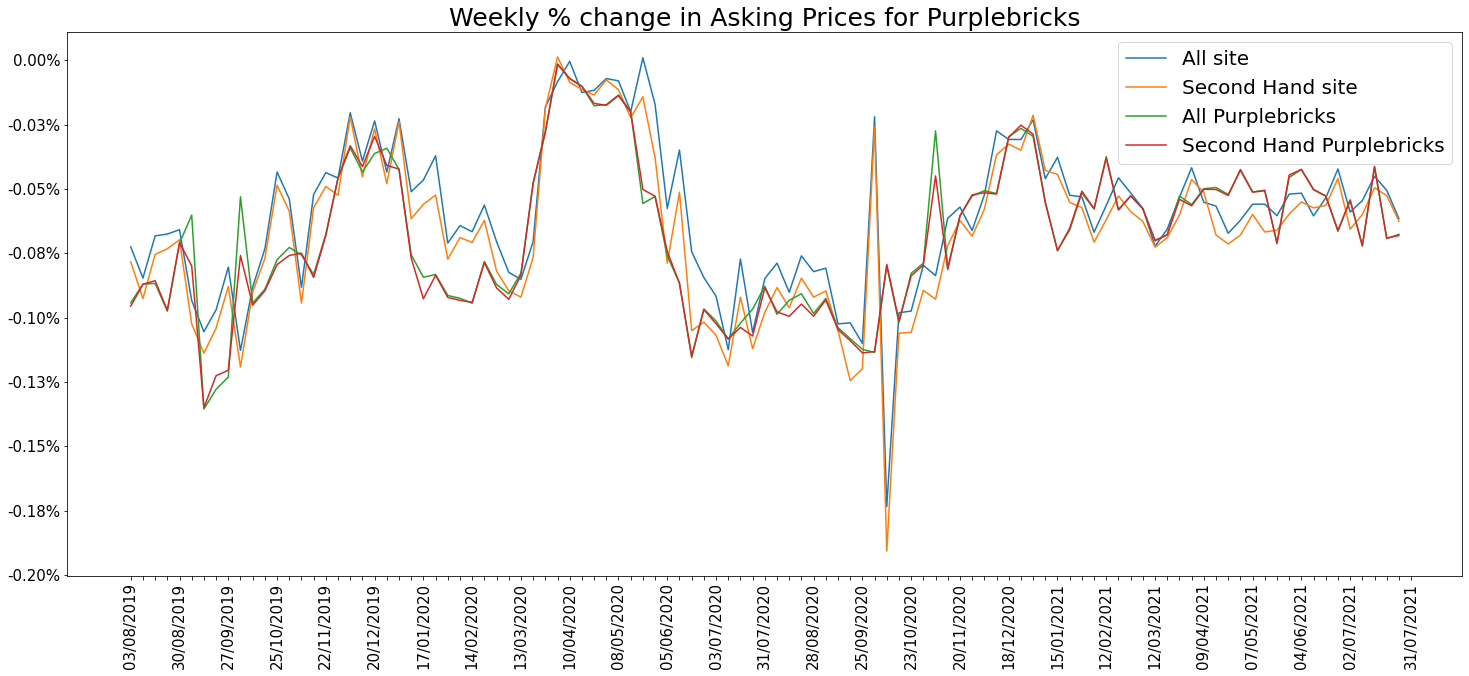

In [199]:
agent_price_charts('purp', 'Purplebricks')

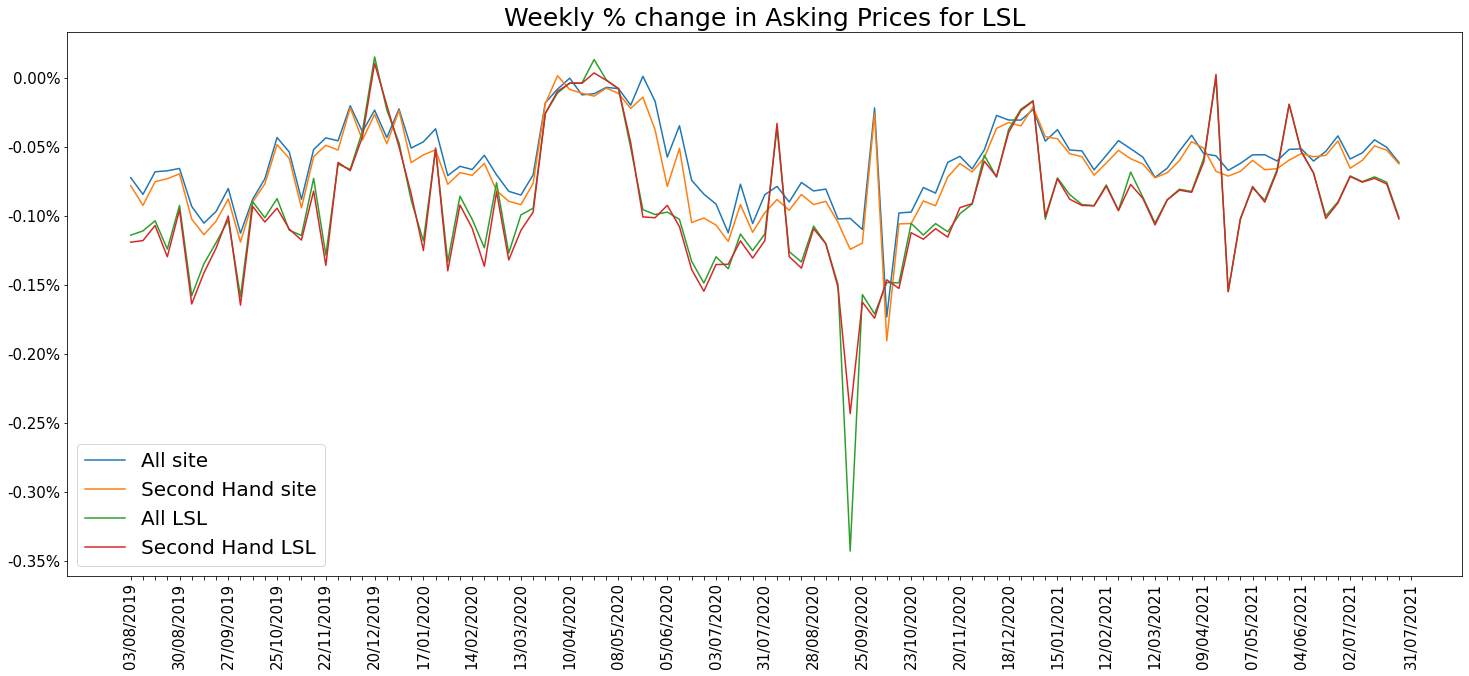

In [200]:
agent_price_charts('lsl', 'LSL')

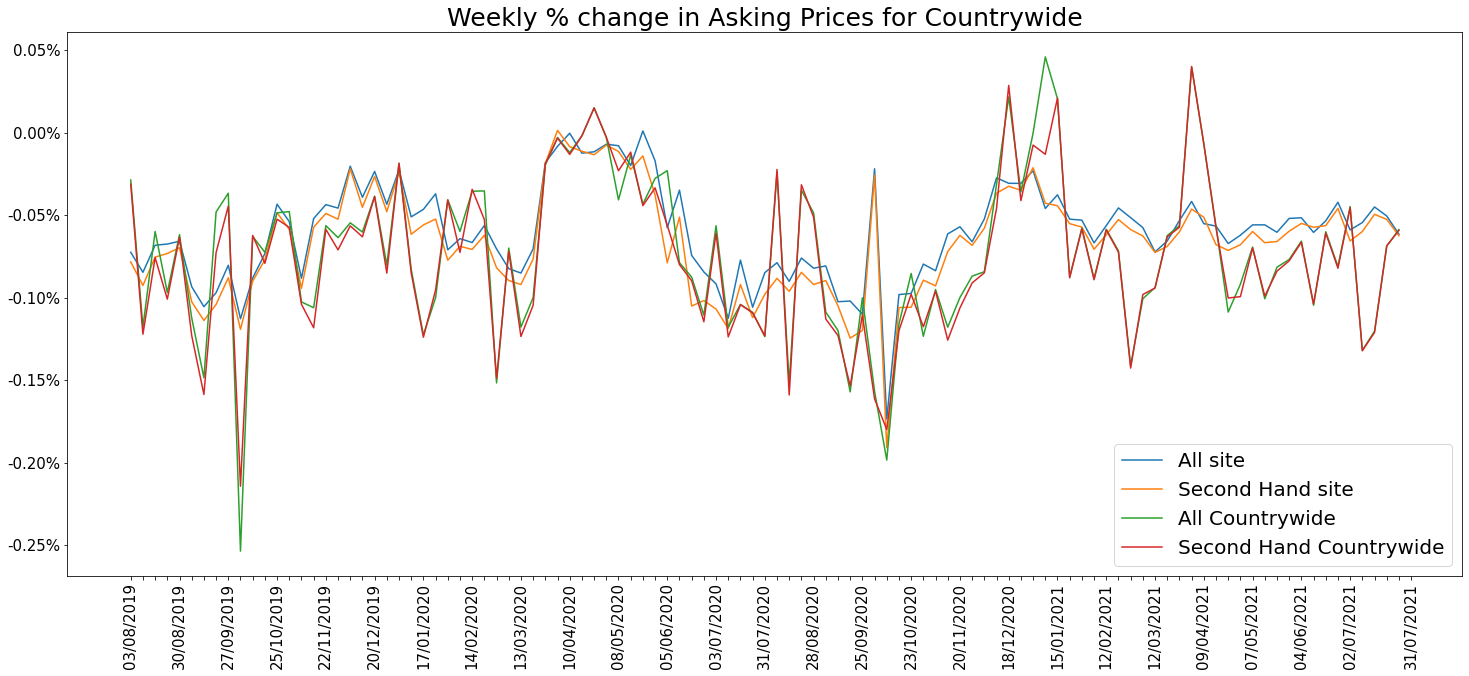

In [201]:
agent_price_charts('cwd', 'Countrywide')

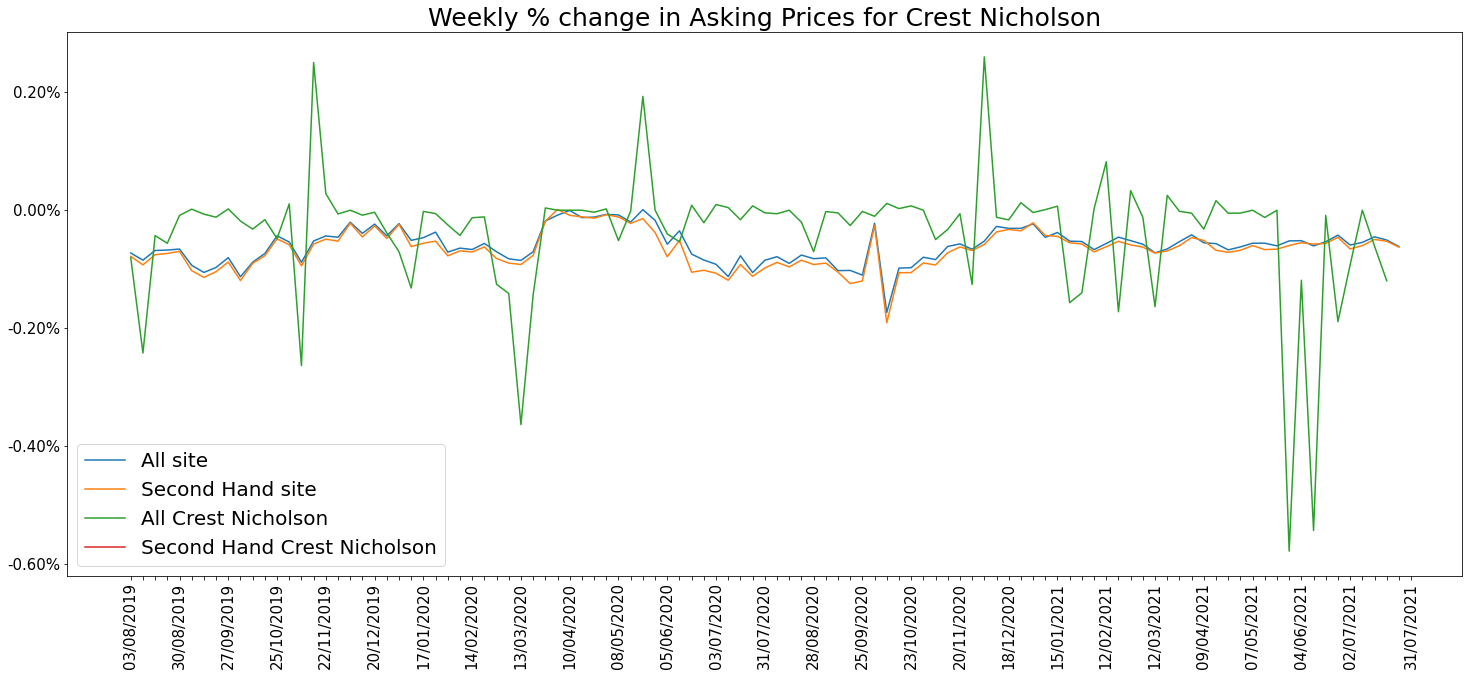

In [202]:
agent_price_charts('crst', 'Crest Nicholson')

In [203]:
# plot 6 charts showing the weekly new additions of volumes and value for purplebricks

def agent_additions_charts(suffix, agent):

    fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(25,10))

    plt.subplots_adjust(hspace=1.6, wspace=0.2)

    x = df_rightmove.index.values[1:]

    labels = list(df_rightmove['Date'][1:])

    # prevent x-axis labels from overlapping by printing every nth label
    for i in range(4,len(labels[1:]),4):
        labels[i-1], labels[i-2], labels[i-3]='','',''

    labels[len(labels)-1]=list(df_rightmove['Date'])[1:][-1]
    labels[len(labels)-2], labels[len(labels)-3], labels[len(labels)-4]='','',''

    y1 = df_rightmove['newVolume_ResiSale_all_' + str(suffix)][1:]
    y2 = df_rightmove['newValue_ResiSale_all_' + str(suffix)][1:]/1000000000
    y3 = df_rightmove['newVolume_ResiSale_scdhd_' + str(suffix)][1:]
    y4 = df_rightmove['newValue_ResiSale_scdhd_' + str(suffix)][1:]/1000000000
    y5 = df_rightmove['newVolume_ResiSale_new_' + str(suffix)][1:]
    y6 = df_rightmove['newValue_ResiSale_new_' + str(suffix)][1:]/1000000000


    set_title=['Weekly new volumes of all units added',
               'Weekly new values of all units added (£bn)',
               'Weekly new volumes of second hand units added',
               'Weekly new values of second hand units added (£bn)',
              'Weekly new volumes of new build units added',
              'Weekly new Values of new build units added £bn']
    set_plot = [y1,y2,y3,y4,y5,y6]
    set_axis_row = [0,0,1,1,2,2]
    set_axis_col = [0,1,0,1,0,1]

    for i in range(6):
        ax[set_axis_row[i], set_axis_col[i]].set_title(set_title[i], fontsize=20)
        ax[set_axis_row[i], set_axis_col[i]].set_xticklabels(labels, rotation=90, fontsize=15)
        ax[set_axis_row[i], set_axis_col[i]].set_xticks(x)
        #ax.yaxis.set_major_formatter(ticker.PercentFormatter(1.0, decimals=2))
        ax[set_axis_row[i], set_axis_col[i]].yaxis.set_tick_params(labelsize=15)
        ax[set_axis_row[i], set_axis_col[i]].bar(x, set_plot[i])

    # ax[0].set_title('Weekly new volumes of units added', fontsize=25)
    # ax[1].set_title('Weekly new values of units added', fontsize=25)
    # ax[0].set_xticklabels(labels, rotation=90, fontsize=15)
    # ax[0].set_xticks(x)
    # #ax.yaxis.set_major_formatter(ticker.PercentFormatter(1.0, decimals=2))
    # ax[0].yaxis.set_tick_params(labelsize=15)
    # ax[0].bar(x, y1)
    # ax[1].bar(x, y2)
    # # ax.plot(x, y2)
    # # ax.plot(x, y3)
    # # ax.plot(x, y4)
    # # ax.legend(('Total', 'New', 'Nearly New', 'Used'),fontsize=20)

    if savePNG == 1 or PwrptPrep == 1:
        savefig = 'Rightmove LD - new volumes and values ' + str(agent) + '.png'
        plt.savefig(savefig, bbox_inches = 'tight')    
        slideTitle.append('Weekly new units added by ' + str(agent))
        slideText.append(str(first_data) + ' to '+ str(monthNow))
        imagePath.append(savefig) 

    plt.show()

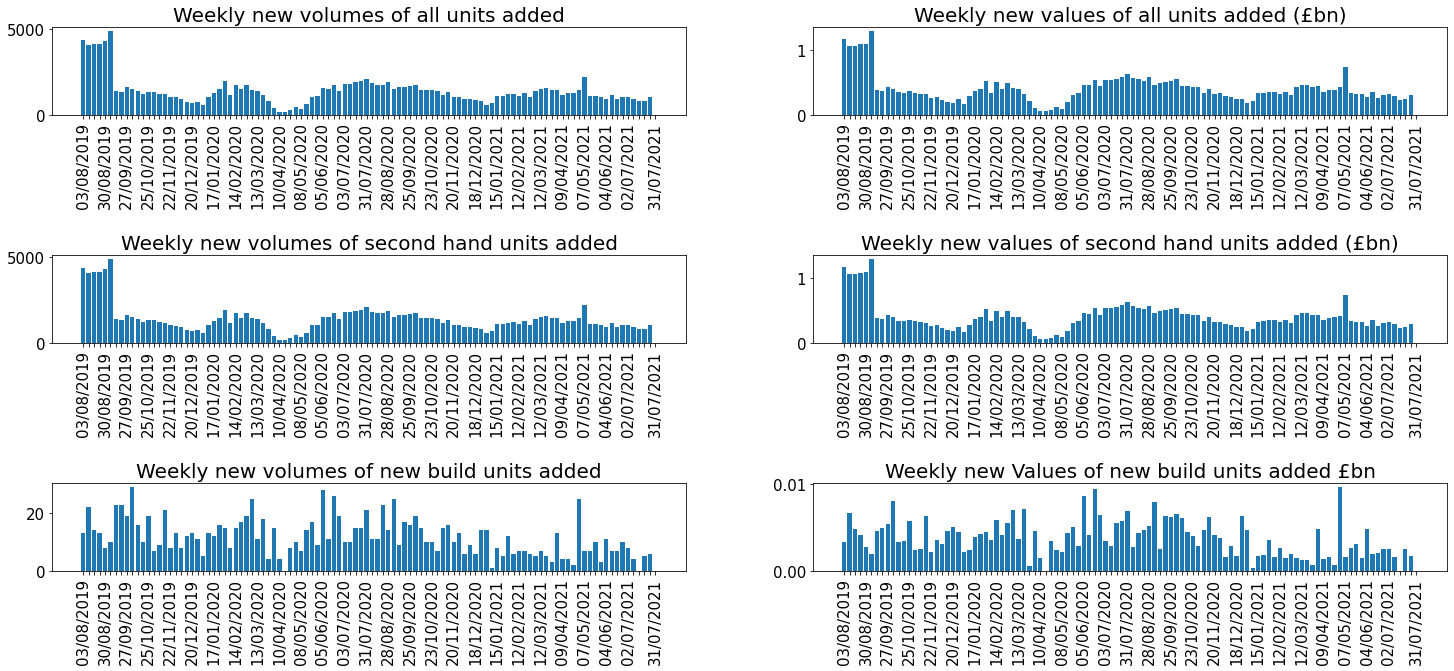

In [204]:
agent_additions_charts('purp', 'Purplebricks')

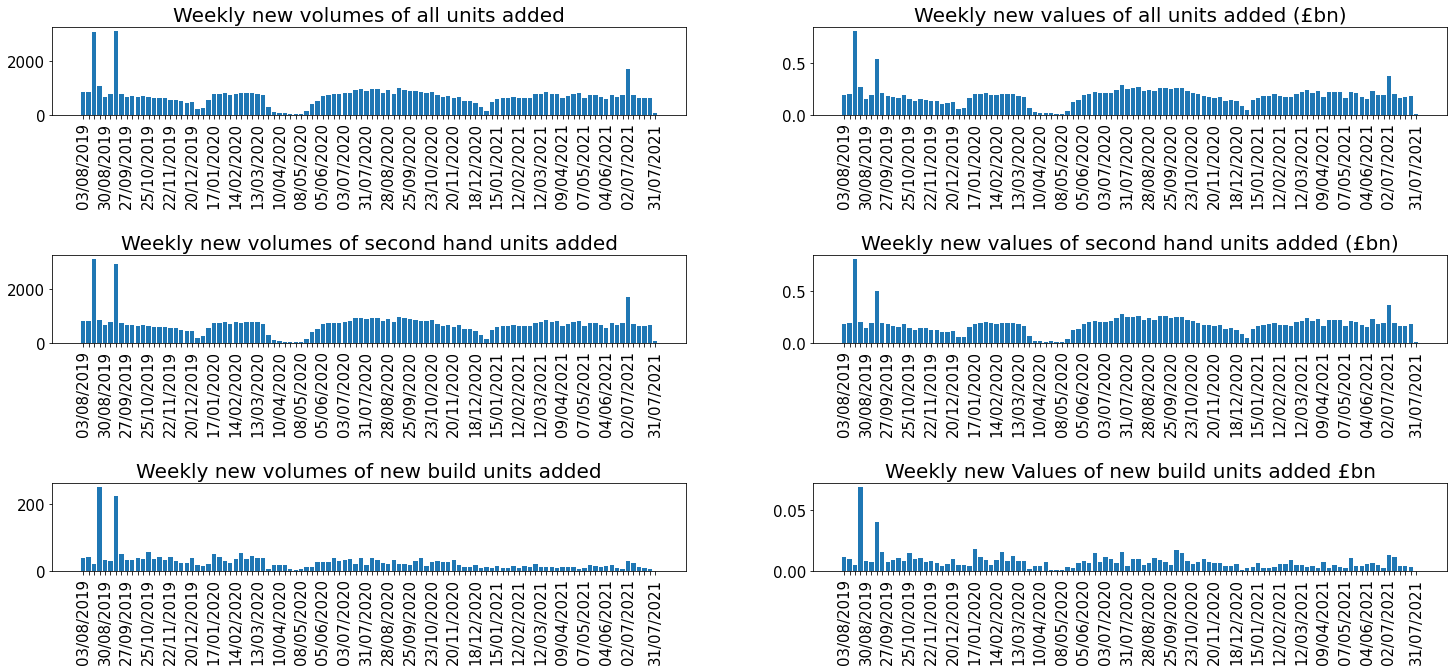

In [205]:
agent_additions_charts('lsl', 'LSL')

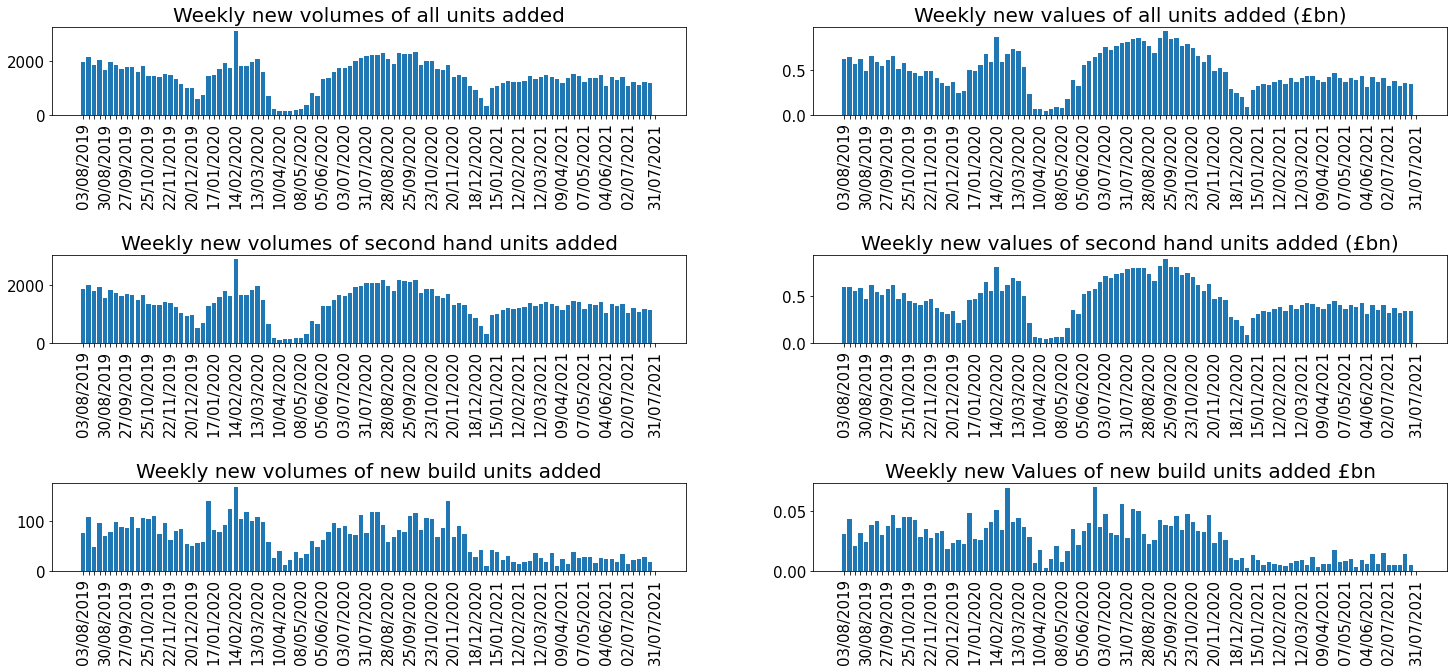

In [206]:
agent_additions_charts('cwd', 'Countrywide')

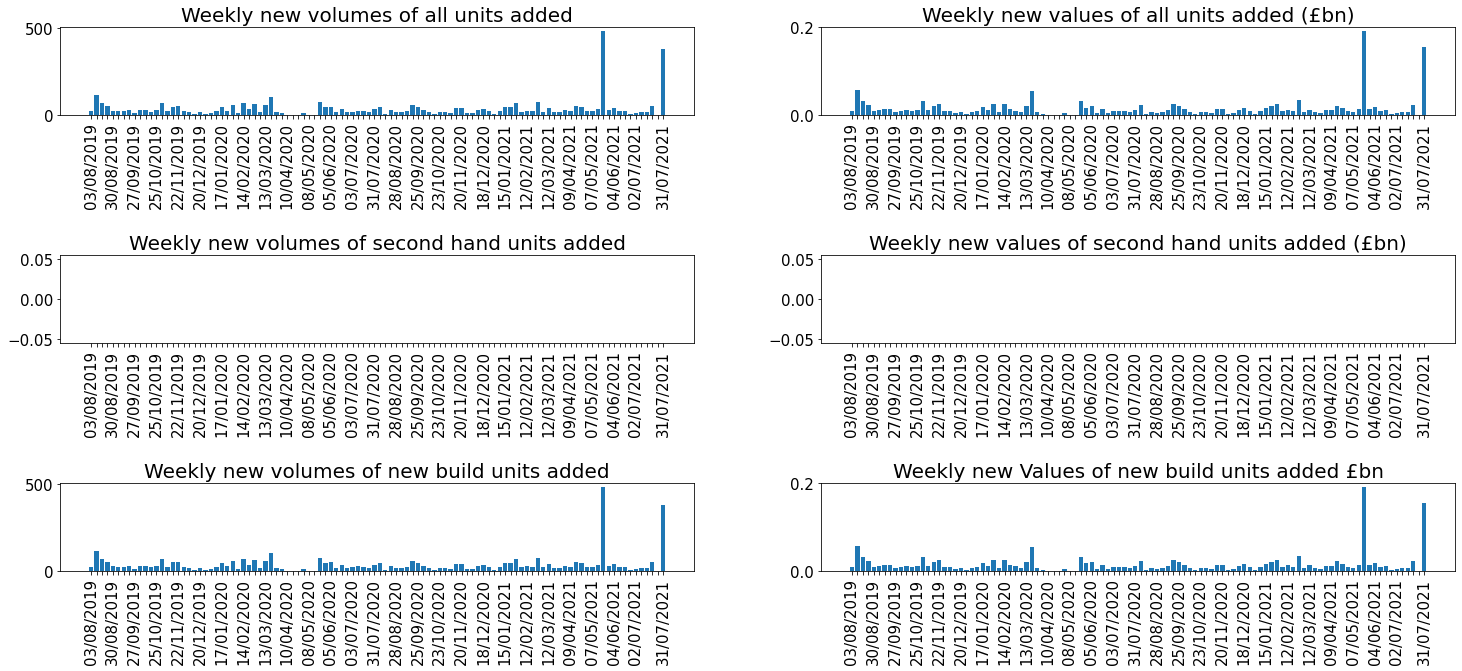

In [207]:
agent_additions_charts('crst', 'Crest Nicholson')

In [208]:
# plot 6 charts showing the weekly new STC volumes and values

def agent_newSTC_charts(suffix, agent):

    fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(25,10))

    plt.subplots_adjust(hspace=1.6, wspace=0.2)

    x = df_rightmove.index.values[1:]

    labels = list(df_rightmove['Date'][1:])

    # prevent x-axis labels from overlapping by printing every nth label
    for i in range(4,len(labels[1:]),4):
        labels[i-1], labels[i-2], labels[i-3]='','',''

    labels[len(labels)-1]=list(df_rightmove['Date'])[1:][-1]
    labels[len(labels)-2], labels[len(labels)-3], labels[len(labels)-4]='','',''

    y1 = df_rightmove['newVolumeSTC_ResiSale_all_' + str(suffix)][1:]
    y2 = df_rightmove['newValueSTC_ResiSale_all_' + str(suffix)][1:]/1000000000
    y3 = df_rightmove['newVolumeSTC_ResiSale_scdhd_' + str(suffix)][1:]
    y4 = df_rightmove['newValueSTC_ResiSale_scdhd_' + str(suffix)][1:]/1000000000
    y5 = df_rightmove['newVolumeSTC_ResiSale_new_' + str(suffix)][1:]
    y6 = df_rightmove['newValueSTC_ResiSale_new_' + str(suffix)][1:]/1000000000

    set_title=['Weekly new volumes of all STCs',
               'Weekly new values of all STCs (£bn)',
               'Weekly new volumes of second hand STCs',
               'Weekly new values of second hand STCs (£bn)',
               'Weekly new volumes of new build STCs',
               'Weekly new values of new build STCs (£bn)',]
    set_plot = [y1,y2,y3,y4,y5,y6]
    set_axis_row = [0,0,1,1,2,2]
    set_axis_col = [0,1,0,1,0,1]

    for i in range(6):
        ax[set_axis_row[i], set_axis_col[i]].set_title(set_title[i], fontsize=20)
        ax[set_axis_row[i], set_axis_col[i]].set_xticklabels(labels, rotation=90, fontsize=15)
        ax[set_axis_row[i], set_axis_col[i]].set_xticks(x)
        #ax.yaxis.set_major_formatter(ticker.PercentFormatter(1.0, decimals=2))
        ax[set_axis_row[i], set_axis_col[i]].yaxis.set_tick_params(labelsize=15)
        ax[set_axis_row[i], set_axis_col[i]].bar(x, set_plot[i])

    # ax[0].set_title('Weekly new volumes of of STCs', fontsize=25)
    # ax[1].set_title('Weekly new values of STCs', fontsize=25)
    # ax[0].set_xticklabels(labels, rotation=90, fontsize=15)
    # ax[0].set_xticks(x)
    # #ax.yaxis.set_major_formatter(ticker.PercentFormatter(1.0, decimals=2))
    # ax[0].yaxis.set_tick_params(labelsize=15)
    # ax[0].bar(x, y1)
    # ax[1].bar(x, y2)
    # # ax.plot(x, y2)
    # # ax.plot(x, y3)
    # # ax.plot(x, y4)
    # # ax.legend(('Total', 'New', 'Nearly New', 'Used'),fontsize=20)

    if savePNG == 1 or PwrptPrep == 1:
        savefig = 'Rightmove LD - new STC volumes and values ' + str(agent) + '.png'
        plt.savefig(savefig, bbox_inches = 'tight')    
        slideTitle.append('Weekly new Offers (STCs) made by ' + str(agent))
        slideText.append(str(first_data) + ' to '+ str(monthNow))
        imagePath.append(savefig)   

    plt.show()

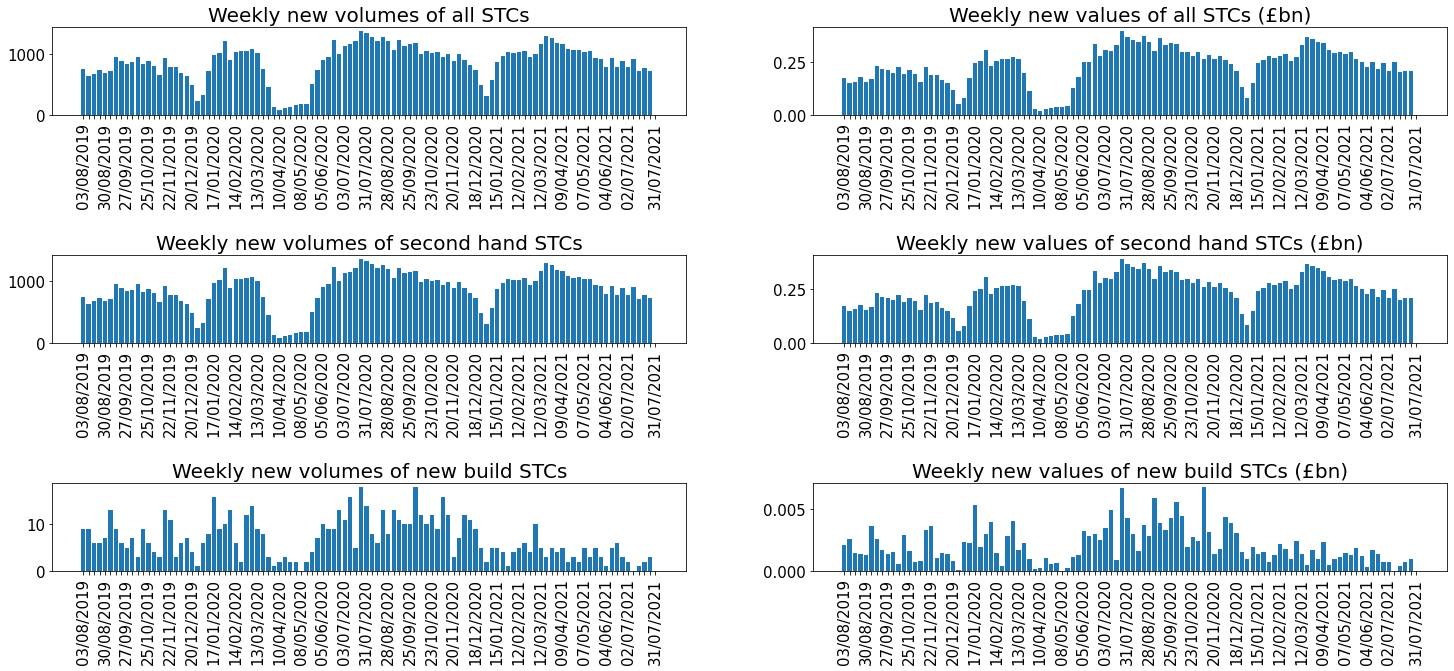

In [209]:
agent_newSTC_charts('purp', 'Purplebricks')

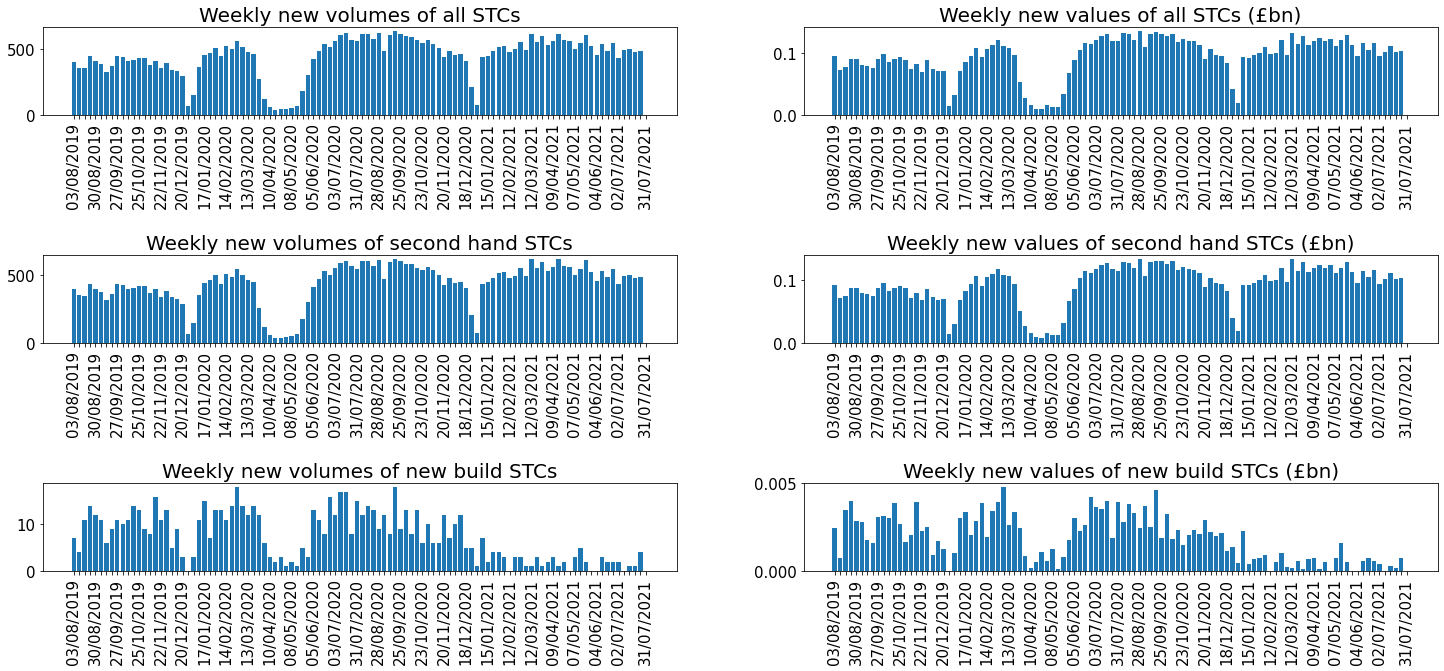

In [210]:
agent_newSTC_charts('lsl', 'LSL')

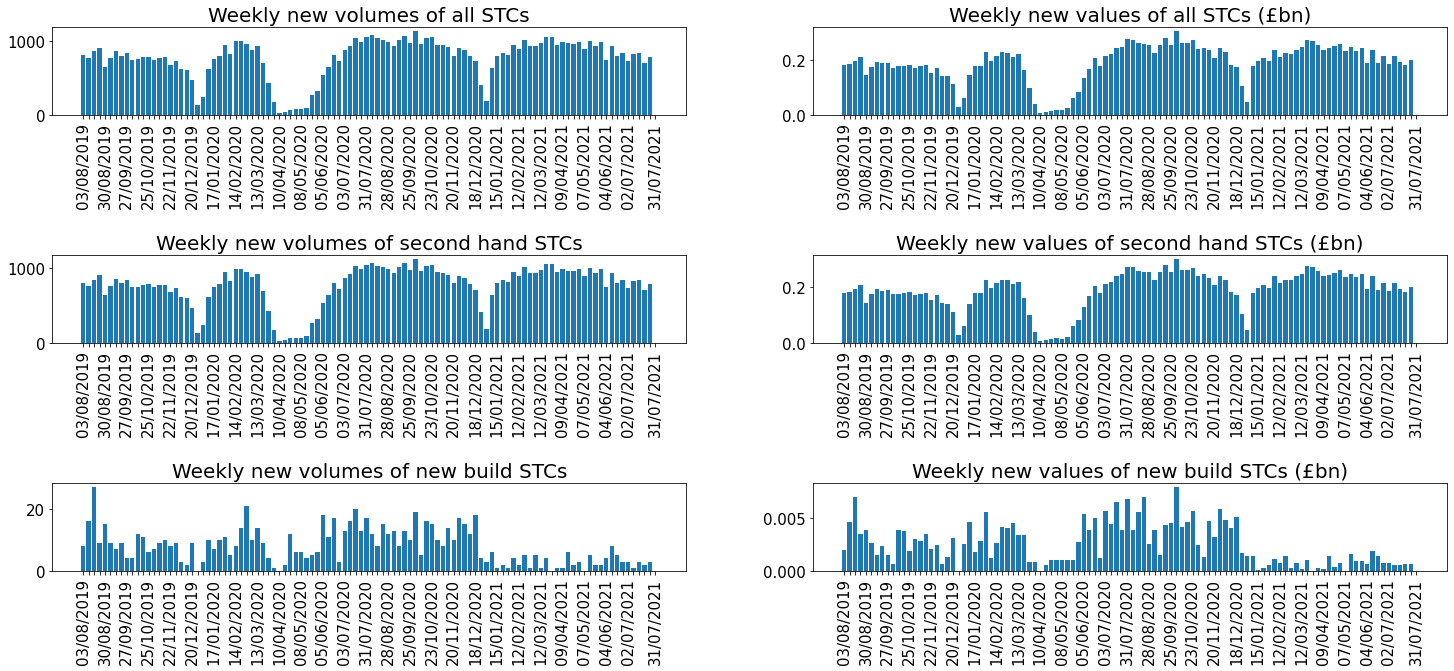

In [211]:
agent_newSTC_charts('cwd', 'Countrywide')

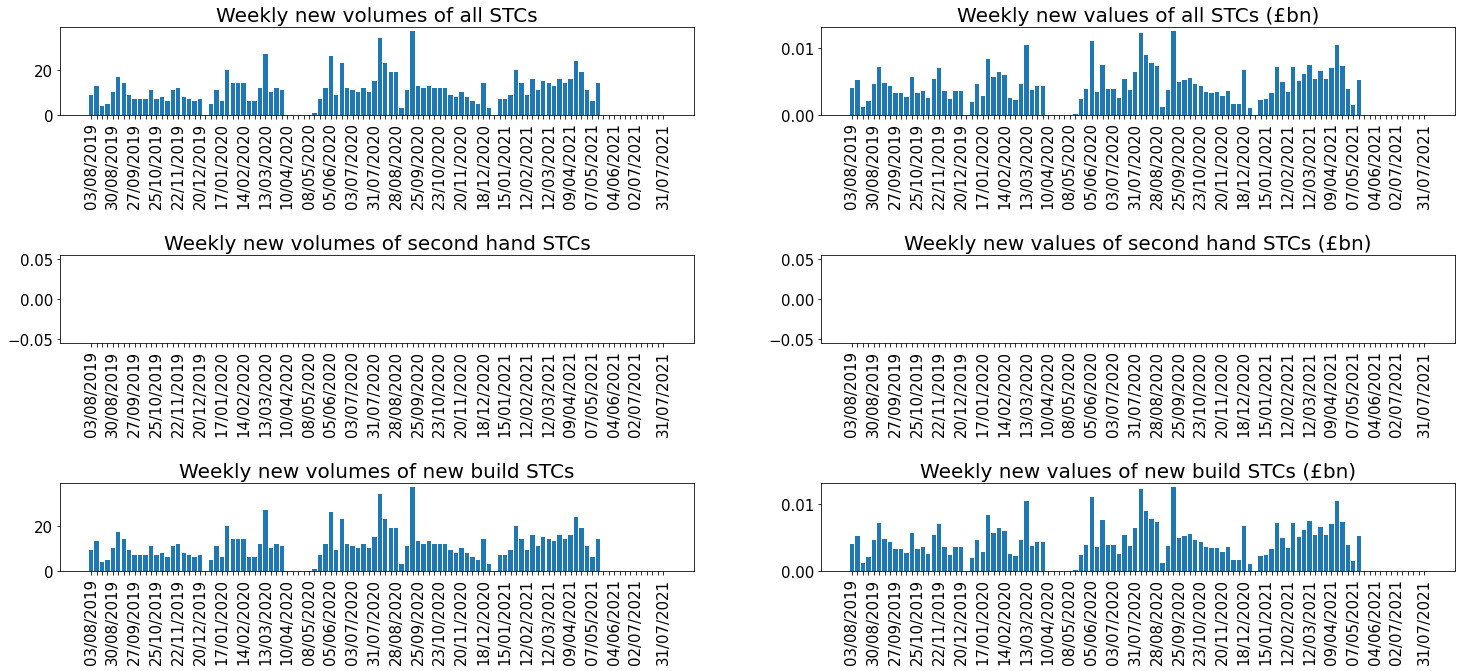

In [212]:
agent_newSTC_charts('crst', 'Crest Nicholson')

In [213]:
# plot 6 charts showing the weekly STC volumes and values that fell through for purplebricks

def agent_cancSTC_charts(suffix, agent):
    
    fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(25,10))

    plt.subplots_adjust(hspace=1.6, wspace=0.2)

    x = df_rightmove.index.values[1:]

    labels = list(df_rightmove['Date'][1:])

    # prevent x-axis labels from overlapping by printing every nth label
    for i in range(4,len(labels[1:]),4):
        labels[i-1], labels[i-2], labels[i-3]='','',''

    labels[len(labels)-1]=list(df_rightmove['Date'])[1:][-1]
    labels[len(labels)-2], labels[len(labels)-3], labels[len(labels)-4]='','',''

    y1 = df_rightmove['cancVolumeSTC_ResiSale_all_' + str(suffix)][1:]
    y2 = df_rightmove['cancValueSTC_ResiSale_all_' + str(suffix)][1:]/1000000000
    y3 = df_rightmove['cancVolumeSTC_ResiSale_scdhd_' + str(suffix)][1:]
    y4 = df_rightmove['cancValueSTC_ResiSale_scdhd_' + str(suffix)][1:]/1000000000
    y5 = df_rightmove['cancVolumeSTC_ResiSale_new_' + str(suffix)][1:]
    y6 = df_rightmove['cancValueSTC_ResiSale_new_' + str(suffix)][1:]/1000000000

    set_title=['Weekly volume of all STCs that fell through', 
               'Weekly value of all STCs that fell through (£bn)',
              'Weekly volume of second hand STCs that fell through', 
               'Weekly value of second hand STCs that fell through (£bn)',
               'Weekly volume of new build STCs that fell through', 
               'Weekly value of new build STCs that fell through (£bn)']

    set_plot = [y1,y2,y3,y4,y5,y6]
    set_axis_row = [0,0,1,1,2,2]
    set_axis_col = [0,1,0,1,0,1]

    for i in range(6):
        ax[set_axis_row[i], set_axis_col[i]].set_title(set_title[i], fontsize=20)
        ax[set_axis_row[i], set_axis_col[i]].set_xticklabels(labels, rotation=90, fontsize=15)
        ax[set_axis_row[i], set_axis_col[i]].set_xticks(x)
        #ax.yaxis.set_major_formatter(ticker.PercentFormatter(1.0, decimals=2))
        ax[set_axis_row[i], set_axis_col[i]].yaxis.set_tick_params(labelsize=15)
        ax[set_axis_row[i], set_axis_col[i]].bar(x, set_plot[i])

    # ax[0].set_title('Weekly new volumes of of STCs', fontsize=25)
    # ax[1].set_title('Weekly new values of STCs', fontsize=25)
    # ax[0].set_xticklabels(labels, rotation=90, fontsize=15)
    # ax[0].set_xticks(x)
    # #ax.yaxis.set_major_formatter(ticker.PercentFormatter(1.0, decimals=2))
    # ax[0].yaxis.set_tick_params(labelsize=15)
    # ax[0].bar(x, y1)
    # ax[1].bar(x, y2)
    # # ax.plot(x, y2)
    # # ax.plot(x, y3)
    # # ax.plot(x, y4)
    # # ax.legend(('Total', 'New', 'Nearly New', 'Used'),fontsize=20)

    if savePNG == 1 or PwrptPrep == 1:
        savefig = 'Rightmove LD - cancelled STC volumes and values ' + str(agent) + '.png'
        plt.savefig(savefig, bbox_inches = 'tight')    
        slideTitle.append('Weekly offers (STCs) that fell through for ' + str(agent))
        slideText.append(str(first_data) + ' to '+ str(monthNow))
        imagePath.append(savefig) 

    plt.show()

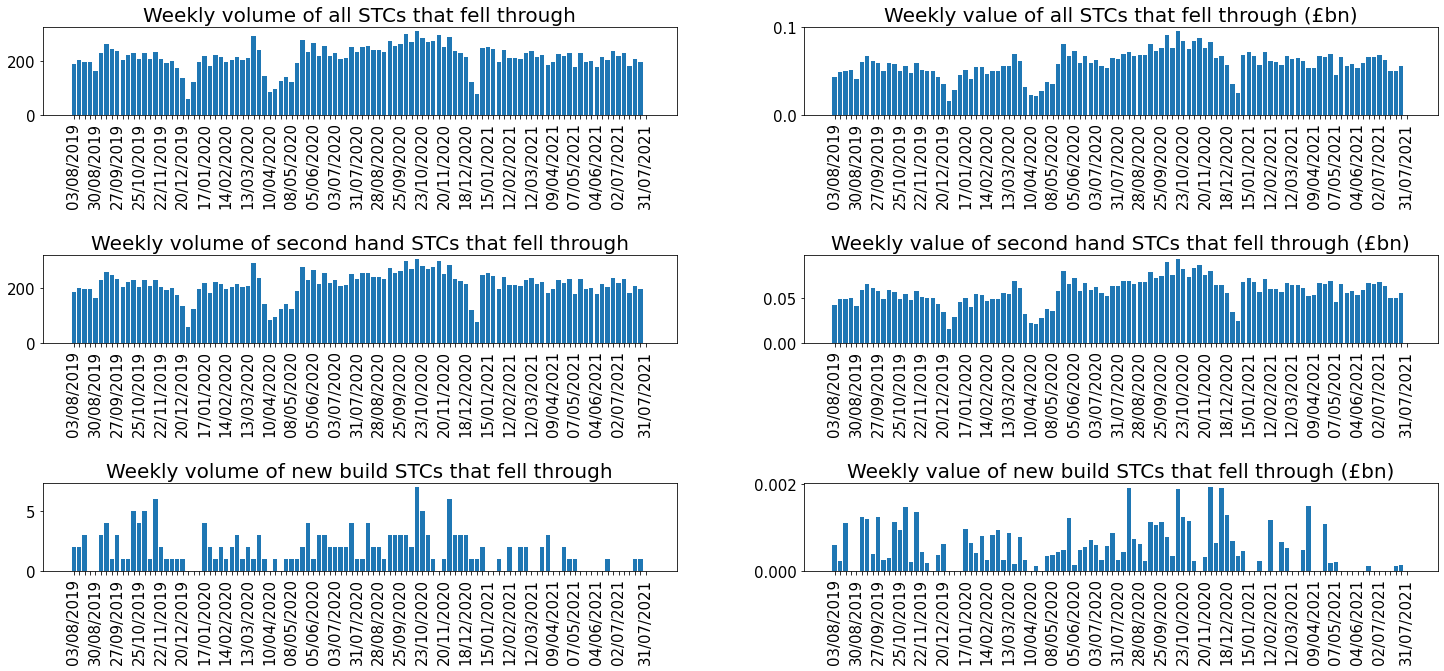

In [214]:
agent_cancSTC_charts('purp', 'Purplebricks')

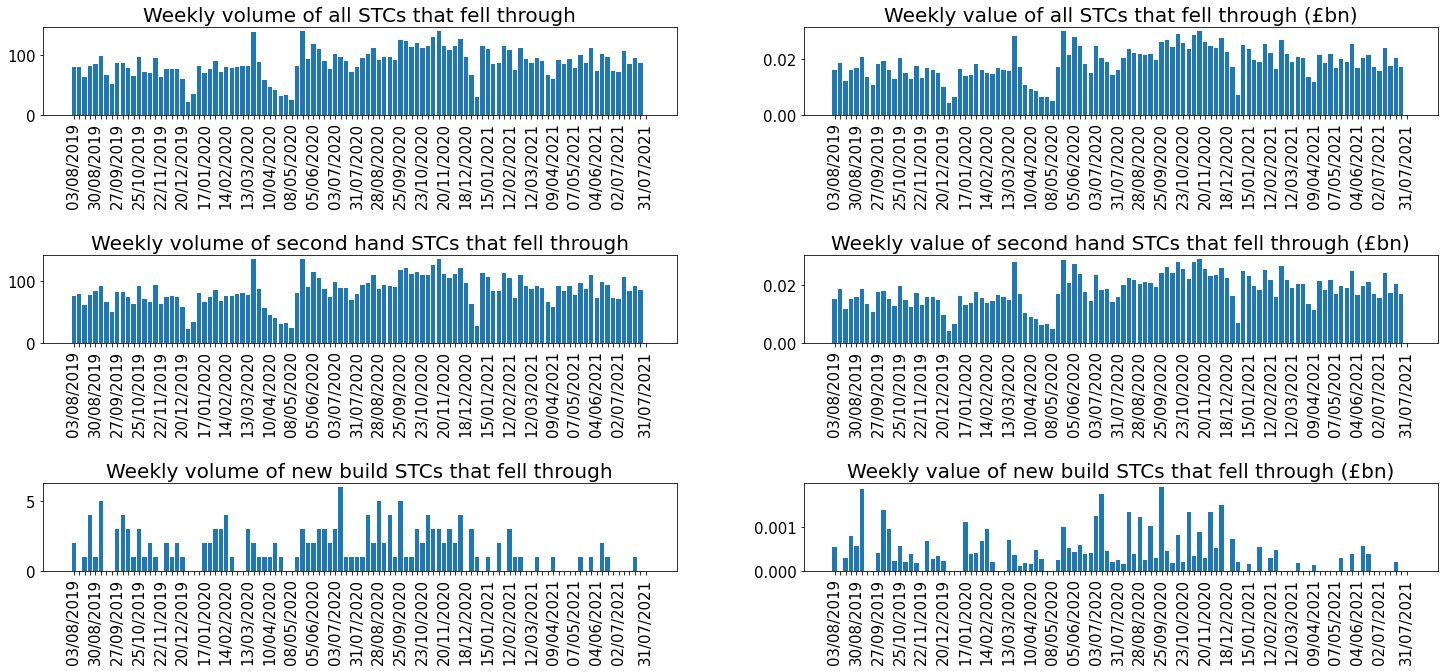

In [215]:
agent_cancSTC_charts('lsl', 'LSL')

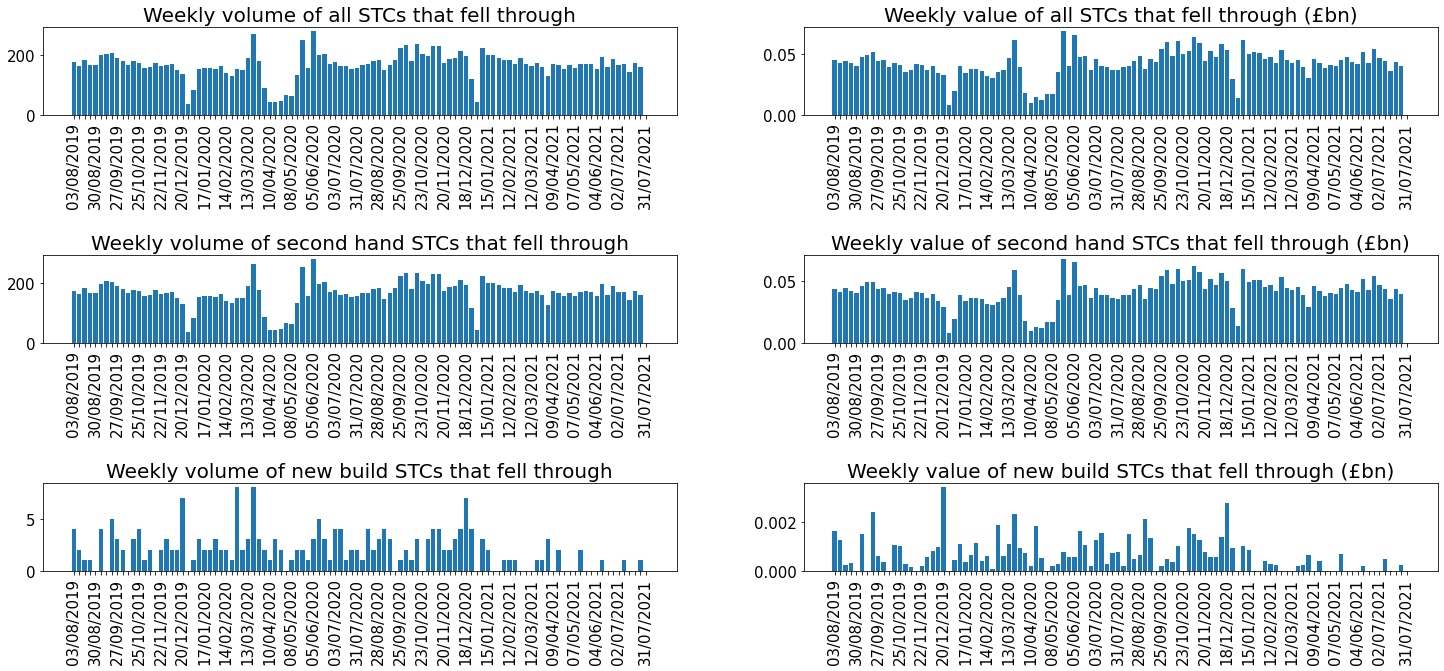

In [216]:
agent_cancSTC_charts('cwd', 'countrywide')

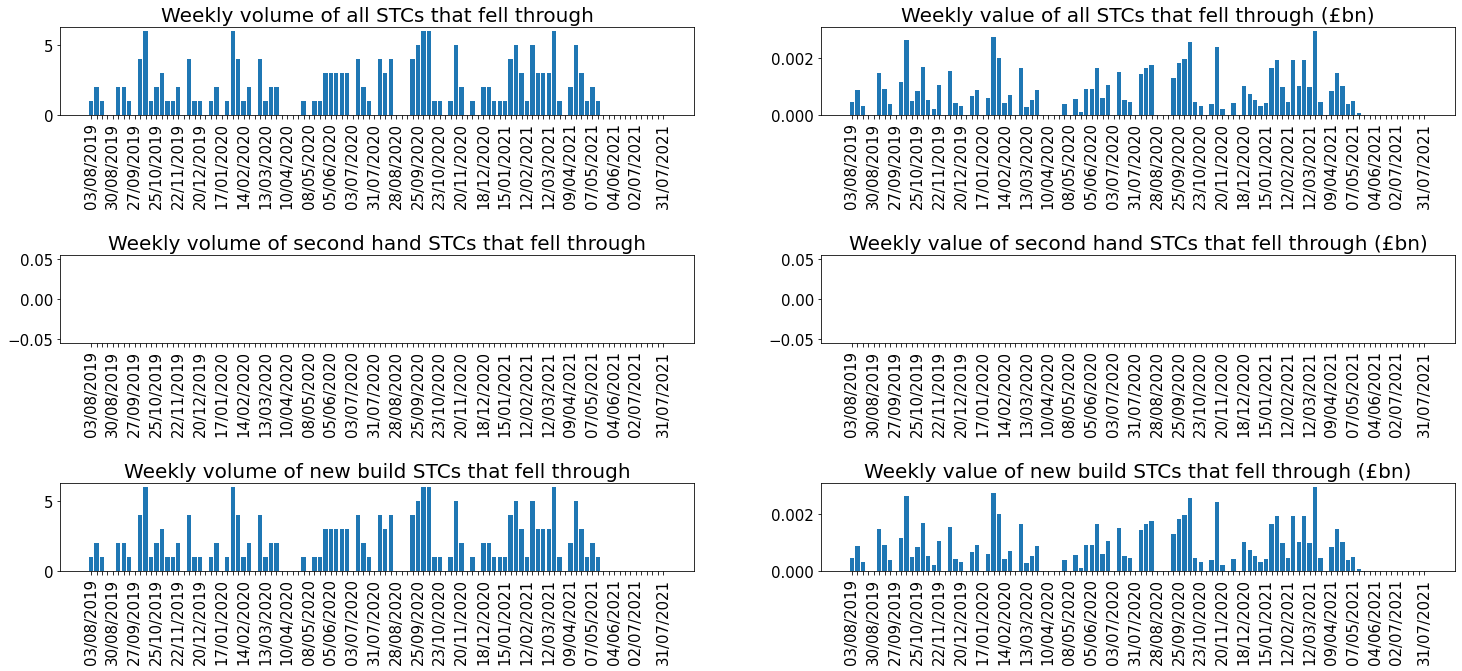

In [217]:
agent_cancSTC_charts('crst', 'Crest Nicholson')

In [218]:
df_rightmove.head(10)

Date  Total branches  Total url branches  Sales branches  \
0  26/07/2019           22581               39688           13229   
1  03/08/2019           22538               39519           13191   
2  09/08/2019           22549               39636           13194   
3  16/08/2019           22495               39444           13186   
4  23/08/2019           22501               39502           13177   
5  30/08/2019           22473               39441           13159   
6  06/09/2019           22451               39397           13159   
7  13/09/2019           22469               39493           13166   
8  20/09/2019           22481               39477           13158   
9  27/09/2019           22465               39410           13134   

   New Homes branches  Letting branches  Com Sales branches  \
0                8703             10986                4151   
1                8705             10945                4077   
2                8730             10955                4151   
3                8672             10897                4102   
4                8718             10887                4138   
5                8724             10862                4123   
6                8719             10842                4105   
7                8767             10847                4149   
8                8786             10831                4119   
9                8762             10814                4115   

   Com Rent branches  total_properties  new homes  property_for_sale  \
0               2619           1135850      65680             763829   
1               2601           1128697      65771             761651   
2               2606           1118696      65682             753046   
3               2587           1112132      65003             751009   
4               2582           1109981      65148             752036   
5               2573           1100841      64829             750975   
6               2572           1104934      65018             758180   
7               2564           1103191      65276             760431   
8               2583           1099984      65700             760954   
9               2585           1092681      65690             757734   

   new_homes_for_sale  property_to_rent  overseas_property  \
0               65568            242834                  1   
1               65646            237237                  1   
2               65549            235810                  1   
3               64892            232219                  1   
4               65036            228558                  1   
5               64722            220709                  1   
6               64908            216286                  1   
7               65147            212193                  1   
8               65580            207956                  1   
9               65590            203287                  1   

   commercial_property_for_sale  commercial_property_to_let  check properties  \
0                         29516                       34102                 0   
1                         29596                       34566                 0   
2                         29689                       34601                 0   
3                         29671                       34340                 0   
4                         29873                       34477                 0   
5                         29930                       34504                 0   
6                         30082                       35477                 0   
7                         29993                       35426                 0   
8                         30018                       35475                 0   
9                         29961                       36108                 0   

   check branches  price_change_ResiSale_all  price_change_ResiSale_house  \
0               0                   0.000000                     0.000000   
1               0                

In [219]:
df_rightmove['check properties'].sum(), df_rightmove['check branches'].sum()

(0, 0)

In [220]:
df[-1].head()

branch_id                         name      telephone  \
0     146693  Nest Estate Agents, Enderby  0116 452 0261   
1     146693  Nest Estate Agents, Enderby  0116 452 0261   
2     146693  Nest Estate Agents, Enderby  0116 452 0261   
4     146693  Nest Estate Agents, Enderby  0116 452 0261   
5     146693  Nest Estate Agents, Enderby  0116 452 0261   

                               address  results  \
0  22a Cross Street, Enderby, LE19 4NJ     26.0   
1  22a Cross Street, Enderby, LE19 4NJ     26.0   
2  22a Cross Street, Enderby, LE19 4NJ     26.0   
4  22a Cross Street, Enderby, LE19 4NJ     26.0   
5  22a Cross Street, Enderby, LE19 4NJ     26.0   

                                          branch_url property_URL     price  \
0  https://www.rightmove.co.uk/property-for-sale/...    110955719  335000.0   
1  https://www.rightmove.co.uk/property-for-sale/...    108411608  385000.0   
2  https://www.rightmove.co.uk/property-for-sale/...    109976828  350000.0   
4  https://www.rightmove.co.uk/property-for-sale/...    108040982  325000.0   
5  https://www.rightmove.co.uk/property-for-sale/...    102376790  320000.0   

                                  title  \
0     4 bedroom detached house for sale   
1     4 bedroom detached house for sale   
2  3 bedroom detached bungalow for sale   
4     4 bedroom detached house for sale   
5     4 bedroom detached house for sale   

                                    property_address  images  \
0           Godfrey Close, Stoney Stanton, Leicester    18.0   
1                   Ashton Drive, Enderby, Leicester    17.0   
2  Charnwood Drive, Leicester Forest East, Leicester    19.0   
4               Copt Oak Road, Narborough, Leicester    19.0   
5                     Blaby Road, Enderby, Leicester    12.0   

        added_or_Reduced premium status_sold status_new developer  \
0    Added on 26/07/2021     0.0           0        0.0       0.0   
1  Reduced on 09/07/2021     0.0    Sold STC        0.0       0.0   
2    Added on 05/07/2021     0.0    Sold STC        0.0       0.0   
4  Reduced on 17/06/2021     0.0           0        0.0       0.0   
5  Reduced on 10/06/2021     0.0           0        0.0       0.0   

  status_commercial           featured        branch_type   transaction_type  \
0               0.0  Featured Property  property-for-sale  property-for-sale   
1               0.0                  0  property-for-sale  property-for-sale   
2               0.0                  0  property-for-sale  property-for-sale   
4               0.0                  0  property-for-sale  property-for-sale   
5               0.0                  0  property-for-sale  property-for-sale   

  area_postcode area_postcode_new area_postcode_new1 area_postcode_final  \
0     Leicester                LE                 LE                  LE   
1     Leicester                LE                 LE                  LE   
2     Leicester                LE                 LE                  LE   
4     Leicester                LE                 LE                  LE   
5     Leicester                LE                 LE                  LE   

  house_or_flat  
0         house  
1         house  
2         house  
4         house  
5         house

In [221]:
df_rightmove.head()

Date  Total branches  Total url branches  Sales branches  \
0  26/07/2019           22581               39688           13229   
1  03/08/2019           22538               39519           13191   
2  09/08/2019           22549               39636           13194   
3  16/08/2019           22495               39444           13186   
4  23/08/2019           22501               39502           13177   

   New Homes branches  Letting branches  Com Sales branches  \
0                8703             10986                4151   
1                8705             10945                4077   
2                8730             10955                4151   
3                8672             10897                4102   
4                8718             10887                4138   

   Com Rent branches  total_properties  new homes  property_for_sale  \
0               2619           1135850      65680             763829   
1               2601           1128697      65771             761651   
2               2606           1118696      65682             753046   
3               2587           1112132      65003             751009   
4               2582           1109981      65148             752036   

   new_homes_for_sale  property_to_rent  overseas_property  \
0               65568            242834                  1   
1               65646            237237                  1   
2               65549            235810                  1   
3               64892            232219                  1   
4               65036            228558                  1   

   commercial_property_for_sale  commercial_property_to_let  check properties  \
0                         29516                       34102                 0   
1                         29596                       34566                 0   
2                         29689                       34601                 0   
3                         29671                       34340                 0   
4                         29873                       34477                 0   

   check branches  price_change_ResiSale_all  price_change_ResiSale_house  \
0               0                   0.000000                     0.000000   
1               0                  -0.000725                    -0.000780   
2               0                  -0.000846                    -0.000905   
3               0                  -0.000682                    -0.000621   
4               0                  -0.000675                    -0.000673   

   price_change_ResiSale_flat  newVolume_ResiSale_flat  \
0                    0.000000                        0   
1                   -0.000594                    11187   
2                   -0.000733                    11387   
3                   -0.000864                    10567   
4                   -0.000626                    10660   

   newValue_ResiSale_flat  newVolume_ResiSale_house  newValue_ResiSale_house  \
0            0.000000e+00                         0             0.000000e+00   
1            3.540108e+09                     36193             1.222642e+10   
2            3.818384e+09                     35098             1.155502e+10   
3            3.188372e+09                     36255             1.192503e+10   
4            3.157188e+09                     36481             1.180163e+10   

   newVolume_ResiSale_all  newValue_ResiSale_all  newVolumeSTC_ResiSale_flat  \
0                       0           0.000000e+00                           0   
1                   48631           1.614774e+10                        2826   
2                   47828           1.579176e+10                        2619   
3                   48026           1.547795e+10                        2759   
4                   48450           1.534945e+10                        2954   

   newValueSTC_ResiSale_flat  newVolumeSTC_ResiSale_house  \
0                        0.0                            0   
1                608689740

In [222]:
#
# Preparing the presentation
#

In [223]:
if PwrptPrep == 1:
    prs = Presentation('Presentation - template.pptx')

In [224]:
# change the title and date on the front page
# the slide shapes do not go nicely 0,1,2 they go 1,2,0
if PwrptPrep == 1:
    
    listShapes = [1,2,0]

    for i in range(3):
        slide = prs.slides[0]
        shape = slide.shapes[listShapes[i]]
        text_frame = shape.text_frame
        text_frame.paragraphs[0].runs[0].text = presentationTitle[i]

In [225]:
# add the Preamble and Summary slides
if PwrptPrep == 1:

    title_Preamble_Summary = ['Preamble', 'Summary']

    for i in range(2):
        blank_slide_layout = prs.slide_layouts[15]
        slide = prs.slides.add_slide(blank_slide_layout)

        title = slide.shapes.title
        title.text = title_Preamble_Summary[i]

        top = height = Inches(1.5)
        width = Inches(10.25)
        left = Inches(0.25)
        txBox = slide.shapes.add_textbox(left, top, width, height)
        tf = txBox.text_frame
        tf.word_wrap = True
        p = tf.add_paragraph()
        p.level = 1
        
        if i == 0:
            p.text = 'original data points collected from the Rightmove website is currently ' + '{0:.1f}'.format(total_dataPoints/1000000000) + ' billion'
            p = tf.add_paragraph()
            p.level = 1
            p.text = 'the data is gathered weekly from ' + str(first_data) + ' to '+ str(monthNow)
            p = tf.add_paragraph()
            p.level = 1
            p.text = 'the data consists of 18 data points on each property listed on the website'
            p = tf.add_paragraph()
            p.level = 1
            p.text = 'the chart pack is work in progress given we can now go down to the property level'            
            p = tf.add_paragraph()
            p.level = 1
            p.text = 'the drawback is that this detail of data only goes back to '  + str(first_data)
            p = tf.add_paragraph()
            p.level = 1
            p.text = 'that said, it should give us a good indication as to how the UK housing market is recovering'           
            p = tf.add_paragraph()
            p.level = 1
            p.text = 'current coding undertaken, all focusing on Residential Properties for Sale, to:' 
            p = tf.add_paragraph()
            p.level = 2
            p.text = 'look at how asking prices are changing weekly'
            p = tf.add_paragraph()
            p.level = 2
            p.text = 'see the number of new listings on the website each week'  
            p = tf.add_paragraph()
            p.level = 2
            p.text = 'determine the number of verbal offers accepted (STCs)'  
            p = tf.add_paragraph()
            p.level = 2
            p.text = 'determine the number of verbal offers that have fallen through'  
            p = tf.add_paragraph()
            p.level = 2
            p.text = 'determine the number of properties that have a verbal offer'
            p = tf.add_paragraph()
            p.level = 1
            p.text = 'and all the above but focusing on houses vs flats, price bands, regions and certain estate agents.'  
            
        if i == 1:
            p.text = 'to be added by user if required'
            p = tf.add_paragraph()
            p.level = 1

In [226]:
# add the Chapter contents slide and Chapter 1 slide
if PwrptPrep == 1:
    
    blank_slide_layout = prs.slide_layouts[15]
    slide = prs.slides.add_slide(blank_slide_layout)

    shapes = slide.shapes

    shapes.title.text = 'Contents'

    rows = cols = 2
    left = Inches(0.25)
    top = Inches(1.5)
    width = Inches(1.5)
    height = Inches(1.5)

    table = shapes.add_table(rows, cols, left, top, width, height).table

    # set column widths
    table.columns[0].width = Inches(1.5)
    table.columns[1].width = Inches(2.0)

    tableText = ['01', 'Charts', '02', 'Appendix']
    TableFont = [60, 14, 60, 14]
    tableCell1 = [0,0,1,1]
    tableCell2 = [0,1,0,1]

    for i in range(4):
        table.cell(tableCell1[i], tableCell2[i]).text = tableText[i]
        cell = table.cell(tableCell1[i], tableCell2[i])
        para = cell.text_frame.paragraphs[0]
        para.font.bold = True
        para.font.size = Pt(TableFont[i])
        para.font.color.rgb = RGBColor(0, 55, 129) 
        cell.vertical_anchor = MSO_ANCHOR.MIDDLE
        fill = cell.fill
        fill.background()

    slide = prs.slides.add_slide(prs.slide_layouts[9])
    placeholder = slide.placeholders[1]
    placeholder.text = '01'
    title = slide.shapes.title
    title.text = 'Charts'


In [227]:
# add a blank slide with title, text and saved graphic as per the list of items
if PwrptPrep == 1:
    
    for i in range(len(slideTitle)):

        blank_slide_layout = prs.slide_layouts[15]
        slide = prs.slides.add_slide(blank_slide_layout)

        title = slide.shapes.title
        title.text = slideTitle[i]

        top = width = height = Inches(1.5)
        left = Inches(0.25)
        txBox = slide.shapes.add_textbox(left, top, width, height)
        tf = txBox.text_frame

        p = tf.add_paragraph()
        p.text = slideText[i]
        p.font.bold = True
        p.font.size = Pt(14)

        left = Inches(0.25)
        top = Inches(2.5)
        height = Inches(4)
        width = Inches(9)
        if imagePath[i] !='':
            pic = slide.shapes.add_picture(imagePath[i], left, top, width = width, height = height)


In [228]:
slideTitle

['UK national data - Houses vs Flats',
 'Weekly % change in Asking Prices',
 'Weekly new units added',
 'Weekly new Offers (STCs) made',
 'Weekly offers (STCs) that fell through',
 'Weekly offers (STCs) listed on the site',
 'Weekly offers on the site as a % of all units',
 'UK national data - Second Hand vs New Build',
 'Weekly % change in Asking Prices',
 'Weekly new units added',
 'Weekly new Offers (STCs) made',
 'Weekly offers (STCs) that fell through',
 'Weekly offers (STCs) listed on the site',
 'Weekly offers on the site as a % of all units',
 'Weekly premium listings listed on the site',
 'UK national data - at various price buckets',
 'Weekly % change in Asking Prices - Price Points',
 'Weekly new units added in Price Points',
 'Weekly new Offers (STCs) made in Price Points',
 'Weekly offers (STCs) that fell through in Price Points',
 'UK Regional Data',
 'Weekly % change in Asking Prices - Regions',
 'Weekly new units added in Regions',
 'Weekly new Offers (STCs) made in Reg

In [229]:
# add Appendix slide

if PwrptPrep == 1:
    
    slide = prs.slides.add_slide(prs.slide_layouts[9])
    placeholder = slide.placeholders[1]
    placeholder.text = '02'
    title = slide.shapes.title
    title.text = 'Appendix'

In [230]:
# add the 'Sample 3 lines of the latest upload slide'

if PwrptPrep == 1:
    
    blank_slide_layout = prs.slide_layouts[15]
    slide = prs.slides.add_slide(blank_slide_layout)

    shapes = slide.shapes

    shapes.title.text = 'First 2 lines of the latest upload ('+str(monthNow)+')'

    rows = 7
    cols = 10
    left = Inches(0.25)
    top = Inches(1.5)
    width = Inches(1.5)
    height = Inches(0.25)

    table = shapes.add_table(rows, cols, left, top, width, height).table

    # set column widths
    col_width=[0.1,0.5,1.0,1.5,1.0,1.0,1.1,1.5,1.0,1.0]    
    for i in range(10):
        table.columns[i].width = Inches(col_width[i])

        
    # prepare the text for each cell
    # cycle through 9 columns at a time in the dataframe
    # add a blank line after every 9 columns
    
    tableText = []
    
    for ii in range(2):
        tableText.append('') # blank column heading above index in each section 

        for col in df[-1].columns[(ii*9) + 0:(ii*9) + 9]:
            tableText.append(col)

        for i in range(2*9): # fill out each section
            if i%9 == 0:
                tableText.append(str(int(i/9)))          
            tableText.append(str(df[-1].iat[int(i/9), (ii*9) + i%9]))
        
        tableText.extend(['']*10)
        
    # fill in the table
    for i in range(7*10):
        table.cell(int(i/10), i%10).text = tableText[i]
        cell = table.cell(int(i/10), i%10)
        para = cell.text_frame.paragraphs[0]
        if i%10 == 0 or int(i/10) == 0 or int(i/10) == 4: # or int(i/10) == 10 or int(i/10) == 15:
            para.font.bold = True
        else:
            para.font.bold = False
        para.font.size = Pt(6)
        para.font.color.rgb = RGBColor(0, 0, 0) 
        cell.vertical_anchor = MSO_ANCHOR.MIDDLE
        fill = cell.fill
        fill.background()

In [231]:
# add the methodology slide
# and the 'Code used to gather page', rotate the text
# and upload the Python, github and Pandas pages

if PwrptPrep == 1:
    
    # list of appendix text files to take from my PC to be put into slides
    appendixTitleList = ['Appendix: Python Programming Language',
                         'Appendix: Github','Appendix: Pandas']
    appendixFileList = ['Presentation - Python Slide.txt', 'Presentation - Github Slide.txt','Presentation - Pandas Slide.txt']

    for i in range(3):
        blank_slide_layout = prs.slide_layouts[15]
        slide = prs.slides.add_slide(blank_slide_layout)
        title = slide.shapes.title
        title.text = appendixTitleList[i]
        lines = [line.rstrip('\n') for line in open(appendixFileList[i])]
        
        if appendixTitleList[i] == 'Code used to gather the Rightmove data ': # rotate the text code -90
            top = height = Inches(1.25)
            width = Inches(10.25)
            left = Inches(-4.25)
            txBox = slide.shapes.add_textbox(left, top, width, height)
            txBox.rotation = -90            
        else: # other slides are normal
            top = height = Inches(1.25)
            width = Inches(10.25)
            left = Inches(0.25)
            txBox = slide.shapes.add_textbox(left, top, width, height)
            txBox.rotation = 0
            
        tf = txBox.text_frame
        tf.word_wrap = True
        
        for ii in range(len(lines)):
            p = tf.add_paragraph()
            p.level = 1
            
            if appendixTitleList[i] == 'Appendix: Methodology' and ii>1: # reduce the font size after line 1
                p.font.size = Pt(7)     
            elif (appendixTitleList[i] == 'Code used to gather the Rightmove data part 1 ') or \
            (appendixTitleList[i] == 'Code used to gather the Rightmove data part 2 '):
                p.font.size = Pt(8)
                p.level = 0  
            else:
                txBox.rotation = 0
                p.font.size = Pt(12)            
            
            if 'https' in lines[ii]:
                r = p.add_run()
                r.text = lines[ii].split('https')[0]
                r1 = p.add_run()
                r1.text = 'https' + lines[ii].split('https')[1]        
                hlink = r1.hyperlink
                hlink.address = r1.text
            else:
                p.text = lines[ii]


In [232]:
# add closing slide

if PwrptPrep == 1:
    
    blank_slide_layout = prs.slide_layouts[40]
    slide = prs.slides.add_slide(blank_slide_layout)

In [233]:
# save completed presentation to file using name diven in the slide name cell
if PwrptPrep == 1:

    prs.save(saveFileName)

In [234]:
# # add in the total number of branches (=sum of branch urls)

# branches = []

# for i in range(len(files)):
#     branches.append(df[i]['branch_url'].nunique())

# df_rightmove1['total branches'] = branches

In [235]:
# add in the total number of branches with properties for sale, for rent, commercial for sale and rent

branchesSales = []
branchesRent = []
branchesComSales = []
branchesComRent = []

for i in range(len(files)):
    branchesSales.append(df[i][df[i]['branch_url'].str.contains("/property-for-sale/")]['branch_url'].count())
    branchesRent.append(df[i][df[i]['branch_url'].str.contains("/property-to-rent/")]['branch_url'].count())
    branchesComSales.append(df[i][df[i]['branch_url'].str.contains("/commercial-property-for-sale/")]['branch_url'].count())
    branchesComRent.append(df[i][df[i]['branch_url'].str.contains("/commercial-property-to-let/")]['branch_url'].count())

df_rightmove1['branches Sales'] = branchesSales
df_rightmove1['branches Rent'] = branchesRent
df_rightmove1['branches Com Sales'] = branchesComSales
df_rightmove1['branches Com Rent'] = branchesComRent

IndexError: list index out of range

In [ ]:
# check column to see of total = sales + rent

df_rightmove1['check branches'] = df_rightmove1['total branches'] - df_rightmove1['branches Sales'] \
- df_rightmove1['branches Rent'] - df_rightmove1['branches Com Sales'] - df_rightmove1['branches Com Rent']

In [ ]:
df_rightmove1['check branches'].max(),df_rightmove1['check branches'].min()

In [ ]:
# add in the total number of properties listed (=sum of results)

properties = []

for i in range(len(files)):
    properties.append(df[i]['results'].replace('[,]', '', regex=True).astype(int).sum())

df_rightmove1['total properties'] = properties

In [ ]:
# add in the total number of properties for sale, for rent, commercial for sale and rent

propertiesSales = []
propertiesRent = []
propertiesComSales = []
propertiesComRent = []

for i in range(len(files)):
    propertiesSales.append(df[i][df[i]['branch_url'].str.contains("/property-for-sale/")]\
                           ['results'].replace('[,]', '', regex=True).astype(int).sum())
    propertiesRent.append(df[i][df[i]['branch_url'].str.contains("/property-to-rent/")]\
                          ['results'].replace('[,]', '', regex=True).astype(int).sum())
    propertiesComSales.append(df[i][df[i]['branch_url'].str.contains("/commercial-property-for-sale/")]\
                              ['results'].replace('[,]', '', regex=True).astype(int).sum())
    propertiesComRent.append(df[i][df[i]['branch_url'].str.contains("/commercial-property-to-let/")]\
                             ['results'].replace('[,]', '', regex=True).astype(int).sum())

df_rightmove1['properties Sales'] = propertiesSales
df_rightmove1['properties Rent'] = propertiesRent
df_rightmove1['properties Com Sales'] = propertiesComSales
df_rightmove1['properties Com Rent'] = propertiesComRent

In [ ]:
# check column to see of total = sales + rent

df_rightmove1['check properties'] = df_rightmove1['total properties'] - df_rightmove1['properties Sales'] \
- df_rightmove1['properties Rent'] - df_rightmove1['properties Com Sales'] - df_rightmove1['properties Com Rent']

In [ ]:
df_rightmove1['check properties'].max(),df_rightmove1['check properties'].min()

In [ ]:
# bar chart showing total number of url branches on the site

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(25,10))

plt.subplots_adjust(hspace=0.4, wspace=0.1)
#plt.suptitle('Charts showing Total Cars and then split by New, Nearly New and Used\n(watch the y-axis!!)', fontsize = 20)

x = df_rightmove1['Date']

labels = list(df_rightmove1['Date'])

for i in range(4,len(labels),4):
    labels[i-1]=''
    labels[i-2]=''
    labels[i-3]=''

labels[len(labels)-1]=list(df_rightmove1['Date'])[-1]
labels[len(labels)-2]=''
labels[len(labels)-3]=''
labels[len(labels)-4]=''

y1 = df_rightmove1['total branches']
ax.set_title('Total "url" branches on the website', fontsize=20)
ax.set_xticklabels(labels, rotation = 90)
ax.yaxis.set_tick_params(labelsize=15)
ax.bar(x, y1)

if savePNG == 1 or PwrptPrep == 1:
    plt.savefig('rightmove1 - total url branches.png', bbox_inches = 'tight')
    
    slideTitle.append('Total "url" branches on the website')
    slideText.append(str(first_data) + ' to '+ str(monthNow))
    imagePath.append('rightmove1 - total url branches.png')
       
plt.show()

In [ ]:
# 4 bar charts showing total number of url branches on the site by type

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(25,10))

plt.subplots_adjust(hspace=0.5, wspace=0.15)
#plt.suptitle('Charts showing Total Cars and then split by New, Nearly New and Used\n(watch the y-axis!!)', fontsize = 20)

x = df_rightmove1['Date']

labels = list(df_rightmove1['Date'])

# prevent x-axis labels from overlapping by printing every nth label
for i in range(4,len(labels),4):
    labels[i-1], labels[i-2], labels[i-3]='','',''

labels[len(labels)-1]=list(df_rightmove1['Date'])[-1]
labels[len(labels)-2], labels[len(labels)-3], labels[len(labels)-4]='','',''

y=[]
chart_cols=['branches Sales','branches Rent','branches Com Sales','branches Com Rent']
chart_titles=['sales', 'lettings','commerical sales','commercial lettings']

for i in range(4):
    y.append(df_rightmove1[chart_cols[i]])
    ax[int(i/2),i%2].set_title(str("'url' ") + chart_titles[i] + str(" branches"), fontsize=20)
    ax[int(i/2),i%2].set_xticklabels(labels, rotation = 90)
    ax[int(i/2),i%2].yaxis.set_tick_params(labelsize=15)
    #ax[int(i/2),i%2].yaxis.set_major_formatter(ticker.PercentFormatter(1.0, decimals=0))
    ax[int(i/2),i%2].bar(x, y[i])

if savePNG == 1 or PwrptPrep == 1:
    plt.savefig('rightmove1 - total url branches by type.png', bbox_inches = 'tight')
    
    slideTitle.append('Branches by type on the site')
    slideText.append(str(first_data) + ' to '+ str(monthNow))
    imagePath.append('rightmove1 - total url branches by type.png')

plt.show()


In [ ]:
# bar chart showing total number of properties on the site

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(25,10))

plt.subplots_adjust(hspace=0.4, wspace=0.1)
#plt.suptitle('Charts showing Total Cars and then split by New, Nearly New and Used\n(watch the y-axis!!)', fontsize = 20)

x = df_rightmove1['Date']

labels = list(df_rightmove1['Date'])

for i in range(4,len(labels),4):
    labels[i-1]=''
    labels[i-2]=''
    labels[i-3]=''

labels[len(labels)-1]=list(df_rightmove1['Date'])[-1]
labels[len(labels)-2]=''
labels[len(labels)-3]=''
labels[len(labels)-4]=''

y1 = df_rightmove1['total properties']
ax.set_title('Total properties on the website', fontsize=20)
ax.set_xticklabels(labels, rotation = 90)
ax.yaxis.set_tick_params(labelsize=15)
ax.bar(x, y1)

if savePNG == 1 or PwrptPrep == 1:
    plt.savefig('rightmove1 - total properties.png', bbox_inches = 'tight')
    
    slideTitle.append('Total properties on the website')
    slideText.append(str(first_data) + ' to '+ str(monthNow))
    imagePath.append('rightmove1 - total properties.png')
       
plt.show()

In [ ]:
# line chart showing number of properties in rightmove: total; sales; rent
# not including commerical

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(25,10))

plt.subplots_adjust(hspace=0.4, wspace=0.1)
#plt.suptitle('Charts showing Total Cars and then split by New, Nearly New and Used\n(watch the y-axis!!)', fontsize = 20)

x = df_rightmove1['Date']

labels = list(df_rightmove1['Date'])

for i in range(4,len(labels),4):
    labels[i-1]=''
    labels[i-2]=''
    labels[i-3]=''

labels[len(labels)-1]=list(df_rightmove1['Date'])[-1]
labels[len(labels)-2]=''
labels[len(labels)-3]=''
labels[len(labels)-4]=''

y1 = df_rightmove1['total properties']
y2 = df_rightmove1['properties Sales']
y3 = df_rightmove1['properties Rent']
y4 = df_rightmove1['properties Com Sales']
y5 = df_rightmove1['properties Com Rent']
ax.set_title('Total number of Properties on the site', fontsize=30)
ax.set_xticklabels(labels, rotation = 90, fontsize=20)
ax.yaxis.set_tick_params(labelsize=20)
ax.set_ylim(bottom = 0)
ax.set_ylim(top = 1200000)
ax.plot(x, y1, label = 'Total Properties')
ax.plot(x, y2, label = 'Properties for Sale')
ax.plot(x, y3, label = 'Properties for Rent')
ax.plot(x, y4, label = 'Properties for Commercial Sale')
ax.plot(x, y5, label = 'Properties for Commerical Rent')
ax.legend(fontsize=15)


if savePNG == 1 or PwrptPrep == 1:
    plt.savefig('rightmove1 - properties on the site and sales let.png', bbox_inches = 'tight')
    
    slideTitle.append('Properties on the site')
    slideText.append(str(first_data) + ' to '+ str(monthNow))
    imagePath.append('rightmove1 - properties on the site and sales let.png')
        
plt.show()


In [ ]:
# 4 bar charts showing total number of properties on the site by type

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(25,10))

plt.subplots_adjust(hspace=0.5, wspace=0.15)
#plt.suptitle('Charts showing Total Cars and then split by New, Nearly New and Used\n(watch the y-axis!!)', fontsize = 20)

x = df_rightmove1['Date']

labels = list(df_rightmove1['Date'])

# prevent x-axis labels from overlapping by printing every nth label
for i in range(4,len(labels),4):
    labels[i-1], labels[i-2], labels[i-3]='','',''

labels[len(labels)-1]=list(df_rightmove1['Date'])[-1]
labels[len(labels)-2], labels[len(labels)-3], labels[len(labels)-4]='','',''

y=[]
chart_cols=['properties Sales','properties Rent','properties Com Sales','properties Com Rent']
chart_titles=['sales', 'lettings','commerical sales','commercial lettings']

for i in range(4):
    y.append(df_rightmove1[chart_cols[i]])
    ax[int(i/2),i%2].set_title(str("") + chart_titles[i] + str(" properties"), fontsize=20)
    ax[int(i/2),i%2].set_xticklabels(labels, rotation = 90)
    ax[int(i/2),i%2].yaxis.set_tick_params(labelsize=15)
    #ax[int(i/2),i%2].yaxis.set_major_formatter(ticker.PercentFormatter(1.0, decimals=0))
    ax[int(i/2),i%2].bar(x, y[i])

if savePNG == 1 or PwrptPrep == 1:
    plt.savefig('rightmove1 - total properties by type.png', bbox_inches = 'tight')
    
    slideTitle.append('Properties by type on the site')
    slideText.append(str(first_data) + ' to '+ str(monthNow))
    imagePath.append('rightmove1 - total properties by type.png')

plt.show()


In [ ]:
# add in columns of new and gone sales branches and letting branches

newSales = [0]
newLettings = [0]
goneSales = [0]
goneLettings= [0]


for i in range(1,len(df)):
    newSales.append(df[i][(~df[i]['branch_url'].isin(df[i-1]['branch_url'])) &\
                          (df[i]['branch_url'].str.contains("/property-for-sale/"))]['branch_url'].count())
    newLettings.append(df[i][(~df[i]['branch_url'].isin(df[i-1]['branch_url'])) &\
                          (df[i]['branch_url'].str.contains("/property-to-rent/"))]['branch_url'].count())

    goneSales.append(df[i-1][(~df[i-1]['branch_url'].isin(df[i]['branch_url'])) &\
                          (df[i-1]['branch_url'].str.contains("/property-for-sale/"))]['branch_url'].count())
    goneLettings.append(df[i-1][(~df[i-1]['branch_url'].isin(df[i]['branch_url'])) &\
                          (df[i-1]['branch_url'].str.contains("/property-to-rent/"))]['branch_url'].count())
    
df_rightmove1['New Sales Branches'] = newSales
df_rightmove1['New Letting Branches'] = newLettings
df_rightmove1['Gone Sales Branches'] = goneSales
df_rightmove1['Gone Letting Branches'] = goneLettings
df_rightmove1['Net sales branch chg'] = df_rightmove1['New Sales Branches']  - df_rightmove1['Gone Sales Branches']
df_rightmove1['Net letting branch chg'] = df_rightmove1['New Letting Branches']  - df_rightmove1['Gone Letting Branches']

In [ ]:
# 6 bar charts showing change in sales and letting branches

fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(25,10))

plt.subplots_adjust(hspace=0.5, wspace=0.15)
#plt.suptitle('Charts showing Total Cars and then split by New, Nearly New and Used\n(watch the y-axis!!)', fontsize = 20)

x = df_rightmove1['Date']

labels = list(df_rightmove1['Date'])

# prevent x-axis labels from overlapping by printing every nth label
for i in range(4,len(labels),4):
    labels[i-1], labels[i-2], labels[i-3]='','',''

labels[len(labels)-1]=list(df_rightmove1['Date'])[-1]
labels[len(labels)-2], labels[len(labels)-3], labels[len(labels)-4]='','',''

y=[]
chart_cols=['Net sales branch chg','New Sales Branches','Gone Sales Branches',
            'Net letting branch chg','New Letting Branches','Gone Letting Branches']
chart_titles=['Net Sales Branches change', 'New Sales Branches','Removed Sales Branches',
              'Net Letting Branches change', 'New Letting Branches','Removed Letting Branches']

for i in range(6):
    y.append(df_rightmove1[chart_cols[i]])
    ax[int(i/3),i%3].set_title(str("'url' ") + chart_titles[i] + str(""), fontsize=20)
    ax[int(i/3),i%3].set_xticklabels(labels, rotation = 90)
    ax[int(i/3),i%3].yaxis.set_tick_params(labelsize=15)
    #ax[int(i/3),i%3].yaxis.set_major_formatter(ticker.PercentFormatter(1.0, decimals=0))
    ax[int(i/3),i%3].bar(x, y[i])

if savePNG == 1 or PwrptPrep == 1:
    plt.savefig('rightmove1 - branch change by type.png', bbox_inches = 'tight')
    
    slideTitle.append('Monthly change in branches')
    slideText.append(str(first_data) + ' to '+ str(monthNow))
    imagePath.append('rightmove1 - branch change by type.png')

plt.show()


In [ ]:
# add in columns of new and gone com sales branches and com letting branches

newComSales = [0]
newComLettings = [0]
goneComSales = [0]
goneComLettings= [0]


for i in range(1,len(df)):
    newComSales.append(df[i][(~df[i]['branch_url'].isin(df[i-1]['branch_url'])) &\
                          (df[i]['branch_url'].str.contains("/commercial-property-for-sale/"))]['branch_url'].count())
    newComLettings.append(df[i][(~df[i]['branch_url'].isin(df[i-1]['branch_url'])) &\
                          (df[i]['branch_url'].str.contains("/commercial-property-to-let/"))]['branch_url'].count())

    goneComSales.append(df[i-1][(~df[i-1]['branch_url'].isin(df[i]['branch_url'])) &\
                          (df[i-1]['branch_url'].str.contains("/commercial-property-for-sale/"))]['branch_url'].count())
    goneComLettings.append(df[i-1][(~df[i-1]['branch_url'].isin(df[i]['branch_url'])) &\
                          (df[i-1]['branch_url'].str.contains("/commercial-property-to-let/"))]['branch_url'].count())
    
df_rightmove1['New Com Sales Branches'] = newComSales
df_rightmove1['New Com Letting Branches'] = newComLettings
df_rightmove1['Gone Com Sales Branches'] = goneComSales
df_rightmove1['Gone Com Letting Branches'] = goneComLettings
df_rightmove1['Net Com sales branch chg'] = df_rightmove1['New Com Sales Branches']  - df_rightmove1['Gone Com Sales Branches']
df_rightmove1['Net Com letting branch chg'] = df_rightmove1['New Com Letting Branches']  - df_rightmove1['Gone Com Letting Branches']

In [ ]:
# 6 bar charts showing change in com sales and com letting branches

fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(25,10))

plt.subplots_adjust(hspace=0.5, wspace=0.15)
#plt.suptitle('Charts showing Total Cars and then split by New, Nearly New and Used\n(watch the y-axis!!)', fontsize = 20)

x = df_rightmove1['Date']

labels = list(df_rightmove1['Date'])

# prevent x-axis labels from overlapping by printing every nth label
for i in range(4,len(labels),4):
    labels[i-1], labels[i-2], labels[i-3]='','',''

labels[len(labels)-1]=list(df_rightmove1['Date'])[-1]
labels[len(labels)-2], labels[len(labels)-3], labels[len(labels)-4]='','',''

y=[]
chart_cols=['Net Com sales branch chg','New Com Sales Branches','Gone Com Sales Branches',
            'Net Com letting branch chg','New Com Letting Branches','Gone Com Letting Branches']
chart_titles=['Net Commerical Sales Branches change', 'New Commerical Sales Branches','Removed Commerical Sales Branches',
              'Net Commerical Letting Branches change', 'New Commerical Letting Branches','Removed Commerical Letting Branches']

for i in range(6):
    y.append(df_rightmove1[chart_cols[i]])
    ax[int(i/3),i%3].set_title(str("'url' ") + chart_titles[i] + str(""), fontsize=20)
    ax[int(i/3),i%3].set_xticklabels(labels, rotation = 90)
    ax[int(i/3),i%3].yaxis.set_tick_params(labelsize=15)
    #ax[int(i/3),i%3].yaxis.set_major_formatter(ticker.PercentFormatter(1.0, decimals=0))
    ax[int(i/3),i%3].bar(x, y[i])

if savePNG == 1 or PwrptPrep == 1:
    plt.savefig('rightmove1 - com branch change by type.png', bbox_inches = 'tight')
    
    slideTitle.append('Monthly change in commerical branches')
    slideText.append(str(first_data) + ' to '+ str(monthNow))
    imagePath.append('rightmove1 - com branch change by type.png')

plt.show()


In [ ]:
#
# split branches into brands / businesses
# and by type: sales; lettings; commerical sales; commerical lettings
#

In [ ]:
# lists of brands

countrywideList = ['Abbotts','Accord Lets','Alan de Maid','Andrew Reeves','Andrews Butler','Ashton Burkinshaw',\
                   'Austin & Wyatt','Bairstow Eves','Beresford Adams','Bridgfords','Buckell & Ballard',\
                   'Carsons','Chappell & Matthews','CityLets York','Clive Watkin Partnership','Countrywide','Cryers',\
                   'Dixons','Entwistle Green','Faron Sutaria','Frank Innes','Freeman Foreman',\
                   'Fulfords','Gascoigne-Pees','Gerring & Colyer','Greene & Co','Hamptons International',\
                   'Hetheringtons Countrywide','John Curtis Harpenden','John Curtis Wheathampstead',\
                   'John Francis','John D Wood & Co.','King & Chasemore','Lambert Smith Hampton',\
                   'Locke & England','Mann Countrywide','Miller Countrywide','Morris Dibben','Palmer Snell',\
                   'Preston Bennett Stanmore','PKL','R.A. Bennett & Partners','Rentons Countrywide',\
                   'Slater Hogg & Howison','SLM','Spencers','Stratton Creber','Sutton Kersh','Taylors',\
                   'Underwoods Town & County','Urban Spaces','Watson Bull Porter','Wilson Peacock']

lslList = ['Your move','Reeds Rains','Marsh & Parsons']

chestertonList = ['Chestertons', 'Humberts','Farleys']

sequenceList = ['Allen & Harris','Bagshaws Residential','Barnard Marcus','Brown & Merry',\
                'Fox & Sons','Jones & Chapman','Manners & Harrison', 'Roger Platt','Shipways',\
                'Swetenhams','William H Brown', 'Knight Partnership']

restOfOnlineList = ['lettingaproperty','my-let.com','SW19.com','BuyLondonFlat.com','LetsMoveHome.com',
                    'Lettingsupermarket.com','loveyourpostcode','movequick.com','PennyLaneHomes.com',
                    'Stanifords.com','abodeMove.co.uk','FastSaleEstateAgent.co.uk','Griffin Residential',
                    'Makeurmove.co.uk','MarkGilbertson.co.uk','Matthewsestates.co.uk ','Only Bungalows.co.uk',
                    'Propertyfirst.co.uk','tem-po.co.uk','turtlehomes.co.uk','Auctionlets.com','Big Black Hen.com',
                    'catchyourproperty.com', 'changingproperty.com','EstatesDirect.com','Faircloughestates.com',
                    'Fish2let.com','Hook Homes.com','iletmyproperty','Justhalfapercent.com','Letcanterbury.com',
                    'LettingsandSales.com','Letwithease.com','Lookatme1st.com','Mark Beaumont.com',
                    'Medway Premier Homes.com','Movenowproperties.com','myletz.com','OXlets.com Ltd',
                    'Property In.com','Propertylandlords.com','Prop-Search.com','Rayners.com','reidsofmayfair.com',
                    'RentLondonFlat.com','Rentwirral.com','sellingaproperty','Shortletting.com','Studenttenant.com',
                    'The Buy2Let Shop.com','time2move.com','Vi-lets','WightHomes.com','121move.co.uk',
                    '4let.co.uk','Alexandra Lloyd.co.uk','Alpha-Let.co.uk','Andrewleeslettings.co.uk',
                    'Be-Quick.co.uk','CentralParkEstates.co.uk','Coolcribs.co.uk','DirectLettings.co.uk',
                    'Home4.co.uk','Hoppla.co.uk','Houses.co.uk','kingroyal.co.uk','Lets Get you Moving.co.uk',
                    'Moovahome.co.uk','MyTenantRent.co.uk','oakleighblue.co.uk','park.homes.co.uk',
                    'Prem-Lets.co.uk','Pro-lets.co.uk','Promptmove.co.uk','Property-Direct.co.uk',
                    'relocate-me.co.uk','Rentmyhome.co.uk','sellmyhome.co.uk','Smarter-Moves.co.uk',
                    'SOLD.co.uk','warriners.co.uk', 'imovehome','settled','99home','doorsteps','esale',
                    'easyproperty','springbok','findahome' ]

In [ ]:
# escape special characters in names for literal match

countrywideList = [re.escape(m) for m in countrywideList]
lslList = [re.escape(m) for m in lslList]
chestertonList = [re.escape(m) for m in chestertonList]
sequenceList = [re.escape(m) for m in sequenceList]
restOfOnlineList = [re.escape(m) for m in restOfOnlineList]

In [ ]:
# add in numbers for all listed properties by brand

# offline businesses
countrywideALL = []
lslALL = []
chestertonALL = []
sequenceALL = []
connellsALL = []
martinALL = []
savillsALL = []
haartALL = []
leadersALL = []
huntersALL = []
winkworthALL = []
belvoirALL = []
fineALL = []
kinleighALL = []
struttALL = []
chancellorsALL = []
foxtonsALL = []
restOfOfflineALL = []

# online businesses
purplebricksALL = []
expressALL = []
openrentALL = []
emoovALL = []
housesimpleALL = []
tepiloALL = []
housenetworkALL = []
urbanALL = []
hatchedALL = []
easypropertyALL = []
yopaALL = []
restOfOnlineALL = []

In [ ]:
for ii in range(len(files)):
 
    countrywideALL1 = 0
    for i in range(len(countrywideList)):
        countrywideALL1 = countrywideALL1 + (df[ii][df[ii]['name'].str.contains(countrywideList[i], case=False)]['results']\
                                             .replace('[,]', '', regex=True).astype(int).sum())

    lslALL1 = 0
    for i in range(len(lslList)):
        lslALL1 = lslALL1 + (df[ii][df[ii]['name'].str.contains(lslList[i], case=False)]['results']\
                             .replace('[,]', '', regex=True).astype(int).sum())

    chestertonALL1 = 0
    for i in range(len(chestertonList)):
        chestertonALL1 = chestertonALL1 + (df[ii][df[ii]['name'].str.contains(chestertonList[i], case=False)]['results']\
                                         .replace('[,]', '', regex=True).astype(int).sum())

    sequenceALL1 = 0
    for i in range(len(sequenceList)):
        sequenceALL1 = sequenceALL1 + (df[ii][df[ii]['name'].str.contains(sequenceList[i], case=False)]['results']\
                                       .replace('[,]', '', regex=True).astype(int).sum())

    connellsALL1 = (df[ii][df[ii]['name'].str.contains('Connells', case=False)]['results']\
                    .replace('[,]', '', regex=True).astype(int).sum())
    martinALL1 = (df[ii][df[ii]['name'].str.contains('Martin & Co', case=False)]['results']\
                  .replace('[,]', '', regex=True).astype(int).sum())
    savillsALL1 = (df[ii][df[ii]['name'].str.contains('Savills', case=False)]['results']\
                   .replace('[,]', '', regex=True).astype(int).sum())
    haartALL1 = (df[ii][df[ii]['name'].str.contains('haart', case=False)]['results']\
                 .replace('[,]', '', regex=True).astype(int).sum())
    leadersALL1 = (df[ii][df[ii]['name'].str.contains('Leaders', case=False)]['results']\
                   .replace('[,]', '', regex=True).astype(int).sum())
    huntersALL1 = (df[ii][df[ii]['name'].str.contains('Hunters', case=False)]['results']\
                   .replace('[,]', '', regex=True).astype(int).sum())
    winkworthALL1 = (df[ii][df[ii]['name'].str.contains('Winkworth', case=False)]['results']\
                     .replace('[,]', '', regex=True).astype(int).sum())
    belvoirALL1 = (df[ii][df[ii]['name'].str.contains('Belvoir', case=False)]['results']\
                   .replace('[,]', '', regex=True).astype(int).sum())
    fineALL1 = (df[ii][df[ii]['name'].str.contains('Fine & Country', case=False)]['results']\
                .replace('[,]', '', regex=True).astype(int).sum())
    kinleighALL1 = (df[ii][df[ii]['name'].str.contains('Kinleigh Folkard & Hayward', case=False)]['results']\
                    .replace('[,]', '', regex=True).astype(int).sum())
    struttALL1 = (df[ii][df[ii]['name'].str.contains('Strutt & Parker', case=False)]['results']\
                  .replace('[,]', '', regex=True).astype(int).sum())
    chancellorsALL1 = (df[ii][df[ii]['name'].str.contains('Chancellors', case=False)]['results']\
                       .replace('[,]', '', regex=True).astype(int).sum())
    foxtonsALL1 = (df[ii][df[ii]['name'].str.contains('Foxtons', case=False)]['results']\
                   .replace('[,]', '', regex=True).astype(int).sum())

    purplebricksALL1 = (df[ii][df[ii]['name'].str.contains('Purplebricks', case=False)]['results']\
                        .replace('[,]', '', regex=True).astype(int).sum())
    expressALL1 = (df[ii][df[ii]['name'].str.contains('Express Estate Agency', case=False)]['results']\
                   .replace('[,]', '', regex=True).astype(int).sum())
    openrentALL1 = (df[ii][df[ii]['name'].str.contains('openrent', case=False)]['results']\
                    .replace('[,]', '', regex=True).astype(int).sum())
    emoovALL1 = (df[ii][df[ii]['name'].str.contains('emoov', case=False)]['results']\
                 .replace('[,]', '', regex=True).astype(int).sum())
    housesimpleALL1 = (df[ii][df[ii]['name'].str.contains('housesimple', case=False)]['results']\
                       .replace('[,]', '', regex=True).astype(int).sum())
    tepiloALL1 = (df[ii][df[ii]['name'].str.contains('tepilo', case=False)]['results']\
                  .replace('[,]', '', regex=True).astype(int).sum())
    housenetworkALL1 = (df[ii][df[ii]['name'].str.contains('house network', case=False)]['results']\
                        .replace('[,]', '', regex=True).astype(int).sum())
    urbanALL1 = (df[ii][df[ii]['name'].str.contains('Urban.co.uk', case=False)]['results']\
                 .replace('[,]', '', regex=True).astype(int).sum())
    hatchedALL1 = (df[ii][df[ii]['name'].str.contains('Hatched.co.uk', case=False)]['results']\
                   .replace('[,]', '', regex=True).astype(int).sum())
    easypropertyALL1 = (df[ii][df[ii]['name'].str.contains('easyproperty', case=False)]['results']\
                        .replace('[,]', '', regex=True).astype(int).sum())
    yopaALL1 = (df[ii][df[ii]['name'].str.contains('Yopa', case=False)]['results']\
                .replace('[,]', '', regex=True).astype(int).sum())

    restOfOnlineALL1 = 0
    for i in range(len(restOfOnlineList)):
        restOfOnlineALL1 = restOfOnlineALL1 + (df[ii][df[ii]['name'].str.contains(restOfOnlineList[i], case=False)]['results']\
                                               .replace('[,]', '', regex=True).astype(int).sum())

    countrywideALL.append(countrywideALL1)
    lslALL.append(lslALL1)
    chestertonALL.append(chestertonALL1)
    sequenceALL.append(sequenceALL1)
    connellsALL.append(connellsALL1)
    martinALL.append(martinALL1)
    savillsALL.append(savillsALL1)
    haartALL.append(haartALL1)
    leadersALL.append(leadersALL1)
    huntersALL.append(huntersALL1)
    winkworthALL.append(winkworthALL1)
    belvoirALL.append(belvoirALL1)
    fineALL.append(fineALL1)
    kinleighALL.append(kinleighALL1)
    struttALL.append(struttALL1)
    chancellorsALL.append(chancellorsALL1)
    foxtonsALL.append(foxtonsALL1)
    
    purplebricksALL.append(purplebricksALL1)
    expressALL.append(expressALL1)
    openrentALL.append(openrentALL1)
    emoovALL.append(emoovALL1)
    housesimpleALL.append(housesimpleALL1)
    tepiloALL.append(tepiloALL1)
    housenetworkALL.append(housenetworkALL1)
    urbanALL.append(urbanALL1)
    hatchedALL.append(hatchedALL1)
    easypropertyALL.append(easypropertyALL1)
    yopaALL.append(yopaALL1)
    restOfOnlineALL.append(restOfOnlineALL1)
    

In [ ]:
# offline businesses
df_rightmove1['countrywideALL'] = countrywideALL
df_rightmove1['lslALL'] = lslALL
df_rightmove1['chestertonALL'] = chestertonALL
df_rightmove1['sequenceALL'] = sequenceALL
df_rightmove1['connellsALL'] = connellsALL
df_rightmove1['martinALL'] = martinALL
df_rightmove1['savillsALL'] = savillsALL
df_rightmove1['haartALL'] = haartALL
df_rightmove1['leadersALL'] = leadersALL
df_rightmove1['huntersALL'] = huntersALL
df_rightmove1['winkworthALL'] = winkworthALL
df_rightmove1['belvoirALL'] = belvoirALL
df_rightmove1['fineALL'] = fineALL
df_rightmove1['kinleighALL'] = kinleighALL
df_rightmove1['struttALL'] = struttALL
df_rightmove1['chancellorsALL'] = chancellorsALL
df_rightmove1['foxtonsALL'] = foxtonsALL

# online businesses
df_rightmove1['purplebricksALL'] = purplebricksALL
df_rightmove1['expressALL'] = expressALL
df_rightmove1['openrentALL'] = openrentALL
df_rightmove1['emoovALL'] = emoovALL
df_rightmove1['housesimpleALL'] = housesimpleALL
df_rightmove1['tepiloALL'] = tepiloALL
df_rightmove1['housenetworkALL'] = housenetworkALL
df_rightmove1['urbanALL'] = urbanALL
df_rightmove1['hatchedALL'] = hatchedALL
df_rightmove1['easypropertyALL'] = easypropertyALL
df_rightmove1['yopaALL'] = yopaALL
df_rightmove1['restOfOnlineALL'] = restOfOnlineALL


In [ ]:
# assume we can get all then online brands, therefore what remains is rest of offline

df_rightmove1['onlineAll'] = df_rightmove1['purplebricksALL'] + df_rightmove1['expressALL']\
+ df_rightmove1['openrentALL'] + df_rightmove1['emoovALL'] + df_rightmove1['housesimpleALL']\
+ df_rightmove1['tepiloALL'] + df_rightmove1['housenetworkALL'] + df_rightmove1['urbanALL']\
+ df_rightmove1['hatchedALL'] + df_rightmove1['easypropertyALL'] + df_rightmove1['yopaALL']\
+ df_rightmove1['restOfOnlineALL']

df_rightmove1['restOfOfflineALL'] = df_rightmove1['total properties'] - df_rightmove1['onlineAll']\
- df_rightmove1['countrywideALL']- df_rightmove1['lslALL'] - df_rightmove1['chestertonALL']\
- df_rightmove1['sequenceALL']- df_rightmove1['connellsALL']- df_rightmove1['martinALL']\
- df_rightmove1['savillsALL']- df_rightmove1['haartALL']- df_rightmove1['leadersALL']\
- df_rightmove1['huntersALL']- df_rightmove1['winkworthALL']- df_rightmove1['belvoirALL']\
- df_rightmove1['fineALL']- df_rightmove1['kinleighALL']- df_rightmove1['struttALL']\
- df_rightmove1['chancellorsALL']- df_rightmove1['foxtonsALL']

df_rightmove1['offlineALL'] = df_rightmove1['total properties'] - df_rightmove1['onlineAll']

In [ ]:
# add in numbers for Sale listed properties by brand

# offline businesses
countrywideSale = []
lslSale = []
chestertonSale = []
sequenceSale = []
connellsSale = []
martinSale = []
savillsSale = []
haartSale = []
leadersSale = []
huntersSale = []
winkworthSale = []
belvoirSale = []
fineSale = []
kinleighSale = []
struttSale = []
chancellorsSale = []
foxtonsSale = []
restOfOfflineSale = []

# online businesses
purplebricksSale = []
expressSale = []
openrentSale = []
emoovSale = []
housesimpleSale = []
tepiloSale = []
housenetworkSale = []
urbanSale = []
hatchedSale = []
easypropertySale = []
yopaSale = []
restOfOnlineSale = []

In [ ]:
for ii in range(len(files)):
 
    countrywideSale1 = 0
    for i in range(len(countrywideList)):
        countrywideSale1 = countrywideSale1 + (df[ii][df[ii]['name'].str.contains(countrywideList[i], case=False)\
                                                      & (df[ii]['branch_url'].str.contains("/property-for-sale/"))]\
                                               ['results'].replace('[,]', '', regex=True).astype(int).sum())

    lslSale1 = 0
    for i in range(len(lslList)):
        lslSale1 = lslSale1 + (df[ii][df[ii]['name'].str.contains(lslList[i], case=False)\
                                      & (df[ii]['branch_url'].str.contains("/property-for-sale/"))]\
                               ['results'].replace('[,]', '', regex=True).astype(int).sum())

    chestertonSale1 = 0
    for i in range(len(chestertonList)):
        chestertonSale1 = chestertonSale1 + (df[ii][df[ii]['name'].str.contains(chestertonList[i], case=False)\
                                                  & (df[ii]['branch_url'].str.contains("/property-for-sale/"))]\
                                           ['results'].replace('[,]', '', regex=True).astype(int).sum())

    sequenceSale1 = 0
    for i in range(len(sequenceList)):
        sequenceSale1 = sequenceSale1 + (df[ii][df[ii]['name'].str.contains(sequenceList[i], case=False)\
                                                & (df[ii]['branch_url'].str.contains("/property-for-sale/"))]\
                                         ['results'].replace('[,]', '', regex=True).astype(int).sum())

    connellsSale1 = (df[ii][df[ii]['name'].str.contains('Connells', case=False)\
                            & (df[ii]['branch_url'].str.contains("/property-for-sale/"))]\
                     ['results'].replace('[,]', '', regex=True).astype(int).sum())
    martinSale1 = (df[ii][df[ii]['name'].str.contains('Martin & Co', case=False)\
                          & (df[ii]['branch_url'].str.contains("/property-for-sale/"))]\
                   ['results'].replace('[,]', '', regex=True).astype(int).sum())
    savillsSale1 = (df[ii][df[ii]['name'].str.contains('Savills', case=False)\
                           & (df[ii]['branch_url'].str.contains("/property-for-sale/"))]\
                    ['results'].replace('[,]', '', regex=True).astype(int).sum())
    haartSale1 = (df[ii][df[ii]['name'].str.contains('haart', case=False)\
                         & (df[ii]['branch_url'].str.contains("/property-for-sale/"))]\
                  ['results'].replace('[,]', '', regex=True).astype(int).sum())
    leadersSale1 = (df[ii][df[ii]['name'].str.contains('Leaders', case=False)\
                           & (df[ii]['branch_url'].str.contains("/property-for-sale/"))]\
                    ['results'].replace('[,]', '', regex=True).astype(int).sum())
    huntersSale1 = (df[ii][df[ii]['name'].str.contains('Hunters', case=False)\
                           & (df[ii]['branch_url'].str.contains("/property-for-sale/"))]\
                    ['results'].replace('[,]', '', regex=True).astype(int).sum())
    winkworthSale1 = (df[ii][df[ii]['name'].str.contains('Winkworth', case=False)\
                             & (df[ii]['branch_url'].str.contains("/property-for-sale/"))]\
                      ['results'].replace('[,]', '', regex=True).astype(int).sum())
    belvoirSale1 = (df[ii][df[ii]['name'].str.contains('Belvoir', case=False)\
                           & (df[ii]['branch_url'].str.contains("/property-for-sale/"))]\
                    ['results'].replace('[,]', '', regex=True).astype(int).sum())
    fineSale1 = (df[ii][df[ii]['name'].str.contains('Fine & Country', case=False)\
                        & (df[ii]['branch_url'].str.contains("/property-for-sale/"))]\
                 ['results'].replace('[,]', '', regex=True).astype(int).sum())
    kinleighSale1 = (df[ii][df[ii]['name'].str.contains('Kinleigh Folkard & Hayward', case=False)\
                            & (df[ii]['branch_url'].str.contains("/property-for-sale/"))]\
                     ['results'].replace('[,]', '', regex=True).astype(int).sum())
    struttSale1 = (df[ii][df[ii]['name'].str.contains('Strutt & Parker', case=False)\
                          & (df[ii]['branch_url'].str.contains("/property-for-sale/"))]\
                   ['results'].replace('[,]', '', regex=True).astype(int).sum())
    chancellorsSale1 = (df[ii][df[ii]['name'].str.contains('Chancellors', case=False)\
                               & (df[ii]['branch_url'].str.contains("/property-for-sale/"))]\
                        ['results'].replace('[,]', '', regex=True).astype(int).sum())
    foxtonsSale1 = (df[ii][df[ii]['name'].str.contains('Foxtons', case=False)\
                           & (df[ii]['branch_url'].str.contains("/property-for-sale/"))]\
                    ['results'].replace('[,]', '', regex=True).astype(int).sum())

# this is the balancing figure
#     restOfOfflineSale1 = 0
#     for i in range(len(restOfOfflineList)):
#         restOfOfflineSale1 = restOfOfflineSale1 + (df[ii][df[ii]['name']\
#.str.contains(restOfOfflineList[i], case=False)]['results'].replace('[,]', '', regex=True).astype(int).sum())

    purplebricksSale1 = (df[ii][df[ii]['name'].str.contains('Purplebricks', case=False)\
                                & (df[ii]['branch_url'].str.contains("/property-for-sale/"))]\
                         ['results'].replace('[,]', '', regex=True).astype(int).sum())
    expressSale1 = (df[ii][df[ii]['name'].str.contains('Express Estate Agency', case=False)\
                           & (df[ii]['branch_url'].str.contains("/property-for-sale/"))]
                    ['results'].replace('[,]', '', regex=True).astype(int).sum())
    openrentSale1 = (df[ii][df[ii]['name'].str.contains('openrent', case=False)\
                            & (df[ii]['branch_url'].str.contains("/property-for-sale/"))]\
                     ['results'].replace('[,]', '', regex=True).astype(int).sum())
    emoovSale1 = (df[ii][df[ii]['name'].str.contains('emoov', case=False)\
                         & (df[ii]['branch_url'].str.contains("/property-for-sale/"))]\
                  ['results'].replace('[,]', '', regex=True).astype(int).sum())
    housesimpleSale1 = (df[ii][df[ii]['name'].str.contains('housesimple', case=False)\
                               & (df[ii]['branch_url'].str.contains("/property-for-sale/"))]\
                        ['results'].replace('[,]', '', regex=True).astype(int).sum())
    tepiloSale1 = (df[ii][df[ii]['name'].str.contains('tepilo', case=False)\
                          & (df[ii]['branch_url'].str.contains("/property-for-sale/"))]\
                   ['results'].replace('[,]', '', regex=True).astype(int).sum())
    housenetworkSale1 = (df[ii][df[ii]['name'].str.contains('house network', case=False)\
                                & (df[ii]['branch_url'].str.contains("/property-for-sale/"))]\
                         ['results'].replace('[,]', '', regex=True).astype(int).sum())
    urbanSale1 = (df[ii][df[ii]['name'].str.contains('Urban.co.uk', case=False)\
                         & (df[ii]['branch_url'].str.contains("/property-for-sale/"))]\
                  ['results'].replace('[,]', '', regex=True).astype(int).sum())
    hatchedSale1 = (df[ii][df[ii]['name'].str.contains('Hatched.co.uk', case=False)\
                           & (df[ii]['branch_url'].str.contains("/property-for-sale/"))]\
                    ['results'].replace('[,]', '', regex=True).astype(int).sum())
    easypropertySale1 = (df[ii][df[ii]['name'].str.contains('easyproperty', case=False)\
                                & (df[ii]['branch_url'].str.contains("/property-for-sale/"))]\
                         ['results'].replace('[,]', '', regex=True).astype(int).sum())
    yopaSale1 = (df[ii][df[ii]['name'].str.contains('Yopa', case=False)\
                        & (df[ii]['branch_url'].str.contains("/property-for-sale/"))]\
                 ['results'].replace('[,]', '', regex=True).astype(int).sum())

    restOfOnlineSale1 = 0
    for i in range(len(restOfOnlineList)):
        restOfOnlineSale1 = restOfOnlineSale1 + (df[ii][df[ii]['name'].str.contains(restOfOnlineList[i], case=False)\
                                                        & (df[ii]['branch_url'].str.contains("/property-for-sale/"))]\
                                                 ['results'].replace('[,]', '', regex=True).astype(int).sum())

    countrywideSale.append(countrywideSale1)
    lslSale.append(lslSale1)
    chestertonSale.append(chestertonSale1)
    sequenceSale.append(sequenceSale1)
    connellsSale.append(connellsSale1)
    martinSale.append(martinSale1)
    savillsSale.append(savillsSale1)
    haartSale.append(haartSale1)
    leadersSale.append(leadersSale1)
    huntersSale.append(huntersSale1)
    winkworthSale.append(winkworthSale1)
    belvoirSale.append(belvoirSale1)
    fineSale.append(fineSale1)
    kinleighSale.append(kinleighSale1)
    struttSale.append(struttSale1)
    chancellorsSale.append(chancellorsSale1)
    foxtonsSale.append(foxtonsSale1)
    
    purplebricksSale.append(purplebricksSale1)
    expressSale.append(expressSale1)
    openrentSale.append(openrentSale1)
    emoovSale.append(emoovSale1)
    housesimpleSale.append(housesimpleSale1)
    tepiloSale.append(tepiloSale1)
    housenetworkSale.append(housenetworkSale1)
    urbanSale.append(urbanSale1)
    hatchedSale.append(hatchedSale1)
    easypropertySale.append(easypropertySale1)
    yopaSale.append(yopaSale1)
    restOfOnlineSale.append(restOfOnlineSale1)
    

In [ ]:
# offline businesses
df_rightmove1['countrywideSale'] = countrywideSale
df_rightmove1['lslSale'] = lslSale
df_rightmove1['chestertonSale'] = chestertonSale
df_rightmove1['sequenceSale'] = sequenceSale
df_rightmove1['connellsSale'] = connellsSale
df_rightmove1['martinSale'] = martinSale
df_rightmove1['savillsSale'] = savillsSale
df_rightmove1['haartSale'] = haartSale
df_rightmove1['leadersSale'] = leadersSale
df_rightmove1['huntersSale'] = huntersSale
df_rightmove1['winkworthSale'] = winkworthSale
df_rightmove1['belvoirSale'] = belvoirSale
df_rightmove1['fineSale'] = fineSale
df_rightmove1['kinleighSale'] = kinleighSale
df_rightmove1['struttSale'] = struttSale
df_rightmove1['chancellorsSale'] = chancellorsSale
df_rightmove1['foxtonsSale'] = foxtonsSale

# online businesses
df_rightmove1['purplebricksSale'] = purplebricksSale
df_rightmove1['expressSale'] = expressSale
df_rightmove1['openrentSale'] = openrentSale
df_rightmove1['emoovSale'] = emoovSale
df_rightmove1['housesimpleSale'] = housesimpleSale
df_rightmove1['tepiloSale'] = tepiloSale
df_rightmove1['housenetworkSale'] = housenetworkSale
df_rightmove1['urbanSale'] = urbanSale
df_rightmove1['hatchedSale'] = hatchedSale
df_rightmove1['easypropertySale'] = easypropertySale
df_rightmove1['yopaSale'] = yopaSale
df_rightmove1['restOfOnlineSale'] = restOfOnlineSale


In [ ]:
# assume we can get Sale then online brands, therefore what remains is rest of offline

df_rightmove1['onlineSale'] = df_rightmove1['purplebricksSale'] + df_rightmove1['expressSale']\
+ df_rightmove1['openrentSale'] + df_rightmove1['emoovSale'] + df_rightmove1['housesimpleSale']\
+ df_rightmove1['tepiloSale'] + df_rightmove1['housenetworkSale'] + df_rightmove1['urbanSale']\
+ df_rightmove1['hatchedSale'] + df_rightmove1['easypropertySale'] + df_rightmove1['yopaSale']\
+ df_rightmove1['restOfOnlineSale']

df_rightmove1['restOfOfflineSale'] = df_rightmove1['properties Sales'] - df_rightmove1['onlineSale']\
- df_rightmove1['countrywideSale']- df_rightmove1['lslSale'] - df_rightmove1['chestertonSale']\
- df_rightmove1['sequenceSale']- df_rightmove1['connellsSale']- df_rightmove1['martinSale']\
- df_rightmove1['savillsSale']- df_rightmove1['haartSale']- df_rightmove1['leadersSale']\
- df_rightmove1['huntersSale']- df_rightmove1['winkworthSale']- df_rightmove1['belvoirSale']\
- df_rightmove1['fineSale']- df_rightmove1['kinleighSale']- df_rightmove1['struttSale']\
- df_rightmove1['chancellorsSale']- df_rightmove1['foxtonsSale']

df_rightmove1['offlineSale'] = df_rightmove1['properties Sales'] - df_rightmove1['onlineSale']


In [ ]:
# add in numbers for Let listed properties by brand

# offline businesses
countrywideLet = []
lslLet = []
chestertonLet = []
sequenceLet = []
connellsLet = []
martinLet = []
savillsLet = []
haartLet = []
leadersLet = []
huntersLet = []
winkworthLet = []
belvoirLet = []
fineLet = []
kinleighLet = []
struttLet = []
chancellorsLet = []
foxtonsLet = []
restOfOfflineLet = []

# online businesses
purplebricksLet = []
expressLet = []
openrentLet = []
emoovLet = []
housesimpleLet = []
tepiloLet = []
housenetworkLet = []
urbanLet = []
hatchedLet = []
easypropertyLet = []
yopaLet = []
restOfOnlineLet = []

In [ ]:
for ii in range(len(files)):
 
    countrywideLet1 = 0
    for i in range(len(countrywideList)):
        countrywideLet1 = countrywideLet1 + (df[ii][df[ii]['name'].str.contains(countrywideList[i], case=False)\
                                                      & (df[ii]['branch_url'].str.contains("/property-to-rent/"))]\
                                               ['results'].replace('[,]', '', regex=True).astype(int).sum())

    lslLet1 = 0
    for i in range(len(lslList)):
        lslLet1 = lslLet1 + (df[ii][df[ii]['name'].str.contains(lslList[i], case=False)\
                                      & (df[ii]['branch_url'].str.contains("/property-to-rent/"))]\
                               ['results'].replace('[,]', '', regex=True).astype(int).sum())

    chestertonLet1 = 0
    for i in range(len(chestertonList)):
        chestertonLet1 = chestertonLet1 + (df[ii][df[ii]['name'].str.contains(chestertonList[i], case=False)\
                                                  & (df[ii]['branch_url'].str.contains("/property-to-rent/"))]\
                                           ['results'].replace('[,]', '', regex=True).astype(int).sum())

    sequenceLet1 = 0
    for i in range(len(sequenceList)):
        sequenceLet1 = sequenceLet1 + (df[ii][df[ii]['name'].str.contains(sequenceList[i], case=False)\
                                                & (df[ii]['branch_url'].str.contains("/property-to-rent/"))]\
                                         ['results'].replace('[,]', '', regex=True).astype(int).sum())

    connellsLet1 = (df[ii][df[ii]['name'].str.contains('Connells', case=False)\
                            & (df[ii]['branch_url'].str.contains("/property-to-rent/"))]\
                     ['results'].replace('[,]', '', regex=True).astype(int).sum())
    martinLet1 = (df[ii][df[ii]['name'].str.contains('Martin & Co', case=False)\
                          & (df[ii]['branch_url'].str.contains("/property-to-rent/"))]\
                   ['results'].replace('[,]', '', regex=True).astype(int).sum())
    savillsLet1 = (df[ii][df[ii]['name'].str.contains('Savills', case=False)\
                           & (df[ii]['branch_url'].str.contains("/property-to-rent/"))]\
                    ['results'].replace('[,]', '', regex=True).astype(int).sum())
    haartLet1 = (df[ii][df[ii]['name'].str.contains('haart', case=False)\
                         & (df[ii]['branch_url'].str.contains("/property-to-rent/"))]\
                  ['results'].replace('[,]', '', regex=True).astype(int).sum())
    leadersLet1 = (df[ii][df[ii]['name'].str.contains('Leaders', case=False)\
                           & (df[ii]['branch_url'].str.contains("/property-to-rent/"))]\
                    ['results'].replace('[,]', '', regex=True).astype(int).sum())
    huntersLet1 = (df[ii][df[ii]['name'].str.contains('Hunters', case=False)\
                           & (df[ii]['branch_url'].str.contains("/property-to-rent/"))]\
                    ['results'].replace('[,]', '', regex=True).astype(int).sum())
    winkworthLet1 = (df[ii][df[ii]['name'].str.contains('Winkworth', case=False)\
                             & (df[ii]['branch_url'].str.contains("/property-to-rent/"))]\
                      ['results'].replace('[,]', '', regex=True).astype(int).sum())
    belvoirLet1 = (df[ii][df[ii]['name'].str.contains('Belvoir', case=False)\
                           & (df[ii]['branch_url'].str.contains("/property-to-rent/"))]\
                    ['results'].replace('[,]', '', regex=True).astype(int).sum())
    fineLet1 = (df[ii][df[ii]['name'].str.contains('Fine & Country', case=False)\
                        & (df[ii]['branch_url'].str.contains("/property-to-rent/"))]\
                 ['results'].replace('[,]', '', regex=True).astype(int).sum())
    kinleighLet1 = (df[ii][df[ii]['name'].str.contains('Kinleigh Folkard & Hayward', case=False)\
                            & (df[ii]['branch_url'].str.contains("/property-to-rent/"))]\
                     ['results'].replace('[,]', '', regex=True).astype(int).sum())
    struttLet1 = (df[ii][df[ii]['name'].str.contains('Strutt & Parker', case=False)\
                          & (df[ii]['branch_url'].str.contains("/property-to-rent/"))]\
                   ['results'].replace('[,]', '', regex=True).astype(int).sum())
    chancellorsLet1 = (df[ii][df[ii]['name'].str.contains('Chancellors', case=False)\
                               & (df[ii]['branch_url'].str.contains("/property-to-rent/"))]\
                        ['results'].replace('[,]', '', regex=True).astype(int).sum())
    foxtonsLet1 = (df[ii][df[ii]['name'].str.contains('Foxtons', case=False)\
                           & (df[ii]['branch_url'].str.contains("/property-to-rent/"))]\
                    ['results'].replace('[,]', '', regex=True).astype(int).sum())

# this is the balancing figure
#     restOfOfflineLet1 = 0
#     for i in range(len(restOfOfflineList)):
#         restOfOfflineLet1 = restOfOfflineLet1 + (df[ii][df[ii]['name']\
#.str.contains(restOfOfflineList[i], case=False)]['results'].replace('[,]', '', regex=True).astype(int).sum())

    purplebricksLet1 = (df[ii][df[ii]['name'].str.contains('Purplebricks', case=False)\
                                & (df[ii]['branch_url'].str.contains("/property-to-rent/"))]\
                         ['results'].replace('[,]', '', regex=True).astype(int).sum())
    expressLet1 = (df[ii][df[ii]['name'].str.contains('Express Estate Agency', case=False)\
                           & (df[ii]['branch_url'].str.contains("/property-to-rent/"))]\
                    ['results'].replace('[,]', '', regex=True).astype(int).sum())
    openrentLet1 = (df[ii][df[ii]['name'].str.contains('openrent', case=False)\
                            & (df[ii]['branch_url'].str.contains("/property-to-rent/"))]\
                     ['results'].replace('[,]', '', regex=True).astype(int).sum())
    emoovLet1 = (df[ii][df[ii]['name'].str.contains('emoov', case=False)\
                         & (df[ii]['branch_url'].str.contains("/property-to-rent/"))]\
                  ['results'].replace('[,]', '', regex=True).astype(int).sum())
    housesimpleLet1 = (df[ii][df[ii]['name'].str.contains('housesimple', case=False)\
                               & (df[ii]['branch_url'].str.contains("/property-to-rent/"))]\
                        ['results'].replace('[,]', '', regex=True).astype(int).sum())
    tepiloLet1 = (df[ii][df[ii]['name'].str.contains('tepilo', case=False)\
                          & (df[ii]['branch_url'].str.contains("/property-to-rent/"))]\
                   ['results'].replace('[,]', '', regex=True).astype(int).sum())
    housenetworkLet1 = (df[ii][df[ii]['name'].str.contains('house network', case=False)\
                                & (df[ii]['branch_url'].str.contains("/property-to-rent/"))]\
                         ['results'].replace('[,]', '', regex=True).astype(int).sum())
    urbanLet1 = (df[ii][df[ii]['name'].str.contains('Urban.co.uk', case=False)\
                         & (df[ii]['branch_url'].str.contains("/property-to-rent/"))]\
                  ['results'].replace('[,]', '', regex=True).astype(int).sum())
    hatchedLet1 = (df[ii][df[ii]['name'].str.contains('Hatched.co.uk', case=False)\
                           & (df[ii]['branch_url'].str.contains("/property-to-rent/"))]\
                    ['results'].replace('[,]', '', regex=True).astype(int).sum())
    easypropertyLet1 = (df[ii][df[ii]['name'].str.contains('easyproperty', case=False)\
                                & (df[ii]['branch_url'].str.contains("/property-to-rent/"))]\
                         ['results'].replace('[,]', '', regex=True).astype(int).sum())
    yopaLet1 = (df[ii][df[ii]['name'].str.contains('Yopa', case=False)\
                        & (df[ii]['branch_url'].str.contains("/property-to-rent/"))]\
                 ['results'].replace('[,]', '', regex=True).astype(int).sum())

    restOfOnlineLet1 = 0
    for i in range(len(restOfOnlineList)):
        restOfOnlineLet1 = restOfOnlineLet1 + (df[ii][df[ii]['name'].str.contains(restOfOnlineList[i], case=False)\
                                                        & (df[ii]['branch_url'].str.contains("/property-to-rent/"))]\
                                                 ['results'].replace('[,]', '', regex=True).astype(int).sum())

    countrywideLet.append(countrywideLet1)
    lslLet.append(lslLet1)
    chestertonLet.append(chestertonLet1)
    sequenceLet.append(sequenceLet1)
    connellsLet.append(connellsLet1)
    martinLet.append(martinLet1)
    savillsLet.append(savillsLet1)
    haartLet.append(haartLet1)
    leadersLet.append(leadersLet1)
    huntersLet.append(huntersLet1)
    winkworthLet.append(winkworthLet1)
    belvoirLet.append(belvoirLet1)
    fineLet.append(fineLet1)
    kinleighLet.append(kinleighLet1)
    struttLet.append(struttLet1)
    chancellorsLet.append(chancellorsLet1)
    foxtonsLet.append(foxtonsLet1)
    
    purplebricksLet.append(purplebricksLet1)
    expressLet.append(expressLet1)
    openrentLet.append(openrentLet1)
    emoovLet.append(emoovLet1)
    housesimpleLet.append(housesimpleLet1)
    tepiloLet.append(tepiloLet1)
    housenetworkLet.append(housenetworkLet1)
    urbanLet.append(urbanLet1)
    hatchedLet.append(hatchedLet1)
    easypropertyLet.append(easypropertyLet1)
    yopaLet.append(yopaLet1)
    restOfOnlineLet.append(restOfOnlineLet1)
    

In [ ]:
# offline businesses
df_rightmove1['countrywideLet'] = countrywideLet
df_rightmove1['lslLet'] = lslLet
df_rightmove1['chestertonLet'] = chestertonLet
df_rightmove1['sequenceLet'] = sequenceLet
df_rightmove1['connellsLet'] = connellsLet
df_rightmove1['martinLet'] = martinLet
df_rightmove1['savillsLet'] = savillsLet
df_rightmove1['haartLet'] = haartLet
df_rightmove1['leadersLet'] = leadersLet
df_rightmove1['huntersLet'] = huntersLet
df_rightmove1['winkworthLet'] = winkworthLet
df_rightmove1['belvoirLet'] = belvoirLet
df_rightmove1['fineLet'] = fineLet
df_rightmove1['kinleighLet'] = kinleighLet
df_rightmove1['struttLet'] = struttLet
df_rightmove1['chancellorsLet'] = chancellorsLet
df_rightmove1['foxtonsLet'] = foxtonsLet

# online businesses
df_rightmove1['purplebricksLet'] = purplebricksLet
df_rightmove1['expressLet'] = expressLet
df_rightmove1['openrentLet'] = openrentLet
df_rightmove1['emoovLet'] = emoovLet
df_rightmove1['housesimpleLet'] = housesimpleLet
df_rightmove1['tepiloLet'] = tepiloLet
df_rightmove1['housenetworkLet'] = housenetworkLet
df_rightmove1['urbanLet'] = urbanLet
df_rightmove1['hatchedLet'] = hatchedLet
df_rightmove1['easypropertyLet'] = easypropertyLet
df_rightmove1['yopaLet'] = yopaLet
df_rightmove1['restOfOnlineLet'] = restOfOnlineLet


In [ ]:
# assume we can get Let then online brands, therefore what remains is rest of offline

df_rightmove1['onlineLet'] = df_rightmove1['purplebricksLet'] + df_rightmove1['expressLet']\
+ df_rightmove1['openrentLet'] + df_rightmove1['emoovLet'] + df_rightmove1['housesimpleLet']\
+ df_rightmove1['tepiloLet'] + df_rightmove1['housenetworkLet'] + df_rightmove1['urbanLet']\
+ df_rightmove1['hatchedLet'] + df_rightmove1['easypropertyLet'] + df_rightmove1['yopaLet']\
+ df_rightmove1['restOfOnlineLet']

df_rightmove1['restOfOfflineLet'] = df_rightmove1['properties Rent'] - df_rightmove1['onlineLet']\
- df_rightmove1['countrywideLet']- df_rightmove1['lslLet'] - df_rightmove1['chestertonLet']\
- df_rightmove1['sequenceLet']- df_rightmove1['connellsLet']- df_rightmove1['martinLet']\
- df_rightmove1['savillsLet']- df_rightmove1['haartLet']- df_rightmove1['leadersLet']\
- df_rightmove1['huntersLet']- df_rightmove1['winkworthLet']- df_rightmove1['belvoirLet']\
- df_rightmove1['fineLet']- df_rightmove1['kinleighLet']- df_rightmove1['struttLet']\
- df_rightmove1['chancellorsLet']- df_rightmove1['foxtonsLet']

df_rightmove1['offlineLet'] = df_rightmove1['properties Rent'] - df_rightmove1['onlineLet']


In [ ]:
# add in numbers for ComSale listed properties by brand

# offline businesses
countrywideComSale = []
lslComSale = []
chestertonComSale = []
sequenceComSale = []
connellsComSale = []
martinComSale = []
savillsComSale = []
haartComSale = []
leadersComSale = []
huntersComSale = []
winkworthComSale = []
belvoirComSale = []
fineComSale = []
kinleighComSale = []
struttComSale = []
chancellorsComSale = []
foxtonsComSale = []
restOfOfflineComSale = []

# online businesses
purplebricksComSale = []
expressComSale = []
openrentComSale = []
emoovComSale = []
housesimpleComSale = []
tepiloComSale = []
housenetworkComSale = []
urbanComSale = []
hatchedComSale = []
easypropertyComSale = []
yopaComSale = []
restOfOnlineComSale = []

In [ ]:
for ii in range(len(files)):
 
    countrywideComSale1 = 0
    for i in range(len(countrywideList)):
        countrywideComSale1 = countrywideComSale1 + (df[ii][df[ii]['name'].str.contains(countrywideList[i], case=False)\
                                                            & (df[ii]['branch_url']\
                                                               .str.contains("/commercial-property-for-sale/"))]\
                                                     ['results'].replace('[,]', '', regex=True).astype(int).sum())

    lslComSale1 = 0
    for i in range(len(lslList)):
        lslComSale1 = lslComSale1 + (df[ii][df[ii]['name'].str.contains(lslList[i], case=False)\
                                            & (df[ii]['branch_url'].str.contains("/commercial-property-for-sale/"))]\
                                     ['results'].replace('[,]', '', regex=True).astype(int).sum())

    chestertonComSale1 = 0
    for i in range(len(chestertonList)):
        chestertonComSale1 = chestertonComSale1 + (df[ii][df[ii]['name'].str.contains(chestertonList[i], case=False)\
                                                        & (df[ii]['branch_url']\
                                                           .str.contains("/commercial-property-for-sale/"))]\
                                                 ['results'].replace('[,]', '', regex=True).astype(int).sum())

    sequenceComSale1 = 0
    for i in range(len(sequenceList)):
        sequenceComSale1 = sequenceComSale1 + (df[ii][df[ii]['name'].str.contains(sequenceList[i], case=False)\
                                                      & (df[ii]['branch_url']\
                                                         .str.contains("/commercial-property-for-sale/"))]\
                                               ['results'].replace('[,]', '', regex=True).astype(int).sum())

    connellsComSale1 = (df[ii][df[ii]['name'].str.contains('Connells', case=False)\
                               & (df[ii]['branch_url'].str.contains("/commercial-property-for-sale/"))]\
                        ['results'].replace('[,]', '', regex=True).astype(int).sum())
    martinComSale1 = (df[ii][df[ii]['name'].str.contains('Martin & Co', case=False)\
                             & (df[ii]['branch_url'].str.contains("/commercial-property-for-sale/"))]\
                      ['results'].replace('[,]', '', regex=True).astype(int).sum())
    savillsComSale1 = (df[ii][df[ii]['name'].str.contains('Savills', case=False)\
                              & (df[ii]['branch_url'].str.contains("/commercial-property-for-sale/"))]\
                       ['results'].replace('[,]', '', regex=True).astype(int).sum())
    haartComSale1 = (df[ii][df[ii]['name'].str.contains('haart', case=False)\
                            & (df[ii]['branch_url'].str.contains("/commercial-property-for-sale/"))]\
                     ['results'].replace('[,]', '', regex=True).astype(int).sum())
    leadersComSale1 = (df[ii][df[ii]['name'].str.contains('Leaders', case=False)\
                              & (df[ii]['branch_url'].str.contains("/commercial-property-for-sale/"))]\
                       ['results'].replace('[,]', '', regex=True).astype(int).sum())
    huntersComSale1 = (df[ii][df[ii]['name'].str.contains('Hunters', case=False)\
                              & (df[ii]['branch_url'].str.contains("/commercial-property-for-sale/"))]\
                       ['results'].replace('[,]', '', regex=True).astype(int).sum())
    winkworthComSale1 = (df[ii][df[ii]['name'].str.contains('Winkworth', case=False)\
                                & (df[ii]['branch_url'].str.contains("/commercial-property-for-sale/"))]\
                         ['results'].replace('[,]', '', regex=True).astype(int).sum())
    belvoirComSale1 = (df[ii][df[ii]['name'].str.contains('Belvoir', case=False)\
                              & (df[ii]['branch_url'].str.contains("/commercial-property-for-sale/"))]\
                       ['results'].replace('[,]', '', regex=True).astype(int).sum())
    fineComSale1 = (df[ii][df[ii]['name'].str.contains('Fine & Country', case=False)\
                           & (df[ii]['branch_url'].str.contains("/commercial-property-for-sale/"))]\
                    ['results'].replace('[,]', '', regex=True).astype(int).sum())
    kinleighComSale1 = (df[ii][df[ii]['name'].str.contains('Kinleigh Folkard & Hayward', case=False)\
                               & (df[ii]['branch_url'].str.contains("/commercial-property-for-sale/"))]\
                        ['results'].replace('[,]', '', regex=True).astype(int).sum())
    struttComSale1 = (df[ii][df[ii]['name'].str.contains('Strutt & Parker', case=False)\
                             & (df[ii]['branch_url'].str.contains("/commercial-property-for-sale/"))]\
                      ['results'].replace('[,]', '', regex=True).astype(int).sum())
    chancellorsComSale1 = (df[ii][df[ii]['name'].str.contains('Chancellors', case=False)\
                                  & (df[ii]['branch_url'].str.contains("/commercial-property-for-sale/"))]\
                           ['results'].replace('[,]', '', regex=True).astype(int).sum())
    foxtonsComSale1 = (df[ii][df[ii]['name'].str.contains('Foxtons', case=False)\
                              & (df[ii]['branch_url'].str.contains("/commercial-property-for-sale/"))]\
                       ['results'].replace('[,]', '', regex=True).astype(int).sum())

# this is the balancing figure
#     restOfOfflineComSale1 = 0
#     for i in range(len(restOfOfflineList)):
#         restOfOfflineComSale1 = restOfOfflineComSale1 + (df[ii][df[ii]['name']\
#.str.contains(restOfOfflineList[i], case=False)]['results'].replace('[,]', '', regex=True).astype(int).sum())

    purplebricksComSale1 = (df[ii][df[ii]['name'].str.contains('Purplebricks', case=False)\
                                   & (df[ii]['branch_url'].str.contains("/commercial-property-for-sale/"))]\
                            ['results'].replace('[,]', '', regex=True).astype(int).sum())
    expressComSale1 = (df[ii][df[ii]['name'].str.contains('Express Estate Agency', case=False)\
                              & (df[ii]['branch_url'].str.contains("/commercial-property-for-sale/"))]\
                       ['results'].replace('[,]', '', regex=True).astype(int).sum())
    openrentComSale1 = (df[ii][df[ii]['name'].str.contains('openrent', case=False)\
                               & (df[ii]['branch_url'].str.contains("/commercial-property-for-sale/"))]\
                        ['results'].replace('[,]', '', regex=True).astype(int).sum())
    emoovComSale1 = (df[ii][df[ii]['name'].str.contains('emoov', case=False)\
                            & (df[ii]['branch_url'].str.contains("/commercial-property-for-sale/"))]\
                     ['results'].replace('[,]', '', regex=True).astype(int).sum())
    housesimpleComSale1 = (df[ii][df[ii]['name'].str.contains('housesimple', case=False)\
                                  & (df[ii]['branch_url'].str.contains("/commercial-property-for-sale/"))]\
                           ['results'].replace('[,]', '', regex=True).astype(int).sum())
    tepiloComSale1 = (df[ii][df[ii]['name'].str.contains('tepilo', case=False)\
                             & (df[ii]['branch_url'].str.contains("/commercial-property-for-sale/"))]\
                      ['results'].replace('[,]', '', regex=True).astype(int).sum())
    housenetworkComSale1 = (df[ii][df[ii]['name'].str.contains('house network', case=False)\
                                   & (df[ii]['branch_url'].str.contains("/commercial-property-for-sale/"))]\
                            ['results'].replace('[,]', '', regex=True).astype(int).sum())
    urbanComSale1 = (df[ii][df[ii]['name'].str.contains('Urban.co.uk', case=False)\
                            & (df[ii]['branch_url'].str.contains("/commercial-property-for-sale/"))]\
                     ['results'].replace('[,]', '', regex=True).astype(int).sum())
    hatchedComSale1 = (df[ii][df[ii]['name'].str.contains('Hatched.co.uk', case=False)\
                              & (df[ii]['branch_url'].str.contains("/commercial-property-for-sale/"))]\
                       ['results'].replace('[,]', '', regex=True).astype(int).sum())
    easypropertyComSale1 = (df[ii][df[ii]['name'].str.contains('easyproperty', case=False)\
                                   & (df[ii]['branch_url'].str.contains("/commercial-property-for-sale/"))]\
                            ['results'].replace('[,]', '', regex=True).astype(int).sum())
    yopaComSale1 = (df[ii][df[ii]['name'].str.contains('Yopa', case=False)\
                           & (df[ii]['branch_url'].str.contains("/commercial-property-for-sale/"))]\
                    ['results'].replace('[,]', '', regex=True).astype(int).sum())

    restOfOnlineComSale1 = 0
    for i in range(len(restOfOnlineList)):
        restOfOnlineComSale1 = restOfOnlineComSale1 + (df[ii][df[ii]['name'].str.contains(restOfOnlineList[i], case=False)\
                                                              & (df[ii]['branch_url']\
                                                                 .str.contains("/commercial-property-for-sale/"))]\
                                                       ['results'].replace('[,]', '', regex=True).astype(int).sum())

    countrywideComSale.append(countrywideComSale1)
    lslComSale.append(lslComSale1)
    chestertonComSale.append(chestertonComSale1)
    sequenceComSale.append(sequenceComSale1)
    connellsComSale.append(connellsComSale1)
    martinComSale.append(martinComSale1)
    savillsComSale.append(savillsComSale1)
    haartComSale.append(haartComSale1)
    leadersComSale.append(leadersComSale1)
    huntersComSale.append(huntersComSale1)
    winkworthComSale.append(winkworthComSale1)
    belvoirComSale.append(belvoirComSale1)
    fineComSale.append(fineComSale1)
    kinleighComSale.append(kinleighComSale1)
    struttComSale.append(struttComSale1)
    chancellorsComSale.append(chancellorsComSale1)
    foxtonsComSale.append(foxtonsComSale1)
    
    purplebricksComSale.append(purplebricksComSale1)
    expressComSale.append(expressComSale1)
    openrentComSale.append(openrentComSale1)
    emoovComSale.append(emoovComSale1)
    housesimpleComSale.append(housesimpleComSale1)
    tepiloComSale.append(tepiloComSale1)
    housenetworkComSale.append(housenetworkComSale1)
    urbanComSale.append(urbanComSale1)
    hatchedComSale.append(hatchedComSale1)
    easypropertyComSale.append(easypropertyComSale1)
    yopaComSale.append(yopaComSale1)
    restOfOnlineComSale.append(restOfOnlineComSale1)
    

In [ ]:
# offline businesses
df_rightmove1['countrywideComSale'] = countrywideComSale
df_rightmove1['lslComSale'] = lslComSale
df_rightmove1['chestertonComSale'] = chestertonComSale
df_rightmove1['sequenceComSale'] = sequenceComSale
df_rightmove1['connellsComSale'] = connellsComSale
df_rightmove1['martinComSale'] = martinComSale
df_rightmove1['savillsComSale'] = savillsComSale
df_rightmove1['haartComSale'] = haartComSale
df_rightmove1['leadersComSale'] = leadersComSale
df_rightmove1['huntersComSale'] = huntersComSale
df_rightmove1['winkworthComSale'] = winkworthComSale
df_rightmove1['belvoirComSale'] = belvoirComSale
df_rightmove1['fineComSale'] = fineComSale
df_rightmove1['kinleighComSale'] = kinleighComSale
df_rightmove1['struttComSale'] = struttComSale
df_rightmove1['chancellorsComSale'] = chancellorsComSale
df_rightmove1['foxtonsComSale'] = foxtonsComSale

# online businesses
df_rightmove1['purplebricksComSale'] = purplebricksComSale
df_rightmove1['expressComSale'] = expressComSale
df_rightmove1['openrentComSale'] = openrentComSale
df_rightmove1['emoovComSale'] = emoovComSale
df_rightmove1['housesimpleComSale'] = housesimpleComSale
df_rightmove1['tepiloComSale'] = tepiloComSale
df_rightmove1['housenetworkComSale'] = housenetworkComSale
df_rightmove1['urbanComSale'] = urbanComSale
df_rightmove1['hatchedComSale'] = hatchedComSale
df_rightmove1['easypropertyComSale'] = easypropertyComSale
df_rightmove1['yopaComSale'] = yopaComSale
df_rightmove1['restOfOnlineComSale'] = restOfOnlineComSale


In [ ]:
# assume we can get ComSale then online brands, therefore what remains is rest of offline

df_rightmove1['onlineComSale'] = df_rightmove1['purplebricksComSale'] + df_rightmove1['expressComSale']\
+ df_rightmove1['openrentComSale'] + df_rightmove1['emoovComSale'] + df_rightmove1['housesimpleComSale']\
+ df_rightmove1['tepiloComSale'] + df_rightmove1['housenetworkComSale'] + df_rightmove1['urbanComSale']\
+ df_rightmove1['hatchedComSale'] + df_rightmove1['easypropertyComSale'] + df_rightmove1['yopaComSale']\
+ df_rightmove1['restOfOnlineComSale']

df_rightmove1['restOfOfflineComSale'] = df_rightmove1['properties Com Sales'] - df_rightmove1['onlineComSale']\
- df_rightmove1['countrywideComSale']- df_rightmove1['lslComSale'] - df_rightmove1['chestertonComSale']\
- df_rightmove1['sequenceComSale']- df_rightmove1['connellsComSale']- df_rightmove1['martinComSale']\
- df_rightmove1['savillsComSale']- df_rightmove1['haartComSale']- df_rightmove1['leadersComSale']\
- df_rightmove1['huntersComSale']- df_rightmove1['winkworthComSale']- df_rightmove1['belvoirComSale']\
- df_rightmove1['fineComSale']- df_rightmove1['kinleighComSale']- df_rightmove1['struttComSale']\
- df_rightmove1['chancellorsComSale']- df_rightmove1['foxtonsComSale']

df_rightmove1['offlineComSale'] = df_rightmove1['properties Com Sales'] - df_rightmove1['onlineComSale']

In [ ]:
# add in numbers for ComLet listed properties by brand

# offline businesses
countrywideComLet = []
lslComLet = []
chestertonComLet = []
sequenceComLet = []
connellsComLet = []
martinComLet = []
savillsComLet = []
haartComLet = []
leadersComLet = []
huntersComLet = []
winkworthComLet = []
belvoirComLet = []
fineComLet = []
kinleighComLet = []
struttComLet = []
chancellorsComLet = []
foxtonsComLet = []
restOfOfflineComLet = []

# online businesses
purplebricksComLet = []
expressComLet = []
openrentComLet = []
emoovComLet = []
housesimpleComLet = []
tepiloComLet = []
housenetworkComLet = []
urbanComLet = []
hatchedComLet = []
easypropertyComLet = []
yopaComLet = []
restOfOnlineComLet = []

In [ ]:
for ii in range(len(files)):
 
    countrywideComLet1 = 0
    for i in range(len(countrywideList)):
        countrywideComLet1 = countrywideComLet1 + (df[ii][df[ii]['name'].str.contains(countrywideList[i], case=False)\
                                                            & (df[ii]['branch_url']\
                                                               .str.contains("/commercial-property-to-let/"))]\
                                                     ['results'].replace('[,]', '', regex=True).astype(int).sum())

    lslComLet1 = 0
    for i in range(len(lslList)):
        lslComLet1 = lslComLet1 + (df[ii][df[ii]['name'].str.contains(lslList[i], case=False)\
                                            & (df[ii]['branch_url'].str.contains("/commercial-property-to-let/"))]\
                                     ['results'].replace('[,]', '', regex=True).astype(int).sum())

    chestertonComLet1 = 0
    for i in range(len(chestertonList)):
        chestertonComLet1 = chestertonComLet1 + (df[ii][df[ii]['name'].str.contains(chestertonList[i], case=False)\
                                                        & (df[ii]['branch_url']\
                                                           .str.contains("/commercial-property-to-let/"))]\
                                                 ['results'].replace('[,]', '', regex=True).astype(int).sum())

    sequenceComLet1 = 0
    for i in range(len(sequenceList)):
        sequenceComLet1 = sequenceComLet1 + (df[ii][df[ii]['name'].str.contains(sequenceList[i], case=False)\
                                                      & (df[ii]['branch_url']\
                                                         .str.contains("/commercial-property-to-let/"))]\
                                               ['results'].replace('[,]', '', regex=True).astype(int).sum())

    connellsComLet1 = (df[ii][df[ii]['name'].str.contains('Connells', case=False)\
                               & (df[ii]['branch_url'].str.contains("/commercial-property-to-let/"))]\
                        ['results'].replace('[,]', '', regex=True).astype(int).sum())
    martinComLet1 = (df[ii][df[ii]['name'].str.contains('Martin & Co', case=False)\
                             & (df[ii]['branch_url'].str.contains("/commercial-property-to-let/"))]\
                      ['results'].replace('[,]', '', regex=True).astype(int).sum())
    savillsComLet1 = (df[ii][df[ii]['name'].str.contains('Savills', case=False)\
                              & (df[ii]['branch_url'].str.contains("/commercial-property-to-let/"))]\
                       ['results'].replace('[,]', '', regex=True).astype(int).sum())
    haartComLet1 = (df[ii][df[ii]['name'].str.contains('haart', case=False)\
                            & (df[ii]['branch_url'].str.contains("/commercial-property-to-let/"))]\
                     ['results'].replace('[,]', '', regex=True).astype(int).sum())
    leadersComLet1 = (df[ii][df[ii]['name'].str.contains('Leaders', case=False)\
                              & (df[ii]['branch_url'].str.contains("/commercial-property-to-let/"))]\
                       ['results'].replace('[,]', '', regex=True).astype(int).sum())
    huntersComLet1 = (df[ii][df[ii]['name'].str.contains('Hunters', case=False)\
                              & (df[ii]['branch_url'].str.contains("/commercial-property-to-let/"))]\
                       ['results'].replace('[,]', '', regex=True).astype(int).sum())
    winkworthComLet1 = (df[ii][df[ii]['name'].str.contains('Winkworth', case=False)\
                                & (df[ii]['branch_url'].str.contains("/commercial-property-to-let/"))]\
                         ['results'].replace('[,]', '', regex=True).astype(int).sum())
    belvoirComLet1 = (df[ii][df[ii]['name'].str.contains('Belvoir', case=False)\
                              & (df[ii]['branch_url'].str.contains("/commercial-property-to-let/"))]\
                       ['results'].replace('[,]', '', regex=True).astype(int).sum())
    fineComLet1 = (df[ii][df[ii]['name'].str.contains('Fine & Country', case=False)\
                           & (df[ii]['branch_url'].str.contains("/commercial-property-to-let/"))]\
                    ['results'].replace('[,]', '', regex=True).astype(int).sum())
    kinleighComLet1 = (df[ii][df[ii]['name'].str.contains('Kinleigh Folkard & Hayward', case=False)\
                               & (df[ii]['branch_url'].str.contains("/commercial-property-to-let/"))]\
                        ['results'].replace('[,]', '', regex=True).astype(int).sum())
    struttComLet1 = (df[ii][df[ii]['name'].str.contains('Strutt & Parker', case=False)\
                             & (df[ii]['branch_url'].str.contains("/commercial-property-to-let/"))]\
                      ['results'].replace('[,]', '', regex=True).astype(int).sum())
    chancellorsComLet1 = (df[ii][df[ii]['name'].str.contains('Chancellors', case=False)\
                                  & (df[ii]['branch_url'].str.contains("/commercial-property-to-let/"))]\
                           ['results'].replace('[,]', '', regex=True).astype(int).sum())
    foxtonsComLet1 = (df[ii][df[ii]['name'].str.contains('Foxtons', case=False)\
                              & (df[ii]['branch_url'].str.contains("/commercial-property-to-let/"))]\
                       ['results'].replace('[,]', '', regex=True).astype(int).sum())

# this is the balancing figure
#     restOfOfflineComLet1 = 0
#     for i in range(len(restOfOfflineList)):
#         restOfOfflineComLet1 = restOfOfflineComLet1 + (df[ii][df[ii]['name']\
#.str.contains(restOfOfflineList[i], case=False)]['results'].replace('[,]', '', regex=True).astype(int).sum())

    purplebricksComLet1 = (df[ii][df[ii]['name'].str.contains('Purplebricks', case=False)\
                                   & (df[ii]['branch_url'].str.contains("/commercial-property-to-let/"))]\
                            ['results'].replace('[,]', '', regex=True).astype(int).sum())
    expressComLet1 = (df[ii][df[ii]['name'].str.contains('Express Estate Agency', case=False)\
                              & (df[ii]['branch_url'].str.contains("/commercial-property-to-let/"))]\
                       ['results'].replace('[,]', '', regex=True).astype(int).sum())
    openrentComLet1 = (df[ii][df[ii]['name'].str.contains('openrent', case=False)\
                               & (df[ii]['branch_url'].str.contains("/commercial-property-to-let/"))]\
                        ['results'].replace('[,]', '', regex=True).astype(int).sum())
    emoovComLet1 = (df[ii][df[ii]['name'].str.contains('emoov', case=False)\
                            & (df[ii]['branch_url'].str.contains("/commercial-property-to-let/"))]\
                     ['results'].replace('[,]', '', regex=True).astype(int).sum())
    housesimpleComLet1 = (df[ii][df[ii]['name'].str.contains('housesimple', case=False)\
                                  & (df[ii]['branch_url'].str.contains("/commercial-property-to-let/"))]\
                           ['results'].replace('[,]', '', regex=True).astype(int).sum())
    tepiloComLet1 = (df[ii][df[ii]['name'].str.contains('tepilo', case=False)\
                             & (df[ii]['branch_url'].str.contains("/commercial-property-to-let/"))]\
                      ['results'].replace('[,]', '', regex=True).astype(int).sum())
    housenetworkComLet1 = (df[ii][df[ii]['name'].str.contains('house network', case=False)\
                                   & (df[ii]['branch_url'].str.contains("/commercial-property-to-let/"))]\
                            ['results'].replace('[,]', '', regex=True).astype(int).sum())
    urbanComLet1 = (df[ii][df[ii]['name'].str.contains('Urban.co.uk', case=False)\
                            & (df[ii]['branch_url'].str.contains("/commercial-property-to-let/"))]\
                     ['results'].replace('[,]', '', regex=True).astype(int).sum())
    hatchedComLet1 = (df[ii][df[ii]['name'].str.contains('Hatched.co.uk', case=False)\
                              & (df[ii]['branch_url'].str.contains("/commercial-property-to-let/"))]\
                       ['results'].replace('[,]', '', regex=True).astype(int).sum())
    easypropertyComLet1 = (df[ii][df[ii]['name'].str.contains('easyproperty', case=False)\
                                   & (df[ii]['branch_url'].str.contains("/commercial-property-to-let/"))]\
                            ['results'].replace('[,]', '', regex=True).astype(int).sum())
    yopaComLet1 = (df[ii][df[ii]['name'].str.contains('Yopa', case=False)\
                           & (df[ii]['branch_url'].str.contains("/commercial-property-to-let/"))]\
                    ['results'].replace('[,]', '', regex=True).astype(int).sum())

    restOfOnlineComLet1 = 0
    for i in range(len(restOfOnlineList)):
        restOfOnlineComLet1 = restOfOnlineComLet1 + (df[ii][df[ii]['name'].str.contains(restOfOnlineList[i], case=False)\
                                                              & (df[ii]['branch_url']\
                                                                 .str.contains("/commercial-property-to-let/"))]\
                                                       ['results'].replace('[,]', '', regex=True).astype(int).sum())

    countrywideComLet.append(countrywideComLet1)
    lslComLet.append(lslComLet1)
    chestertonComLet.append(chestertonComLet1)
    sequenceComLet.append(sequenceComLet1)
    connellsComLet.append(connellsComLet1)
    martinComLet.append(martinComLet1)
    savillsComLet.append(savillsComLet1)
    haartComLet.append(haartComLet1)
    leadersComLet.append(leadersComLet1)
    huntersComLet.append(huntersComLet1)
    winkworthComLet.append(winkworthComLet1)
    belvoirComLet.append(belvoirComLet1)
    fineComLet.append(fineComLet1)
    kinleighComLet.append(kinleighComLet1)
    struttComLet.append(struttComLet1)
    chancellorsComLet.append(chancellorsComLet1)
    foxtonsComLet.append(foxtonsComLet1)
    
    purplebricksComLet.append(purplebricksComLet1)
    expressComLet.append(expressComLet1)
    openrentComLet.append(openrentComLet1)
    emoovComLet.append(emoovComLet1)
    housesimpleComLet.append(housesimpleComLet1)
    tepiloComLet.append(tepiloComLet1)
    housenetworkComLet.append(housenetworkComLet1)
    urbanComLet.append(urbanComLet1)
    hatchedComLet.append(hatchedComLet1)
    easypropertyComLet.append(easypropertyComLet1)
    yopaComLet.append(yopaComLet1)
    restOfOnlineComLet.append(restOfOnlineComLet1)
    

In [ ]:
# offline businesses
df_rightmove1['countrywideComLet'] = countrywideComLet
df_rightmove1['lslComLet'] = lslComLet
df_rightmove1['chestertonComLet'] = chestertonComLet
df_rightmove1['sequenceComLet'] = sequenceComLet
df_rightmove1['connellsComLet'] = connellsComLet
df_rightmove1['martinComLet'] = martinComLet
df_rightmove1['savillsComLet'] = savillsComLet
df_rightmove1['haartComLet'] = haartComLet
df_rightmove1['leadersComLet'] = leadersComLet
df_rightmove1['huntersComLet'] = huntersComLet
df_rightmove1['winkworthComLet'] = winkworthComLet
df_rightmove1['belvoirComLet'] = belvoirComLet
df_rightmove1['fineComLet'] = fineComLet
df_rightmove1['kinleighComLet'] = kinleighComLet
df_rightmove1['struttComLet'] = struttComLet
df_rightmove1['chancellorsComLet'] = chancellorsComLet
df_rightmove1['foxtonsComLet'] = foxtonsComLet

# online businesses
df_rightmove1['purplebricksComLet'] = purplebricksComLet
df_rightmove1['expressComLet'] = expressComLet
df_rightmove1['openrentComLet'] = openrentComLet
df_rightmove1['emoovComLet'] = emoovComLet
df_rightmove1['housesimpleComLet'] = housesimpleComLet
df_rightmove1['tepiloComLet'] = tepiloComLet
df_rightmove1['housenetworkComLet'] = housenetworkComLet
df_rightmove1['urbanComLet'] = urbanComLet
df_rightmove1['hatchedComLet'] = hatchedComLet
df_rightmove1['easypropertyComLet'] = easypropertyComLet
df_rightmove1['yopaComLet'] = yopaComLet
df_rightmove1['restOfOnlineComLet'] = restOfOnlineComLet


In [ ]:
# assume we can get ComLet then online brands, therefore what remains is rest of offline

df_rightmove1['onlineComLet'] = df_rightmove1['purplebricksComLet'] + df_rightmove1['expressComLet']\
+ df_rightmove1['openrentComLet'] + df_rightmove1['emoovComLet'] + df_rightmove1['housesimpleComLet']\
+ df_rightmove1['tepiloComLet'] + df_rightmove1['housenetworkComLet'] + df_rightmove1['urbanComLet']\
+ df_rightmove1['hatchedComLet'] + df_rightmove1['easypropertyComLet'] + df_rightmove1['yopaComLet']\
+ df_rightmove1['restOfOnlineComLet']

df_rightmove1['restOfOfflineComLet'] = df_rightmove1['properties Com Rent'] - df_rightmove1['onlineComLet']\
- df_rightmove1['countrywideComLet']- df_rightmove1['lslComLet'] - df_rightmove1['chestertonComLet']\
- df_rightmove1['sequenceComLet']- df_rightmove1['connellsComLet']- df_rightmove1['martinComLet']\
- df_rightmove1['savillsComLet']- df_rightmove1['haartComLet']- df_rightmove1['leadersComLet']\
- df_rightmove1['huntersComLet']- df_rightmove1['winkworthComLet']- df_rightmove1['belvoirComLet']\
- df_rightmove1['fineComLet']- df_rightmove1['kinleighComLet']- df_rightmove1['struttComLet']\
- df_rightmove1['chancellorsComLet']- df_rightmove1['foxtonsComLet']

df_rightmove1['offlineComLet'] = df_rightmove1['properties Com Rent'] - df_rightmove1['onlineComLet']

In [ ]:
# # 4 line charts showing % of all and sales properties from online and offline agents

# fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(25,10))

# plt.subplots_adjust(hspace=0.5, wspace=0.15)
# #plt.suptitle('Charts showing Total Cars and then split by New, Nearly New and Used\n(watch the y-axis!!)', fontsize = 20)

# x = df_rightmove1['Date']

# labels = list(df_rightmove1['Date'])

# # prevent x-axis labels from overlapping by printing every nth label
# for i in range(4,len(labels),4):
#     labels[i-1], labels[i-2], labels[i-3]='','',''

# labels[len(labels)-1]=list(df_rightmove1['Date'])[-1]
# labels[len(labels)-2], labels[len(labels)-3], labels[len(labels)-4]='','',''

# y=[]
# chart_cols=['offlineALL','onlineAll','offlineSale','onlineSale']
# chart_titles=['All offline', 'All online','Sales offline','Sales online']

# for i in range(4):
#     y.append(df_rightmove1[chart_cols[i]]/(df_rightmove1[chart_cols[int(i/2)]] + df_rightmove1[chart_cols[int(i/2)+1]]))
#     #y.append(df_rightmove1[chart_cols[(2*i)+1]]/(df_rightmove1[chart_cols[2*i]] + df_rightmove1[chart_cols[(2*i)+1]]))
#     ax[int(i/2),i%2].set_title(str("") + chart_titles[i] + str(" branch properties"), fontsize=20)
#     ax[int(i/2),i%2].set_xticklabels(labels, rotation = 90)
#     ax[int(i/2),i%2].yaxis.set_tick_params(labelsize=15)
#     ax[int(i/2),i%2].yaxis.set_major_formatter(ticker.PercentFormatter(1.0, decimals=1))
#     ax[int(i/2),i%2].plot(x, y[i])

# if savePNG == 1 or PwrptPrep == 1:
#     plt.savefig('rightmove1 - online and offline all sales.png', bbox_inches = 'tight')
    
#     slideTitle.append('Offline vs Online: % total properties and Sales Properties')
#     slideText.append('August 2018 to '+ str(monthNow))
#     imagePath.append('rightmove1 - online and offline all sales.png')
       
# plt.show()

In [ ]:
# 6 line charts showing % of all, sales and let properties from online and offline agents

fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(25,10))

plt.subplots_adjust(hspace=0.5, wspace=0.15)
#plt.suptitle('Charts showing Total Cars and then split by New, Nearly New and Used\n(watch the y-axis!!)', fontsize = 20)

x = df_rightmove1['Date']

labels = list(df_rightmove1['Date'])

# prevent x-axis labels from overlapping by printing every nth label
for i in range(4,len(labels),4):
    labels[i-1], labels[i-2], labels[i-3]='','',''

labels[len(labels)-1]=list(df_rightmove1['Date'])[-1]
labels[len(labels)-2], labels[len(labels)-3], labels[len(labels)-4]='','',''

y=[]
chart_cols=['offlineALL','offlineSale','offlineLet','onlineAll','onlineSale','onlineLet']
chart_titles=['All offline','Sales offline','Let offline', 'All online','Sales online','Let online']

for i in range(6):
    y.append(df_rightmove1[chart_cols[i]]/(df_rightmove1[chart_cols[i]] + df_rightmove1[chart_cols[(i+3)%6]]))
    #y.append(df_rightmove1[chart_cols[(2*i)+1]]/(df_rightmove1[chart_cols[2*i]] + df_rightmove1[chart_cols[(2*i)+1]]))
    ax[int(i/3),i%3].set_title(str("") + chart_titles[i] + str(" branch properties"), fontsize=20)
    ax[int(i/3),i%3].set_xticklabels(labels, rotation = 90)
    ax[int(i/3),i%3].yaxis.set_tick_params(labelsize=15)
    ax[int(i/3),i%3].yaxis.set_major_formatter(ticker.PercentFormatter(1.0, decimals=1))
    ax[int(i/3),i%3].plot(x, y[i])

if savePNG == 1 or PwrptPrep == 1:
    plt.savefig('rightmove1 - online and offline all sales let.png', bbox_inches = 'tight')
    
    slideTitle.append('Offline vs Online: % total properties, Sales and Let Properties')
    slideText.append(str(first_data) + ' to '+ str(monthNow))
    imagePath.append('rightmove1 - online and offline all sales let.png')
       
plt.show()

In [ ]:
# 6 line charts showing % of all, commerical sales and commercial let properties from online and offline agents

fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(25,10))

plt.subplots_adjust(hspace=0.5, wspace=0.15)
#plt.suptitle('Charts showing Total Cars and then split by New, Nearly New and Used\n(watch the y-axis!!)', fontsize = 20)

x = df_rightmove1['Date']

labels = list(df_rightmove1['Date'])

# prevent x-axis labels from overlapping by printing every nth label
for i in range(4,len(labels),4):
    labels[i-1], labels[i-2], labels[i-3]='','',''

labels[len(labels)-1]=list(df_rightmove1['Date'])[-1]
labels[len(labels)-2], labels[len(labels)-3], labels[len(labels)-4]='','',''

y=[]
chart_cols=['offlineALL','offlineComSale','offlineComLet','onlineAll','onlineComSale','onlineComLet']
chart_titles=['All offline','Sales Commercial offline','Let Commercial offline', 'All online',
              'Sales Commercial online','Let Commercial online']

for i in range(6):
    y.append(df_rightmove1[chart_cols[i]]/(df_rightmove1[chart_cols[i]] + df_rightmove1[chart_cols[(i+3)%6]]))
    #y.append(df_rightmove1[chart_cols[(2*i)+1]]/(df_rightmove1[chart_cols[2*i]] + df_rightmove1[chart_cols[(2*i)+1]]))
    ax[int(i/3),i%3].set_title(str("") + chart_titles[i] + str(" branch properties"), fontsize=20)
    ax[int(i/3),i%3].set_xticklabels(labels, rotation = 90)
    ax[int(i/3),i%3].yaxis.set_tick_params(labelsize=15)
    ax[int(i/3),i%3].yaxis.set_major_formatter(ticker.PercentFormatter(1.0, decimals=1))
    ax[int(i/3),i%3].plot(x, y[i])

if savePNG == 1 or PwrptPrep == 1:
    plt.savefig('rightmove1 - online and offline all com sales com let.png', bbox_inches = 'tight')
    
    slideTitle.append('Offline vs Online: % total properties, Commercial Sales and Commercial Let Properties')
    slideText.append(str(first_data) + ' to '+ str(monthNow))
    imagePath.append('rightmove1 - online and offline all com sales com let.png')
       
plt.show()

In [ ]:
df_rightmove1.head()

In [ ]:
#
# create a new dataframes for year on year charting
#

In [ ]:
year = int(df_rightmove1['Date'].iloc[-1][-4:])
year

In [ ]:
# create a function that takes a column of data and creates a dataframe of annual columns

def yoy_dataframes(selected):

    selected_Data = selected

    data = {'Week': range(0,54)}

    df_temp = pd.DataFrame(data, columns=['Week'])

    column_data = []
    column_data=[0]*34
    column_data.extend(list(df_rightmove1[(pd.to_datetime(df_rightmove1['Date'], format='%d/%m/%Y')).dt.year == 2018][selected_Data]))
    df_temp[2018] = column_data

    for i in range(2019,year+1):
        column_data = list(df_rightmove1[(pd.to_datetime(df_rightmove1['Date'], format='%d/%m/%Y')).dt.year == i][selected_Data])
        while len(column_data) < 54:
            column_data.append(0)

        df_temp[i] = column_data
    
    return(df_temp)

In [ ]:
# create a function that charts the annual columns

def yoy_dataframes_charts(df_yoyChart_data, title, file_path, number_format):

    fig, ax = plt.subplots(nrows=year-2018, ncols=1, figsize=(15,15))

    plt.subplots_adjust(hspace=0.4, wspace=0.1)

    x = df_yoyChart_data['Week'].astype(str)

    labels = list(df_yoyChart_data['Week'])

    for i in range(year-2018):
        y1 = df_yoyChart_data[2018+i]
        y2 = df_yoyChart_data[2019+i]
        ax[i].set_title((title,2018+i,2019+i), fontsize=20)
        ax[i].set_xticklabels(labels, rotation = 90, fontsize=10)
        ax[i].yaxis.set_tick_params(labelsize=15)
        ax[i].bar(x, y1, width=0.4, label=2018+i)
        ax[i].bar(x.astype(int) +0.4, y2, width=0.4, label=2019+i)
        if number_format == 'percent': # numbers are default y-axis
            ax[i].yaxis.set_major_formatter(ticker.PercentFormatter(1.0, decimals=0))
        ax[i].legend()


    if savePNG == 1 or PwrptPrep == 1:
        plt.savefig(file_path, bbox_inches = 'tight')

        slideTitle.append(title)
        slideText.append(str(first_data) + ' to '+ str(monthNow))
        imagePath.append(file_path)

    plt.show()


In [ ]:
# create the dataframes of annual columns

df_yoyData_totalBranches = yoy_dataframes('total branches')
df_yoyData_totalSalesBranches = yoy_dataframes('branches Sales')
df_yoyData_totalLetBranches = yoy_dataframes('branches Rent')
df_yoyData_totalComSalesBranches = yoy_dataframes('branches Com Sales')
df_yoyData_totalComLetBranches = yoy_dataframes('branches Com Rent')
df_yoyData_totalProperties = yoy_dataframes('total properties')
df_yoyData_totalSalesProperties = yoy_dataframes('properties Sales')
df_yoyData_totalLetProperties = yoy_dataframes('properties Rent')
df_yoyData_totalComSalesProperties = yoy_dataframes('properties Com Sales')
df_yoyData_totalComLetProperties = yoy_dataframes('properties Com Rent')



In [ ]:
yoy_dataframes_charts(df_yoyData_totalBranches, 'Total "url" branches yoy', 'rightmove1 - total url branches yoy.png','')

In [ ]:
yoy_dataframes_charts(df_yoyData_totalSalesBranches, 'Total "url" sales branches yoy', 'rightmove1 - total url sales branches yoy.png','')

In [ ]:
yoy_dataframes_charts(df_yoyData_totalLetBranches, 'Total "url" letting branches yoy', 'rightmove1 - total url let branches yoy.png','')

In [ ]:
yoy_dataframes_charts(df_yoyData_totalComSalesBranches, 'Total "url" commerical sales branches yoy', 'rightmove1 - total url com sales branches yoy.png','')

In [ ]:
yoy_dataframes_charts(df_yoyData_totalComLetBranches, 'Total "url" commerical letting branches yoy', 'rightmove1 - total url com let branches yoy.png','')

In [ ]:
yoy_dataframes_charts(df_yoyData_totalProperties, 'Total properties yoy', 'rightmove1 - total properties yoy.png','')

In [ ]:
yoy_dataframes_charts(df_yoyData_totalSalesProperties, 'Total properties for sale yoy', 'rightmove1 - sales properties yoy.png','')

In [ ]:
yoy_dataframes_charts(df_yoyData_totalLetProperties, 'Total properties for let yoy', 'rightmove1 - let properties yoy.png','')

In [ ]:
yoy_dataframes_charts(df_yoyData_totalComSalesProperties, 'Total commerical properties for sale yoy', 'rightmove1 - com sale properties yoy.png','')

In [ ]:
yoy_dataframes_charts(df_yoyData_totalComLetProperties, 'Total commerical properties for let yoy', 'rightmove1 - com let properties yoy.png','')

In [ ]:
#
# build charts for the businesses to focus on
#

In [ ]:
# build a function to plot the bar and line time series charts

def business_charts(chart_cols, chart_titles, chart_cols_total, title, file_path):

    fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(25,10))

    plt.subplots_adjust(hspace=0.5, wspace=0.15)
    #plt.suptitle('Charts showing Total Cars and then split by New, Nearly New and Used\n(watch the y-axis!!)', fontsize = 20)

    x = df_rightmove1['Date']

    labels = list(df_rightmove1['Date'])

    # prevent x-axis labels from overlapping by printing every nth label
    for i in range(4,len(labels),4):
        labels[i-1], labels[i-2], labels[i-3]='','',''

    labels[len(labels)-1]=list(df_rightmove1['Date'])[-1]
    labels[len(labels)-2], labels[len(labels)-3], labels[len(labels)-4]='','',''

    y=[]
    chart_cols=chart_cols
    chart_titles=chart_titles
    if chart_cols_total != '':
        chart_cols_total=chart_cols_total
    
    for i in range(4):
        if chart_cols_total != '':
            y.append(df_rightmove1[chart_cols[i]]/df_rightmove1[chart_cols_total[i]])
        else:
            y.append(df_rightmove1[chart_cols[i]])
        #y.append(df_rightmove1[chart_cols[(2*i)+1]]/(df_rightmove1[chart_cols[2*i]] + df_rightmove1[chart_cols[(2*i)+1]]))
        #ax[int(i/2),i%2].set_title(str("") + chart_titles[i] + str(" properties"), fontsize=20)
        ax[int(i/2),i%2].set_xticklabels(labels, rotation = 90)
        ax[int(i/2),i%2].yaxis.set_tick_params(labelsize=15)
        if chart_cols_total != '':
            ax[int(i/2),i%2].set_title(str("") + chart_titles[i] + str(" properties as a %"), fontsize=20)
            ax[int(i/2),i%2].yaxis.set_major_formatter(ticker.PercentFormatter(1.0, decimals=1))
            ax[int(i/2),i%2].plot(x, y[i])
        else:
            ax[int(i/2),i%2].set_title(str("") + chart_titles[i] + str(" properties"), fontsize=20)
            ax[int(i/2),i%2].bar(x, y[i])
            

    if savePNG == 1 or PwrptPrep == 1:
        plt.savefig(file_path, bbox_inches = 'tight')

        slideTitle.append(title)
        slideText.append(str(first_data) + ' to '+ str(monthNow))
        imagePath.append(file_path)

    plt.show()



In [ ]:
# purplebricks

In [ ]:
# for the presentation, insert a new chapter slide

if savePNG == 1 or PwrptPrep == 1:
    #plt.savefig('Auto Trader - bar chart of Lookers cars on site.png', bbox_inches = 'tight')
    
    slideTitle.append('Purplebricks Data')
    slideText.append('')
    imagePath.append('')

plt.show()

In [ ]:
business_charts(['purplebricksSale','purplebricksLet','purplebricksComSale','purplebricksComLet'],
              ['Sales','Let','Commerical Sales','Commercial Letting'],
                '',
              'Purplebricks property listings',
              'rightmove1 - purplebricks bar.png')


In [ ]:
business_charts(['purplebricksSale','purplebricksLet','purplebricksComSale','purplebricksComLet'],
              ['Sales','Let','Commerical Sales','Commercial Letting'],
                ['properties Sales','properties Rent','properties Com Sales','properties Com Rent'],
              'Purplebricks property listings, market share',
              'rightmove1 - purplebricks line.png')


In [ ]:
df_yoyData_total_purplebricks_SaleProperties = yoy_dataframes('purplebricksSale')
df_yoyData_total_purplebricks_LetProperties = yoy_dataframes('purplebricksLet')
df_yoyData_total_purplebricks_ComSaleProperties = yoy_dataframes('purplebricksComSale')
df_yoyData_total_purplebricks_ComLetProperties = yoy_dataframes('purplebricksComLet')


In [ ]:
yoy_dataframes_charts(df_yoyData_total_purplebricks_SaleProperties,
                      'Purplebricks properties for sale, yoy',
                      'rightmove1 - purplebricks properties sale yoy.png','')

In [ ]:
yoy_dataframes_charts(df_yoyData_total_purplebricks_LetProperties,
                      'Purplebricks properties for let, yoy',
                      'rightmove1 - purplebricks properties let yoy.png','')

In [ ]:
yoy_dataframes_charts(df_yoyData_total_purplebricks_ComSaleProperties,
                      'Purplebricks properties for commerical Sale, yoy',
                      'rightmove1 - purplebricks properties com sale yoy.png','')

In [ ]:
yoy_dataframes_charts(df_yoyData_total_purplebricks_ComLetProperties,
                      'Purplebricks properties for commerical Let, yoy',
                      'rightmove1 - purplebricks properties com let yoy.png','')

In [ ]:
# Countrywide

In [ ]:
# for the presentation, insert a new chapter slide

if savePNG == 1 or PwrptPrep == 1:
    #plt.savefig('Auto Trader - bar chart of Lookers cars on site.png', bbox_inches = 'tight')
    
    slideTitle.append('Countrywide Data')
    slideText.append('')
    imagePath.append('')

plt.show()

In [ ]:
business_charts(['countrywideSale','countrywideLet','countrywideComSale','countrywideComLet'],
              ['Sales','Let','Commerical Sales','Commercial Letting'],
                '',
              'countrywide property listings',
              'rightmove1 - countrywide bar.png')

In [ ]:
business_charts(['countrywideSale','countrywideLet','countrywideComSale','countrywideComLet'],
              ['Sales','Let','Commerical Sales','Commercial Letting'],
                ['properties Sales','properties Rent','properties Com Sales','properties Com Rent'],
              'countrywide property listings, market share',
              'rightmove1 - countrywide line.png')


In [ ]:
df_yoyData_total_countrywide_SaleProperties = yoy_dataframes('countrywideSale')
df_yoyData_total_countrywide_LetProperties = yoy_dataframes('countrywideLet')
df_yoyData_total_countrywide_ComSaleProperties = yoy_dataframes('countrywideComSale')
df_yoyData_total_countrywide_ComLetProperties = yoy_dataframes('countrywideComLet')


In [ ]:
yoy_dataframes_charts(df_yoyData_total_countrywide_SaleProperties,
                      'countrywide properties for sale, yoy',
                      'rightmove1 - countrywide properties sale yoy.png','')

In [ ]:
yoy_dataframes_charts(df_yoyData_total_countrywide_LetProperties,
                      'countrywide properties for let, yoy',
                      'rightmove1 - countrywide properties let yoy.png','')

In [ ]:
yoy_dataframes_charts(df_yoyData_total_countrywide_ComSaleProperties,
                      'countrywide commercial properties for sale, yoy',
                      'rightmove1 - countrywide com properties sale yoy.png','')

In [ ]:
yoy_dataframes_charts(df_yoyData_total_countrywide_ComLetProperties,
                      'countrywide commercial properties for let, yoy',
                      'rightmove1 - countrywide com properties let yoy.png','')

In [ ]:
# LSL

In [ ]:
# for the presentation, insert a new chapter slide

if savePNG == 1 or PwrptPrep == 1:
    #plt.savefig('Auto Trader - bar chart of Lookers cars on site.png', bbox_inches = 'tight')
    
    slideTitle.append('LSL Data')
    slideText.append('')
    imagePath.append('')

plt.show()

In [ ]:
business_charts(['lslSale','lslLet','lslComSale','lslComLet'],
              ['Sales','Let','Commerical Sales','Commercial Letting'],
                '',
              'LSL property listings',
              'rightmove1 - lsl bar.png')

In [ ]:
business_charts(['lslSale','lslLet','lslComSale','lslComLet'],
              ['Sales','Let','Commerical Sales','Commercial Letting'],
                ['properties Sales','properties Rent','properties Com Sales','properties Com Rent'],
              'LSL property listings, market share',
              'rightmove1 - lsl line.png')


In [ ]:
df_yoyData_total_lsl_SaleProperties = yoy_dataframes('lslSale')
df_yoyData_total_lsl_LetProperties = yoy_dataframes('lslLet')
df_yoyData_total_lsl_ComSaleProperties = yoy_dataframes('lslComSale')
df_yoyData_total_lsl_ComLetProperties = yoy_dataframes('lslComLet')


In [ ]:
yoy_dataframes_charts(df_yoyData_total_lsl_SaleProperties,
                      'LSL properties for sale, yoy',
                      'rightmove1 - lsl properties sale yoy.png','')

In [ ]:
yoy_dataframes_charts(df_yoyData_total_lsl_LetProperties,
                      'LSL properties for let, yoy',
                      'rightmove1 - lsl properties let yoy.png','')

In [ ]:
yoy_dataframes_charts(df_yoyData_total_lsl_ComSaleProperties,
                      'LSL commercial properties for sale, yoy',
                      'rightmove1 - lsl com properties sale yoy.png','')

In [ ]:
yoy_dataframes_charts(df_yoyData_total_lsl_ComLetProperties,
                      'LSL commercial properties for let, yoy',
                      'rightmove1 - lsl com properties let yoy.png','')

In [ ]:
#
# Preparing the presentation
#

In [ ]:
# if PwrptPrep == 1:
#     prs = Presentation('Presentation - template.pptx')

In [ ]:
# # change the title and date on the front page
# # the slide shapes do not go nicely 0,1,2 they go 1,2,0
# if PwrptPrep == 1:
    
#     listShapes = [1,2,0]

#     for i in range(3):
#         slide = prs.slides[0]
#         shape = slide.shapes[listShapes[i]]
#         text_frame = shape.text_frame
#         text_frame.paragraphs[0].runs[0].text = presentationTitle[i]

In [ ]:
# # add the Preamble and Summary slides
# if PwrptPrep == 1:

#     title_Preamble_Summary = ['Preamble', 'Summary']

#     for i in range(2):
#         blank_slide_layout = prs.slide_layouts[15]
#         slide = prs.slides.add_slide(blank_slide_layout)

#         title = slide.shapes.title
#         title.text = title_Preamble_Summary[i]

#         top = height = Inches(1.5)
#         width = Inches(10.25)
#         left = Inches(0.25)
#         txBox = slide.shapes.add_textbox(left, top, width, height)
#         tf = txBox.text_frame
#         tf.word_wrap = True
#         p = tf.add_paragraph()
#         p.level = 1
        
#         if i == 0:
#             p.text = 'original data points collected from the Rightmove website is currently ' + '{0:.2f}'.format(total_dataPoints/1000000) + ' million'
#             p = tf.add_paragraph()
#             p.level = 1
#             p.text = 'the data is gathered weekly from ' + str(first_data) + ' to '+ str(monthNow)
#             p = tf.add_paragraph()
#             p.level = 1
#             p.text = 'the chart pack analyses the data from the website and also looks specifically at a number of estate agents:'
#             p = tf.add_paragraph()
#             p.level = 1
#             p.text = 'namely: Countrywide; LSL; and Purplebricks'
#             p = tf.add_paragraph()
#             p.level = 1            
#             p.text = 'the aim of the chart pack is to show three things:'
#             p = tf.add_paragraph()
#             p.level = 1
#             p.text = '1) show the trends of the Rightmove customer base such as listings Sales vs Lettings, number of branches, new vs closing branches, online vs offline'            
#             p = tf.add_paragraph()
#             p.level = 1
#             p.text = '2) looks specifically at some key customers'
#             p = tf.add_paragraph()
#             p.level = 1
#             p.text = '3) as a real time input to UK housing economic indicators'            

#         if i == 1:
#             p.text = 'to be added by user if required'
#             p = tf.add_paragraph()
#             p.level = 1

In [ ]:
# # add the Chapter contents slide and Chapter 1 slide
# if PwrptPrep == 1:
    
#     blank_slide_layout = prs.slide_layouts[15]
#     slide = prs.slides.add_slide(blank_slide_layout)

#     shapes = slide.shapes

#     shapes.title.text = 'Contents'

#     rows = cols = 2
#     left = Inches(0.25)
#     top = Inches(1.5)
#     width = Inches(1.5)
#     height = Inches(1.5)

#     table = shapes.add_table(rows, cols, left, top, width, height).table

#     # set column widths
#     table.columns[0].width = Inches(1.5)
#     table.columns[1].width = Inches(2.0)

#     tableText = ['01', 'Charts', '02', 'Appendix']
#     TableFont = [60, 14, 60, 14]
#     tableCell1 = [0,0,1,1]
#     tableCell2 = [0,1,0,1]

#     for i in range(4):
#         table.cell(tableCell1[i], tableCell2[i]).text = tableText[i]
#         cell = table.cell(tableCell1[i], tableCell2[i])
#         para = cell.text_frame.paragraphs[0]
#         para.font.bold = True
#         para.font.size = Pt(TableFont[i])
#         para.font.color.rgb = RGBColor(0, 55, 129) 
#         cell.vertical_anchor = MSO_ANCHOR.MIDDLE
#         fill = cell.fill
#         fill.background()

#     slide = prs.slides.add_slide(prs.slide_layouts[9])
#     placeholder = slide.placeholders[1]
#     placeholder.text = '01'
#     title = slide.shapes.title
#     title.text = 'Charts'


In [ ]:
# # add a blank slide with title, text and saved graphic as per the list of items
# if PwrptPrep == 1:
    
#     for i in range(len(slideTitle)):

#         blank_slide_layout = prs.slide_layouts[15]
#         slide = prs.slides.add_slide(blank_slide_layout)

#         title = slide.shapes.title
#         title.text = slideTitle[i]

#         top = width = height = Inches(1.5)
#         left = Inches(0.25)
#         txBox = slide.shapes.add_textbox(left, top, width, height)
#         tf = txBox.text_frame

#         p = tf.add_paragraph()
#         p.text = slideText[i]
#         p.font.bold = True
#         p.font.size = Pt(14)

#         left = Inches(0.25)
#         top = Inches(2.5)
#         height = Inches(4)
#         width = Inches(9)
#         if imagePath[i] !='':
#             pic = slide.shapes.add_picture(imagePath[i], left, top, width = width, height = height)


In [ ]:
# # add Appendix slide

# if PwrptPrep == 1:
    
#     slide = prs.slides.add_slide(prs.slide_layouts[9])
#     placeholder = slide.placeholders[1]
#     placeholder.text = '02'
#     title = slide.shapes.title
#     title.text = 'Appendix'

In [ ]:
# # add the 'First 5 lines of the latest upload slide'

# if PwrptPrep == 1:
    
#     blank_slide_layout = prs.slide_layouts[15]
#     slide = prs.slides.add_slide(blank_slide_layout)

#     shapes = slide.shapes

#     shapes.title.text = 'First 5 lines of the latest upload ('+str(monthNow)+')'

#     rows, cols = 6,7
#     left = Inches(0.25)
#     top = Inches(1.5)
#     width = Inches(1.5)
#     height = Inches(0.25)

#     table = shapes.add_table(rows, cols, left, top, width, height).table

#     # set column widths
#     table.columns[0].width = Inches(0.5)
#     table.columns[1].width = Inches(1.0)
#     table.columns[2].width = Inches(1.5)
#     table.columns[3].width = Inches(1.5)
#     table.columns[4].width = Inches(1.5)
#     table.columns[5].width = Inches(1.0)
#     table.columns[6].width = Inches(3.0)
    
#     tableText = ['']
    
#     for col in df[-1].columns:
#         tableText.append(col)
        
#     for i in range(36):
#         if i%6 == 0:
#             tableText.append(str(int(i/6)))          
#         tableText.append(str(df[-1].iat[int(i/6), i%6]))

#     for i in range(42):
#         table.cell(int(i/7), i%7).text = tableText[i]
#         cell = table.cell(int(i/7), i%7)
#         para = cell.text_frame.paragraphs[0]
#         if i%7 == 0 or int(i/7) == 0:
#             para.font.bold = True
#         else:
#             para.font.bold = False
#         para.font.size = Pt(10)
#         para.font.color.rgb = RGBColor(0, 0, 0) 
#         cell.vertical_anchor = MSO_ANCHOR.MIDDLE
#         fill = cell.fill
#         fill.background()
    

In [ ]:
# # add the methodology slide
# # and the 'Code used to gather page', rotate the text
# # and upload the Python, github and Pandas pages

# if PwrptPrep == 1:
    
#     # list of appendix text files to take from my PC to be put into slides
#     appendixTitleList = ['Limitations of this analysis','Appendix: Methodology','Code used to gather the Rightmove data part 1 ',
#                          'Code used to gather the Rightmove data part 2 ','Appendix: Python Programming Language',
#                          'Appendix: Github','Appendix: Pandas']
#     appendixFileList = ['Presentation - Rightmove1 limitations.txt','Presentation - methodolgy Rightmove1.txt',
#                         'Presentation - code Rightmove1 1.txt','Presentation - code Rightmove1 2.txt', 
#                         'Presentation - Python Slide.txt', 'Presentation - Github Slide.txt','Presentation - Pandas Slide.txt']

#     for i in range(5):
#         blank_slide_layout = prs.slide_layouts[15]
#         slide = prs.slides.add_slide(blank_slide_layout)
#         title = slide.shapes.title
#         title.text = appendixTitleList[i]
#         lines = [line.rstrip('\n') for line in open(appendixFileList[i])]
        
#         if appendixTitleList[i] == 'Code used to gather the Rightmove data ': # rotate the text code -90
#             top = height = Inches(1.25)
#             width = Inches(10.25)
#             left = Inches(-4.25)
#             txBox = slide.shapes.add_textbox(left, top, width, height)
#             txBox.rotation = -90            
#         else: # other slides are normal
#             top = height = Inches(1.25)
#             width = Inches(10.25)
#             left = Inches(0.25)
#             txBox = slide.shapes.add_textbox(left, top, width, height)
#             txBox.rotation = 0
            
#         tf = txBox.text_frame
#         tf.word_wrap = True
        
#         for ii in range(len(lines)):
#             p = tf.add_paragraph()
#             p.level = 1
            
#             if appendixTitleList[i] == 'Appendix: Methodology' and ii>1: # reduce the font size after line 1
#                 p.font.size = Pt(7)     
#             elif (appendixTitleList[i] == 'Code used to gather the Rightmove data part 1 ') or \
#             (appendixTitleList[i] == 'Code used to gather the Rightmove data part 2 '):
#                 p.font.size = Pt(8)
#                 p.level = 0  
#             else:
#                 txBox.rotation = 0
#                 p.font.size = Pt(12)            
            
#             if 'https' in lines[ii]:
#                 r = p.add_run()
#                 r.text = lines[ii].split('https')[0]
#                 r1 = p.add_run()
#                 r1.text = 'https' + lines[ii].split('https')[1]        
#                 hlink = r1.hyperlink
#                 hlink.address = r1.text
#             else:
#                 p.text = lines[ii]


In [ ]:
# # add closing slide

# if PwrptPrep == 1:
    
#     blank_slide_layout = prs.slide_layouts[40]
#     slide = prs.slides.add_slide(blank_slide_layout)

In [ ]:
# # save completed presentation to file using name diven in the slide name cell
# if PwrptPrep == 1:

#     prs.save(saveFileName)

In [ ]:
#
# all the slide types
# only to be run for reference
#

In [ ]:
# prs = Presentation('Persentation - template.pptx')

In [ ]:
# for i in range(43):

#     blank_slide_layout = prs.slide_layouts[i]
#     slide = prs.slides.add_slide(blank_slide_layout)

In [ ]:
# prs.save('presentationPrep - all the slides.pptx')